In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os 
os.chdir('/content/drive/My Drive/project_code') 

In [ ]:
!pip install q keras==2.0.8

     |████████████████████████████████| 276kB 8.3MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.8 which is incompatible.
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:

import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.vehicles import balloon

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
CARS_WEIGHTS_PATH = "/content/drive/My Drive/project_code/samples/mask_rcnn_cars_0099.h5"  # TODO: update this path

Using TensorFlow backend.


In [ ]:
config = balloon.CustomConfig()
BALLOON_DIR = "/content/drive/My Drive/project_code/samples/vehicles/dataset"

In [ ]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  1e-09
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [ ]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [ ]:
# Load validation dataset
dataset = balloon.CustomDataset()
#print(dataset)
dataset.load_custom(BALLOON_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))


Images: 119
Classes: ['BG', 'cars']


In [ ]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
# Set path to car weights file


weights_path = "/content/drive/My Drive/project_code/samples/mask_rcnn_cars_0099.h5"



# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /content/drive/My Drive/project_code/samples/mask_rcnn_cars_0099.h5







In [ ]:
path = "/content/drive/My Drive/pattern_box_map_park"

image ID: cars.1 (1056).jpg (0) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1056).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[634 260 766 400]
 [579 544 699 675]
 [296 358 348 446]
 [560 161 658 279]
 [314  87 373 186]
 [358 149 422 264]
 [266 748 309 815]
 [296 196 339 261]
 [521 430 613 545]
 [500 364 572 484]
 [489  97 570 194]
 [438  44 512 131]
 [298  54 347 153]
 [223 166 257 240]
 [274  16 315  96]
 [704 778 878 963]]





X_sums: [ 660 1219  804  440  273  413 1563  457  975  848  291  175  207  406
  112 1741]



Y_sums: [1400 1278  644 1218  687  780  575  635 1134 1072 1059  950  645  480
  589 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1057).jpg (1) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1057).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[553 482 658 605]
 [586 550 701 673]
 [378 181 441 286]
 [635 261 765 401]
 [519 421 616 541]
 [499 365 576 479]
 [468 326 546 429]
 [440 292 510 398]
 [740 373 885 543]
 [408 656 470 756]
 [313  87 374 183]
 [387 602 447 690]
 [376 571 423 650]
 [302 400 358 491]
 [305 592 353 674]
 [557 160 660 282]
 [397 211 463 331]
 [294 560 341 631]
 [359 514 408 595]
 [295  52 345 149]
 [438  43 509 130]
 [708 770 877 963]
 [486  98 570 195]
 [223 168 262 251]
 [265 746 311 817]
 [237 650 271 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1058).jpg (2) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1058).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[552 483 658 606]
 [586 551 701 679]
 [636 259 768 400]
 [442 291 511 395]
 [498 364 577 479]
 [520 414 614 538]
 [737 378 885 543]
 [469 327 546 431]
 [714 766 883 966]
 [314  90 372 185]
 [409 656 469 755]
 [397 211 461 316]
 [387 603 444 691]
 [304 593 353 673]
 [367 165 447 287]
 [376 571 423 648]
 [557 159 658 283]
 [349 471 394 551]
 [329 451 369 528]
 [359 514 409 596]
 [490  97 571 195]
 [436  43 507 129]
 [293 560 339 634]
 [275 483 318 552]
 [283 518 328 595]
 [264 745 311 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1059).jpg (3) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1059).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[552 483 657 606]
 [586 553 701 678]
 [398 212 460 314]
 [635 260 765 401]
 [440 289 511 396]
 [506 370 574 477]
 [519 421 615 540]
 [468 326 546 428]
 [417 248 485 357]
 [737 377 885 544]
 [710 760 889 975]
 [368 168 443 279]
 [313  88 373 183]
 [408 656 469 755]
 [388 602 447 690]
 [557 159 659 283]
 [375 571 423 648]
 [272 485 318 553]
 [306 594 354 671]
 [327 449 369 524]
 [263 746 311 816]
 [346 473 392 543]
 [293 561 338 635]
 [359 514 409 595]
 [489  97 571 195]
 [284 518 327 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1060).jpg (4) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1060).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[553 483 657 605]
 [586 551 701 677]
 [399 213 466 320]
 [472 643 557 784]
 [636 259 768 400]
 [440 291 510 398]
 [418 252 485 353]
 [520 420 615 540]
 [735 375 888 543]
 [502 368 580 486]
 [467 326 546 428]
 [714 762 892 964]
 [377 172 439 283]
 [408 657 467 755]
 [388 602 446 690]
 [675 695 802 869]
 [560 161 659 282]
 [313  91 372 186]
 [304 594 353 671]
 [376 571 423 650]
 [329 451 369 527]
 [294 562 339 631]
 [346 469 393 547]
 [260 447 303 518]
 [359 515 409 597]
 [490  97 572 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1061).jpg (5) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1061).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[553 484 657 607]
 [474 648 554 784]
 [586 552 699 679]
 [520 412 612 539]
 [440 292 510 398]
 [634 259 765 402]
 [678 688 803 870]
 [498 366 574 478]
 [741 375 886 545]
 [399 214 459 312]
 [533 781 624 923]
 [473 323 545 430]
 [408 657 468 755]
 [388 603 446 691]
 [378 173 443 282]
 [557 160 659 282]
 [313  91 371 185]
 [375 570 423 650]
 [304 594 353 674]
 [421 241 482 359]
 [294 563 339 632]
 [359 515 408 597]
 [273 486 317 553]
 [350 467 396 556]
 [327 447 370 532]
 [490  97 572 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1062).jpg (6) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1062).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[552 481 656 606]
 [585 548 702 675]
 [437 291 513 391]
 [474 649 556 785]
 [635 259 766 402]
 [526 421 613 542]
 [503 363 576 484]
 [677 685 812 865]
 [407 219 476 356]
 [472 309 548 433]
 [529 783 625 924]
 [378 178 446 290]
 [713 770 881 959]
 [408 658 467 754]
 [387 603 444 691]
 [558 159 661 284]
 [311  92 372 185]
 [739 373 885 549]
 [376 568 424 648]
 [294 562 339 632]
 [303 404 354 487]
 [346 473 393 544]
 [260 447 305 519]
 [488  97 574 191]
 [304 595 353 671]
 [360 515 409 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.





X_sums: [1087 1223  682 1434  661  963  847 1550  575  742 1707  468 1729 1412
 1294  443  277  922 1216 1194  891 1017  966  288 1266 1112  791 1030
  976 1863  206  176 1104  646  394  746]



Y_sums: [1208 1287  950 1030 1401 1139 1079 1489  883 1020 1154  824 1594  875
  831 1219  683 1624  800  633  657  739  565 1062  657  769  637  588
  697  487  647  946  614  579  478  619]



X_center: [543.5 611.5 341.  717.  330.5 481.5 423.5 775.  287.5 371.  853.5 234.
 864.5 706.  647.  221.5 138.5 461.  608.  597.  445.5 508.5 483.  144.
 633.  556.  395.5 515.  488.  931.5 103.   88.  552.  323.  197.  373. ]



Y_center: [604.  643.5 475.  515.  700.5 569.5 539.5 744.5 441.5 510.  577.  412.
 797.  437.5 415.5 609.5 341.5 812.  400.  316.5 328.5 369.5 282.5 531.
 328.5 384.5 318.5 294.  348.5 243.5 323.5 473.  307.  289.5 239.  309.5]



The centroids matrix is : [[543.5 604. ]
 [611.5 643.5]
 [341.  475. ]
 [717.  515. ]
 [330.5 700.5]
 [481.5 569.5]
 [423.5 539.5]
 [775.  744.5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1064).jpg (8) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1064).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[584 550 702 678]
 [556 478 655 606]
 [381 184 439 293]
 [634 259 765 401]
 [432 287 514 394]
 [501 365 575 493]
 [740 375 886 544]
 [415 228 486 350]
 [406 654 470 756]
 [276 487 317 560]
 [314  86 375 184]
 [473 313 548 454]
 [560 161 657 280]
 [350 470 394 554]
 [326 446 369 534]
 [299 362 345 449]
 [373 565 427 659]
 [360 514 408 599]
 [491  92 569 186]
 [267   8 310  85]
 [436  45 510 132]
 [301 593 354 674]
 [259 451 305 521]
 [296  45 343 144]
 [705 757 885 955]
 [360 170 412 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1065).jpg (9) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1065).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[633 260 766 400]
 [503 367 575 493]
 [363 150 447 293]
 [439 289 512 398]
 [548 477 664 606]
 [314  90 373 185]
 [406 654 470 756]
 [326 446 367 533]
 [472 312 551 451]
 [557 161 658 282]
 [275 480 316 559]
 [371 564 428 660]
 [269 295 311 365]
 [259 451 306 521]
 [489  92 572 188]
 [299 367 344 448]
 [346 469 393 549]
 [359 513 408 594]
 [296  44 342 139]
 [301 593 353 674]
 [263 748 310 817]
 [701 756 885 967]
 [260   4 309  86]
 [255 249 288 319]
 [221 161 257 233]
 [291 349 328 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1066).jpg (10) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1066).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[633 259 766 400]
 [501 366 577 490]
 [439 289 512 397]
 [406 654 471 756]
 [314  85 371 186]
 [474 316 553 435]
 [390 214 452 332]
 [326 446 368 531]
 [296  43 344 144]
 [274 479 317 557]
 [302 754 358 842]
 [558 160 659 283]
 [357 149 419 269]
 [346 469 393 549]
 [270 294 310 365]
 [703 758 883 968]
 [371 564 428 659]
 [359 514 408 594]
 [298 366 344 447]
 [302 593 353 674]
 [259 450 305 521]
 [291 348 327 413]
 [255 250 288 318]
 [262 748 306 816]
 [221 163 257 233]
 [234 346 267

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1067).jpg (11) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1067).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[583 539 698 666]
 [550 474 650 605]
 [516 428 617 544]
 [505 365 577 479]
 [634 260 766 400]
 [439 289 511 398]
 [476 310 549 433]
 [313  86 373 186]
 [406 654 471 756]
 [390 212 456 332]
 [294  42 344 144]
 [275 480 316 558]
 [554 161 660 285]
 [357 139 422 269]
 [346 469 393 549]
 [372 564 428 659]
 [301 592 353 674]
 [360 514 408 595]
 [258 449 306 521]
 [701 756 884 971]
 [329 446 372 525]
 [449  54 514 128]
 [302 363 343 435]
 [255 250 289 318]
 [610 611 750 762]
 [312 410 359

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1068).jpg (12) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1068).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[583 540 699 670]
 [550 475 649 604]
 [518 429 617 544]
 [636 260 765 404]
 [507 363 577 484]
 [438 290 511 398]
 [409 657 468 754]
 [480 311 549 431]
 [313  87 374 187]
 [388 621 440 707]
 [731 355 884 523]
 [293  42 343 145]
 [389 212 458 332]
 [556 160 658 282]
 [275 480 316 558]
 [301 594 353 673]
 [373 567 425 652]
 [345 473 392 545]
 [362 142 427 270]
 [704 759 878 970]
 [359 514 408 596]
 [258 450 306 522]
 [495  93 578 190]
 [329 446 371 526]
 [448  56 514 130]
 [290 550 338

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1069).jpg (13) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1069).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[586 539 700 670]
 [549 475 650 604]
 [517 428 616 546]
 [635 261 764 405]
 [508 362 573 487]
 [409 657 468 754]
 [439 290 511 398]
 [476 317 550 431]
 [296  44 344 144]
 [388 622 441 706]
 [313  89 374 187]
 [557 159 657 281]
 [379 173 440 278]
 [731 355 885 526]
 [386 214 458 339]
 [275 481 315 559]
 [310 409 356 484]
 [301 594 353 674]
 [345 473 393 545]
 [493  91 578 190]
 [373 568 425 651]
 [360 514 408 598]
 [242 225 277 297]
 [260 449 306 522]
 [329 448 372 520]
 [291 548 341

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1070).jpg (14) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1070).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[584 535 701 667]
 [549 474 649 605]
 [510 361 575 482]
 [520 429 618 543]
 [440 288 512 397]
 [387 615 449 705]
 [314  89 374 185]
 [474 312 548 446]
 [389 209 457 340]
 [358 159 412 265]
 [276 489 317 559]
 [493  90 580 188]
 [371 566 427 645]
 [295  45 345 147]
 [301 593 353 676]
 [310 408 356 484]
 [349 469 395 554]
 [733 356 889 534]
 [242 225 277 297]
 [359 514 408 599]
 [706 757 881 958]
 [326 445 371 523]
 [260 451 307 522]
 [232 350 268 416]
 [447  55 513 130]
 [263 749 309

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1071).jpg (15) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1071).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[509 363 573 482]
 [522 429 616 543]
 [549 471 656 607]
 [438 289 511 397]
 [313  84 373 189]
 [476 319 548 430]
 [277 482 316 557]
 [358 512 410 603]
 [383 175 440 279]
 [299  50 348 161]
 [359 157 414 262]
 [393 209 468 342]
 [300 592 354 676]
 [493  93 581 189]
 [735 356 886 531]
 [346 469 393 548]
 [311 409 356 483]
 [260 452 306 523]
 [257 716 294 778]
 [328 448 370 521]
 [448  55 513 130]
 [247 406 284 471]
 [244 675 282 730]
 [300 365 340 435]]





X_sums: [ 845  972 1078  6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1072).jpg (16) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1072).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[356 254 554 410]
 [382 526 589 656]]





X_sums: [ 664 1182]



Y_sums: [910 971]



X_center: [332. 591.]



Y_center: [455.  485.5]



The centroids matrix is : [[332.  455. ]
 [591.  485.5]]
initial row is : [332. 455.]



final row is : [591.  485.5]



X_extract is [332.0, 591.0]
y extract is [455.0, 485.5]

 X coordinates of centroid matrix are:
 [332. 591.]

 Y coordinates of centroid matrix are:
 [455.  485.5]
X_centroid [332. 591.]
Y_centroid [455.  485.5]
/nX_centroid be

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1073).jpg (17) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1073).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[ 359  125  528  285]
 [ 353  249  547  398]
 [ 749  737  884 1018]
 [ 381  519  588  648]]





X_sums: [ 410  647 1755 1167]



Y_sums: [ 887  900 1633  969]



X_center: [205.  323.5 877.5 583.5]



Y_center: [443.5 450.  816.5 484.5]



The centroids matrix is : [[205.  443.5]
 [323.5 450. ]
 [877.5 816.5]
 [583.5 484.5]]
initial row is : [205.  443.5]



final row is : [583.5 484.5]



X_extract is [205.0, 583.5]
y extract is [443.5, 484.5]

 X coordinates of centroid matrix ar

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1074).jpg (18) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1074).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[ 696  404  875  676]
 [ 630   20  801  312]
 [ 357  124  525  281]
 [ 352    4  522  165]
 [ 751  736  881 1019]
 [ 354  255  544  399]
 [ 175   82  249  189]
 [ 162    0  245   98]
 [ 374  524  593  657]]





X_sums: [1080  332  405  169 1755  654  271   98 1181]



Y_sums: [1571 1431  882  874 1632  898  424  407  967]



X_center: [540.  166.  202.5  84.5 877.5 327.  135.5  49.  590.5]



Y_center: [785.5 715.5 441.  437.  816.  449.  212.  203.5 483.5]



The centroids matrix 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1075).jpg (19) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1075).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[ 696  404  871  679]
 [ 632   16  801  321]
 [ 358  124  525  280]
 [ 352    4  521  166]
 [ 175   84  249  188]
 [ 750  735  882 1016]
 [ 358  256  548  393]
 [ 162    0  245  100]
 [ 386  526  585  655]]





X_sums: [1083  337  404  170  272 1751  649  100 1181]



Y_sums: [1567 1433  883  873  424 1632  906  407  971]



X_center: [541.5 168.5 202.   85.  136.  875.5 324.5  50.  590.5]



Y_center: [783.5 716.5 441.5 436.5 212.  816.  453.  203.5 485.5]



The centroids matrix 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1076).jpg (20) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1076).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 695  408  869  672]
 [ 632   19  800  321]
 [ 357  124  524  279]
 [ 351    4  521  166]
 [ 749  739  883 1023]
 [ 359  255  545  392]
 [ 175   81  248  189]
 [ 370  522  590  658]
 [ 161    0  245   99]]





X_sums: [1080  340  403  170 1762  647  270 1180   99]



Y_sums: [1564 1432  881  872 1632  904  423  960  406]



X_center: [540.  170.  201.5  85.  881.  323.5 135.  590.   49.5]



Y_center: [782.  716.  440.5 436.  816.  452.  211.5 480.  203. ]



The centroids matrix is : [[540.  782. ]
 [170.  716. ]
 [201.5 440.5]
 [ 85.  436. ]
 [881.  816. ]
 [323.5 452. ]
 [135.  211.5]
 [590.  480. ]
 [ 49.5 203. ]]
initial row is : [540. 782.]



final row is : [ 49.5 203. ]



X_extract is [540.0, 49.5]
y extract is [782.0, 203.0]

 X coordinates of centroid matrix are:
 [540.  170.  201.5  85.  881.  323.5 135.  590.   49.5]

 Y coordinates of centroid matrix are:
 [782.  716.  440.5 436.  816.  452.  211.5 480.  203. ]
X_centroid [540.  170.  201.5  85.  881.  323.5 135.  590.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 633   18  800  318]
 [ 696  405  874  677]
 [ 235  120  319  299]
 [ 359  129  526  280]
 [ 352    6  519  161]
 [ 356  256  546  395]
 [ 750  737  881 1015]
 [ 175   82  247  192]
 [ 162    0  245   99]
 [ 384  525  587  656]
 [ 161  869  245 1014]]





X_sums: [ 336 1082  419  409  167  651 1752  274   99 1181 1883]



Y_sums: [1433 1570  554  885  871  902 1631  422  407  971  406]



X_center: [168.  541.  209.5 204.5  83.5 325.5 876.  137.   49.5 590.5 941.5]



Y_center: [716.5 785.  277.  442.5 435.5 451.  815.5 211.  203.5 485.5 203. ]



The centroids matrix is : [[168.  716.5]
 [541.  785. ]
 [209.5 277. ]
 [204.5 442.5]
 [ 83.5 435.5]
 [325.5 451. ]
 [876.  815.5]
 [137.  211. ]
 [ 49.5 203.5]
 [590.5 485.5]
 [941.5 203. ]]
initial row is : [168.  716.5]



final row is : [941.5 203. ]



X_extract is [168.0, 941.5]
y extract is [716.5, 203.0]

 X coordinates of centroid matrix are:
 [168.  541.  209.5 204.5  83.5 325.5 876.  137.   49.5 590.5 941.5]

 Y coordinates of c

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 696  404  874  675]
 [ 634   20  798  318]
 [ 235  120  319  300]
 [ 356  126  526  279]
 [ 259  319  336  480]
 [ 233  642  333  802]
 [ 354  256  548  395]
 [ 182  507  263  640]
 [ 351    7  519  162]
 [ 750  736  879 1013]
 [ 175   81  247  191]
 [ 162    0  245   99]
 [ 495  396  572  502]
 [ 385  524  588  654]
 [ 133  388  202  505]]





X_sums: [1079  338  420  405  799 1444  651 1147  169 1749  272   99  898 1178
  893]



Y_sums: [1570 1432  554  882  595  566  902  445  870 1629  422  407 1067  973
  335]



X_center: [539.5 169.  210.  202.5 399.5 722.  325.5 573.5  84.5 874.5 136.   49.5
 449.  589.  446.5]



Y_center: [785.  716.  277.  441.  297.5 283.  451.  222.5 435.  814.5 211.  203.5
 533.5 486.5 167.5]



The centroids matrix is : [[539.5 785. ]
 [169.  716. ]
 [210.  277. ]
 [202.5 441. ]
 [399.5 297.5]
 [722.  283. ]
 [325.5 451. ]
 [573.5 222.5]
 [ 84.5 435. ]
 [874.5 814.5]
 [136.  211. ]
 [ 49.5 203.5]
 [449.  533.5]
 [589.  486.5]
 [446.5 167.5]]
initial

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 694  404  874  679]
 [ 633   21  800  319]
 [ 235  120  319  299]
 [ 356  126  525  280]
 [ 259  316  344  476]
 [ 232  640  333  803]
 [ 352    4  522  164]
 [ 183  509  262  645]
 [ 747  736  885 1024]
 [ 314  807  419 1000]
 [ 369  524  591  658]
 [ 176   81  247  191]
 [ 361  259  555  388]
 [ 161    0  245   98]
 [ 132  389  203  507]
 [ 490  394  570  507]]





X_sums: [1083  340  419  406  792 1443  168 1154 1760 1807 1182  272  647   98
  896  901]



Y_sums: [1568 1433  554  881  603  565  874  445 1632  733  960  423  916  406
  335 1060]



X_center: [541.5 170.  209.5 203.  396.  721.5  84.  577.  880.  903.5 591.  136.
 323.5  49.  448.  450.5]



Y_center: [784.  716.5 277.  440.5 301.5 282.5 437.  222.5 816.  366.5 480.  211.5
 458.  203.  167.5 530. ]



The centroids matrix is : [[541.5 784. ]
 [170.  716.5]
 [209.5 277. ]
 [203.  440.5]
 [396.  301.5]
 [721.5 282.5]
 [ 84.  437. ]
 [577.  222.5]
 [880.  816. ]
 [903.5 366.5]
 [591.  480. ]
 [136.  211.5]
 [323.5 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 634   19  800  320]
 [ 235  119  319  299]
 [ 236  642  335  800]
 [ 356  126  526  280]
 [ 183  511  263  644]
 [ 351    6  522  165]
 [ 366  254  549  399]
 [ 314  806  420  999]
 [ 175   83  246  190]
 [ 379  524  589  657]
 [ 752  740  882 1011]
 [ 162    0  245  100]
 [ 132  389  202  505]]





X_sums: [ 339  418 1442  406 1155  171  653 1805  273 1181 1751  100  894]



Y_sums: [1434  554  571  882  446  873  915  734  421  968 1634  407  334]



X_center: [169.5 209.  721.  203.  577.5  85.5 326.5 902.5 136.5 590.5 875.5  50.
 447. ]



Y_center: [717.  277.  285.5 441.  223.  436.5 457.5 367.  210.5 484.  817.  203.5
 167. ]



The centroids matrix is : [[169.5 717. ]
 [209.  277. ]
 [721.  285.5]
 [203.  441. ]
 [577.5 223. ]
 [ 85.5 436.5]
 [326.5 457.5]
 [902.5 367. ]
 [136.5 210.5]
 [590.5 484. ]
 [875.5 817. ]
 [ 50.  203.5]
 [447.  167. ]]
initial row is : [169.5 717. ]



final row is : [447. 167.]



X_extract is [169.5, 447.0]
y extract is [717.0, 167.0]

 X coordi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 625   18  805  315]
 [ 358  125  524  280]
 [ 232  640  335  798]
 [ 149  823  212  936]
 [ 350    6  521  166]
 [ 353  255  542  402]
 [ 173   79  251  190]
 [ 749  737  892 1024]
 [ 395  526  587  655]
 [ 129  384  202  507]]





X_sums: [ 333  405 1438 1759  172  657  269 1761 1181  891]



Y_sums: [1430  882  567  361  871  895  424 1641  982  331]



X_center: [166.5 202.5 719.  879.5  86.  328.5 134.5 880.5 590.5 445.5]



Y_center: [715.  441.  283.5 180.5 435.5 447.5 212.  820.5 491.  165.5]



The centroids matrix is : [[166.5 715. ]
 [202.5 441. ]
 [719.  283.5]
 [879.5 180.5]
 [ 86.  435.5]
 [328.5 447.5]
 [134.5 212. ]
 [880.5 820.5]
 [590.5 491. ]
 [445.5 165.5]]
initial row is : [166.5 715. ]



final row is : [445.5 165.5]



X_extract is [166.5, 445.5]
y extract is [715.0, 165.5]

 X coordinates of centroid matrix are:
 [166.5 202.5 719.  879.5  86.  328.5 134.5 880.5 590.5 445.5]

 Y coordinates of centroid matrix are:
 [715.  441.  283.5 180.5 435.5 447.5 212.  82

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 230  636  335  799]
 [ 360  251  553  406]
 [ 348    4  524  169]
 [ 172   79  251  191]
 [ 381  525  589  656]
 [ 746  738  884 1022]
 [ 129  384  201  506]]





X_sums: [1435  657  173  270 1181 1760  890]



Y_sums: [ 565  913  872  423  970 1630  330]



X_center: [717.5 328.5  86.5 135.  590.5 880.  445. ]



Y_center: [282.5 456.5 436.  211.5 485.  815.  165. ]



The centroids matrix is : [[717.5 282.5]
 [328.5 456.5]
 [ 86.5 436. ]
 [135.  211.5]
 [590.5 485. ]
 [880.  815. ]
 [445.  165. ]]
initial row is : [717.5 282.5]



final row is : [445. 165.]



X_extract is [717.5, 445.0]
y extract is [282.5, 165.0]

 X coordinates of centroid matrix are:
 [717.5 328.5  86.5 135.  590.5 880.  445. ]

 Y coordinates of centroid matrix are:
 [282.5 456.5 436.  211.5 485.  815.  165. ]
X_centroid [717.5 328.5  86.5 135.  590.5 880.  445. ]
Y_centroid [282.5 456.5 436.  211.5 485.  815.  165. ]
/nX_centroid before sorting [717.5 328.5  86.5 135.  590.5 880.  445. ]
Y_centroid before s

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 688  336  864  645]
 [ 641    4  797  276]
 [ 359  115  527  271]
 [ 361  251  556  406]
 [ 348    3  515  157]
 [ 749  735  881 1024]
 [ 381  526  587  656]
 [ 173   80  248  188]
 [ 129  386  201  505]]





X_sums: [ 981  280  386  657  160 1759 1182  268  891]



Y_sums: [1552 1438  886  917  863 1630  968  421  330]



X_center: [490.5 140.  193.  328.5  80.  879.5 591.  134.  445.5]



Y_center: [776.  719.  443.  458.5 431.5 815.  484.  210.5 165. ]



The centroids matrix is : [[490.5 776. ]
 [140.  719. ]
 [193.  443. ]
 [328.5 458.5]
 [ 80.  431.5]
 [879.5 815. ]
 [591.  484. ]
 [134.  210.5]
 [445.5 165. ]]
initial row is : [490.5 776. ]



final row is : [445.5 165. ]



X_extract is [490.5, 445.5]
y extract is [776.0, 165.0]

 X coordinates of centroid matrix are:
 [490.5 140.  193.  328.5  80.  879.5 591.  134.  445.5]

 Y coordinates of centroid matrix are:
 [776.  719.  443.  458.5 431.5 815.  484.  210.5 165. ]
X_centroid [490.5 140.  193.  328.5  80.  879.5 591.  1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 685  338  865  647]
 [ 638    5  795  279]
 [ 357  114  527  270]
 [ 348    1  516  157]
 [ 361  251  556  405]
 [ 750  734  882 1019]
 [ 382  525  586  657]
 [ 175   79  248  187]
 [ 148  824  222  946]
 [ 128  385  201  505]
 [ 165   12  235  109]]





X_sums: [ 985  284  384  158  656 1753 1182  266 1770  890  121]



Y_sums: [1550 1433  884  864  917 1632  968  423  370  329  400]



X_center: [492.5 142.  192.   79.  328.  876.5 591.  133.  885.  445.   60.5]



Y_center: [775.  716.5 442.  432.  458.5 816.  484.  211.5 185.  164.5 200. ]



The centroids matrix is : [[492.5 775. ]
 [142.  716.5]
 [192.  442. ]
 [ 79.  432. ]
 [328.  458.5]
 [876.5 816. ]
 [591.  484. ]
 [133.  211.5]
 [885.  185. ]
 [445.  164.5]
 [ 60.5 200. ]]
initial row is : [492.5 775. ]



final row is : [ 60.5 200. ]



X_extract is [492.5, 60.5]
y extract is [775.0, 200.0]

 X coordinates of centroid matrix are:
 [492.5 142.  192.   79.  328.  876.5 591.  133.  885.  445.   60.5]

 Y coordinates of ce

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 686  337  868  647]
 [ 637    4  796  281]
 [ 359  114  528  271]
 [ 351    2  516  156]
 [ 742  735  885 1024]
 [ 352  252  545  403]
 [ 379  526  587  657]
 [ 164   13  241  117]
 [ 127  389  202  508]]





X_sums: [ 984  285  385  158 1759  655 1183  130  897]



Y_sums: [1554 1433  887  867 1627  897  966  405  329]



X_center: [492.  142.5 192.5  79.  879.5 327.5 591.5  65.  448.5]



Y_center: [777.  716.5 443.5 433.5 813.5 448.5 483.  202.5 164.5]



The centroids matrix is : [[492.  777. ]
 [142.5 716.5]
 [192.5 443.5]
 [ 79.  433.5]
 [879.5 813.5]
 [327.5 448.5]
 [591.5 483. ]
 [ 65.  202.5]
 [448.5 164.5]]
initial row is : [492. 777.]



final row is : [448.5 164.5]



X_extract is [492.0, 448.5]
y extract is [777.0, 164.5]

 X coordinates of centroid matrix are:
 [492.  142.5 192.5  79.  879.5 327.5 591.5  65.  448.5]

 Y coordinates of centroid matrix are:
 [777.  716.5 443.5 433.5 813.5 448.5 483.  202.5 164.5]
X_centroid [492.  142.5 192.5  79.  879.5 327.5 591.5  65

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 639    0  792  267]
 [ 361  251  550  410]
 [ 130  860  196  966]
 [ 345    0  514  161]
 [ 740  742  882 1021]
 [ 390  526  589  656]
 [ 128  390  201  506]]





X_sums: [ 267  661 1826  161 1763 1182  896]



Y_sums: [1431  911  326  859 1622  979  329]



X_center: [133.5 330.5 913.   80.5 881.5 591.  448. ]



Y_center: [715.5 455.5 163.  429.5 811.  489.5 164.5]



The centroids matrix is : [[133.5 715.5]
 [330.5 455.5]
 [913.  163. ]
 [ 80.5 429.5]
 [881.5 811. ]
 [591.  489.5]
 [448.  164.5]]
initial row is : [133.5 715.5]



final row is : [448.  164.5]



X_extract is [133.5, 448.0]
y extract is [715.5, 164.5]

 X coordinates of centroid matrix are:
 [133.5 330.5 913.   80.5 881.5 591.  448. ]

 Y coordinates of centroid matrix are:
 [715.5 455.5 163.  429.5 811.  489.5 164.5]
X_centroid [133.5 330.5 913.   80.5 881.5 591.  448. ]
Y_centroid [715.5 455.5 163.  429.5 811.  489.5 164.5]
/nX_centroid before sorting [133.5 330.5 913.   80.5 881.5 591.  448. ]
Y_centroid before

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 480  470  649  607]
 [ 738  364  885  703]
 [ 682  759  874 1024]
 [ 456  590  633  733]
 [ 795    0  890  250]
 [ 401  846  582 1021]
 [ 170  132  222  193]]





X_sums: [1077 1067 1783 1323  250 1867  325]



Y_sums: [1129 1623 1556 1089 1685  983  392]



X_center: [538.5 533.5 891.5 661.5 125.  933.5 162.5]



Y_center: [564.5 811.5 778.  544.5 842.5 491.5 196. ]



The centroids matrix is : [[538.5 564.5]
 [533.5 811.5]
 [891.5 778. ]
 [661.5 544.5]
 [125.  842.5]
 [933.5 491.5]
 [162.5 196. ]]
initial row is : [538.5 564.5]



final row is : [162.5 196. ]



X_extract is [538.5, 162.5]
y extract is [564.5, 196.0]

 X coordinates of centroid matrix are:
 [538.5 533.5 891.5 661.5 125.  933.5 162.5]

 Y coordinates of centroid matrix are:
 [564.5 811.5 778.  544.5 842.5 491.5 196. ]
X_centroid [538.5 533.5 891.5 661.5 125.  933.5 162.5]
Y_centroid [564.5 811.5 778.  544.5 842.5 491.5 196. ]
/nX_centroid before sorting [538.5 533.5 891.5 661.5 125.  933.5 162.5]
Y_centroid before

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 741  365  885  699]
 [ 291  373  371  447]
 [ 503  194  673  317]
 [ 412  857  578 1017]
 [ 481  482  646  603]
 [ 679  762  870 1015]
 [ 454  593  630  735]
 [ 437  736  604  901]
 [ 280  462  361  534]
 [ 246   66  320  139]
 [ 298  282  378  358]
 [ 331   79  413  173]
 [ 237  136  310  213]
 [ 797    0  891  248]
 [ 317  178  396  262]
 [ 518   19  711  183]
 [ 595  354  666  449]]





X_sums: [1064  820  511 1874 1085 1777 1328 1637  996  205  640  252  349  248
  440  202  803]



Y_sums: [1626  662 1176  990 1127 1549 1084 1041  641  566  676  744  547 1688
  713 1229 1261]



X_center: [532.  410.  255.5 937.  542.5 888.5 664.  818.5 498.  102.5 320.  126.
 174.5 124.  220.  101.  401.5]



Y_center: [813.  331.  588.  495.  563.5 774.5 542.  520.5 320.5 283.  338.  372.
 273.5 844.  356.5 614.5 630.5]



The centroids matrix is : [[532.  813. ]
 [410.  331. ]
 [255.5 588. ]
 [937.  495. ]
 [542.5 563.5]
 [888.5 774.5]
 [664.  542. ]
 [818.5 520.5]
 [498.  320.5]
 [102.5 28

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 740  366  886  701]
 [ 291  372  370  448]
 [ 503  192  670  316]
 [ 681  767  867 1024]
 [ 483  482  647  602]
 [ 333   83  415  176]
 [ 454  594  629  735]
 [ 411  856  580 1010]
 [ 435  729  602  897]
 [ 295  284  380  359]
 [ 245   65  319  139]
 [ 317  178  396  263]
 [ 280  462  359  534]
 [ 237  136  311  215]
 [ 798    0  891  248]
 [ 324    1  419   97]
 [ 512   24  709  182]
 [ 261    0  334   62]
 [ 598  351  665  446]
 [ 176   65  230  132]]





X_sums: [1067  820  508 1791 1084  259 1329 1866 1626  643  204  441  996  351
  248   98  206   62  797  197]



Y_sums: [1626  661 1173 1548 1130  748 1083  991 1037  675  564  713  639  548
 1689  743 1221  595 1263  406]



X_center: [533.5 410.  254.  895.5 542.  129.5 664.5 933.  813.  321.5 102.  220.5
 498.  175.5 124.   49.  103.   31.  398.5  98.5]



Y_center: [813.  330.5 586.5 774.  565.  374.  541.5 495.5 518.5 337.5 282.  356.5
 319.5 274.  844.5 371.5 610.5 297.5 631.5 203. ]



The centroids matrix is : [[533.5 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 740  367  888  698]
 [ 502  193  670  316]
 [ 291  372  371  447]
 [ 463  587  632  737]
 [ 333   84  414  174]
 [ 483  484  648  604]
 [ 316  177  397  263]
 [ 684  767  873 1024]
 [ 245   65  319  139]
 [ 236  136  310  212]
 [ 409  857  580 1011]
 [ 280  461  359  534]
 [ 294  283  379  359]
 [ 798    0  891  247]
 [ 330    0  418  100]
 [ 512   16  708  183]
 [ 260    0  334   60]
 [ 453  739  602  898]
 [ 176   66  232  134]
 [ 596  351  666  445]
 [ 170  135  221  195]]





X_sums: [1065  509  819 1324  258 1088  440 1791  204  348 1868  995  642  247
  100  199   60 1637  200  796  330]



Y_sums: [1628 1172  662 1095  747 1131  713 1557  564  546  989  639  673 1689
  748 1220  594 1055  408 1262  391]



X_center: [532.5 254.5 409.5 662.  129.  544.  220.  895.5 102.  174.  934.  497.5
 321.  123.5  50.   99.5  30.  818.5 100.  398.  165. ]



Y_center: [814.  586.  331.  547.5 373.5 565.5 356.5 778.5 282.  273.  494.5 319.5
 336.5 844.5 374.  610.  297.  527.5 204.  631. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 307  577  407  765]
 [ 739  361  885  705]
 [ 501  193  673  316]
 [ 291  372  371  447]
 [ 483  482  646  603]
 [ 332   84  414  175]
 [ 453  592  631  735]
 [ 679  762  866 1024]
 [ 245   65  319  139]
 [ 409  855  578 1010]
 [ 280  462  359  534]
 [ 294  284  379  358]
 [ 316  177  396  263]
 [ 435  739  604  897]
 [ 236  136  310  211]
 [ 324    0  419   97]
 [ 509   15  710  183]
 [ 798    0  891  246]
 [ 261    0  334   61]
 [ 170  134  221  194]
 [ 175   65  230  133]]





X_sums: [1342 1066  509  819 1085  259 1327 1786  204 1865  996  642  440 1636
  347   97  198  246   61  328  198]



Y_sums: [ 714 1624 1174  662 1129  746 1084 1545  564  987  639  673  712 1039
  546  743 1219 1689  595  391  405]



X_center: [671.  533.  254.5 409.5 542.5 129.5 663.5 893.  102.  932.5 498.  321.
 220.  818.  173.5  48.5  99.  123.   30.5 164.   99. ]



Y_center: [357.  812.  587.  331.  564.5 373.  542.  772.5 282.  493.5 319.5 336.5
 356.  519.5 273.  371.5 609.5 844.5 297.5 195.5 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 291  785  380  949]
 [ 307  577  406  766]
 [ 502  193  672  317]
 [ 680  767  869 1023]
 [ 742  364  886  688]
 [ 453  592  631  735]
 [ 290  372  371  448]
 [ 483  481  646  603]
 [ 331   83  414  177]
 [ 181  638  247  766]
 [ 245   66  319  140]
 [ 199  816  271  960]
 [ 409  857  580 1010]
 [ 237  137  311  215]
 [ 280  461  360  535]
 [ 316  178  397  262]
 [ 797    0  891  245]
 [ 294  283  379  359]
 [ 506   12  709  179]
 [ 435  737  605  898]
 [ 331    0  420  101]
 [ 596  355  668  451]
 [ 260    0  333   61]
 [ 177   66  232  134]
 [ 169  136  221  190]]





X_sums: [1734 1343  510 1790 1052 1327  820 1084  260 1404  206 1776 1867  352
  996  440  245  642  191 1635  101  806   61  200  326]



Y_sums: [ 671  713 1174 1549 1628 1084  661 1129  745  428  564  470  989  548
  640  713 1688  673 1215 1040  751 1264  593  409  390]



X_center: [867.  671.5 255.  895.  526.  663.5 410.  542.  130.  702.  103.  888.
 933.5 176.  498.  220.  122.5 321.   95.5 817.5  50.5 403.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 304  579  403  768]
 [ 293  787  382  949]
 [ 743  362  888  686]
 [ 502  192  670  316]
 [ 290  372  370  448]
 [ 331   84  413  174]
 [ 486  481  644  605]
 [ 454  591  631  735]
 [ 676  761  869 1024]
 [ 183  638  247  767]
 [ 200  816  271  961]
 [ 412  856  578 1011]
 [ 246   65  319  140]
 [ 318  178  396  262]
 [ 294  284  379  359]
 [ 280  462  358  534]
 [ 235  137  310  211]
 [ 325    1  418   97]
 [ 797    0  891  246]
 [ 512   24  703  183]
 [ 435  737  604  900]
 [ 262    0  335   62]
 [ 170  133  222  193]
 [ 175   66  231  135]]





X_sums: [1347 1736 1048  508  820  258 1086 1326 1785 1405 1777 1867  205  440
  643  996  348   98  246  207 1637   62  326  201]



Y_sums: [ 707  675 1631 1172  660  744 1130 1085 1545  430  471  990  565  714
  673  638  545  743 1688 1215 1039  597  392  406]



X_center: [673.5 868.  524.  254.  410.  129.  543.  663.  892.5 702.5 888.5 933.5
 102.5 220.  321.5 498.  174.   49.  123.  103.5 818.5  31.  163.  100.5]



Y_center: [353

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 306  576  406  765]
 [ 501  193  671  317]
 [ 740  366  886  694]
 [ 676  762  870 1024]
 [ 291  373  371  448]
 [ 482  482  646  603]
 [ 332   83  414  175]
 [ 411  855  579 1010]
 [ 198  814  273  960]
 [ 183  636  247  766]
 [ 245   65  321  140]
 [ 316  177  396  263]
 [ 280  461  360  534]
 [ 236  136  312  212]
 [ 294  284  380  359]
 [ 798    0  891  247]
 [ 328    0  418   98]
 [ 508   14  709  180]
 [ 441  730  597  900]
 [ 176   68  229  133]
 [ 170  134  221  193]]





X_sums: [1341  510 1060 1786  821 1085  258 1865 1774 1402  205  440  995  348
  643  247   98  194 1630  201  327]



Y_sums: [ 712 1172 1626 1546  662 1128  746  990  471  430  566  712  640  548
  674 1689  746 1217 1038  405  391]



X_center: [670.5 255.  530.  893.  410.5 542.5 129.  932.5 887.  701.  102.5 220.
 497.5 174.  321.5 123.5  49.   97.  815.  100.5 163.5]



Y_center: [356.  586.  813.  773.  331.  564.  373.  495.  235.5 215.  283.  356.
 320.  274.  337.  844.5 373.  608.5 519.  202.5 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 684  766  868 1022]
 [ 740  368  886  687]
 [ 502  193  672  318]
 [ 484  482  644  603]
 [ 412  852  582 1010]
 [ 183  637  247  766]
 [ 278  460  360  537]
 [ 329   85  411  176]
 [ 317  178  397  263]
 [ 295  284  381  360]
 [ 515   24  709  182]
 [ 235  138  314  217]
 [ 329    0  419  103]
 [ 171  134  222  194]
 [ 435  736  597  899]
 [ 176   69  229  133]]





X_sums: [1788 1055  511 1085 1862 1403  997  261  441  644  206  355  103  328
 1635  202]



Y_sums: [1552 1626 1174 1128  994  430  638  740  714  676 1224  549  748  393
 1032  405]



X_center: [894.  527.5 255.5 542.5 931.  701.5 498.5 130.5 220.5 322.  103.  177.5
  51.5 164.  817.5 101. ]



Y_center: [776.  813.  587.  564.  497.  215.  319.  370.  357.  338.  612.  274.5
 374.  196.5 516.  202.5]



The centroids matrix is : [[894.  776. ]
 [527.5 813. ]
 [255.5 587. ]
 [542.5 564. ]
 [931.  497. ]
 [701.5 215. ]
 [498.5 319. ]
 [130.5 370. ]
 [220.5 357. ]
 [322.  338. ]
 [103.  612. ]
 [177.5 274.5]
 [ 51.5 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 499  192  671  318]
 [ 742  362  884  689]
 [ 331   84  413  175]
 [ 181  637  247  766]
 [ 676  761  872 1023]
 [ 279  461  360  536]
 [ 484  482  647  605]
 [ 294  283  381  359]
 [ 236  138  312  218]
 [ 316  178  400  264]
 [ 438  732  602  903]
 [ 519   33  714  186]
 [ 325    0  419   97]
 [ 171  134  221  192]
 [ 175   65  230  135]
 [ 593  349  681  470]
 [ 805    1  892  244]]





X_sums: [ 510 1051  259 1403 1784  997 1087  642  356  442 1635  219   97  326
  200  819  245]



Y_sums: [1170 1626  744  428 1548  639 1131  675  548  716 1040 1233  744  392
  405 1274 1697]



X_center: [255.  525.5 129.5 701.5 892.  498.5 543.5 321.  178.  221.  817.5 109.5
  48.5 163.  100.  409.5 122.5]



Y_center: [585.  813.  372.  214.  774.  319.5 565.5 337.5 274.  358.  520.  616.5
 372.  196.  202.5 637.  848.5]



The centroids matrix is : [[255.  585. ]
 [525.5 813. ]
 [129.5 372. ]
 [701.5 214. ]
 [892.  774. ]
 [498.5 319.5]
 [543.5 565.5]
 [321.  337.5]
 [178.  274. ]
 [221.  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 742  361  885  690]
 [ 501  193  670  316]
 [ 678  762  871 1017]
 [ 329   82  414  176]
 [ 280  461  359  536]
 [ 180  637  246  765]
 [ 484  482  646  604]
 [ 317  177  397  263]
 [ 294  283  382  360]
 [ 236  139  313  219]
 [ 511   26  705  185]
 [ 330    1  420  101]
 [ 170  133  222  193]
 [ 175   66  233  135]]





X_sums: [1051  509 1779  258  997 1402 1086  440  643  358  211  102  326  201]



Y_sums: [1627 1171 1549  743  639  426 1130  714  676  549 1216  750  392  408]



X_center: [525.5 254.5 889.5 129.  498.5 701.  543.  220.  321.5 179.  105.5  51.
 163.  100.5]



Y_center: [813.5 585.5 774.5 371.5 319.5 213.  565.  357.  338.  274.5 608.  375.
 196.  204. ]



The centroids matrix is : [[525.5 813.5]
 [254.5 585.5]
 [889.5 774.5]
 [129.  371.5]
 [498.5 319.5]
 [701.  213. ]
 [543.  565. ]
 [220.  357. ]
 [321.5 338. ]
 [179.  274.5]
 [105.5 608. ]
 [ 51.  375. ]
 [163.  196. ]
 [100.5 204. ]]
initial row is : [525.5 813.5]



final row is : [100.5 204. ]



X_ext

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 743  365  886  693]
 [ 501  193  670  317]
 [ 482  483  647  603]
 [ 329   84  413  176]
 [ 682  764  875 1024]
 [ 278  460  359  537]
 [ 182  636  247  766]
 [ 454  598  628  746]
 [ 235  137  312  219]
 [ 317  178  397  264]
 [ 297  282  379  360]
 [ 520   20  709  189]
 [ 414  848  587 1019]
 [ 325    0  418   97]
 [ 445  708  604  879]
 [ 170  134  222  192]
 [ 176   67  232  134]]





X_sums: [1058  510 1086  260 1788  997 1402 1344  356  442  642  209 1867   97
 1587  326  201]



Y_sums: [1629 1171 1129  742 1557  637  429 1082  547  714  676 1229 1001  743
 1049  392  408]



X_center: [529.  255.  543.  130.  894.  498.5 701.  672.  178.  221.  321.  104.5
 933.5  48.5 793.5 163.  100.5]



Y_center: [814.5 585.5 564.5 371.  778.5 318.5 214.5 541.  273.5 357.  338.  614.5
 500.5 371.5 524.5 196.  204. ]



The centroids matrix is : [[529.  814.5]
 [255.  585.5]
 [543.  564.5]
 [130.  371. ]
 [894.  778.5]
 [498.5 318.5]
 [701.  214.5]
 [672.  541. ]
 [178.  273.5]
 [221.  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 500  192  670  318]
 [ 741  364  889  700]
 [ 485  481  644  601]
 [ 279  461  359  536]
 [ 452  601  626  743]
 [ 331   84  414  175]
 [ 252   47  324  130]
 [ 286  379  365  452]
 [ 679  768  870 1022]
 [ 295  284  380  359]
 [ 183  640  246  769]
 [ 236  137  313  215]
 [ 316  178  395  263]
 [ 513   19  706  185]
 [ 327    0  419   97]
 [ 413  848  584 1010]
 [ 456  722  605  874]
 [ 170  134  222  192]
 [ 176   68  233  136]]





X_sums: [ 510 1064 1082  997 1344  259  177  831 1790  643 1409  352  441  204
   97 1858 1596  326  204]



Y_sums: [1170 1630 1129  638 1078  745  576  651 1549  675  429  549  711 1219
  746  997 1061  392  409]



X_center: [255.  532.  541.  498.5 672.  129.5  88.5 415.5 895.  321.5 704.5 176.
 220.5 102.   48.5 929.  798.  163.  102. ]



Y_center: [585.  815.  564.5 319.  539.  372.5 288.  325.5 774.5 337.5 214.5 274.5
 355.5 609.5 373.  498.5 530.5 196.  204.5]



The centroids matrix is : [[255.  585. ]
 [532.  815. ]
 [541.  564.5]
 [498.5 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 500  192  670  317]
 [ 483  483  647  603]
 [ 740  368  887  691]
 [ 181  638  246  766]
 [ 252   46  324  129]
 [ 452  601  625  742]
 [ 329   85  413  176]
 [ 286  380  366  451]
 [ 680  771  872 1022]
 [ 280  462  359  534]
 [ 293  283  381  360]
 [ 236  137  312  213]
 [ 316  178  400  263]
 [ 511   21  707  187]
 [ 332    0  419  101]
 [ 414  851  586 1009]
 [ 450  720  602  876]
 [ 176   67  234  137]
 [ 168  136  221  192]
 [ 518  354  670  462]]





X_sums: [ 509 1086 1059 1404  175 1343  261  831 1793  996  643  350  441  208
  101 1860 1596  204  328  816]



Y_sums: [1170 1130 1627  427  576 1077  742  652 1552  639  674  548  716 1218
  751 1000 1052  410  389 1188]



X_center: [254.5 543.  529.5 702.   87.5 671.5 130.5 415.5 896.5 498.  321.5 175.
 220.5 104.   50.5 930.  798.  102.  164.  408. ]



Y_center: [585.  565.  813.5 213.5 288.  538.5 371.  326.  776.  319.5 337.  274.
 358.  609.  375.5 500.  526.  205.  194.5 594. ]



The centroids matrix is : [[254.5 58

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 505  190  675  315]
 [ 487  483  644  604]
 [ 415  849  581 1014]
 [ 452  599  625  742]
 [ 295  283  383  359]
 [ 329   85  413  177]
 [ 316  177  398  262]
 [ 235  139  312  219]
 [ 286  381  365  452]
 [ 181  635  247  766]
 [ 450  714  604  876]
 [ 513   18  705  183]
 [ 325    1  421   99]
 [ 169  135  223  191]
 [ 176   67  232  135]]





X_sums: [ 505 1087 1863 1341  642  262  439  358  833 1401 1590  201  100  326
  202]



Y_sums: [1180 1131  996 1077  678  742  714  547  651  428 1054 1218  746  392
  408]



X_center: [252.5 543.5 931.5 670.5 321.  131.  219.5 179.  416.5 700.5 795.  100.5
  50.  163.  101. ]



Y_center: [590.  565.5 498.  538.5 339.  371.  357.  273.5 325.5 214.  527.  609.
 373.  196.  204. ]



The centroids matrix is : [[252.5 590. ]
 [543.5 565.5]
 [931.5 498. ]
 [670.5 538.5]
 [321.  339. ]
 [131.  371. ]
 [219.5 357. ]
 [179.  273.5]
 [416.5 325.5]
 [700.5 214. ]
 [795.  527. ]
 [100.5 609. ]
 [ 50.  373. ]
 [163.  196. ]
 [101.  204. ]]
initial 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[505 190 675 316]
 [454 597 627 742]
 [485 483 644 604]
 [180 636 247 765]
 [329  84 413 175]
 [317 177 399 262]
 [236 139 312 218]
 [172 136 220 194]
 [512  19 702 179]
 [330   0 418 105]
 [457 710 607 882]
 [177  66 234 135]]





X_sums: [ 506 1339 1087 1401  259  439  357  330  198  105 1592  201]



Y_sums: [1180 1081 1129  427  742  716  548  392 1214  748 1064  411]



X_center: [253.  669.5 543.5 700.5 129.5 219.5 178.5 165.   99.   52.5 796.  100.5]



Y_center: [590.  540.5 564.5 213.5 371.  358.  274.  196.  607.  374.  532.  205.5]



The centroids matrix is : [[253.  590. ]
 [669.5 540.5]
 [543.5 564.5]
 [700.5 213.5]
 [129.5 371. ]
 [219.5 358. ]
 [178.5 274. ]
 [165.  196. ]
 [ 99.  607. ]
 [ 52.5 374. ]
 [796.  532. ]
 [100.5 205.5]]
initial row is : [253. 590.]



final row is : [100.5 205.5]



X_extract is [253.0, 100.5]
y extract is [590.0, 205.5]

 X coordinates of centroid matrix are:
 [253.  669.5 543.5 700.5 129.5 219.5 178.5 165.   99.   52.5 796.  100.5]

 Y 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[302 262 383 356]
 [741   2 890 261]
 [150 568 212 624]]





X_sums: [ 618  263 1192]



Y_sums: [ 685 1631  362]



X_center: [309.  131.5 596. ]



Y_center: [342.5 815.5 181. ]



The centroids matrix is : [[309.  342.5]
 [131.5 815.5]
 [596.  181. ]]
initial row is : [309.  342.5]



final row is : [596. 181.]



X_extract is [309.0, 596.0]
y extract is [342.5, 181.0]

 X coordinates of centroid matrix are:
 [309.  131.5 596. ]

 Y coordinates of centroid matrix are:
 [342.5 815.5 181. ]
X_centroid [309.  131.5 596. ]
Y_centroid [342.5 815.5 181. ]
/nX_centroid before sorting [309.  131.5 596. ]
Y_centroid before sorting  [342.5 815.5 181. ]
/nX_centroid after sorting [131.5 309.  596. ]
Y_centroid after sorting  [815.5 342.5 181. ]
AT  1 iteration co_X is  [309.0, 596.0]
Distance at 1 iteration is  [505.20812542951046, 786.3526562554488]
AT  2 iteration co_X is  [596.0]
Distance at 2 iteration is  [329.31937386069467]
[]
X_update is [131.5, 309.0, 596.0]
[815.5, 342.5, 181.0]
[]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 757  312  886  639]
 [ 747    0  895  262]
 [ 478  226  662  375]
 [ 300  262  382  355]
 [ 397  907  487 1024]
 [ 155  512  204  559]]





X_sums: [ 951  262  601  617 1931 1071]



Y_sums: [1643 1642 1140  682  884  359]



X_center: [475.5 131.  300.5 308.5 965.5 535.5]



Y_center: [821.5 821.  570.  341.  442.  179.5]



The centroids matrix is : [[475.5 821.5]
 [131.  821. ]
 [300.5 570. ]
 [308.5 341. ]
 [965.5 442. ]
 [535.5 179.5]]
initial row is : [475.5 821.5]



final row is : [535.5 179.5]



X_extract is [475.5, 535.5]
y extract is [821.5, 179.5]

 X coordinates of centroid matrix are:
 [475.5 131.  300.5 308.5 965.5 535.5]

 Y coordinates of centroid matrix are:
 [821.5 821.  570.  341.  442.  179.5]
X_centroid [475.5 131.  300.5 308.5 965.5 535.5]
Y_centroid [821.5 821.  570.  341.  442.  179.5]
/nX_centroid before sorting [475.5 131.  300.5 308.5 965.5 535.5]
Y_centroid before sorting  [821.5 821.  570.  341.  442.  179.5]
/nX_centroid after sorting [131.  300.5 30

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 757  311  887  634]
 [ 743    4  892  261]
 [ 491  371  659  492]
 [ 471  228  660  377]
 [ 303  265  382  356]
 [ 301  185  373  278]
 [ 790  690  887 1013]
 [ 302  928  382 1022]
 [ 155  511  204  560]
 [ 495  526  659  643]
 [ 150  568  208  624]]





X_sums: [ 945  265  863  605  621  463 1703 1950 1071 1169 1192]



Y_sums: [1644 1635 1150 1131  685  674 1677  684  359 1154  358]



X_center: [472.5 132.5 431.5 302.5 310.5 231.5 851.5 975.  535.5 584.5 596. ]



Y_center: [822.  817.5 575.  565.5 342.5 337.  838.5 342.  179.5 577.  179. ]



The centroids matrix is : [[472.5 822. ]
 [132.5 817.5]
 [431.5 575. ]
 [302.5 565.5]
 [310.5 342.5]
 [231.5 337. ]
 [851.5 838.5]
 [975.  342. ]
 [535.5 179.5]
 [584.5 577. ]
 [596.  179. ]]
initial row is : [472.5 822. ]



final row is : [596. 179.]



X_extract is [472.5, 596.0]
y extract is [822.0, 179.0]

 X coordinates of centroid matrix are:
 [472.5 132.5 431.5 302.5 310.5 231.5 851.5 975.  535.5 584.5 596. ]

 Y coordinates of cen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 761  307  887  633]
 [ 491  369  657  492]
 [ 743    3  893  260]
 [ 488  821  670  949]
 [ 471  228  662  378]
 [ 301  264  380  354]
 [ 306  651  383  729]
 [ 222  495  295  557]
 [ 224  567  293  631]
 [ 271  355  379  439]
 [ 300  187  372  273]
 [ 308  569  391  642]
 [ 301  835  383  932]
 [ 223  411  297  476]
 [ 225  111  292  195]
 [ 300  741  380  833]
 [ 791  677  888 1022]
 [ 302  927  380 1023]
 [ 297  113  374  202]
 [ 503  526  662  641]]





X_sums: [ 940  861  263 1770  606  618 1380 1052 1198  794  460 1211 1767  887
  306 1574 1699 1950  315 1167]



Y_sums: [1648 1148 1636 1158 1133  681  689  517  517  650  672  699  684  520
  517  680 1679  682  671 1165]



X_center: [470.  430.5 131.5 885.  303.  309.  690.  526.  599.  397.  230.  605.5
 883.5 443.5 153.  787.  849.5 975.  157.5 583.5]



Y_center: [824.  574.  818.  579.  566.5 340.5 344.5 258.5 258.5 325.  336.  349.5
 342.  260.  258.5 340.  839.5 341.  335.5 582.5]



The centroids matrix is : [[470.  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 758  308  886  633]
 [ 742    1  893  270]
 [ 490  369  658  492]
 [ 489  822  670  949]
 [ 473  227  662  376]
 [ 306  651  384  729]
 [ 299   24  377  123]
 [ 301  265  380  353]
 [ 296  473  377  544]
 [ 218  256  290  328]
 [ 223  495  293  557]
 [ 308  568  389  642]
 [ 225  325  295  398]
 [ 276  356  379  438]
 [ 790  701  891 1024]
 [ 300  187  370  275]
 [ 301  836  383  932]
 [ 225  412  294  474]
 [ 299  114  373  199]
 [ 222  568  294  632]
 [ 299  741  379  836]
 [ 304  929  381 1020]
 [ 225  113  289  185]
 [ 503  529  660  643]
 [ 221   41  291  122]
 [ 152  447  203  501]
 [ 150  329  203  387]
 [ 222  181  290  245]]





X_sums: [ 941  271  861 1771  603 1380  147  618 1017  584 1052 1210  723  794
 1725  462 1768  886  313 1200 1577 1949  298 1172  163  948  716  426]



Y_sums: [1644 1635 1148 1159 1135  690  676  681  673  508  516  697  520  655
 1681  670  684  519  672  516  678  685  514 1163  512  355  353  512]



X_center: [470.5 135.5 430.5 885.5 301.5 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 758  309  887  630]
 [ 489  369  656  492]
 [ 488  819  670  949]
 [ 741    3  892  261]
 [ 472  228  662  375]
 [ 299   24  377  123]
 [ 305  651  384  731]
 [ 302  265  380  353]
 [ 306  567  392  643]
 [ 216  254  289  328]
 [ 223  496  293  558]
 [ 301  836  383  933]
 [ 296  473  379  544]
 [ 225  411  293  474]
 [ 221   43  289  125]
 [ 225  325  295  398]
 [ 274  355  377  439]
 [ 222  568  294  632]
 [ 225  114  289  186]
 [ 300  188  370  275]
 [ 785  705  890 1022]
 [ 298  115  373  198]
 [ 299  741  378  834]
 [ 304  934  380 1022]
 [ 500  527  662  644]
 [ 151  447  203  501]
 [ 222  184  290  240]
 [ 151  329  202  386]
 [ 154  509  201  559]]





X_sums: [ 939  861 1768  264  603  147 1382  618 1210  582 1054 1769 1017  885
  168  723  794 1200  300  463 1727  313 1575 1956 1171  948  424  715
 1068]



Y_sums: [1645 1145 1158 1633 1134  676  689  682  698  505  516  684  675  518
  510  520  651  516  514  670 1675  671  677  684 1162  354  512  353
  355]



X_cente

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 758  310  886  632]
 [ 744    2  893  260]
 [ 490  368  659  494]
 [ 472  227  662  376]
 [ 487  816  670  950]
 [ 298   25  377  123]
 [ 302  265  380  353]
 [ 217  255  290  328]
 [ 305  651  384  731]
 [ 300  186  370  276]
 [ 307  567  391  642]
 [ 224  495  292  558]
 [ 277  357  381  439]
 [ 296  473  379  544]
 [ 224  411  292  473]
 [ 224  568  293  632]
 [ 222   43  289  124]
 [ 301  836  383  933]
 [ 300  740  378  832]
 [ 297  116  373  199]
 [ 788  691  887 1013]
 [ 227  325  295  401]
 [ 303  934  382 1022]
 [ 224  113  289  191]
 [ 507  531  669  644]
 [ 219  183  290  255]
 [ 152  449  204  500]
 [ 150  329  204  387]]





X_sums: [ 942  262  862  603 1766  148  618  583 1382  462 1209 1053  796 1017
  884 1200  167 1769 1572  315 1704  726 1956  304 1175  438  949  716]



Y_sums: [1644 1637 1149 1134 1157  675  682  507  689  670  698  516  658  675
  516  517  511  684  678  670 1675  522  685  513 1176  509  356  354]



X_center: [471.  131.  431.  301.5 883.   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 756  311  887  633]
 [ 743    4  889  259]
 [ 491  367  659  494]
 [ 470  227  662  376]
 [ 298   25  376  122]
 [ 223  496  293  558]
 [ 306  567  392  642]
 [ 276  357  377  438]
 [ 306  651  384  731]
 [ 296  473  380  545]
 [ 214  255  288  329]
 [ 302  265  381  352]
 [ 486  818  671  949]
 [ 299  742  378  834]
 [ 222  568  295  632]
 [ 224  411  294  473]
 [ 302  834  386  935]
 [ 300  188  370  275]
 [ 298  115  374  198]
 [ 222   42  289  124]
 [ 789  688  891 1019]
 [ 226  326  296  400]
 [ 224  114  288  187]
 [ 302  928  381 1023]
 [ 152  449  204  500]
 [ 510  529  670  643]
 [ 220  181  290  245]
 [ 150  330  203  386]]





X_sums: [ 944  263  861  603  147 1054 1209  795 1382 1018  584  617 1767 1576
 1200  884 1769  463  313  166 1707  726  301 1951  949 1172  426  716]



Y_sums: [1643 1632 1150 1132  674  516  698  653  690  676  502  683 1157  677
  517  518  688  670  672  511 1680  522  512  683  356 1180  510  353]



X_center: [472.  131.5 430.5 301.5  73.5 5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 757  309  886  632]
 [ 740    0  891  275]
 [ 490  370  658  495]
 [ 480  225  659  381]
 [ 299   24  376  122]
 [ 223  495  293  557]
 [ 307  567  391  642]
 [ 306  651  384  731]
 [ 497  816  664  947]
 [ 214  255  288  328]
 [ 224  568  292  631]
 [ 300  265  378  351]
 [ 225  410  296  474]
 [ 274  356  377  438]
 [ 296  473  379  545]
 [ 222   41  289  123]
 [ 224  114  288  186]
 [ 301  837  383  933]
 [ 788  692  888 1020]
 [ 300  188  369  275]
 [ 227  325  296  400]
 [ 299  741  379  837]
 [ 298  115  373  199]
 [ 304  933  382 1022]
 [ 500  527  663  644]
 [ 151  330  203  386]
 [ 151  447  204  501]
 [ 159  116  208  178]]





X_sums: [ 941  275  865  606  146 1052 1209 1382 1763  583 1199  616  884  794
 1018  164  300 1770 1712  463  725 1578  314 1955 1171  716  948  294]



Y_sums: [1643 1631 1148 1139  675  516  698  690 1161  502  516  678  521  651
  675  511  512  684 1676  669  523  678  671  686 1163  354  355  367]



X_center: [470.5 137.5 432.5 303.   73.  5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 758  312  886  634]
 [ 744    5  892  261]
 [ 490  370  656  493]
 [ 479  225  658  382]
 [ 302  265  381  354]
 [ 497  818  665  948]
 [ 299   24  376  123]
 [ 309  568  390  643]
 [ 224  496  292  558]
 [ 217  256  290  328]
 [ 305  651  384  730]
 [ 296  474  378  545]
 [ 300  187  370  275]
 [ 787  704  889 1024]
 [ 222  568  294  632]
 [ 301  836  383  933]
 [ 221   41  289  123]
 [ 224  325  296  398]
 [ 298  114  373  199]
 [ 225  114  288  186]
 [ 301  741  380  834]
 [ 302  928  380 1023]
 [ 499  525  658  645]
 [ 152  447  204  501]
 [ 222  181  290  244]
 [ 156    7  209   89]
 [ 150  330  204  386]
 [ 150  569  209  624]
 [ 156  509  201  559]]





X_sums: [ 946  266  863  607  619 1766  147 1211 1054  584 1381 1019  462 1728
 1200 1769  164  723  313  300 1575 1951 1170  948  425   96  716 1193
 1068]



Y_sums: [1644 1636 1146 1137  683 1162  675  699  516  507  689  674  670 1676
  516  684  510  520  671  513  681  682 1157  356  512  365  354  359
  357]



X_cente

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 758  309  887  631]
 [ 745    0  892  272]
 [ 490  371  660  493]
 [ 479  224  658  381]
 [ 488  818  669  950]
 [ 295    9  376  114]
 [ 302  264  382  356]
 [ 306  650  384  731]
 [ 299  741  379  834]
 [ 217  255  290  328]
 [ 296  112  373  200]
 [ 306  567  391  643]
 [ 792  690  898 1008]
 [ 300  188  370  275]
 [ 223  568  293  632]
 [ 223  324  297  402]
 [ 225  110  289  186]
 [ 295  474  378  545]
 [ 302  928  382 1022]
 [ 228    0  292   66]
 [ 151  330  204  386]
 [ 152  448  204  501]
 [ 155  509  201  559]
 [ 154  386  199  439]
 [ 149  570  207  625]
 [ 224  183  291  241]]





X_sums: [ 940  272  864  605 1768  123  620 1381 1575  583  312 1210 1698  463
 1200  726  296 1019 1950   66  716  949 1068  825 1195  424]



Y_sums: [1645 1637 1150 1137 1157  671  684  690  678  507  669  697 1690  670
  516  520  514  673  684  520  355  356  356  353  356  515]



X_center: [470.  136.  432.  302.5 884.   61.5 310.  690.5 787.5 291.5 156.  605.
 849.  231.5 600.  363.  1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 742    4  891  261]
 [ 479  225  659  381]
 [ 491  373  661  494]
 [ 295    9  373  117]
 [ 797  694  896 1023]
 [ 498  815  665  949]
 [ 302  264  382  356]
 [ 216  253  291  329]
 [ 308  567  391  643]
 [ 306  651  385  732]
 [ 295  473  378  548]
 [ 223  568  293  632]
 [ 300  742  380  834]
 [ 300  184  371  276]
 [ 222  324  298  400]
 [ 301  928  383 1022]
 [ 223  110  292  192]
 [ 151  447  204  501]
 [ 222  183  290  253]
 [ 152  386  199  438]
 [ 150  330  204  385]
 [ 225    1  293   63]]





X_sums: [ 265  606  867  126 1717 1764  620  582 1210 1383 1021 1200 1576  460
  724 1950  302  948  436  824  715   64]



Y_sums: [1633 1138 1152  668 1693 1163  684  507  699  691  673  516  680  671
  520  684  515  355  512  351  354  518]



X_center: [132.5 303.  433.5  63.  858.5 882.  310.  291.  605.  691.5 510.5 600.
 788.  230.  362.  975.  151.  474.  218.  412.  357.5  32. ]



Y_center: [816.5 569.  576.  334.  846.5 581.5 342.  253.5 349.5 345.5 336.5 258.
 340.  335.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


[[ 484  520  672  641]
 [ 742    1  890  262]
 [ 469  212  668  371]
 [ 488  369  659  495]
 [ 295   11  375  116]
 [ 303  266  381  355]
 [ 490  818  670  951]
 [ 217  256  291  329]
 [ 296  472  378  548]
 [ 306  651  385  731]
 [ 300  743  381  834]
 [ 307  566  392  643]
 [ 221  324  298  400]
 [ 300  185  371  276]
 [ 224  110  290  187]
 [ 222  570  296  632]
 [ 302  928  383 1022]
 [ 222  182  291  252]
 [ 149  329  207  388]
 [ 152  447  206  500]]





X_sums: [1161  263  583  864  127  621 1769  585 1020 1382 1577 1209  724  461
  297 1202 1950  434  717  947]



Y_sums: [1156 1632 1137 1147  670  684 1160  508  674  691  681  699  519  671
  514  518  685  513  356  358]



X_center: [580.5 131.5 291.5 432.   63.5 310.5 884.5 292.5 510.  691.  788.5 604.5
 362.  230.5 148.5 601.  975.  217.  358.5 473.5]



Y_center: [578.  816.  568.5 573.5 335.  342.  580.  254.  337.  345.5 340.5 349.5
 259.5 335.5 257.  259.  342.5 256.5 178.  179. ]



The centroids matrix is : [[580.5 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


image ID: cars.1 (1116).jpg (60) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1116).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 477  520  670  640]
 [ 743    3  889  262]
 [ 767  417  891  618]
 [ 471  212  668  370]
 [ 488  370  659  496]
 [ 498  814  662  948]
 [ 300  188  370  274]
 [ 302  264  381  354]
 [ 295   12  375  113]
 [ 290  107  369  197]
 [ 217  255  290  328]
 [ 225  111  289  189]
 [ 308  566  392  643]
 [ 295  369  376  453]
 [ 300  741  380  834]
 [ 306  651  385  731]
 [ 291  471  379  545]
 [ 222  323  296  403]
 [ 223  568  293  632]
 [ 302  927  383 1022]
 [ 155  509  202  559]
 [ 219  186  293  251]
 [ 150  329  206  388]
 [ 151  446  208  500]]





X_sums: [1160  265 1035  582  866 1762  462  618  125  304  583  300 1209  822
 1575 1382 1016  726 1200 1949 1068  437  717  946]



Y_sums: [1147 1632 1658 1139 1147 1160  670  683  670  659  507  514  700  671
  680  691  670  518  516  685  357  512  356  359]



X_center: [580.  132.5 517.5 291.  433.  881.  231.  309.   62.5 152.  291.5 150.
 604.5 411.  787.5 691.  508.  363.  600.  974.5 534.  218.5 358.5 473. ]



Y_center: [573.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 479  517  675  639]
 [ 742    1  891  259]
 [ 469  213  667  371]
 [ 299  740  378  841]
 [ 302  264  381  353]
 [ 488  371  658  496]
 [ 773  413  892  624]
 [ 296  473  379  544]
 [ 490  819  669  950]
 [ 309  567  390  643]
 [ 298  834  376  936]
 [ 217  254  290  330]
 [ 291  107  369  197]
 [ 225  480  294  545]
 [ 300  189  370  277]
 [ 224  568  293  631]
 [ 306  652  385  729]
 [ 296    9  375  113]
 [ 295  369  375  453]
 [ 225  111  289  189]
 [ 221  323  297  400]
 [ 304  931  382 1021]
 [ 218  185  287  256]
 [ 155  509  202  559]
 [ 152  447  206  501]]





X_sums: [1156  260  584 1581  617  867 1037 1017 1769 1210 1770  584  304 1025
  466 1199 1381  122  822  300  723 1952  441 1068  948]



Y_sums: [1154 1633 1136  677  683 1146 1665  675 1159  699  674  507  660  519
  670  517  691  671  670  514  518  686  505  357  358]



X_center: [578.  130.  292.  790.5 308.5 433.5 518.5 508.5 884.5 605.  885.  292.
 152.  512.5 233.  599.5 690.5  61.  411.  150.  361.5 976.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 482  520  670  640]
 [ 469  213  668  371]
 [ 298    9  374  111]
 [ 487  373  661  495]
 [ 766  410  894  621]
 [ 490  819  670  951]
 [ 302  264  381  355]
 [ 217  257  291  329]
 [ 224  325  295  397]
 [ 296  474  380  544]
 [ 307  566  391  643]
 [ 739    0  883  248]
 [ 225  479  294  544]
 [ 295  369  376  452]
 [ 300  188  369  276]
 [ 294  108  368  198]
 [ 306  652  385  730]
 [ 221  566  293  631]
 [ 224  110  289  187]
 [ 298  839  378  932]
 [ 296  746  379  839]
 [ 304  935  380 1021]
 [ 149  331  207  387]
 [ 220  185  292  251]
 [ 151  448  205  500]
 [ 153  510  201  560]]





X_sums: [1160  584  120  868 1031 1770  619  586  722 1018 1209  248 1023  821
  464  306 1382 1197  297 1771 1585 1956  718  436  948 1070]



Y_sums: [1152 1137  672 1148 1660 1160  683  508  519  676  698 1622  519  671
  669  662  691  514  513  676  675  684  356  512  356  354]



X_center: [580.  292.   60.  434.  515.5 885.  309.5 293.  361.  509.  604.5 124.
 511.5 410.5 232.  153.  6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[469 519 676 647]
 [768 413 893 626]
 [488 369 662 495]
 [469 214 667 372]
 [497 816 661 950]
 [298 740 379 838]
 [223 113 289 196]
 [292 107 368 196]
 [226 483 295 549]
 [295 473 381 544]
 [224 326 295 398]
 [302 264 381 355]
 [215 255 292 328]
 [309 569 389 642]
 [221 567 293 631]
 [297  11 374 114]
 [305 652 385 730]
 [299 837 383 932]
 [292 371 377 454]
 [301 189 370 277]
 [148 330 207 387]
 [151 447 206 500]
 [156 509 202 558]]





X_sums: [1166 1039  864  586 1766 1578  309  303 1032 1017  724  619  583 1211
 1198  125 1382 1769  825  466  717  947 1067]



Y_sums: [1145 1661 1150 1136 1158  677  512  660  521  676  519  683  507  698
  514  671  690  682  669  671  355  357  358]



X_center: [583.  519.5 432.  293.  883.  789.  154.5 151.5 516.  508.5 362.  309.5
 291.5 605.5 599.   62.5 691.  884.5 412.5 233.  358.5 473.5 533.5]



Y_center: [572.5 830.5 575.  568.  579.  338.5 256.  330.  260.5 338.  259.5 341.5
 253.5 349.  257.  335.5 345.  341.  334.5 335.5 177.5 178.5 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[476 520 674 640]
 [489 370 661 495]
 [470 214 669 372]
 [223 113 289 195]
 [294 370 377 453]
 [302 265 382 354]
 [489 817 669 950]
 [306 652 386 731]
 [295   8 374 115]
 [215 254 290 330]
 [294 471 379 548]
 [309 565 394 643]
 [300 187 370 275]
 [293 109 369 200]
 [770 410 886 609]
 [221 569 297 632]
 [225 326 295 396]
 [150 328 208 388]
 [156 510 204 560]]





X_sums: [1160  865  586  308  823  619 1767 1383  123  584 1019 1208  462  309
 1019 1201  722  716 1070]



Y_sums: [1150 1150 1139  512  671  684 1158  692  669  505  673  703  670  662
 1656  518  520  358  360]



X_center: [580.  432.5 293.  154.  411.5 309.5 883.5 691.5  61.5 292.  509.5 604.
 231.  154.5 509.5 600.5 361.  358.  535. ]



Y_center: [575.  575.  569.5 256.  335.5 342.  579.  346.  334.5 252.5 336.5 351.5
 335.  331.  828.  259.  260.  179.  180. ]



The centroids matrix is : [[580.  575. ]
 [432.5 575. ]
 [293.  569.5]
 [154.  256. ]
 [411.5 335.5]
 [309.5 342. ]
 [883.5 579. ]
 [691.5 346. ]
 [ 61.5 33

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[503 602 687 725]
 [495 460 674 586]
 [316 590 398 663]
 [236 586 304 648]
 [489 185 649 323]
 [769 115 885 494]
 [498 316 663 452]
 [799 539 890 814]
 [314 677 395 771]
 [330 852 415 949]
 [294 314 380 400]
 [288  42 372 152]
 [306 414 393 496]
 [310 499 390 577]
 [295 145 378 235]
 [229 206 295 287]
 [494 724 675 870]
 [323 764 404 856]
 [254 804 319 883]
 [237 442 303 502]
 [236 742 320 810]
 [751   2 886  93]
 [168 582 217 628]
 [172 633 224 686]
 [289   0 366  66]
 [175 809 228 870]]





X_sums: [1327 1046 1253 1234  508  609  768 1353 1448 1801  714  194  910 1076
  380  493 1594 1620 1687  944 1552   95 1210 1319   66 1679]



Y_sums: [1190 1169  714  540 1138 1654 1161 1689  709  745  674  660  699  700
  673  524 1169  727  573  540  556 1637  385  396  655  403]



X_center: [663.5 523.  626.5 617.  254.  304.5 384.  676.5 724.  900.5 357.   97.
 455.  538.  190.  246.5 797.  810.  843.5 472.  776.   47.5 605.  659.5
  33.  839.5]



Y_center: [595.  584.5 357.  270.  569. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[294 441 384 519]
 [780 597 887 959]]





X_sums: [ 960 1556]



Y_sums: [ 678 1667]



X_center: [480. 778.]



Y_center: [339.  833.5]



The centroids matrix is : [[480.  339. ]
 [778.  833.5]]
initial row is : [480. 339.]



final row is : [778.  833.5]



X_extract is [480.0, 778.0]
y extract is [339.0, 833.5]

 X coordinates of centroid matrix are:
 [480. 778.]

 Y coordinates of centroid matrix are:
 [339.  833.5]
X_centroid [480. 778.]
Y_centroid [339.  833.5]
/nX_centroid before sorting [480. 778.]
Y_centroid before sorting  [339.  833.5]
/nX_centroid after sorting [480. 778.]
Y_centroid after sorting  [339.  833.5]
AT  1 iteration co_X is  [778.0]
Distance at 1 iteration is  [577.3510630457001]
[]
X_update is [480.0, 778.0]
[339.0, 833.5]
[]
[]
image ID: cars.1 (1123).jpg (67) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1123).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[294 443 384 518]
 [491 553 652 666]
 [780 596 888 963]
 [465   1 650 143]
 [156 190 210 265]]





X_sums: [ 961 1219 1559  144  455]



Y_sums: [ 678 1143 1668 1115  366]



X_center: [480.5 609.5 779.5  72.  227.5]



Y_center: [339.  571.5 834.  557.5 183. ]



The centroids matrix is : [[480.5 339. ]
 [609.5 571.5]
 [779.5 834. ]
 [ 72.  557.5]
 [227.5 183. ]]
initial row is : [480.5 339. ]



final row is : [227.5 183. ]



X_extract is [480.5, 227.5]
y extract is [339.0, 183.0]

 X coordinates of centroid matrix are:
 [480.5 609.5 779.5  72.  227.5]

 Y coordinates of centroid matrix are:
 [339.  571.5 834.  557.5 183. ]
X_centroid [480.5 609.5 779.5  72.  227.5]
Y_centroid [339.  571.5 834.  557.5 183. ]
/nX_centroid before sorting [480.5 609.5 779.5  72.  227.5]
Y_centroid before sorting  [339.  571.5 834.  557.5 183. ]
/nX_centroid after sorting [ 72.  227.5 480.5 609.5 779.5]
Y_centroid after sorting  [557.5 183.  339.  571.5 834. ]
AT  1 iteration co_X is  [227.5, 480.5, 6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[494 553 653 662]
 [489 673 649 786]
 [776 597 889 984]
 [294 443 384 518]
 [460  95 642 256]
 [469   0 649 143]
 [311 248 393 335]
 [158 198 210 264]]





X_sums: [1215 1459 1581  961  351  143  583  462]



Y_sums: [1147 1138 1665  678 1102 1118  704  368]



X_center: [607.5 729.5 790.5 480.5 175.5  71.5 291.5 231. ]



Y_center: [573.5 569.  832.5 339.  551.  559.  352.  184. ]



The centroids matrix is : [[607.5 573.5]
 [729.5 569. ]
 [790.5 832.5]
 [480.5 339. ]
 [175.5 551. ]
 [ 71.5 559. ]
 [291.5 352. ]
 [231.  184. ]]
initial row is : [607.5 573.5]



final row is : [231. 184.]



X_extract is [607.5, 231.0]
y extract is [573.5, 184.0]

 X coordinates of centroid matrix are:
 [607.5 729.5 790.5 480.5 175.5  71.5 291.5 231. ]

 Y coordinates of centroid matrix are:
 [573.5 569.  832.5 339.  551.  559.  352.  184. ]
X_centroid [607.5 729.5 790.5 480.5 175.5  71.5 291.5 231. ]
Y_centroid [573.5 569.  832.5 339.  551.  559.  352.  184. ]
/nX_centroid before sorting [607.5 729.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[777 595 891 978]
 [487 669 652 787]
 [388 392 471 562]
 [489 554 652 664]
 [294 444 384 516]
 [303 350 381 431]
 [300 536 384 612]
 [461  99 645 260]
 [310 248 393 340]
 [220 390 295 462]
 [478 788 665 941]
 [158 197 210 265]]





X_sums: [1573 1456  954 1218  960  781 1148  359  588  852 1729  462]



Y_sums: [1668 1139  859 1141  678  684  684 1106  703  515 1143  368]



X_center: [786.5 728.  477.  609.  480.  390.5 574.  179.5 294.  426.  864.5 231. ]



Y_center: [834.  569.5 429.5 570.5 339.  342.  342.  553.  351.5 257.5 571.5 184. ]



The centroids matrix is : [[786.5 834. ]
 [728.  569.5]
 [477.  429.5]
 [609.  570.5]
 [480.  339. ]
 [390.5 342. ]
 [574.  342. ]
 [179.5 553. ]
 [294.  351.5]
 [426.  257.5]
 [864.5 571.5]
 [231.  184. ]]
initial row is : [786.5 834. ]



final row is : [231. 184.]



X_extract is [786.5, 231.0]
y extract is [834.0, 184.0]

 X coordinates of centroid matrix are:
 [786.5 728.  477.  609.  480.  390.5 574.  179.5 294.  426.  864.5 231. ]

 Y 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[488 670 652 787]
 [493 553 652 665]
 [779 593 886 963]
 [303 351 383 430]
 [300 537 384 612]
 [295 443 383 516]
 [460 100 644 260]
 [311 249 389 340]
 [220 390 295 462]
 [303 173 380 262]
 [299  84 383 183]
 [226 754 297 835]
 [157 198 212 266]
 [220 894 294 987]]





X_sums: [1457 1218 1556  781 1149  959  360  589  852  435  267 1589  464 1881]



Y_sums: [1140 1145 1665  686  684  678 1104  700  515  683  682  523  369  514]



X_center: [728.5 609.  778.  390.5 574.5 479.5 180.  294.5 426.  217.5 133.5 794.5
 232.  940.5]



Y_center: [570.  572.5 832.5 343.  342.  339.  552.  350.  257.5 341.5 341.  261.5
 184.5 257. ]



The centroids matrix is : [[728.5 570. ]
 [609.  572.5]
 [778.  832.5]
 [390.5 343. ]
 [574.5 342. ]
 [479.5 339. ]
 [180.  552. ]
 [294.5 350. ]
 [426.  257.5]
 [217.5 341.5]
 [133.5 341. ]
 [794.5 261.5]
 [232.  184.5]
 [940.5 257. ]]
initial row is : [728.5 570. ]



final row is : [940.5 257. ]



X_extract is [728.5, 940.5]
y extract is [570.0, 257.0]

 X

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[747 127 887 496]
 [488 672 649 786]
 [779 596 891 979]
 [492 553 652 664]
 [298 799 376 904]
 [294 442 383 517]
 [221 178 295 260]
 [291 705 373 800]
 [296 617 366 684]
 [461 101 644 260]
 [303 171 379 258]
 [290 881 382 985]
 [304 350 383 428]
 [218 604 290 679]
 [311 249 390 341]
 [303 539 382 608]
 [300  82 381 180]
 [226 692 293 765]
 [220 901 289 982]
 [222 533 297 602]
 [219 388 295 462]
 [223 757 293 834]
 [296  15 374 109]
 [474 793 672 942]
 [154 716 204 773]
 [492   4 681 119]
 [163  92 216 163]]





X_sums: [ 623 1458 1575 1217 1703  959  438 1505 1301  361  429 1866  778 1283
  590 1147  262 1457 1883 1135  850 1591  124 1735 1489  123  255]



Y_sums: [1634 1137 1670 1144  674  677  516  664  662 1105  682  672  687  508
  701  685  681  519  509  519  514  516  670 1146  358 1173  379]



X_center: [311.5 729.  787.5 608.5 851.5 479.5 219.  752.5 650.5 180.5 214.5 933.
 389.  641.5 295.  573.5 131.  728.5 941.5 567.5 425.  795.5  62.  867.5
 744.5  61.5 127.5]



Y_cen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[745 140 886 501]
 [488 672 649 787]
 [777 590 892 979]
 [491 554 652 665]
 [298 800 377 902]
 [295 442 383 517]
 [221 178 295 260]
 [296 616 369 684]
 [212 461 292 530]
 [304 540 380 608]
 [303 171 378 258]
 [228  95 296 184]
 [303 351 383 429]
 [291 706 372 800]
 [301  83 381 178]
 [459 100 644 259]
 [225 534 296 600]
 [218 604 290 679]
 [290 881 382 986]
 [311 249 390 340]
 [226 691 292 763]
 [225 388 293 460]
 [218 899 288 984]
 [223 759 294 834]
 [155 716 201 775]
 [297  15 374 109]
 [219 841 288 908]
 [152 545 205 596]
 [153 661 202 706]
 [475 790 661 944]
 [162  92 216 162]
 [235 314 297 385]]





X_sums: [ 641 1459 1569 1219 1702  959  438 1300  991 1148  429  279  780 1506
  261  359 1134 1283 1867  589 1454  848 1883 1593 1491  124 1749 1141
 1367 1734  254  699]



Y_sums: [1631 1137 1669 1143  675  678  516  665  504  684  681  524  686  663
  682 1103  521  508  672  701  518  518  506  517  356  671  507  357
  355 1136  378  532]



X_center: [320.5 729.5 784.5 609.5 8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[748 129 889 493]
 [778 593 888 966]
 [487 669 652 787]
 [491 552 652 664]
 [214 462 293 530]
 [297 800 377 902]
 [304 541 380 607]
 [296 443 383 517]
 [296 618 370 683]
 [291 706 372 800]
 [303 352 383 429]
 [301  85 380 178]
 [219 605 290 678]
 [303 171 379 259]
 [228  96 294 183]
 [460 100 645 259]
 [220 177 294 254]
 [289 882 383 986]
 [222 534 296 600]
 [299  15 372 112]
 [311 249 390 341]
 [227  10 299 109]
 [225 693 292 764]
 [221 899 289 983]
 [227 760 291 832]
 [221 390 294 460]
 [228 244 298 313]
 [153 664 200 705]
 [154 716 202 772]
 [223 847 288 907]
 [477 792 661 943]
 [151 546 204 596]
 [234 316 295 387]
 [154 488 203 540]]





X_sums: [ 622 1559 1456 1216  992 1702 1148  960 1301 1506  781  263 1283  430
  279  359  431 1868 1134  127  590  119 1457 1882 1592  850  557 1369
 1488 1754 1735 1142  703 1028]



Y_sums: [1637 1666 1139 1143  507  674  684  679  666  663  686  681  509  682
  522 1105  514  672  518  671  701  526  517  510  518  515  526  353
  356  511 11

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[747 131 886 512]
 [486 670 653 785]
 [299 443 383 517]
 [779 591 888 968]
 [491 553 653 665]
 [214 462 293 529]
 [297 799 377 902]
 [303 351 383 429]
 [225 533 298 600]
 [303 171 379 258]
 [218 605 290 678]
 [303  84 380 176]
 [460 101 645 259]
 [227  11 298 110]
 [291 706 372 800]
 [229  96 294 184]
 [311 249 390 341]
 [221 177 294 254]
 [290 880 383 985]
 [296 617 370 684]
 [221 903 289 983]
 [300  14 372 113]
 [226 693 292 764]
 [227 761 292 832]
 [229 244 295 310]
 [221 391 295 460]
 [153 716 203 773]
 [153 664 198 704]
 [222 845 288 908]
 [481 788 664 930]
 [152 546 204 595]
 [153 489 202 538]
 [211 260 240 299]]





X_sums: [ 643 1455  960 1559 1218  991 1701  780 1133  429 1283  260  360  121
 1506  280  590  431 1865 1301 1886  127 1457 1593  554  851 1489 1368
 1753 1718 1141 1027  559]



Y_sums: [1633 1139  682 1667 1144  507  674  686  523  682  508  683 1105  525
  663  523  701  515  673  666  510  672  518  519  524  516  356  351
  510 1145  356  355  451]



X_cente

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[749 121 888 493]
 [299 444 383 517]
 [488 672 649 787]
 [490 554 652 665]
 [213 462 293 530]
 [780 593 887 966]
 [298 799 376 905]
 [303 169 378 258]
 [302 351 383 430]
 [291 705 372 800]
 [221 533 298 600]
 [290 879 383 986]
 [459 101 644 259]
 [221 178 292 256]
 [228  97 294 183]
 [218 604 290 679]
 [311 249 390 341]
 [227  10 300 110]
 [300  83 382 180]
 [296 616 370 684]
 [226 389 292 458]
 [220 903 289 983]
 [225 693 292 765]
 [226 762 292 831]
 [230 244 295 311]
 [153 552 199 601]
 [475 788 662 942]
 [152 613 203 659]
 [154 716 204 773]
 [153 487 203 542]
 [234 316 295 386]
 [493   5 679 121]
 [220 844 288 909]]





X_sums: [ 614  961 1459 1219  992 1559 1704  427  781 1505 1133 1865  360  434
  280 1283  590  120  263 1300  847 1886 1458 1593  555 1153 1730 1272
 1489 1029  702  126 1753]



Y_sums: [1637  682 1137 1142  506 1667  674  681  685  663  519  673 1103  513
  522  508  701  527  682  666  518  509  517  518  525  352 1137  355
  358  356  529 1172  508]



X_cente

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[746 135 885 509]
 [298 444 383 517]
 [487 670 651 788]
 [780 593 889 969]
 [214 462 294 530]
 [492 553 652 665]
 [298 799 377 902]
 [296 615 369 684]
 [291 706 373 800]
 [303 352 383 430]
 [220 534 297 601]
 [303 171 378 258]
 [459 101 644 259]
 [228  96 296 184]
 [290 881 382 985]
 [300  83 383 181]
 [222 178 293 256]
 [311 249 390 340]
 [225 692 291 767]
 [221 390 295 460]
 [220 897 288 988]
 [227 762 291 832]
 [234 244 296 307]
 [211 260 239 300]
 [483 793 669 943]
 [152 550 200 601]
 [151 612 203 659]
 [154 716 204 773]
 [223 847 289 908]
 [153 487 203 542]
 [494   4 682 121]]





X_sums: [ 644  961 1458 1562  992 1218 1701 1299 1506  782 1135  429  360  280
 1866  264  434  589 1459  850 1885 1594  551  560 1736 1151 1271 1489
 1755 1029  125]



Y_sums: [1631  681 1138 1669  508 1144  675  665  664  686  517  681 1103  524
  672  683  515  701  516  516  508  518  530  450 1152  352  354  358
  512  356 1176]



X_center: [322.  480.5 729.  781.  496.  609.  850.5 649.5 753.  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 746  137  888  501]
 [ 298  444  383  517]
 [ 214  462  293  529]
 [ 780  592  888  969]
 [ 222  534  297  601]
 [ 298  800  378  902]
 [ 484  671  654  790]
 [ 303  351  383  430]
 [ 459  101  644  260]
 [ 291  705  373  800]
 [ 299   83  382  180]
 [ 228   96  296  184]
 [ 311  250  390  341]
 [ 225  695  292  766]
 [ 222  178  292  256]
 [ 221  390  295  460]
 [ 303  172  379  258]
 [ 216  621  291  688]
 [ 222  758  294  835]
 [ 220  895  291  986]
 [ 227  244  297  310]
 [ 214  962  287 1023]
 [ 151  611  204  659]
 [ 154  716  204  775]
 [ 493    3  684  122]
 [ 234  316  295  385]
 [ 153  486  204  543]]





X_sums: [ 638  961  991 1561 1135 1702 1461  781  361 1505  263  280  591 1461
  434  850  430 1309 1593 1881  554 1985 1270 1491  125  701 1029]



Y_sums: [1634  681  507 1668  519  676 1138  686 1103  664  681  524  701  517
  514  516  682  507  516  511  524  501  355  358 1177  529  357]



X_center: [319.  480.5 495.5 780.5 567.5 851.  730.5 390.5 180.5 752.5 131.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[745 124 892 496]
 [214 462 293 530]
 [475 520 684 638]
 [294 442 382 517]
 [780 594 889 967]
 [297 800 379 902]
 [486 671 653 789]
 [303 351 383 430]
 [221 534 298 601]
 [459 101 644 260]
 [304 170 377 258]
 [227  96 295 184]
 [291 705 374 800]
 [300  83 383 181]
 [311 250 390 341]
 [224 390 292 457]
 [223 691 293 767]
 [221 175 294 261]
 [216 621 290 685]
 [221 896 291 986]
 [223 758 294 835]
 [232 245 297 306]
 [154 716 204 775]
 [158 434 207 480]
 [235 314 296 390]]





X_sums: [ 620  992 1158  959 1561 1702 1460  781 1135  361  428  280 1505  264
  591  847 1458  436 1306 1882 1593  551 1491  914  704]



Y_sums: [1637  507 1159  676 1669  676 1139  686  519 1103  681  522  665  683
  701  516  516  515  506  512  517  529  358  365  531]



X_center: [310.  496.  579.  479.5 780.5 851.  730.  390.5 567.5 180.5 214.  140.
 752.5 132.  295.5 423.5 729.  218.  653.  941.  796.5 275.5 745.5 457.
 352. ]



Y_center: [818.5 253.5 579.5 338.  834.5 338.  569.5 343.  259.5 551.5 340.5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 750  129  889  493]
 [ 778  587  891  972]
 [ 474  514  679  637]
 [ 485  671  653  789]
 [ 298  443  384  518]
 [ 297  800  379  903]
 [ 219  178  292  257]
 [ 303  351  383  430]
 [ 459  100  645  259]
 [ 228   96  296  184]
 [ 223  533  300  601]
 [ 303  171  381  258]
 [ 300   84  383  182]
 [ 311  249  390  341]
 [ 220  390  295  462]
 [ 291  705  373  801]
 [ 225  694  291  766]
 [ 225  763  291  835]
 [ 220  896  290  985]
 [ 217  621  290  688]
 [ 220  243  292  313]
 [ 622  527  690  632]
 [ 154  717  204  773]
 [ 154  489  202  539]
 [ 159  435  206  480]
 [ 214  963  287 1023]
 [ 238  314  293  389]]





X_sums: [ 622 1559 1151 1460  961 1703  435  781  359  280 1134  429  266  590
  852 1506 1460 1598 1881 1309  556 1159 1490 1028  915 1986  703]



Y_sums: [1639 1669 1153 1138  682  676  511  686 1104  524  523  684  683  701
  515  664  516  516  510  507  512 1312  358  356  365  501  531]



X_center: [311.  779.5 575.5 730.  480.5 851.5 217.5 390.5 179.5 140.  567.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[745 128 887 511]
 [473 515 679 639]
 [490 671 653 789]
 [298 800 379 903]
 [295 442 384 518]
 [303 351 383 431]
 [459 101 644 260]
 [302  85 381 178]
 [303 171 379 258]
 [304 537 383 615]
 [222 532 298 601]
 [220 177 294 255]
 [227  96 296 184]
 [312 249 390 341]
 [291 705 374 801]
 [220 390 295 462]
 [225 695 291 765]
 [226 760 293 833]
 [302   7 378 102]
 [221 897 291 986]
 [216 621 291 688]
 [224 243 293 313]
 [159 434 205 480]
 [153 488 201 539]
 [154 716 204 775]]





X_sums: [ 639 1154 1460 1703  960  782  361  263  429 1152 1133  432  280  590
 1506  852 1460 1593  109 1883 1309  556  914 1027 1491]



Y_sums: [1632 1152 1143  677  679  686 1103  683  682  687  520  514  523  702
  665  515  516  519  680  512  507  517  364  354  358]



X_center: [319.5 577.  730.  851.5 480.  391.  180.5 131.5 214.5 576.  566.5 216.
 140.  295.  753.  426.  730.  796.5  54.5 941.5 654.5 278.  457.  513.5
 745.5]



Y_center: [816.  576.  571.5 338.5 339.5 343.  551.5 341.5 341.  343.5 260.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[745 141 886 497]
 [472 515 682 638]
 [512 815 629 939]
 [298 886 374 987]
 [485 670 652 789]
 [298 799 378 902]
 [295 442 383 517]
 [304 170 378 258]
 [302  84 381 179]
 [304 351 383 430]
 [458 102 644 260]
 [304 537 382 615]
 [221 533 298 602]
 [228  95 296 184]
 [291 704 375 800]
 [221 388 293 463]
 [221 178 292 256]
 [311 250 390 341]
 [220 896 289 984]
 [225 695 291 765]
 [223 759 293 835]
 [302   7 378 102]
 [217 622 290 688]
 [154 486 202 541]
 [154 717 203 773]
 [221 242 298 307]
 [159 434 206 480]]





X_sums: [ 638 1153 1754 1873 1459 1701  959  428  263  781  362 1152 1135  279
 1504  851  434  591 1880 1460 1594  109 1310 1027 1490  549  914]



Y_sums: [1631 1154 1141  672 1137  676  678  682  683  687 1102  686  519  524
  666  514  513  701  509  516  516  680  507  356  357  519  365]



X_center: [319.  576.5 877.  936.5 729.5 850.5 479.5 214.  131.5 390.5 181.  576.
 567.5 139.5 752.  425.5 217.  295.5 940.  730.  797.   54.5 655.  513.5
 745.  274.5 457. ]



Y_cen

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 751  136  887  497]
 [ 474  516  681  638]
 [ 505  807  630  942]
 [ 489  670  653  787]
 [ 296  442  384  518]
 [ 303  351  383  430]
 [ 459  101  644  259]
 [ 222  179  292  256]
 [ 304  538  383  616]
 [ 303  166  383  259]
 [ 311  250  390  341]
 [ 224  759  293  833]
 [ 220  390  295  461]
 [ 288  704  379  801]
 [ 218  621  291  689]
 [ 299    6  381  104]
 [ 297  875  377  989]
 [ 225  534  298  603]
 [ 229   95  295  187]
 [ 220  898  290  985]
 [ 153  716  203  775]
 [ 158  435  206  479]
 [ 154  488  201  538]
 [ 225  242  294  310]
 [ 214  963  287 1024]
 [ 235  316  295  387]]





X_sums: [ 633 1154 1749 1457  960  781  360  435 1154  425  591 1592  851 1505
 1310  110 1864 1137  282 1883 1491  914 1026  552 1987  703]



Y_sums: [1638 1155 1135 1142  680  686 1103  514  687  686  701  517  515  667
  509  680  674  523  524  510  356  364  355  519  501  530]



X_center: [316.5 577.  874.5 728.5 480.  390.5 180.  217.5 577.  212.5 295.5 796.
 425.5 752.5 655.   55.  9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[749 131 888 491]
 [474 515 679 635]
 [504 807 640 941]
 [790 581 891 965]
 [295 444 383 519]
 [460 100 644 260]
 [298 878 378 988]
 [303 352 383 430]
 [221 390 293 461]
 [224 533 298 600]
 [303 166 383 259]
 [311 250 391 341]
 [301 539 387 617]
 [220 178 293 256]
 [287 703 377 803]
 [299   7 381 105]
 [223 756 297 835]
 [219 897 289 985]
 [228  96 296 184]
 [153 716 204 775]
 [222 243 294 315]
 [490   4 682 121]
 [159 435 205 479]
 [616 525 686 634]
 [153 486 203 539]
 [235 316 295 385]]





X_sums: [ 622 1150 1748 1546  963  360 1866  782  851 1133  425  591 1156  434
 1506  112 1591 1882  280 1491  558  125  914 1159 1025  701]



Y_sums: [1637 1153 1144 1681  678 1104  676  686  514  522  686  702  688  513
  664  680  520  508  524  357  516 1172  364 1302  356  530]



X_center: [311.  575.  874.  773.  481.5 180.  933.  391.  425.5 566.5 212.5 295.5
 578.  217.  753.   56.  795.5 941.  140.  745.5 279.   62.5 457.  579.5
 512.5 350.5]



Y_center: [818.5 576.5 572.  840.5 339.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[749 143 886 496]
 [297 878 376 987]
 [298 793 387 912]
 [487 655 674 800]
 [295 442 383 519]
 [459 100 644 259]
 [501 808 633 939]
 [302 352 383 430]
 [303 166 383 259]
 [312 250 391 341]
 [224 758 293 835]
 [306 539 385 615]
 [289 704 375 801]
 [220 178 294 255]
 [228 532 297 599]
 [299   5 383 104]
 [784 583 890 961]
 [220 897 291 985]
 [230  96 296 182]
 [154 485 205 541]
 [220 242 297 320]
 [160 435 206 479]
 [153 717 204 774]]





X_sums: [ 639 1865 1705 1455  961  359 1747  782  425  591 1593 1154 1505  433
 1131  109 1544 1882  278 1026  562  914 1491]



Y_sums: [1635  673  685 1161  678 1103 1134  685  686  703  517  691  664  514
  525  682 1674  511  526  359  517  366  357]



X_center: [319.5 932.5 852.5 727.5 480.5 179.5 873.5 391.  212.5 295.5 796.5 577.
 752.5 216.5 565.5  54.5 772.  941.  139.  513.  281.  457.  745.5]



Y_center: [817.5 336.5 342.5 580.5 339.  551.5 567.  342.5 343.  351.5 258.5 345.5
 332.  257.  262.5 341.  837.  255.5 263.  179.5 258.5 183.  17

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[481 432 672 567]]





X_sums: [999]



Y_sums: [1153]



X_center: [499.5]



Y_center: [576.5]



The centroids matrix is : [[499.5 576.5]]
initial row is : [499.5 576.5]



final row is : [499.5 576.5]



X_extract is [499.5, 499.5]
y extract is [576.5, 576.5]

 X coordinates of centroid matrix are:
 [499.5]

 Y coordinates of centroid matrix are:
 [576.5]
X_centroid [499.5]
Y_centroid [576.5]
/nX_centroid before sorting [499.5]
Y_centroid before sorting  [576.5]
/nX_centroid after sorting [499.5]
Y_centroid after sorting  [576.5]
[]
X_update is [499.5]
[576.5]
[]
[]
image ID: cars.1 (1142).jpg (86) /content/drive/My Drive/project_code/samples/vehicles/dataset/val/1 (1142).jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
ancho

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 490  291  668  412]
 [ 774  435  890  797]
 [ 480  437  674  570]
 [ 308  892  384  999]
 [ 314  820  396  926]
 [ 465  892  635 1024]
 [ 304  959  373 1024]]





X_sums: [ 703 1232 1007 1891 1746 1916 1983]



Y_sums: [1158 1664 1154  692  710 1100  677]



X_center: [351.5 616.  503.5 945.5 873.  958.  991.5]



Y_center: [579.  832.  577.  346.  355.  550.  338.5]



The centroids matrix is : [[351.5 579. ]
 [616.  832. ]
 [503.5 577. ]
 [945.5 346. ]
 [873.  355. ]
 [958.  550. ]
 [991.5 338.5]]
initial row is : [351.5 579. ]



final row is : [991.5 338.5]



X_extract is [351.5, 991.5]
y extract is [579.0, 338.5]

 X coordinates of centroid matrix are:
 [351.5 616.  503.5 945.5 873.  958.  991.5]

 Y coordinates of centroid matrix are:
 [579.  832.  577.  346.  355.  550.  338.5]
X_centroid [351.5 616.  503.5 945.5 873.  958.  991.5]
Y_centroid [579.  832.  577.  346.  355.  550.  338.5]
/nX_centroid before sorting [351.5 616.  503.5 945.5 873.  958.  991.5]
Y_centroid before

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[493 289 672 414]
 [485 435 674 569]
 [776 438 892 798]
 [309 890 384 997]
 [317 822 394 924]]





X_sums: [ 703 1004 1236 1887 1746]



Y_sums: [1165 1159 1668  693  711]



X_center: [351.5 502.  618.  943.5 873. ]



Y_center: [582.5 579.5 834.  346.5 355.5]



The centroids matrix is : [[351.5 582.5]
 [502.  579.5]
 [618.  834. ]
 [943.5 346.5]
 [873.  355.5]]
initial row is : [351.5 582.5]



final row is : [873.  355.5]



X_extract is [351.5, 873.0]
y extract is [582.5, 355.5]

 X coordinates of centroid matrix are:
 [351.5 502.  618.  943.5 873. ]

 Y coordinates of centroid matrix are:
 [582.5 579.5 834.  346.5 355.5]
X_centroid [351.5 502.  618.  943.5 873. ]
Y_centroid [582.5 579.5 834.  346.5 355.5]
/nX_centroid before sorting [351.5 502.  618.  943.5 873. ]
Y_centroid before sorting  [582.5 579.5 834.  346.5 355.5]
/nX_centroid after sorting [351.5 502.  618.  873.  943.5]
Y_centroid after sorting  [582.5 579.5 834.  355.5 346.5]
AT  1 iteration co_X is  [502.0, 618.0, 8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[301 410 379 484]
 [477 433 673 568]
 [309 890 384 995]
 [775 425 893 817]
 [318 824 394 926]
 [308 738 386 834]
 [307 496 389 581]
 [497 134 679 273]
 [307 646 393 742]
 [525   0 695 114]
 [160 499 220 558]]





X_sums: [ 894 1001 1885 1242 1750 1572 1077  407 1388  114 1057]



Y_sums: [ 680 1150  693 1668  712  694  696 1176  700 1220  380]



X_center: [447.  500.5 942.5 621.  875.  786.  538.5 203.5 694.   57.  528.5]



Y_center: [340.  575.  346.5 834.  356.  347.  348.  588.  350.  610.  190. ]



The centroids matrix is : [[447.  340. ]
 [500.5 575. ]
 [942.5 346.5]
 [621.  834. ]
 [875.  356. ]
 [786.  347. ]
 [538.5 348. ]
 [203.5 588. ]
 [694.  350. ]
 [ 57.  610. ]
 [528.5 190. ]]
initial row is : [447. 340.]



final row is : [528.5 190. ]



X_extract is [447.0, 528.5]
y extract is [340.0, 190.0]

 X coordinates of centroid matrix are:
 [447.  500.5 942.5 621.  875.  786.  538.5 203.5 694.   57.  528.5]

 Y coordinates of centroid matrix are:
 [340.  575.  346.5 834.  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 300  410  379  485]
 [ 481  435  665  567]
 [ 309  888  384  996]
 [ 318  824  393  926]
 [ 774  412  887  802]
 [ 302  316  388  396]
 [ 777    5  891  356]
 [ 309  738  385  834]
 [ 295  229  384  309]
 [ 300  577  385  663]
 [ 305  493  387  579]
 [ 498  135  683  271]
 [ 231  542  301  615]
 [ 237  930  303 1023]
 [ 307  140  389  223]
 [ 231  615  298  693]
 [ 164  396  213  447]
 [ 308  654  389  741]
 [ 303   37  390  136]
 [ 522    0  696  114]
 [ 239  745  300  832]]





X_sums: [ 895 1002 1884 1750 1214  712  361 1572  538 1240 1072  406 1157 1953
  363 1308  843 1395  173  114 1577]



Y_sums: [ 679 1146  693  711 1661  690 1668  694  679  685  692 1181  532  540
  696  529  377  697  693 1218  539]



X_center: [447.5 501.  942.  875.  607.  356.  180.5 786.  269.  620.  536.  203.
 578.5 976.5 181.5 654.  421.5 697.5  86.5  57.  788.5]



Y_center: [339.5 573.  346.5 355.5 830.5 345.  834.  347.  339.5 342.5 346.  590.5
 266.  270.  348.  264.5 188.5 348.5 346.5 609.  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 502  304  678  425]
 [ 310  889  385  995]
 [ 301  409  377  485]
 [ 481  431  673  567]
 [ 318  824  393  926]
 [ 308  738  382  831]
 [ 774  413  887  803]
 [ 303  316  388  395]
 [ 302  495  387  581]
 [ 295  230  385  308]
 [ 299  576  385  662]
 [ 777   11  887  364]
 [ 229  870  298  967]
 [ 501  131  685  272]
 [ 227  613  300  695]
 [ 230  542  301  614]
 [ 304   37  389  133]
 [ 306  138  389  224]
 [ 309  656  388  743]
 [ 164  397  212  446]
 [ 233  946  300 1021]
 [ 238  747  300  833]
 [ 525    0  699  114]]





X_sums: [ 729 1884  894  998 1750 1569 1216  711 1076  538 1238  375 1837  403
 1308 1156  170  362 1399  843 1967 1580  114]



Y_sums: [1180  695  678 1154  711  690 1661  691  689  680  684 1664  527 1186
  527  531  693  695  697  376  533  538 1224]



X_center: [364.5 942.  447.  499.  875.  784.5 608.  355.5 538.  269.  619.  187.5
 918.5 201.5 654.  578.   85.  181.  699.5 421.5 983.5 790.   57. ]



Y_center: [590.  347.5 339.  577.  355.5 345.  830.5 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 502  304  679  425]
 [ 310  889  384  997]
 [ 481  434  673  567]
 [ 226  397  300  458]
 [ 319  825  392  926]
 [ 307  739  382  831]
 [ 503  134  693  273]
 [ 304  419  383  499]
 [ 302  497  386  581]
 [ 227  467  305  537]
 [ 303  317  389  394]
 [ 307  137  386  221]
 [ 773  426  890  799]
 [ 295  233  388  308]
 [ 224  170  302  248]
 [ 228  868  299  966]
 [ 230  540  300  614]
 [ 776   10  888  356]
 [ 228  614  301  690]
 [ 229  680  300  764]
 [ 302  579  379  660]
 [ 232  255  297  321]
 [ 305   37  390  134]
 [ 224   91  301  176]
 [ 164  398  211  447]
 [ 308  655  388  743]
 [ 238  755  298  827]
 [ 233  945  299 1024]
 [ 526    1  700  115]]





X_sums: [ 729 1886 1001  855 1751 1570  407  918 1078 1004  711  358 1225  541
  418 1834 1154  366 1304 1444 1239  576  171  267  845 1398 1582 1969
  116]



Y_sums: [1181  694 1154  526  711  689 1196  687  688  532  692  693 1663  683
  526  527  530 1664  529  529  681  529  695  525  375  696  536  532
 1226]



X_cente

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 502  304  679  424]
 [ 228  398  298  458]
 [ 310  893  384  995]
 [ 480  432  673  568]
 [ 774  419  889  797]
 [ 306  421  381  498]
 [ 295  232  387  309]
 [ 302  317  390  395]
 [ 777   22  888  356]
 [ 303  496  387  581]
 [ 317  826  391  923]
 [ 307  739  383  832]
 [ 229  541  304  616]
 [ 225  468  304  537]
 [ 230  256  296  321]
 [ 305  138  390  223]
 [ 225  618  300  693]
 [ 228  869  299  966]
 [ 229  681  299  765]
 [ 502  131  683  269]
 [ 223  167  301  246]
 [ 305   38  390  134]
 [ 225   88  302  172]
 [ 310  654  387  742]
 [ 299  576  385  662]
 [ 234  327  300  396]
 [ 226    9  298   85]
 [ 165  398  212  447]
 [ 230  949  299 1022]
 [ 524    1  700  114]
 [ 160  452  210  504]
 [ 163  552  210  608]
 [ 300  958  382 1024]]





X_sums: [ 728  856 1888 1000 1216  919  541  712  378 1077 1749 1571 1157 1005
  577  361 1311 1835 1446  400  413  172  260 1396 1238  723   94  845
 1971  115  956 1160 1982]



Y_sums: [1181  526  694 1153 1663  687  682  692 1665  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 476  289  668  420]
 [ 768  422  890  797]
 [ 229  398  298  458]
 [ 310  889  384  997]
 [ 482  434  665  566]
 [ 317  826  394  924]
 [ 303  318  387  396]
 [ 305  421  380  498]
 [ 308  738  385  834]
 [ 229  258  297  319]
 [ 303  497  387  581]
 [ 295  233  386  308]
 [ 232  536  302  613]
 [ 227  467  304  539]
 [ 225  618  301  692]
 [ 227  872  298  965]
 [ 498  135  682  273]
 [ 302   41  388  138]
 [ 306  646  389  746]
 [ 778   17  888  349]
 [ 224   88  299  173]
 [ 222  169  301  246]
 [ 226    9  296   85]
 [ 235  327  302  395]
 [ 232  947  301 1023]
 [ 225  680  305  767]
 [ 239  755  298  827]
 [ 165  398  211  447]
 [ 159  451  210  505]
 [ 525    1  699  114]
 [ 162  551  211  608]]





X_sums: [ 709 1219  856 1886 1000 1750  714  919 1572  577 1078  541 1149 1006
 1310 1837  408  179 1392  366  261  415   94  722 1970 1447 1582  845
  956  115 1159]



Y_sums: [1144 1658  527  694 1147  711  690  685  693  526  690  681  534  531
  526  525 1180  690  695 1666  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 475  288  671  420]
 [ 310  889  385  997]
 [ 228  399  299  457]
 [ 317  825  394  924]
 [ 303  316  388  395]
 [ 305  421  381  498]
 [ 230  258  298  320]
 [ 296  231  385  309]
 [ 472  431  674  565]
 [ 230  541  305  616]
 [ 775  425  891  801]
 [ 308  738  385  834]
 [ 500  132  687  271]
 [ 302  496  387  581]
 [ 228  872  298  966]
 [ 233  328  303  395]
 [ 303   40  389  141]
 [ 224   87  300  173]
 [ 228  615  302  690]
 [ 777   19  888  360]
 [ 222  169  302  247]
 [ 305  647  389  745]
 [ 224  681  301  765]
 [ 165  398  211  446]
 [ 224    8  298   85]
 [ 527    0  699  115]
 [ 232  941  300 1022]
 [ 160  452  210  504]
 [ 163   17  206   97]
 [ 163  552  211  608]]





X_sums: [ 708 1886  856 1749  711  919  578  540  996 1157 1226 1572  403 1077
 1838  723  181  260 1305  379  416 1392 1446  844   93  115 1963  956
  114 1160]



Y_sums: [1146  695  527  711  691  686  528  681 1146  535 1666  693 1187  689
  526  536  692  524  530 1665  524  694  525  376  522 1226

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 503  288  685  420]
 [ 310  889  385  997]
 [ 226  398  299  457]
 [ 773  423  886  797]
 [ 317  826  394  924]
 [ 476  431  675  565]
 [ 780   13  892  359]
 [ 302  317  389  395]
 [ 307  739  383  832]
 [ 302  498  386  581]
 [ 230  258  298  320]
 [ 304  420  385  499]
 [ 294  233  387  308]
 [ 229  541  304  615]
 [ 306  648  389  745]
 [ 235  330  299  397]
 [ 228  871  298  967]
 [ 499  137  679  273]
 [ 164  398  210  447]
 [ 229  679  299  762]
 [ 222  168  304  249]
 [ 228  615  302  690]
 [ 160  455  210  504]
 [ 160  342  210  385]
 [ 524    0  700  114]
 [ 222    5  296   90]
 [ 162  553  210  609]
 [ 234  944  300 1020]
 [ 161  276  209  327]]





X_sums: [ 708 1886  855 1220 1750  996  372  712 1571 1079  578  919  541 1156
 1393  727 1838  410  845 1441  417 1305  959  727  114   95 1162 1964
  603]



Y_sums: [1188  695  525 1659  711 1151 1672  691  690  688  528  689  681  533
  695  534  526 1178  374  528  526  530  370  370 1224  518  372  534
  370]



X_cente

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 499  285  687  422]
 [ 309  889  385  996]
 [ 227  399  298  458]
 [ 318  826  392  926]
 [ 478  432  674  567]
 [ 303  318  387  396]
 [ 308  739  382  831]
 [ 294  234  386  309]
 [ 308  643  388  745]
 [ 304  420  385  499]
 [ 775   18  887  353]
 [ 304  495  386  580]
 [ 773  420  886  804]
 [ 229  542  304  615]
 [ 501  135  673  275]
 [ 228  872  298  967]
 [ 231  257  296  323]
 [ 227  614  301  691]
 [ 229  680  298  764]
 [ 235  327  299  393]
 [ 164  398  211  447]
 [ 222  168  304  248]
 [ 225    7  298   88]
 [ 160  341  210  385]
 [ 235  942  300 1021]
 [ 236  750  298  827]
 [ 162  552  210  609]
 [ 160  454  209  504]]





X_sums: [ 707 1885  857 1752  999  714 1570  543 1388  919  371 1075 1224 1157
  410 1839  580 1305 1444  720  845  416   95  726 1963 1577 1161  958]



Y_sums: [1186  694  525  710 1152  690  690  680  696  689 1662  690 1659  533
 1174  526  527  528  527  534  375  526  523  370  535  534  372  369]



X_center: [353.5 942.5 428.5 876.  499.5 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 502  289  685  420]
 [ 226  398  300  457]
 [ 771  415  889  820]
 [ 309  888  385  996]
 [ 305  420  384  498]
 [ 303  318  388  396]
 [ 318  825  394  926]
 [ 479  431  674  567]
 [ 307  740  383  831]
 [ 230  258  297  319]
 [ 294  233  387  307]
 [ 774   18  888  352]
 [ 225  619  301  693]
 [ 306  645  388  746]
 [ 301  496  387  581]
 [ 230  542  304  614]
 [ 229  680  299  763]
 [ 500  137  675  276]
 [ 165  398  211  447]
 [ 235  329  300  396]
 [ 222  168  304  248]
 [ 222    6  299   86]
 [ 236  752  297  826]
 [ 161  454  210  504]
 [ 238  931  300 1020]
 [ 241  821  299  894]
 [ 160  342  212  384]]





X_sums: [ 709  855 1235 1884  918  714 1751  998 1571  577  540  370 1312 1391
 1077 1156 1443  413  845  725  416   92 1578  958 1951 1715  726]



Y_sums: [1187  526 1660  694  689  691  712 1153  690  527  681 1662  526  694
  688  534  528 1175  376  535  526  521  533  371  538  540  372]



X_center: [354.5 427.5 617.5 942.  459.  357.  875.5 499.  785.5 288.5 270.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 374  242  462  422]
 [ 501  288  685  422]
 [ 226  397  299  457]
 [ 309  889  385  996]
 [ 479  433  674  566]
 [ 316  825  394  924]
 [ 230  258  298  320]
 [ 773  439  891  800]
 [ 305  571  385  667]
 [ 304  420  385  499]
 [ 307  738  382  831]
 [ 230  541  305  615]
 [ 305  493  383  577]
 [ 233  326  304  396]
 [ 228  615  296  691]
 [ 292  232  386  309]
 [ 777   18  887  357]
 [ 500  134  678  270]
 [ 228  680  299  764]
 [ 165  397  210  447]
 [ 309  652  386  742]
 [ 222  168  304  248]
 [ 528    0  695  124]
 [ 225    7  298   88]
 [ 238  930  300 1020]
 [ 161  453  210  504]
 [ 158  340  210  385]
 [ 248  815  299  893]]





X_sums: [ 664  710  854 1885  999 1749  578 1239 1238  919 1569 1156 1070  722
 1306  541  375  404 1444  844 1394  416  124   95 1950  957  725 1708]



Y_sums: [ 836 1186  525  694 1153  710  528 1664  690  689  689  535  688  537
  524  678 1664 1178  527  375  695  526 1223  523  538  371  368  547]



X_center: [332.  355.  427.  942.5 499.5 8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 226  399  300  457]
 [ 504  288  685  420]
 [ 772  424  889  805]
 [ 309  888  384  997]
 [ 477  436  673  569]
 [ 229  258  298  320]
 [ 305  420  384  498]
 [ 318  825  394  926]
 [ 293  232  387  311]
 [ 307  739  383  831]
 [ 230  542  304  615]
 [ 306  655  385  746]
 [ 305  571  385  667]
 [ 233  326  304  397]
 [ 777   14  887  357]
 [ 226  683  297  763]
 [ 305  496  384  577]
 [ 500  138  682  277]
 [ 165  398  211  447]
 [ 228  614  302  691]
 [ 225    7  297   86]
 [ 222  168  304  247]
 [ 526    0  695  122]
 [ 237  930  300 1020]
 [ 161  453  210  504]
 [ 236  753  298  826]]





X_sums: [ 856  708 1229 1885 1005  578  918 1751  543 1570 1157 1401 1238  723
  371 1446 1073  415  845 1305   93  415  122 1950  957 1579]



Y_sums: [ 526 1189 1661  693 1150  527  689  712  680  690  534  691  690  537
 1664  523  689 1182  376  530  522  526 1221  537  371  534]



X_center: [428.  354.  614.5 942.5 502.5 289.  459.  875.5 271.5 785.  578.5 700.5
 619.  361.5 185.5 723.  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 309  889  385  995]
 [ 227  398  298  458]
 [ 231  258  298  320]
 [ 773  426  890  807]
 [ 304  420  385  499]
 [ 230  541  305  616]
 [ 318  824  394  926]
 [ 293  231  386  311]
 [ 503  290  678  421]
 [ 307  738  386  833]
 [ 776   26  888  351]
 [ 500  135  678  272]
 [ 305  567  388  665]
 [ 228  615  302  690]
 [ 222  168  304  247]
 [ 234  325  306  396]
 [ 164  398  211  446]
 [ 228  680  300  763]
 [ 526    0  696  123]
 [ 222    6  300   87]
 [ 236  933  301 1020]
 [ 160  453  210  504]
 [ 161  341  212  384]
 [ 165  670  221  729]
 [ 163  603  211  665]]





X_sums: [1884  856  578 1233  919 1157 1750  542  711 1571  377  407 1232 1305
  415  721  844 1443  123   93 1953  957  725 1399 1268]



Y_sums: [ 694  525  529 1663  689  535  712  679 1181  693 1664 1178  693  530
  526  540  375  528 1222  522  537  370  373  386  374]



X_center: [942.  428.  289.  616.5 459.5 578.5 875.  271.  355.5 785.5 188.5 203.5
 616.  652.5 207.5 360.5 422.  721.5  61.5  46.5 976.5 478

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 309  890  385  995]
 [ 503  290  681  421]
 [ 231  257  298  320]
 [ 507  439  674  558]
 [ 304  419  384  499]
 [ 318  825  393  925]
 [ 779   15  890  357]
 [ 307  737  386  833]
 [ 228  398  300  458]
 [ 294  231  387  311]
 [ 230  543  304  616]
 [ 305  565  388  666]
 [ 234  326  302  397]
 [ 774  416  888  806]
 [ 500  134  688  277]
 [ 230  616  298  690]
 [ 223  167  305  248]
 [ 527    0  697  121]
 [ 229  679  298  763]
 [ 223    6  299   88]
 [ 239  930  300 1022]]





X_sums: [1885  711  577  997  918 1750  372 1570  856  542 1159 1231  723 1222
  411 1306  415  121 1442   94 1952]



Y_sums: [ 694 1184  529 1181  688  711 1669  693  528  681  534  693  536 1662
 1188  528  528 1224  527  522  539]



X_center: [942.5 355.5 288.5 498.5 459.  875.  186.  785.  428.  271.  579.5 615.5
 361.5 611.  205.5 653.  207.5  60.5 721.   47.  976. ]



Y_center: [347.  592.  264.5 590.5 344.  355.5 834.5 346.5 264.  340.5 267.  346.5
 268.  831.  594.  264.  264.  612.  263.5 261. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[227 396 299 456]
 [505 287 688 421]
 [500 137 691 276]
 [507 440 677 559]
 [231 258 299 321]
 [306 419 385 498]
 [308 893 386 996]
 [316 825 395 925]
 [306 738 386 833]
 [294 231 389 311]
 [305 566 390 665]
 [229 679 301 768]
 [228 617 299 689]
 [228 543 302 615]
 [222 169 303 246]
 [525   0 698 121]
 [781  18 887 347]]





X_sums: [ 852  708  413  999  579  917 1889 1750 1571  542 1231 1447 1306 1158
  415  121  365]



Y_sums: [ 526 1193 1191 1184  530  691  694  711  692  683  695  530  527  530
  525 1223 1668]



X_center: [426.  354.  206.5 499.5 289.5 458.5 944.5 875.  785.5 271.  615.5 723.5
 653.  579.  207.5  60.5 182.5]



Y_center: [263.  596.5 595.5 592.  265.  345.5 347.  355.5 346.  341.5 347.5 265.
 263.5 265.  262.5 611.5 834. ]



The centroids matrix is : [[426.  263. ]
 [354.  596.5]
 [206.5 595.5]
 [499.5 592. ]
 [289.5 265. ]
 [458.5 345.5]
 [944.5 347. ]
 [875.  355.5]
 [785.5 346. ]
 [271.  341.5]
 [615.5 347.5]
 [723.5 265. ]
 [653.  263.5]
 [579.  265. ]
 [

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[234 451 311 515]
 [302 148 412 249]
 [514   0 686 130]]





X_sums: [966 397 130]



Y_sums: [ 545  714 1200]



X_center: [483.  198.5  65. ]



Y_center: [272.5 357.  600. ]



The centroids matrix is : [[483.  272.5]
 [198.5 357. ]
 [ 65.  600. ]]
initial row is : [483.  272.5]



final row is : [ 65. 600.]



X_extract is [483.0, 65.0]
y extract is [272.5, 600.0]

 X coordinates of centroid matrix are:
 [483.  198.5  65. ]

 Y coordinates of centroid matrix are:
 [272.5 357.  600. ]
X_centroid [483.  198.5  65. ]
Y_centroid [272.5 357.  600. ]
/nX_centroid before sorting [483.  198.5  65. ]
Y_centroid before sorting  [272.5 357.  600. ]
/nX_centroid after sorting [ 65.  198.5 483. ]
Y_centroid after sorting  [600.  357.  272.5]
AT  1 iteration co_X is  [198.5, 483.0]
Distance at 1 iteration is  [277.25665005550366, 531.0181258676581]
AT  2 iteration co_X is  [483.0]
Distance at 2 iteration is  [296.7835911906182]
[]
X_update is [65.0, 198.5, 483.0]
[600.0, 357.0, 272.5]
[]
[]
im

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[503 255 681 396]
 [498 109 680 262]
 [504 396 671 517]
 [233 451 310 515]
 [304 149 409 249]
 [483 673 665 820]
 [316  57 395 157]
 [514   0 683 129]
 [241   0 313  88]]





X_sums: [ 651  371  913  966  398 1493  214  129   88]



Y_sums: [1184 1178 1175  543  713 1148  711 1197  554]



X_center: [325.5 185.5 456.5 483.  199.  746.5 107.   64.5  44. ]



Y_center: [592.  589.  587.5 271.5 356.5 574.  355.5 598.5 277. ]



The centroids matrix is : [[325.5 592. ]
 [185.5 589. ]
 [456.5 587.5]
 [483.  271.5]
 [199.  356.5]
 [746.5 574. ]
 [107.  355.5]
 [ 64.5 598.5]
 [ 44.  277. ]]
initial row is : [325.5 592. ]



final row is : [ 44. 277.]



X_extract is [325.5, 44.0]
y extract is [592.0, 277.0]

 X coordinates of centroid matrix are:
 [325.5 185.5 456.5 483.  199.  746.5 107.   64.5  44. ]

 Y coordinates of centroid matrix are:
 [592.  589.  587.5 271.5 356.5 574.  355.5 598.5 277. ]
X_centroid [325.5 185.5 456.5 483.  199.  746.5 107.   64.5  44. ]
Y_centroid [592.  589.  587

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 509  544  677  663]
 [ 771    3  885  301]
 [ 497  254  681  395]
 [ 496  110  673  264]
 [ 531  811  697  969]
 [ 232  451  310  515]
 [ 229  228  302  304]
 [ 487  670  665  820]
 [ 305  147  409  247]
 [ 787  356  890  627]
 [ 505  396  671  516]
 [ 312  257  396  340]
 [ 317   62  395  157]
 [ 513    0  684  128]
 [ 238   77  305  163]
 [ 243    0  310   89]
 [ 776  693  888 1019]
 [ 314    0  392   83]
 [ 501  925  672 1024]]





X_sums: [1207  304  649  374 1780  966  532 1490  394  983  912  597  219  128
  240   89 1712   83 1949]



Y_sums: [1186 1656 1178 1169 1228  542  531 1152  714 1677 1176  708  712 1197
  543  553 1664  706 1173]



X_center: [603.5 152.  324.5 187.  890.  483.  266.  745.  197.  491.5 456.  298.5
 109.5  64.  120.   44.5 856.   41.5 974.5]



Y_center: [593.  828.  589.  584.5 614.  271.  265.5 576.  357.  838.5 588.  354.
 356.  598.5 271.5 276.5 832.  353.  586.5]



The centroids matrix is : [[603.5 593. ]
 [152.  828. ]
 [324.5 589. ]
 [187.  5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 506  543  678  663]
 [ 775    9  885  305]
 [ 784  356  887  623]
 [ 502  253  683  398]
 [ 497  109  675  262]
 [ 313  443  385  513]
 [ 532  810  696  968]
 [ 504  394  674  519]
 [ 777  692  887 1020]
 [ 314  868  398  979]
 [ 484  671  667  817]
 [ 304  147  408  248]
 [ 316  707  393  799]
 [ 315   62  396  155]
 [ 233  452  306  515]
 [ 312  621  398  712]
 [ 308  349  387  424]
 [ 230  226  303  301]
 [ 317  258  393  340]
 [ 513    0  684  128]
 [ 242    0  310   89]
 [ 230  300  307  372]
 [ 307  782  393  894]
 [ 309  946  390 1022]
 [ 240   75  307  162]
 [ 313    0  392   85]
 [ 176  794  226  857]
 [ 172  110  225  179]]





X_sums: [1206  314  979  651  371  956 1778  913 1712 1847 1488  395 1506  217
  967 1333  773  527  598  128   89  672 1676 1968  237   85 1651  289]



Y_sums: [1184 1660 1671 1185 1172  698 1228 1178 1664  712 1151  712  709  711
  539  710  695  533  710 1197  552  537  700  699  547  705  402  397]



X_center: [603.  157.  489.5 325.5 185.5 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 770    5  885  300]
 [ 504  256  682  396]
 [ 498  109  675  262]
 [ 504  541  680  677]
 [ 505  395  672  518]
 [ 313  443  386  513]
 [ 484  669  665  820]
 [ 786  358  890  629]
 [ 532  810  695  967]
 [ 778  692  887 1020]
 [ 314  626  396  710]
 [ 233  452  306  516]
 [ 314  868  398  980]
 [ 303  146  407  248]
 [ 317   62  395  158]
 [ 309  350  387  423]
 [ 317  259  394  342]
 [ 310  541  402  629]
 [ 231  228  305  304]
 [ 316  708  395  800]
 [ 513    0  685  129]
 [ 307  779  394  889]
 [ 243    0  310   89]
 [ 238   75  307  164]
 [ 232  305  305  371]
 [ 310  945  390 1022]
 [ 313    0  392   85]
 [ 175  794  225  857]]





X_sums: [ 305  652  371 1218  913  956 1489  987 1777 1712 1336  968 1848  394
  220  773  601 1170  532 1508  129 1668   89  239  676 1967   85 1651]



Y_sums: [1655 1186 1173 1184 1177  699 1149 1676 1227 1665  710  539  712  710
  712  696  711  712  536  711 1198  701  553  545  537  700  705  400]



X_center: [152.5 326.  185.5 609.  456.5 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 774    5  887  301]
 [ 780  355  893  628]
 [ 503  255  682  397]
 [ 507  539  680  677]
 [ 498  108  677  263]
 [ 316  867  399  979]
 [ 314  625  397  708]
 [ 484  671  666  820]
 [ 313  443  386  513]
 [ 506  395  673  517]
 [ 317  708  394  799]
 [ 303  146  407  249]
 [ 310  785  394  890]
 [ 315   63  396  155]
 [ 778  693  887 1022]
 [ 234  452  307  516]
 [ 308  349  387  424]
 [ 228  226  305  304]
 [ 234  301  305  372]
 [ 245  742  314  825]
 [ 242    0  309   89]
 [ 238  668  315  747]
 [ 513    0  685  130]
 [ 241  938  315 1022]
 [ 313  260  396  340]
 [ 312  543  404  626]
 [ 242  872  310  953]
 [ 529  816  697  967]
 [ 238   76  307  163]
 [ 169  176  221  239]
 [ 176  797  224  856]
 [ 313    0  392   83]
 [ 174  952  225 1013]
 [ 238  549  298  608]]





X_sums: [ 306  983  652 1216  371 1846 1333 1491  956  912 1507  395 1675  218
 1715  968  773  530  673 1567   89 1415  130 1960  600 1169 1825 1783
  239  415 1653   83 1965 1157]



Y_sums: [1661 1673 1185 118

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 506  256  682  396]
 [ 770    5  885  301]
 [ 513  542  688  667]
 [ 315  868  398  978]
 [ 498  111  672  262]
 [ 237  672  313  746]
 [ 777  692  887 1020]
 [ 313  443  385  513]
 [ 482  671  664  819]
 [ 315  625  397  708]
 [ 788  352  893  621]
 [ 505  394  673  519]
 [ 317  708  393  799]
 [ 234  453  308  514]
 [ 309  784  393  886]
 [ 314   62  396  156]
 [ 311  350  386  422]
 [ 300  154  394  250]
 [ 238  524  311  587]
 [ 249  809  312  893]
 [ 514    0  685  129]
 [ 244  151  304  230]
 [ 242  937  313 1022]
 [ 313  543  401  625]
 [ 317  258  394  341]
 [ 243  875  308  952]
 [ 241    0  310   88]
 [ 528  816  697  966]
 [ 234  229  301  302]
 [ 239  304  307  368]
 [ 240  593  313  668]
 [ 239   77  305  157]
 [ 246  744  312  820]
 [ 314    0  393   82]
 [ 175  684  223  742]
 [ 176  796  225  859]
 [ 170  351  221  404]
 [ 508  921  667 1024]
 [ 176  742  223  797]]





X_sums: [ 652  306 1209 1846  373 1418 1712  956 1490 1333  973  913 1507  967
 1670  218  772  4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 506  255  683  397]
 [ 770    3  888  305]
 [ 513  543  691  666]
 [ 497  108  673  263]
 [ 482  671  665  819]
 [ 315  868  398  978]
 [ 234  453  308  515]
 [ 313  443  386  513]
 [ 787  356  890  628]
 [ 315  624  396  710]
 [ 237  673  314  745]
 [ 248  808  311  895]
 [ 300  154  393  250]
 [ 776  688  887 1021]
 [ 236  302  306  372]
 [ 312  777  394  890]
 [ 315   62  396  157]
 [ 309  350  387  423]
 [ 244  151  305  230]
 [ 238  525  311  588]
 [ 312  259  394  340]
 [ 531  815  700  968]
 [ 313  542  401  625]
 [ 241    0  310   88]
 [ 513    0  683  128]
 [ 233  227  302  301]
 [ 241  593  312  667]
 [ 243  876  308  952]
 [ 243  936  313 1021]
 [ 236   77  306  156]
 [ 247  744  310  818]
 [ 173  452  222  506]
 [ 313    0  391   84]
 [ 171  351  221  405]
 [ 511  928  672 1023]
 [ 177  797  224  859]
 [ 175  684  223  743]
 [ 173  741  224  797]]





X_sums: [ 652  308 1209  371 1490 1846  968  956  984 1334 1418 1703  404 1709
  674 1667  219  773  381 1113  599 1783 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 505  259  682  398]
 [ 506  396  681  517]
 [ 512  542  690  666]
 [ 314  867  399  976]
 [ 233  453  308  515]
 [ 500  112  680  263]
 [ 313  443  386  513]
 [ 316  624  398  710]
 [ 532  810  694  968]
 [ 237  673  313  745]
 [ 481  672  664  821]
 [ 787  361  890  629]
 [ 239  525  311  588]
 [ 778  691  887 1022]
 [ 309  776  395  889]
 [ 309  350  387  423]
 [ 314  543  401  624]
 [ 511    0  684  129]
 [ 314   63  396  156]
 [ 234  301  306  373]
 [ 313  259  395  341]
 [ 241  593  312  667]
 [ 299  154  390  253]
 [ 242    0  310   90]
 [ 239   78  306  162]
 [ 242  871  307  953]
 [ 248  808  310  893]
 [ 246  742  313  821]
 [ 314    0  393   83]
 [ 174  454  223  506]
 [ 174  685  224  742]
 [ 510  922  662 1023]
 [ 176  796  225  860]]





X_sums: [ 657  913 1208 1843  968  375  956 1334 1778 1418 1493  990 1113 1713
 1665  773 1167  129  219  674  600 1260  407   90  240 1824 1701 1563
   83  960 1427 1945 1656]



Y_sums: [1187 1187 1202  713  541 1180  699  714 1226  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 314  867  399  977]
 [ 499  109  681  263]
 [ 787  357  889  624]
 [ 234  452  309  514]
 [ 531  810  695  967]
 [ 312  443  385  513]
 [ 309  776  395  889]
 [ 496  256  684  396]
 [ 481  672  666  821]
 [ 238  525  312  588]
 [ 248  810  313  895]
 [ 232  303  306  373]
 [ 313  259  396  340]
 [ 309  350  388  423]
 [ 314   62  396  157]
 [ 236  235  302  305]
 [ 779  694  888 1014]
 [ 512    0  683  125]
 [ 237  669  314  748]
 [ 242    0  310   90]
 [ 297  153  393  253]
 [ 239   77  307  162]
 [ 314  544  404  627]
 [ 242  868  311  953]
 [ 246  742  313  821]
 [ 313    0  393   84]
 [ 509  926  658 1023]
 [ 173  684  223  743]
 [ 175  796  225  859]
 [ 174  742  224  798]
 [ 172  110  225  179]]





X_sums: [1844  372  981  966 1777  956 1665  652 1493 1113 1705  676  599  773
  219  540 1708  125 1417   90  406  239 1171 1821 1563   84 1949 1427
 1655 1540  289]



Y_sums: [ 713 1180 1676  543 1226  697  704 1180 1147  550  561  538  709  697
  710  538 1667 1195  551  552  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 503  255  683  397]
 [ 316  866  398  979]
 [ 499  109  680  263]
 [ 233  453  307  516]
 [ 308  776  395  888]
 [ 312  443  385  513]
 [ 248  808  313  894]
 [ 788  359  889  626]
 [ 237  525  311  588]
 [ 314   62  395  158]
 [ 315  257  394  342]
 [ 777  689  886 1022]
 [ 491  669  663  819]
 [ 308  350  387  423]
 [ 234  236  302  304]
 [ 236  669  316  748]
 [ 512    0  684  129]
 [ 313  543  401  626]
 [ 245  742  313  821]
 [ 241  871  307  953]
 [ 241    0  311   89]
 [ 237   76  306  163]
 [ 231  302  307  373]
 [ 174  683  223  742]
 [ 176  797  223  858]
 [ 174  952  224 1013]
 [ 174  742  225  798]]





X_sums: [ 652 1845  372  969 1664  956 1702  985 1113  220  599 1711 1488  773
  540 1417  129 1169 1563 1824   89  239  675 1425 1655 1965 1540]



Y_sums: [1186  714 1179  540  703  697  561 1677  548  709  709 1663 1154  695
  536  552 1196  714  558  548  552  543  538  397  399  398  399]



X_center: [326.  922.5 186.  484.5 832.  478.  851.  492.5 556.5 110.  299.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 314  868  399  976]
 [ 234  453  307  515]
 [ 507  254  689  397]
 [ 313  443  386  513]
 [ 309  776  395  888]
 [ 314   62  395  156]
 [ 777  685  889 1024]
 [ 248  808  310  895]
 [ 314  163  394  251]
 [ 789  363  890  629]
 [ 237  524  311  588]
 [ 308  349  387  424]
 [ 312  260  396  340]
 [ 512    0  683  127]
 [ 475  672  667  820]
 [ 235  669  318  748]
 [ 236   77  306  162]
 [ 313  542  401  625]
 [ 240  872  307  953]
 [ 234  301  306  373]
 [ 233  236  303  306]
 [ 247  744  311  818]
 [ 312    0  392   83]
 [ 174  684  223  742]
 [ 240    1  312   90]
 [ 169  172  224  237]
 [ 176  796  224  859]
 [ 174  741  225  798]]





X_sums: [1844  968  651  956 1664  218 1709 1703  414  992 1112  773  600  127
 1492 1417  239 1167 1825  674  542 1562   83 1426   91  409 1655 1539]



Y_sums: [ 713  541 1196  699  704  709 1666  558  708 1679  548  695  708 1195
 1142  553  542  714  547  540  536  558  704  397  552  393  400  399]



X_center: [922.  484.  325.5 478.  832.  1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 309  778  395  888]
 [ 503  121  678  271]
 [ 234  453  308  514]
 [ 778  688  887 1019]
 [ 312  443  386  513]
 [ 248  806  313  894]
 [ 499  254  684  396]
 [ 315   62  395  155]
 [ 513    0  683  128]
 [ 314  163  394  252]
 [ 490  670  662  818]
 [ 316  258  392  341]
 [ 788  357  888  630]
 [ 240  524  309  588]
 [ 235  234  302  306]
 [ 309  349  387  423]
 [ 238   78  303  163]
 [ 233  302  307  373]
 [ 526  821  693  972]
 [ 787    0  892  263]
 [ 236  668  317  749]
 [ 313  544  403  627]
 [ 246  741  313  821]
 [ 242    0  310   90]
 [ 240  872  315  953]
 [ 313    0  392   86]
 [ 509  925  655 1021]
 [ 174  684  223  742]
 [ 174  742  224  798]
 [ 176  796  224  858]]





X_sums: [1666  392  967 1707  956 1700  650  217  128  415 1488  599  987 1112
  540  772  241  675 1793  263 1417 1171 1562   90 1825   86 1946 1426
 1540 1654]



Y_sums: [ 704 1181  542 1665  698  561 1183  710 1196  708 1152  708 1676  549
  537  696  541  540 1219 1679  553  716  559  552  555  705

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 505  259  681  397]
 [ 308  778  395  887]
 [ 503  122  680  273]
 [ 516  409  686  524]
 [ 247  810  311  892]
 [ 234  452  308  515]
 [ 315   62  395  155]
 [ 312  442  386  513]
 [ 779  684  889 1022]
 [ 473  670  666  822]
 [ 314  163  394  251]
 [ 512    0  685  129]
 [ 241  524  309  588]
 [ 313  260  395  340]
 [ 787  358  889  630]
 [ 240  866  316  956]
 [ 308  349  387  424]
 [ 788    0  893  262]
 [ 235  670  317  748]
 [ 236  233  302  304]
 [ 528  821  693  971]
 [ 314  543  403  627]
 [ 247  743  309  818]
 [ 234  300  306  374]
 [ 313    0  392   83]
 [ 242    0  309   89]
 [ 232   79  308  161]
 [ 177  799  224  859]
 [ 174  684  223  742]
 [ 510  925  652 1022]
 [ 175  742  225  798]]





X_sums: [ 656 1665  395  933 1702  967  217  955 1706 1492  414  129 1112  600
  988 1822  773  262 1418  537 1792 1170 1561  674   83   89  240 1658
 1426 1947 1540]



Y_sums: [1186  703 1183 1202  558  542  710  698 1668 1139  708 1197  550  708
 1676  556  695 1681  552  538 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 502  253  684  395]
 [ 502  121  678  272]
 [ 308  778  396  888]
 [ 792    0  894  261]
 [ 514  411  680  520]
 [ 481  671  665  821]
 [ 249  808  315  893]
 [ 236  452  308  516]
 [ 515    0  678  130]
 [ 315   62  396  156]
 [ 312  442  386  513]
 [ 779  697  889 1018]
 [ 241  524  309  588]
 [ 787  356  887  627]
 [ 313  543  402  626]
 [ 308  349  388  423]
 [ 313  163  394  251]
 [ 209  284  257  388]
 [ 245  744  311  820]
 [ 314  259  396  341]
 [ 528  821  693  972]
 [ 236  669  318  747]
 [ 241  873  313  953]
 [ 245  306  306  367]
 [ 244    0  310   91]
 [ 237   77  303  162]
 [ 509  926  674 1023]
 [ 176  796  225  857]
 [ 176  684  222  742]
 [ 175  741  225  797]
 [ 312    0  393   81]
 [ 169  172  225  237]]





X_sums: [ 648  393 1666  261  931 1492 1701  968  130  218  955 1715 1112  983
 1169  772  414  672 1564  600 1793 1416 1826  673   91  239 1949 1653
 1426 1538   81  409]



Y_sums: [1186 1180  704 1686 1194 1146  564  544 1193  711  698 1668  550 1674
  71

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.


[[ 507  253  680  398]
 [ 500  577  689  704]
 [ 514  409  683  524]
 [ 505  123  678  274]
 [ 309  776  398  889]
 [ 304   85  386  173]
 [ 313  443  387  513]
 [ 776  694  886 1019]
 [ 234  452  307  516]
 [ 238  524  311  589]
 [ 248  809  310  898]
 [ 246  744  312  820]
 [ 235  302  307  375]
 [ 314  164  393  251]
 [ 308  349  388  424]
 [ 313  259  396  341]
 [ 236  669  318  748]
 [ 313  542  402  625]
 [ 237   78  307  163]
 [ 524  817  693  965]
 [ 244    0  309   89]
 [ 314    0  394   84]
 [ 176  743  224  798]
 [ 242  871  315  953]
 [ 508  922  667 1022]
 [ 176  684  223  742]
 [ 168  173  225  237]]





X_sums: [ 651 1281  933  397 1665  258  956 1713  968 1113 1707 1564  677  415
  773  600 1417 1167  241 1782   89   84 1541 1824 1944 1426  410]



Y_sums: [1187 1189 1197 1183  707  690  700 1662  541  549  558  558  542  707
  696  709  554  715  544 1217  553  708  400  557 1175  399  393]



X_center: [325.5 640.5 466.5 198.5 832.5 129.  478.  856.5 484.  556.5 853.

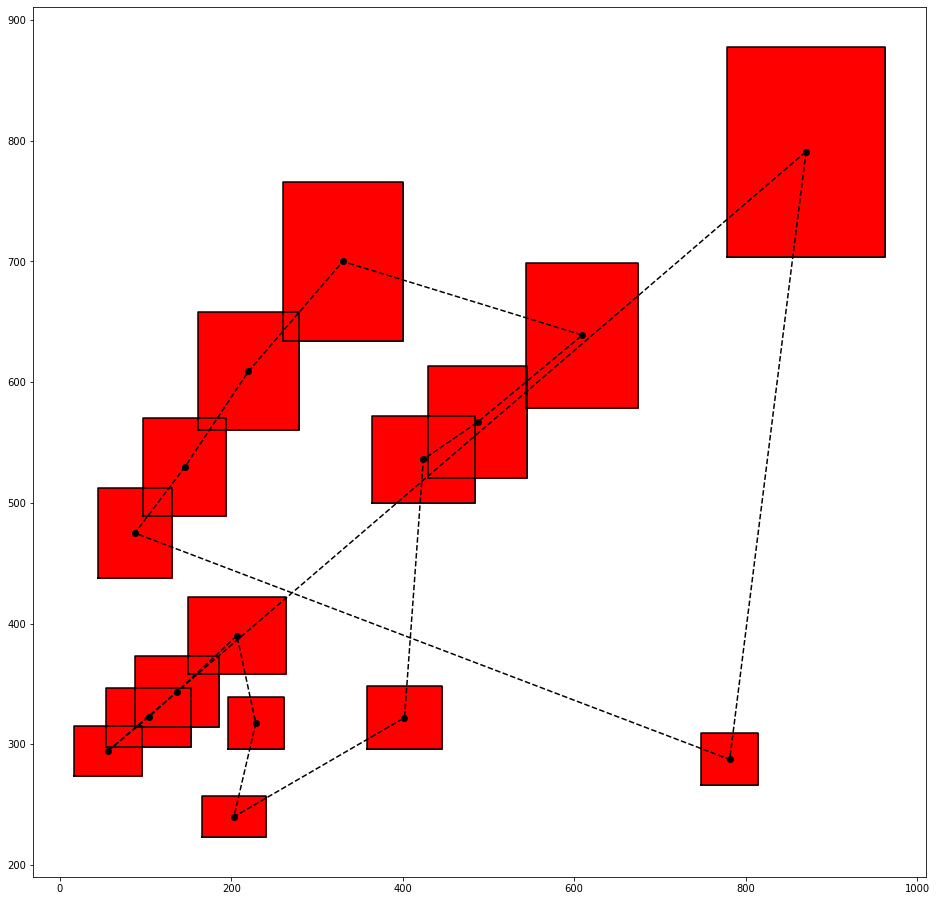

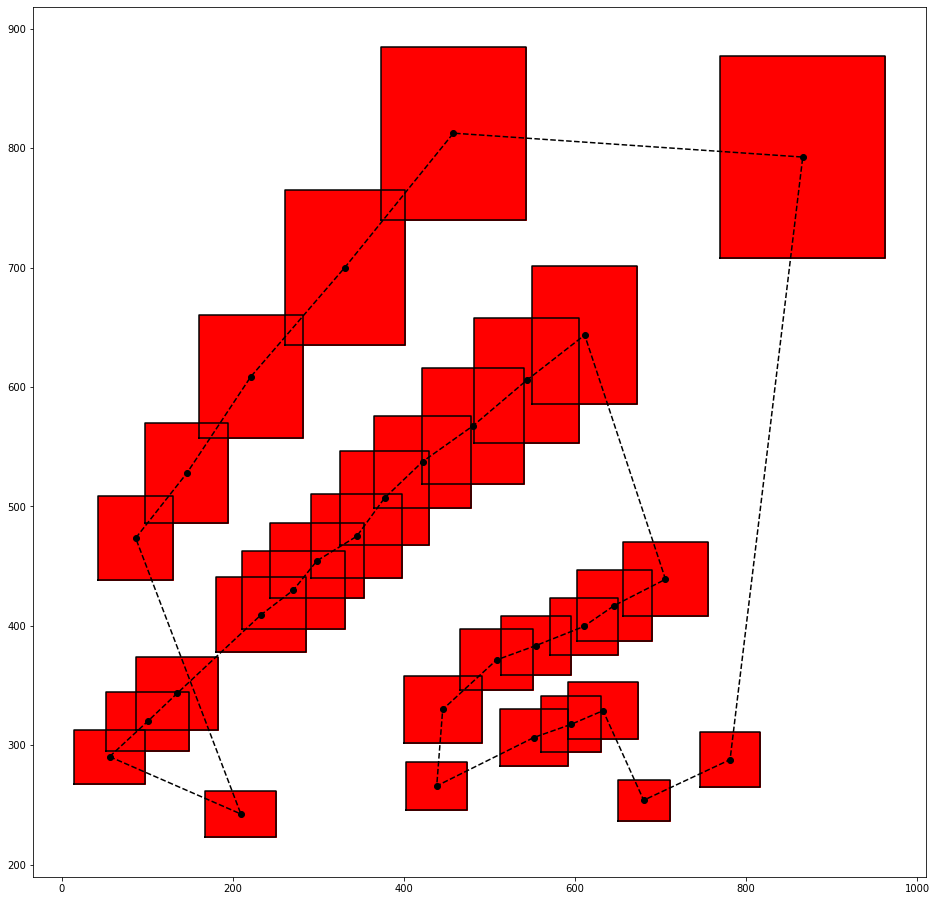

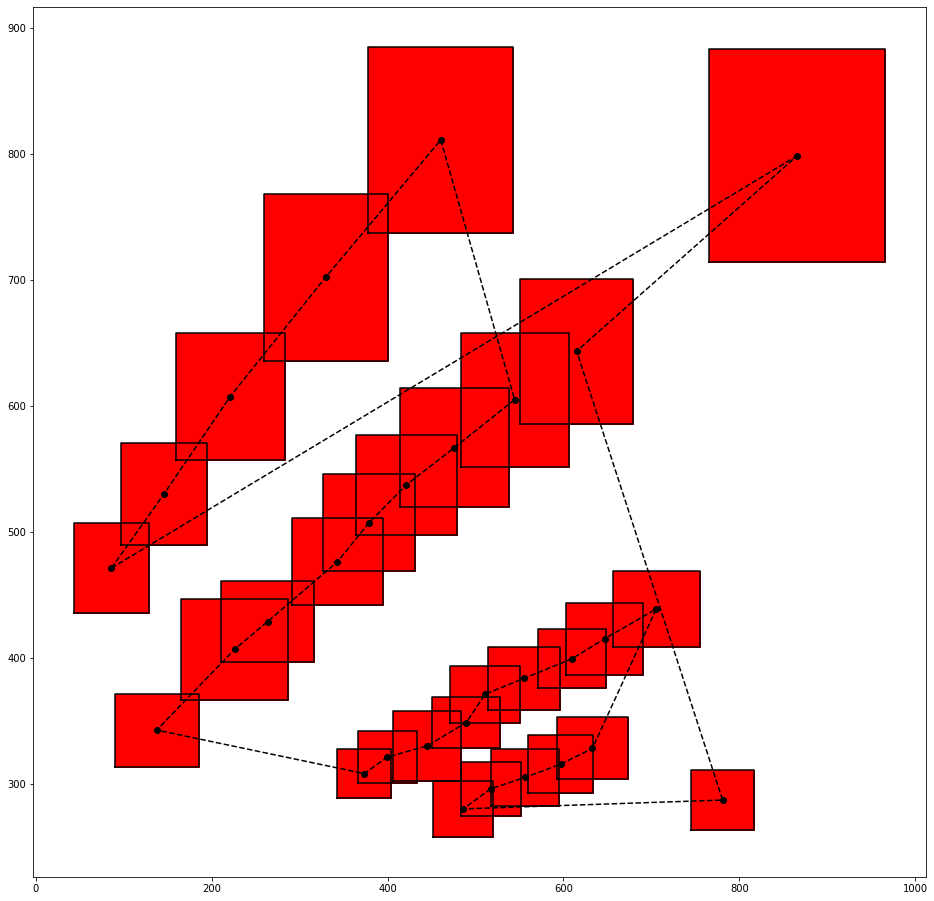

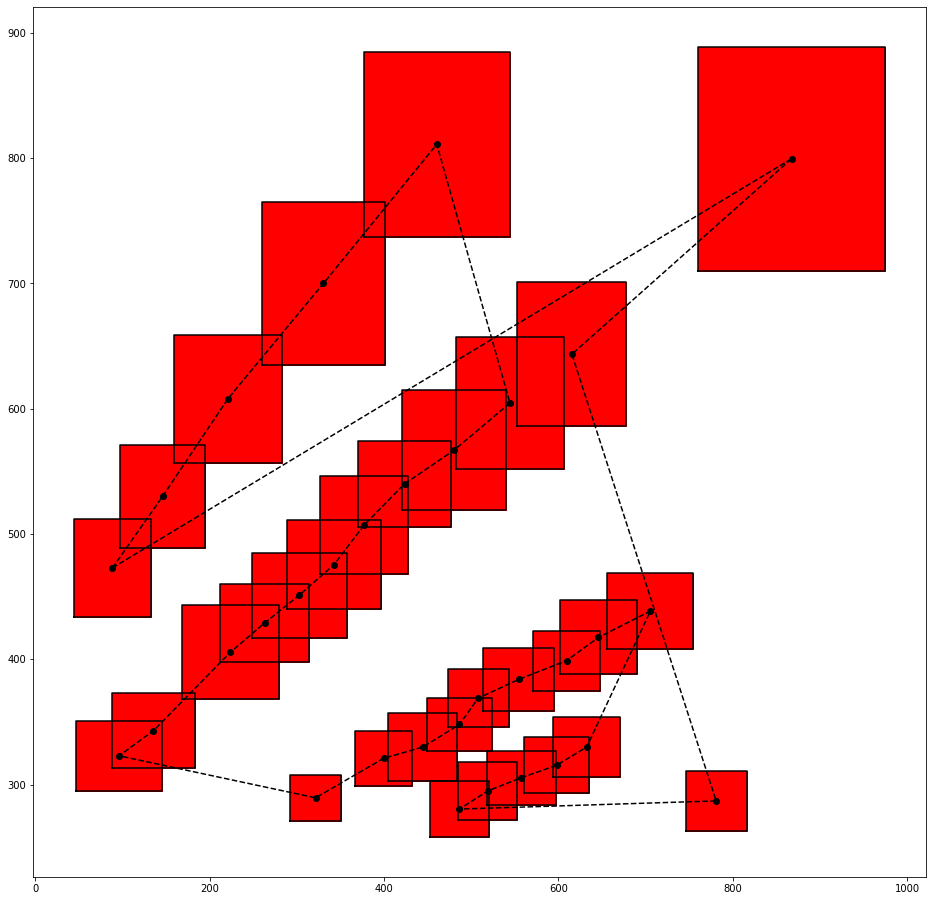

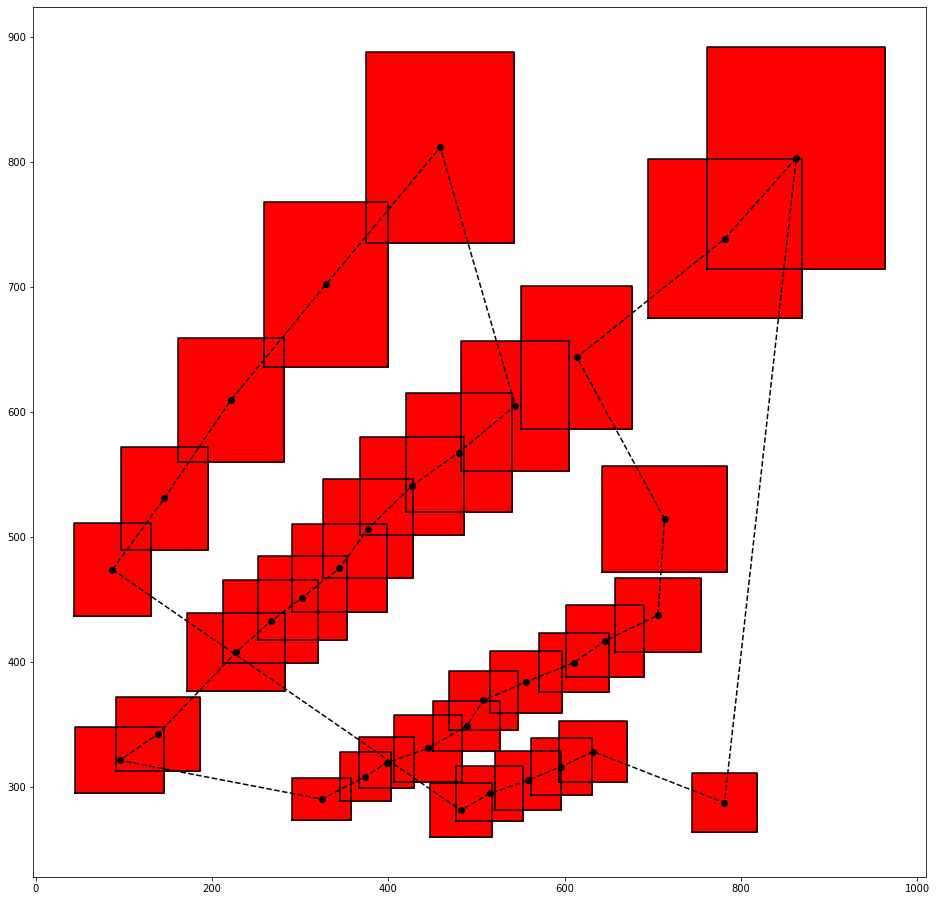

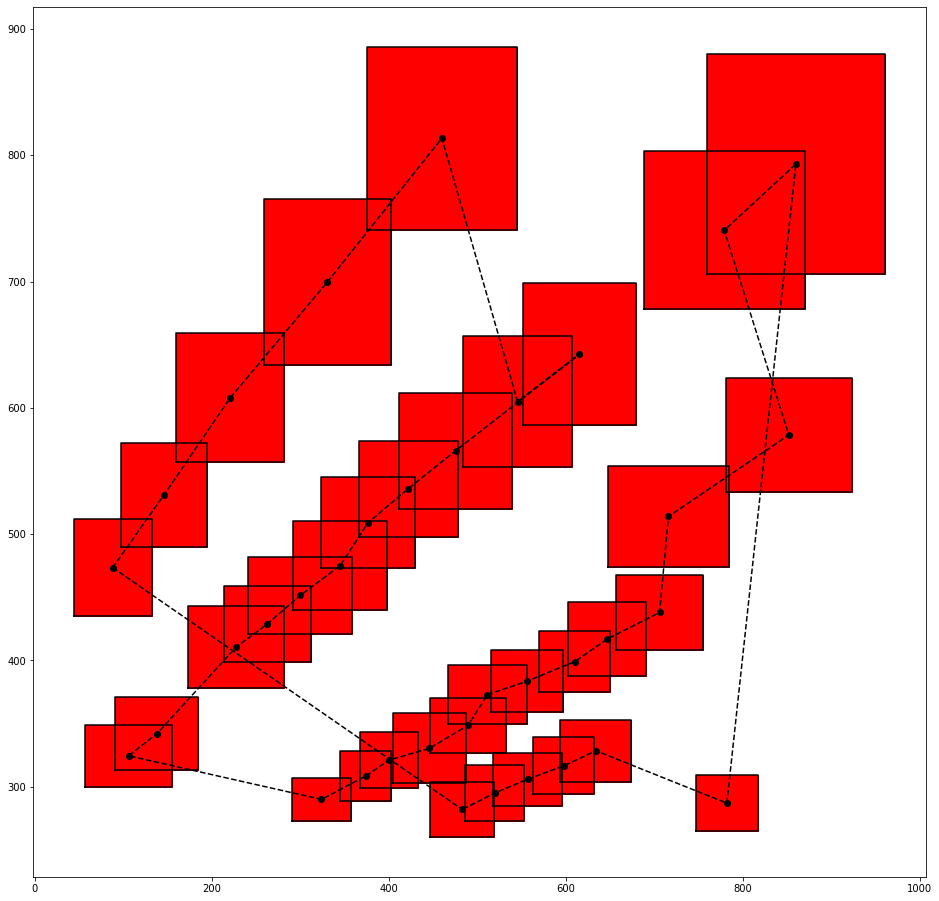

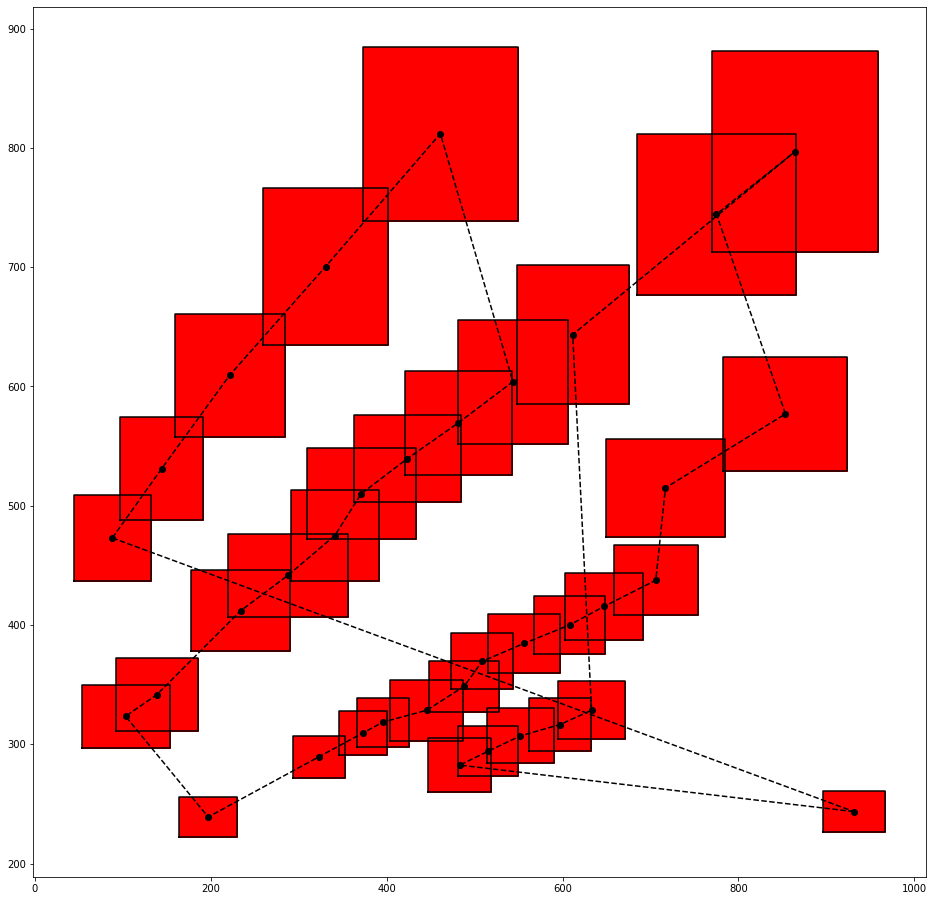

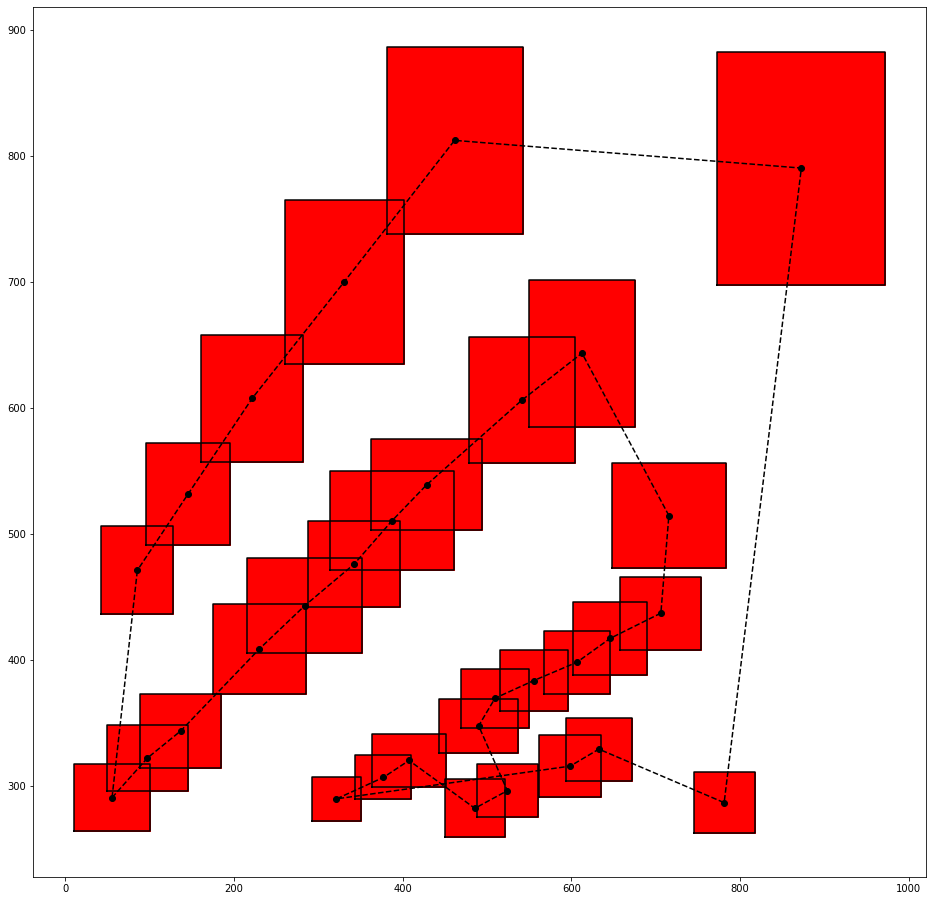

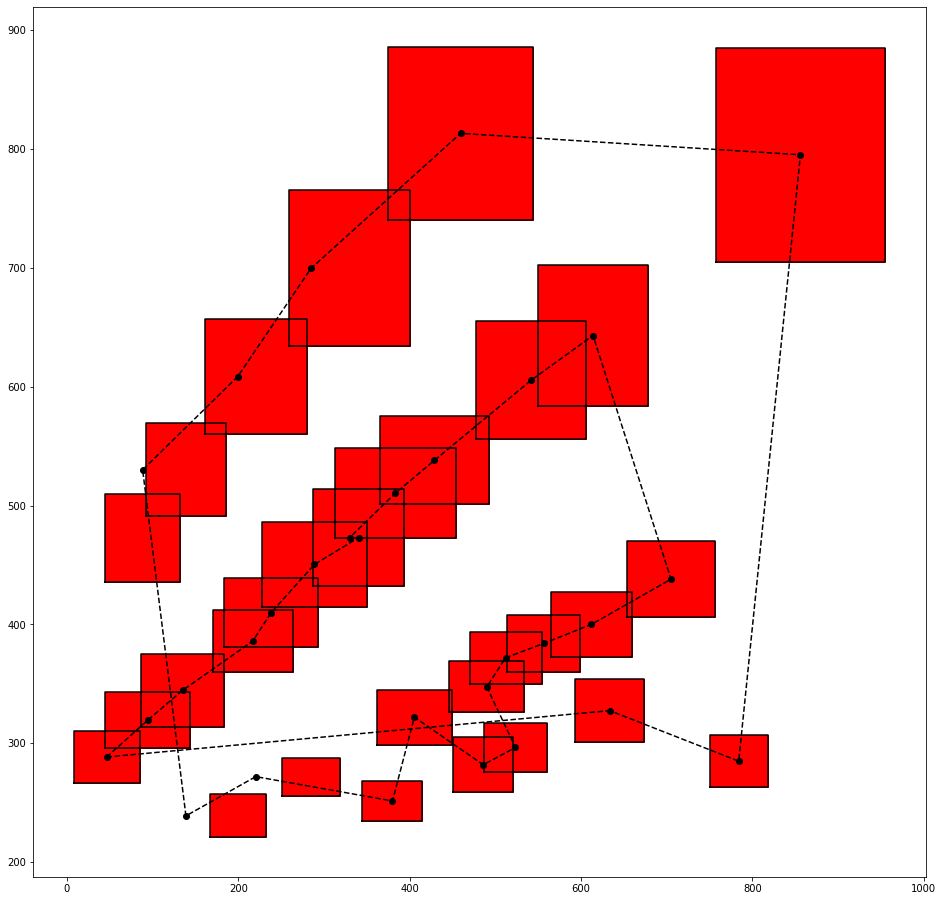

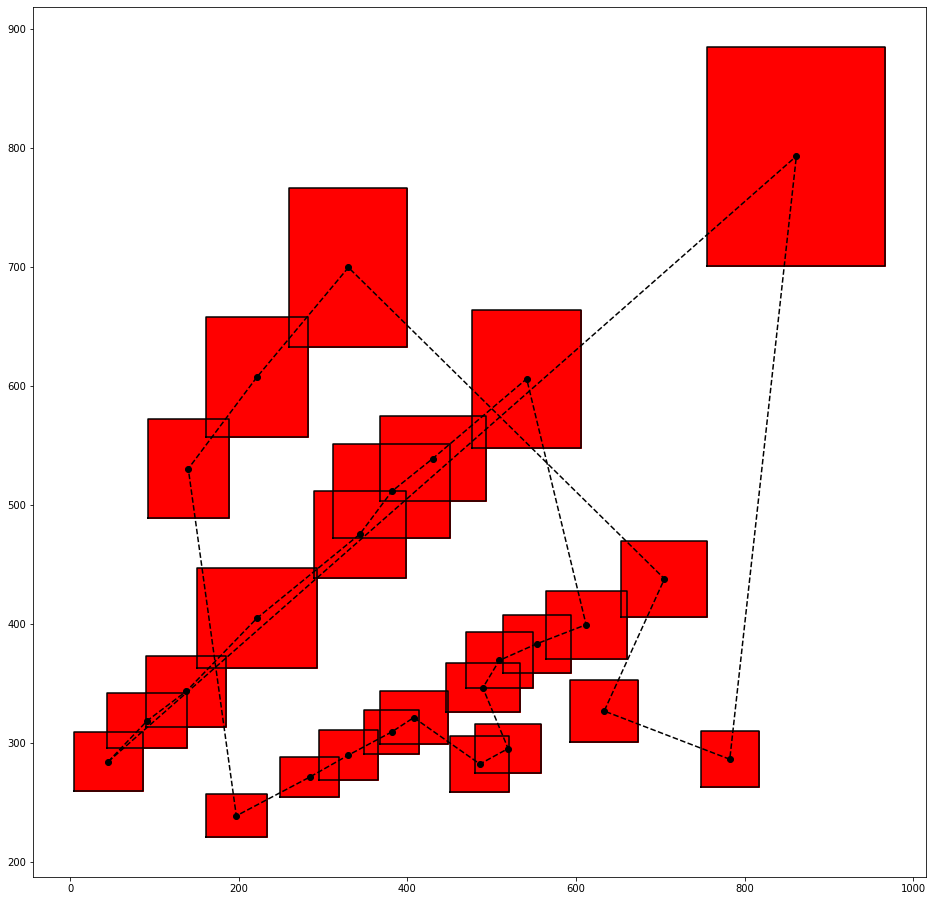

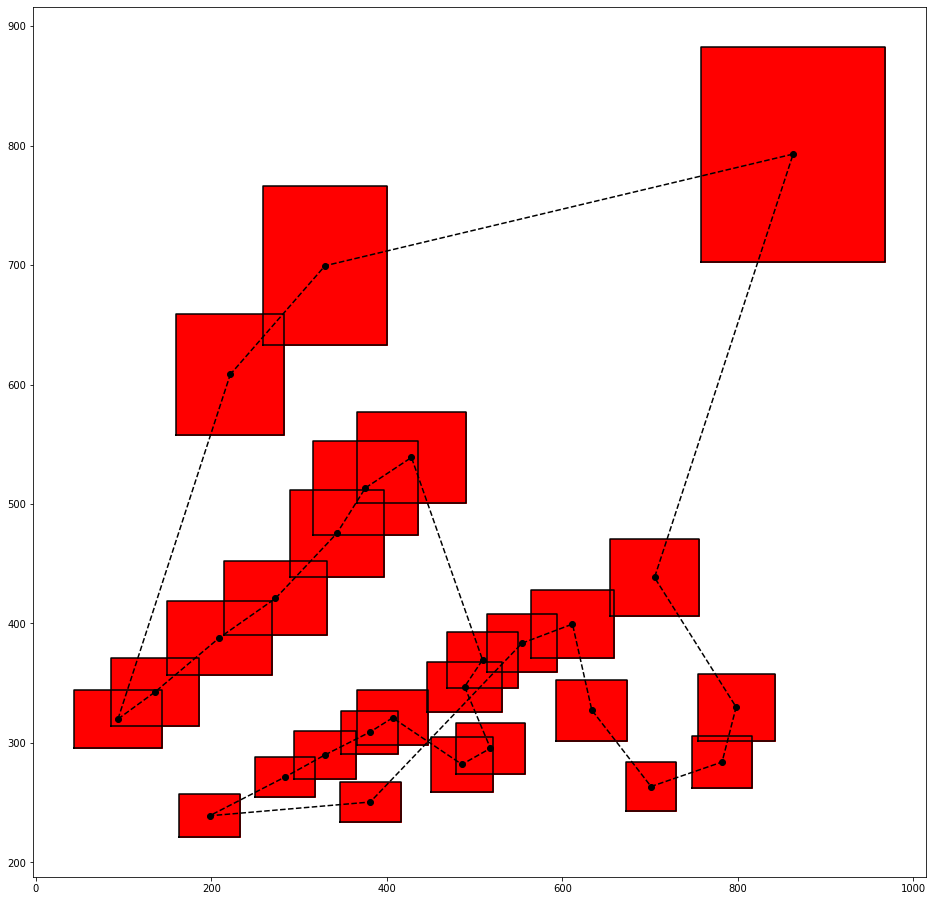

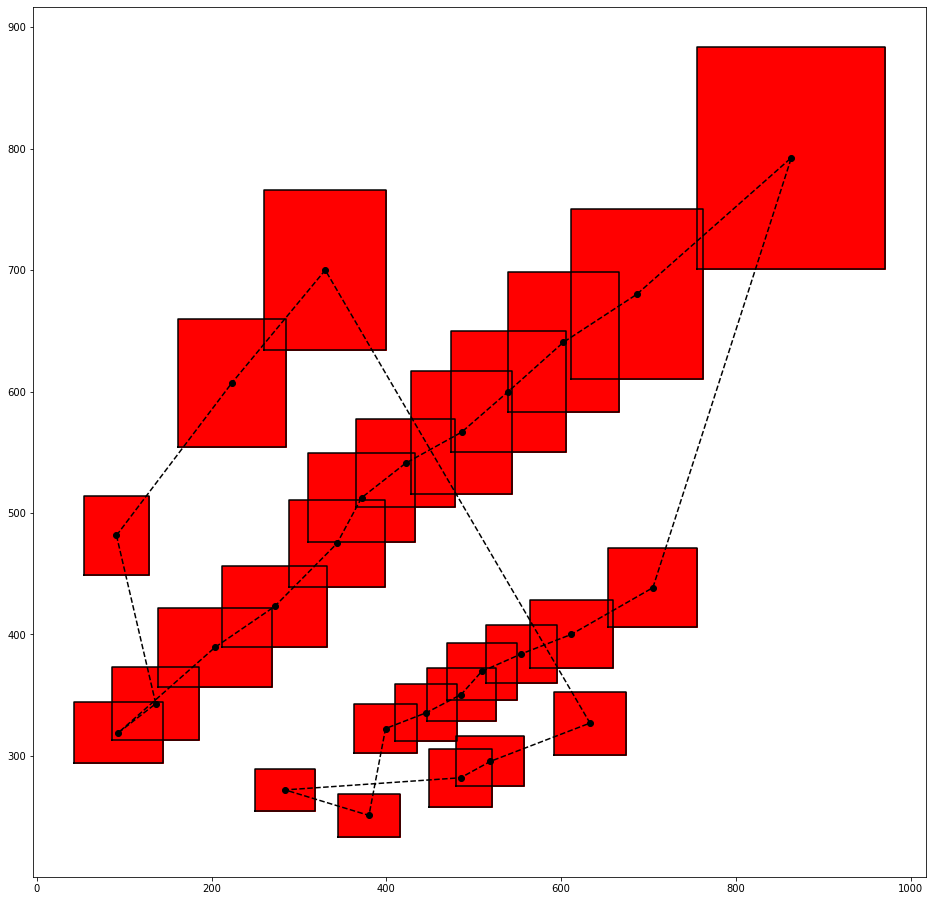

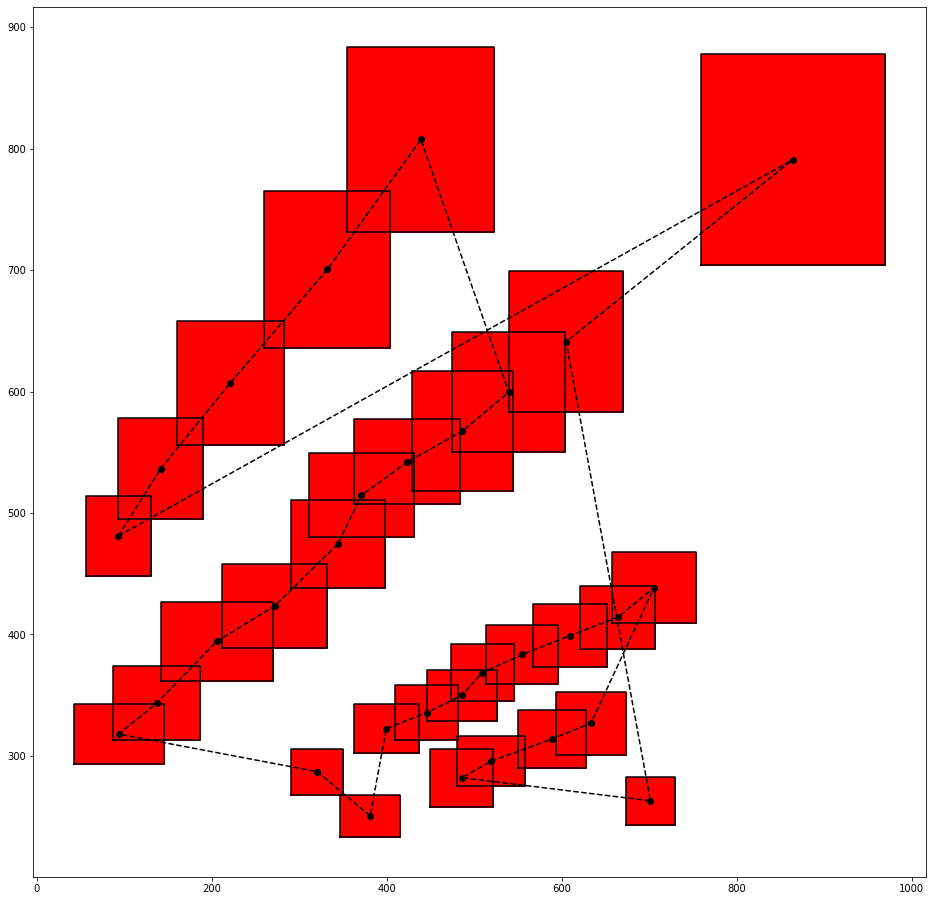

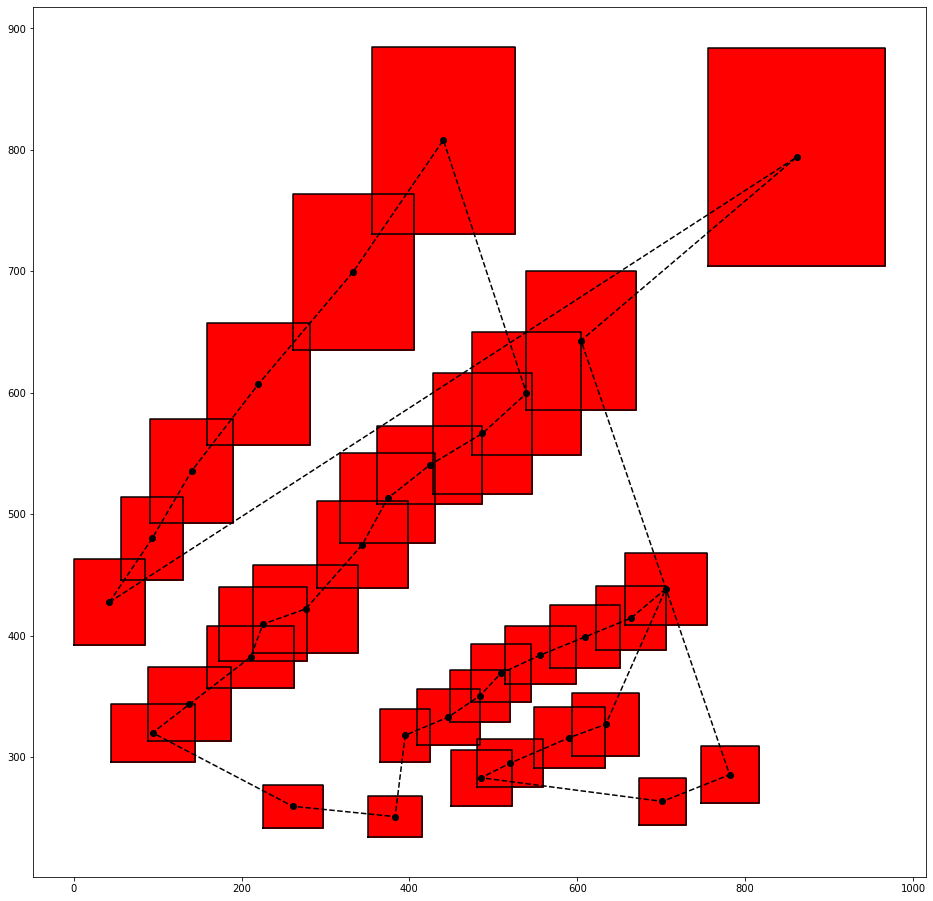

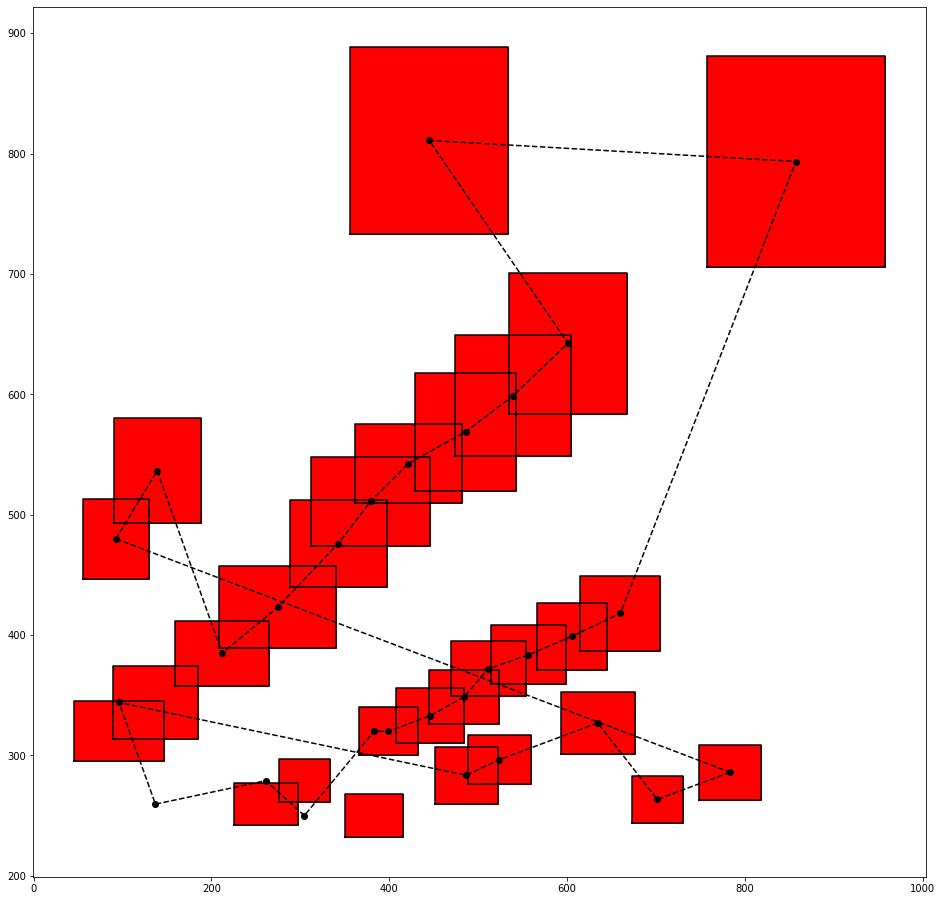

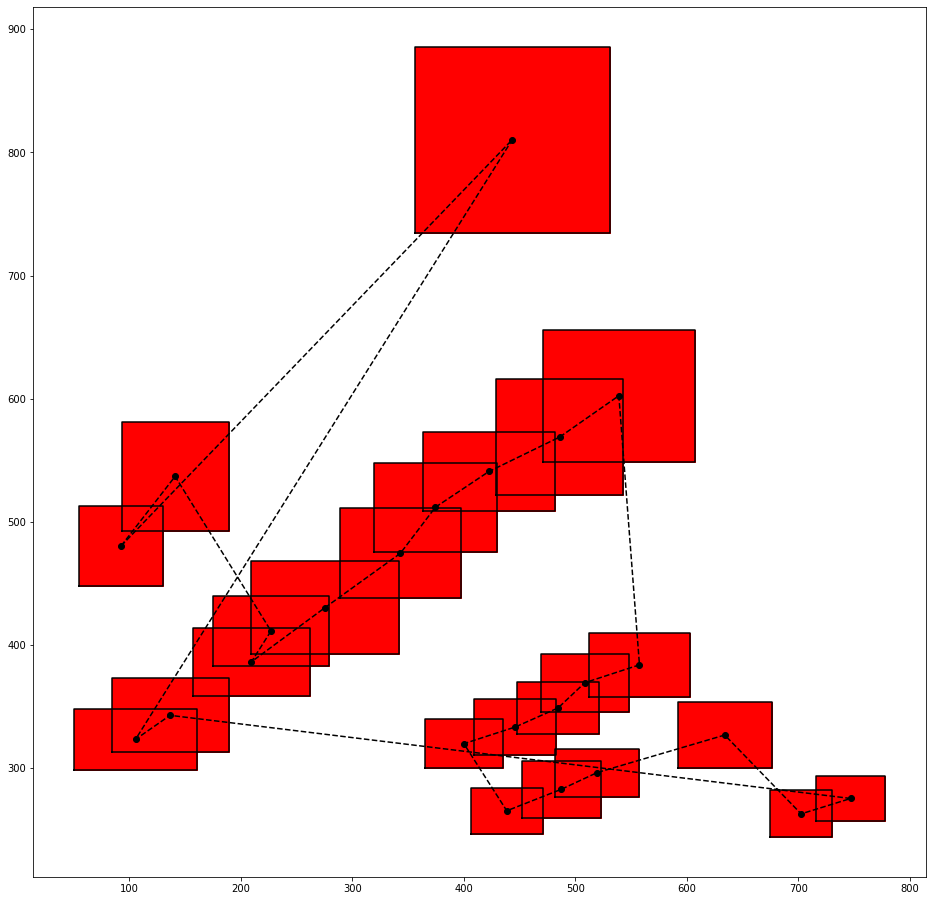

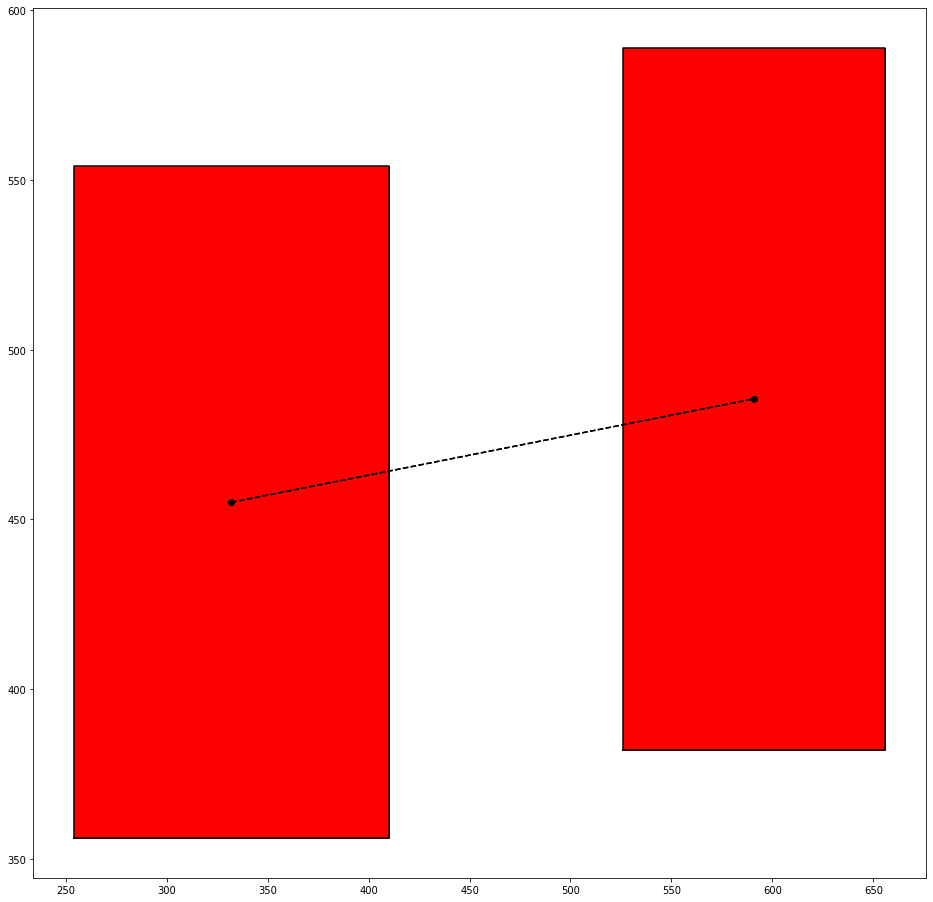

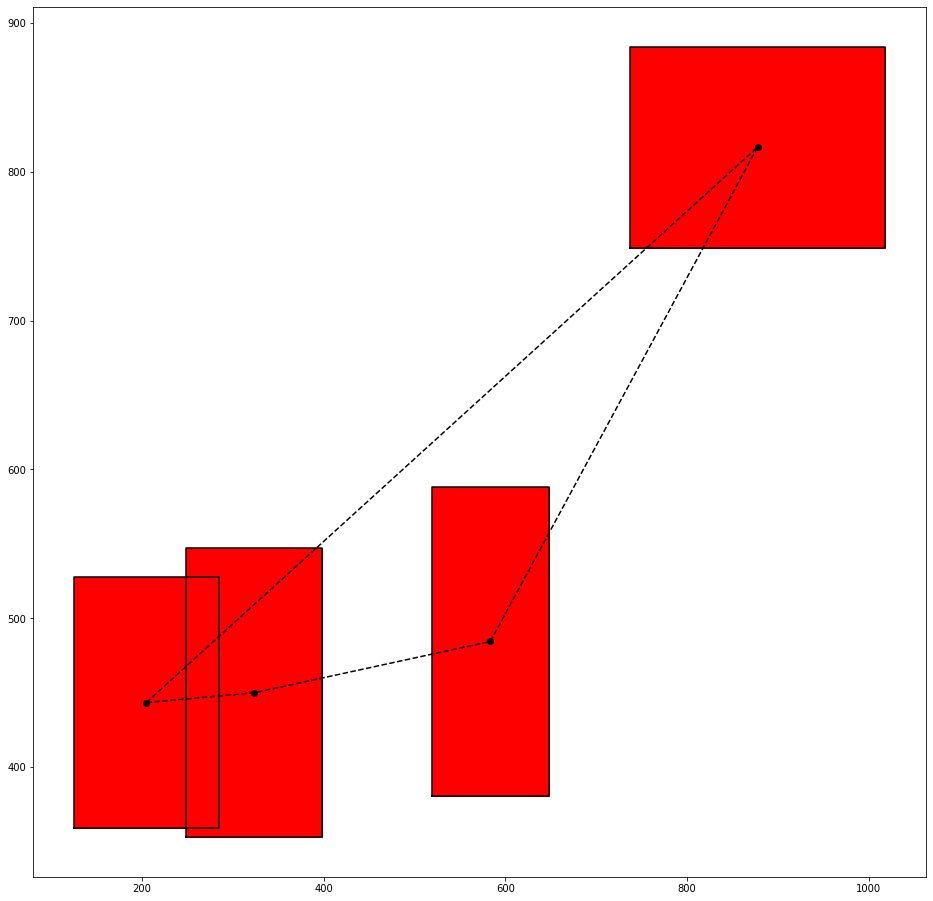

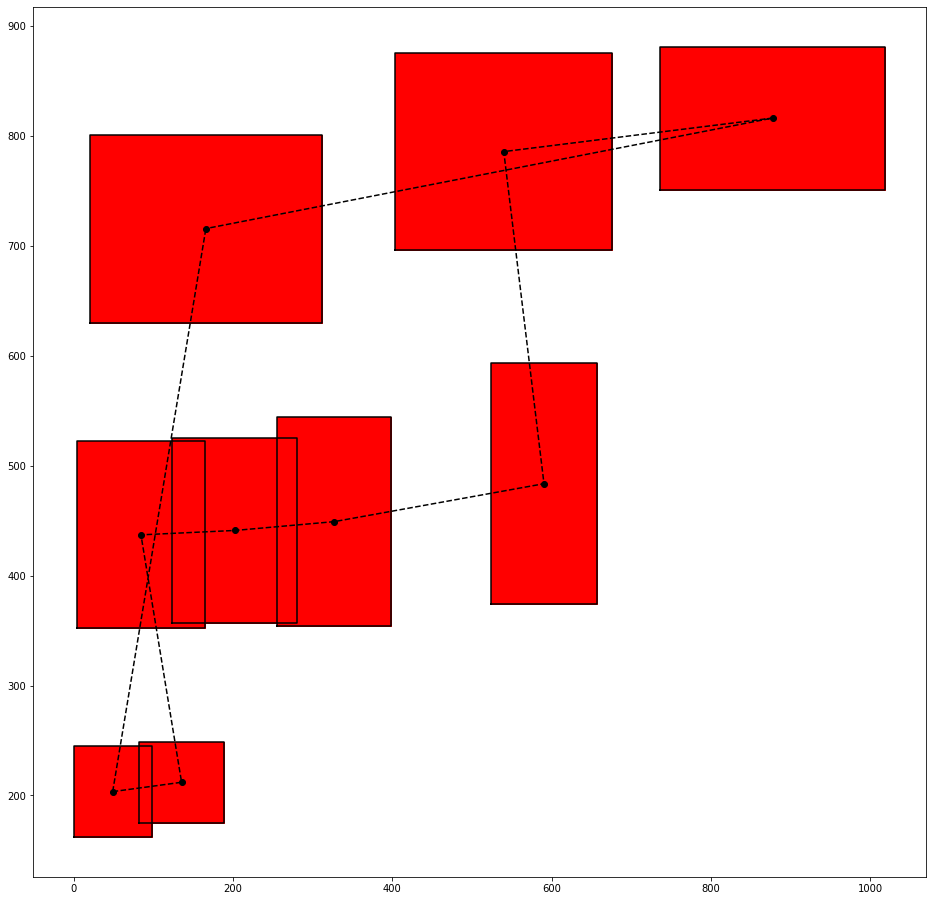

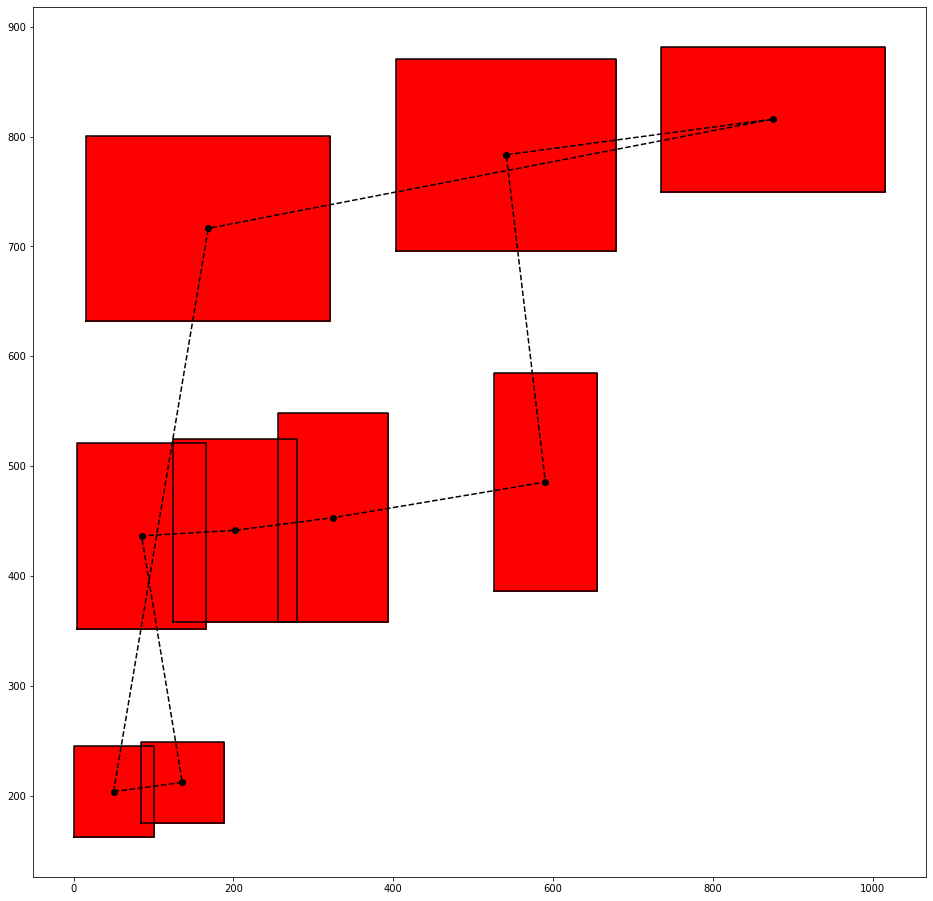

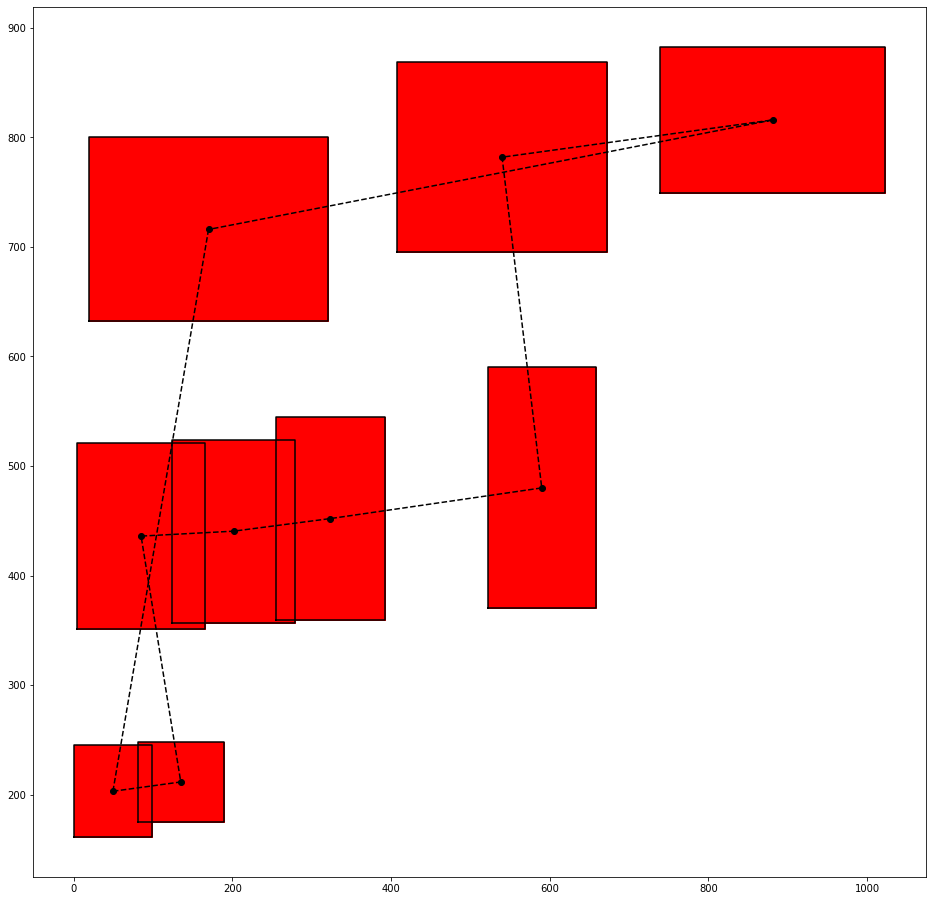

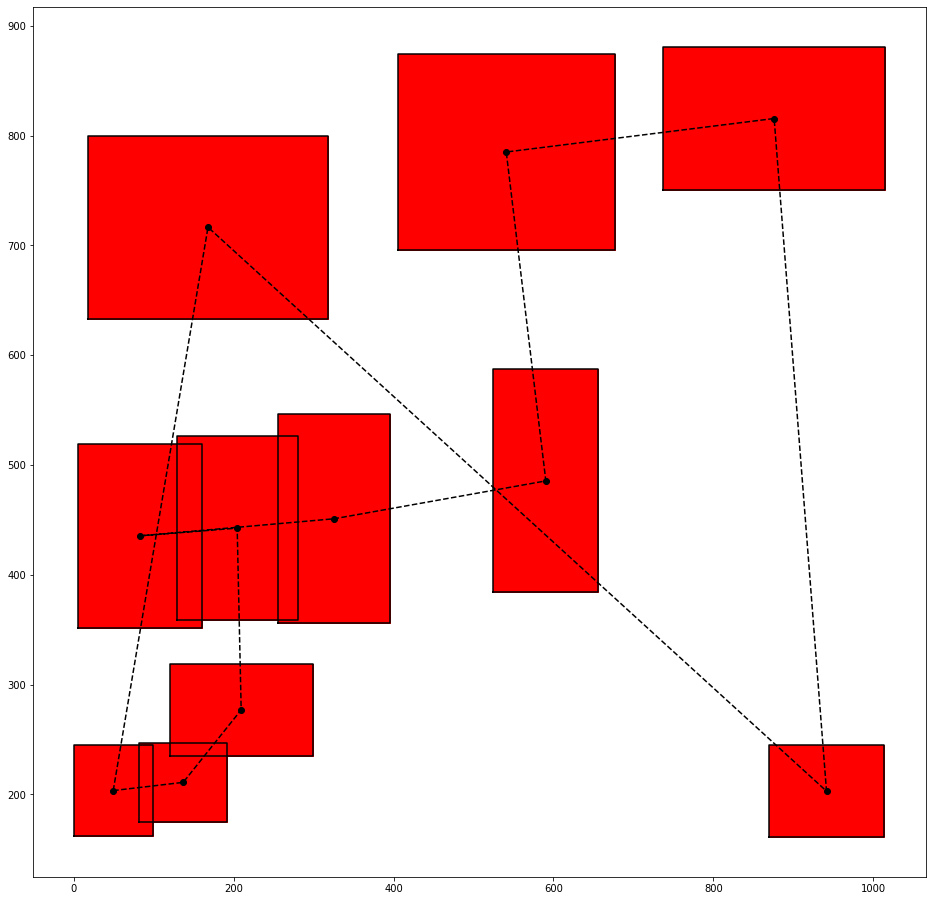

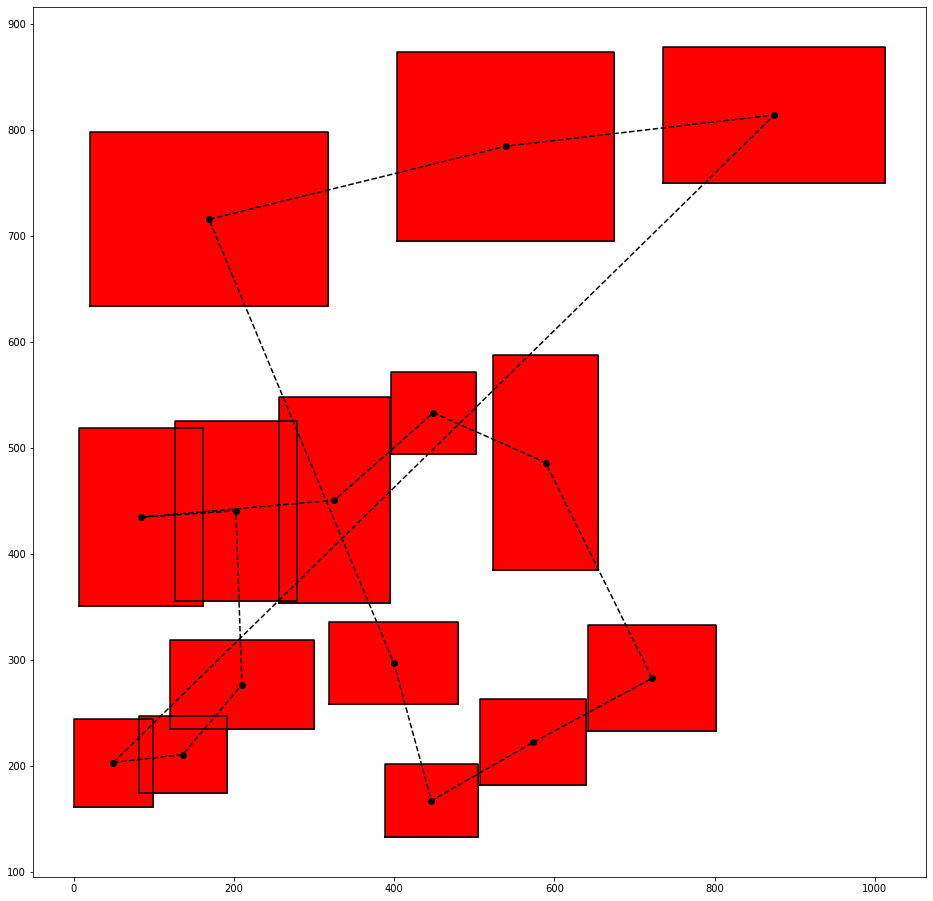

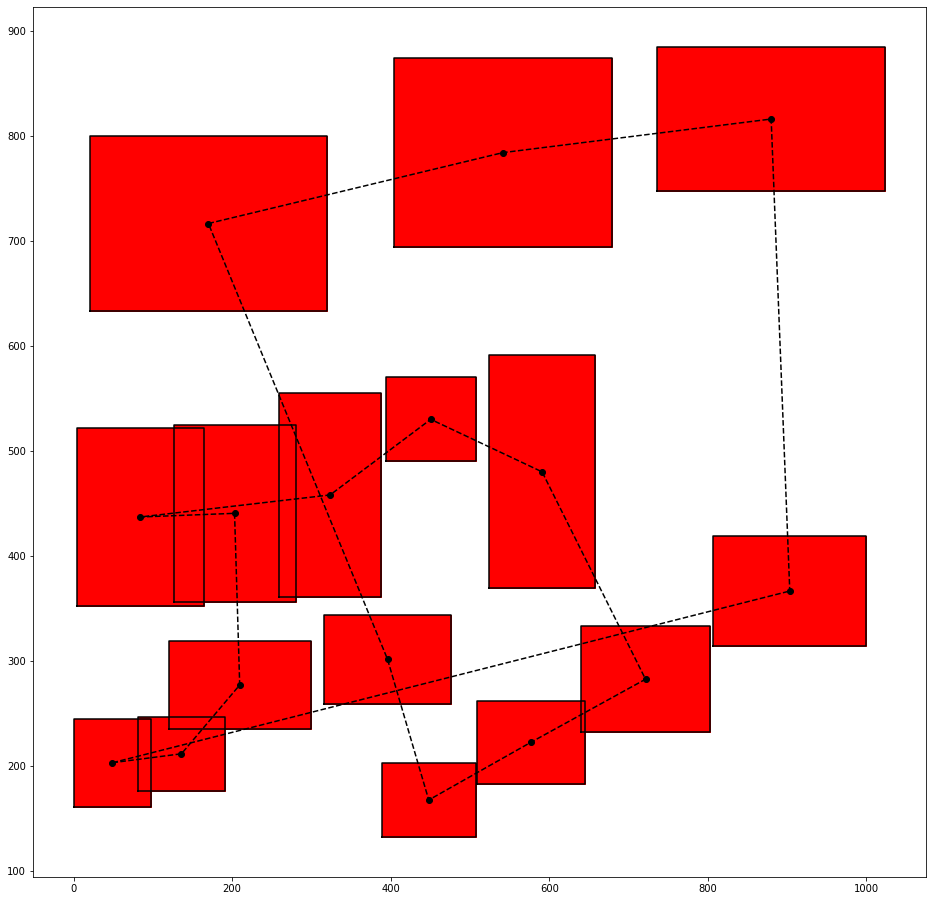

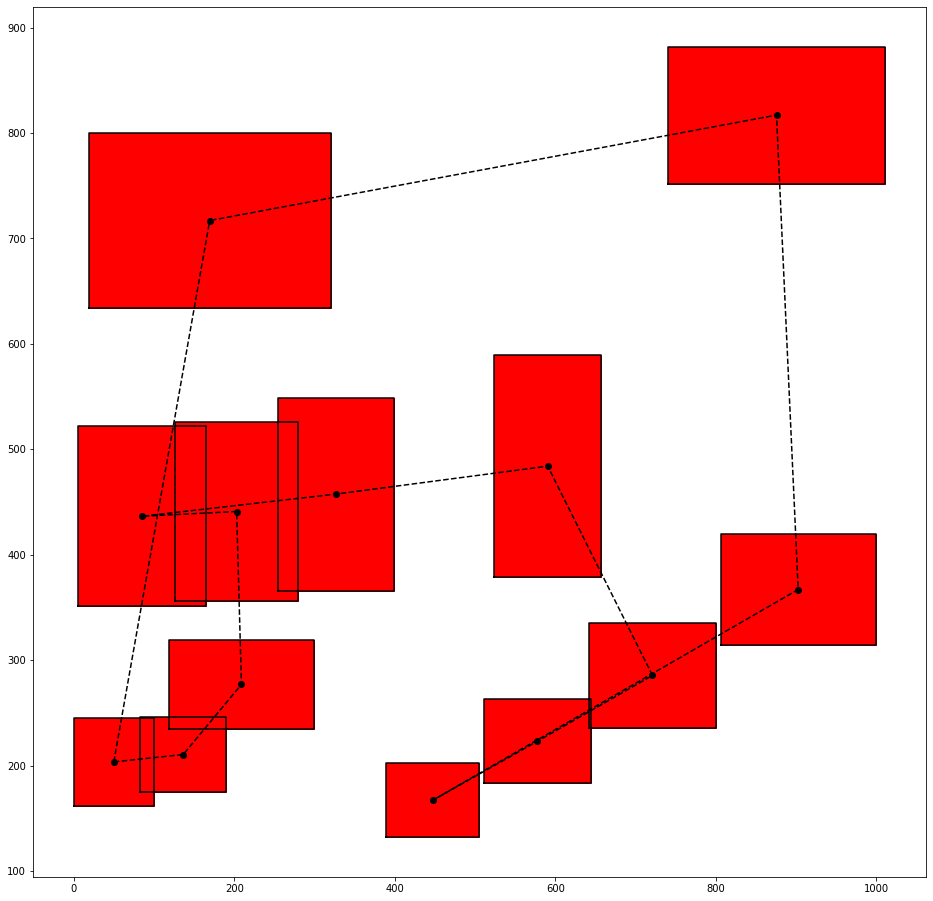

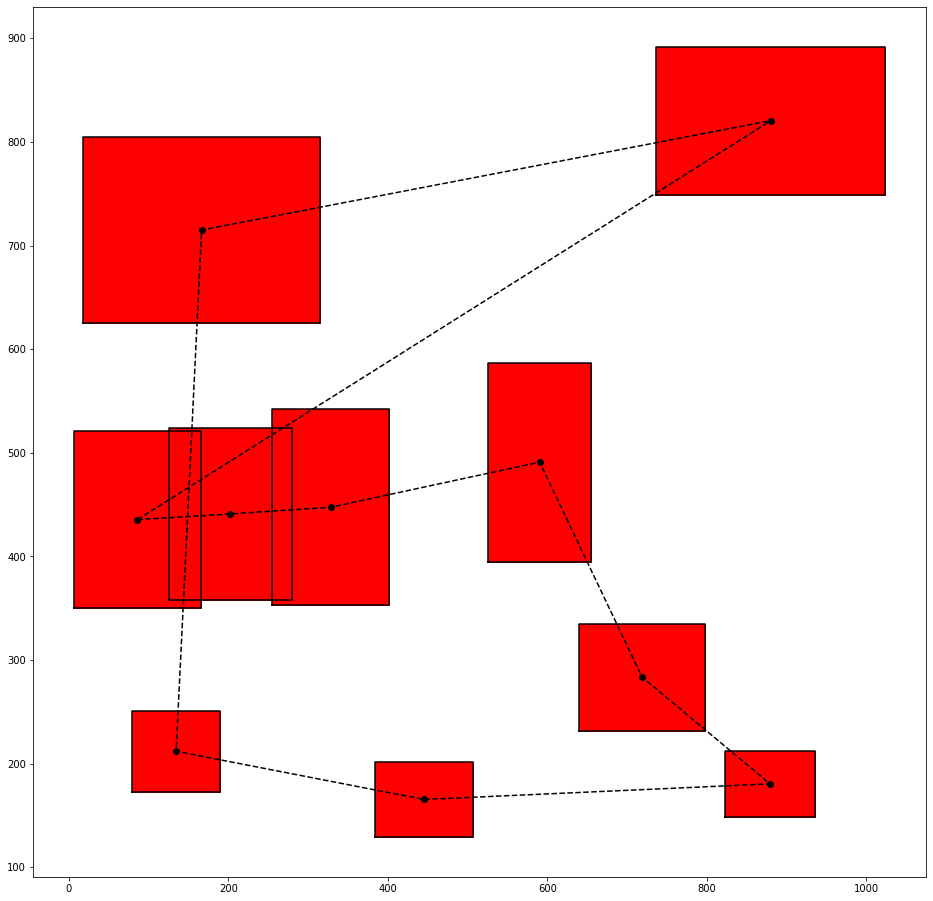

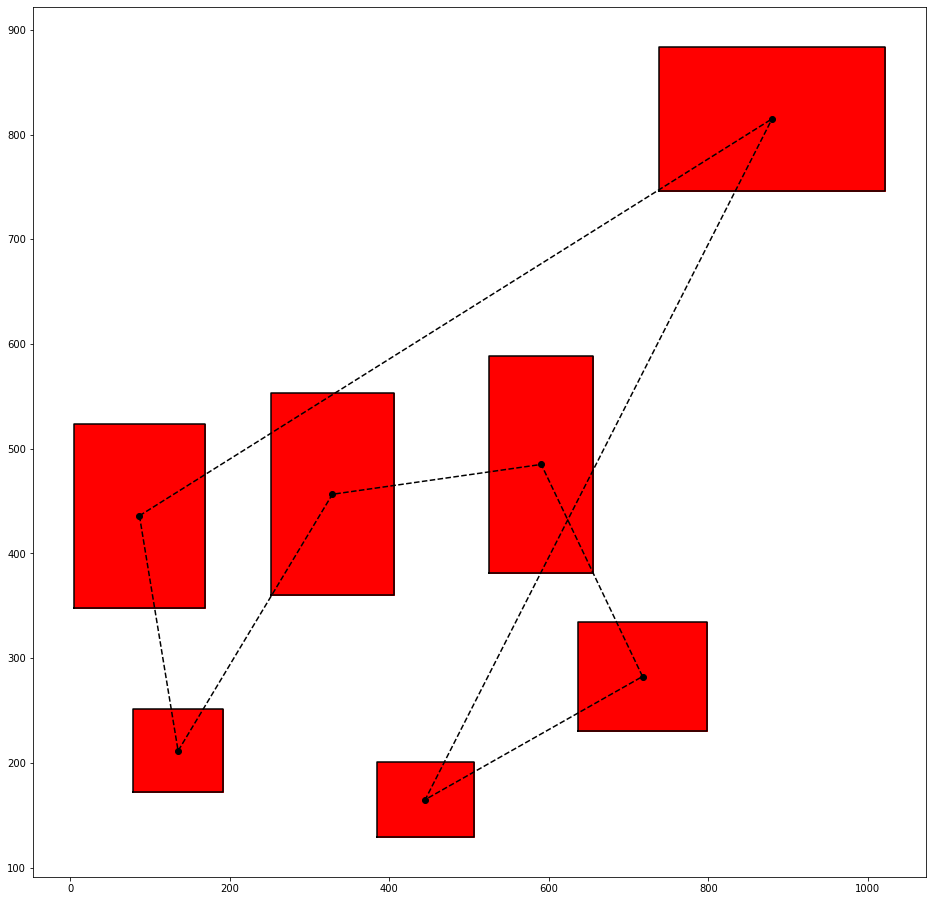

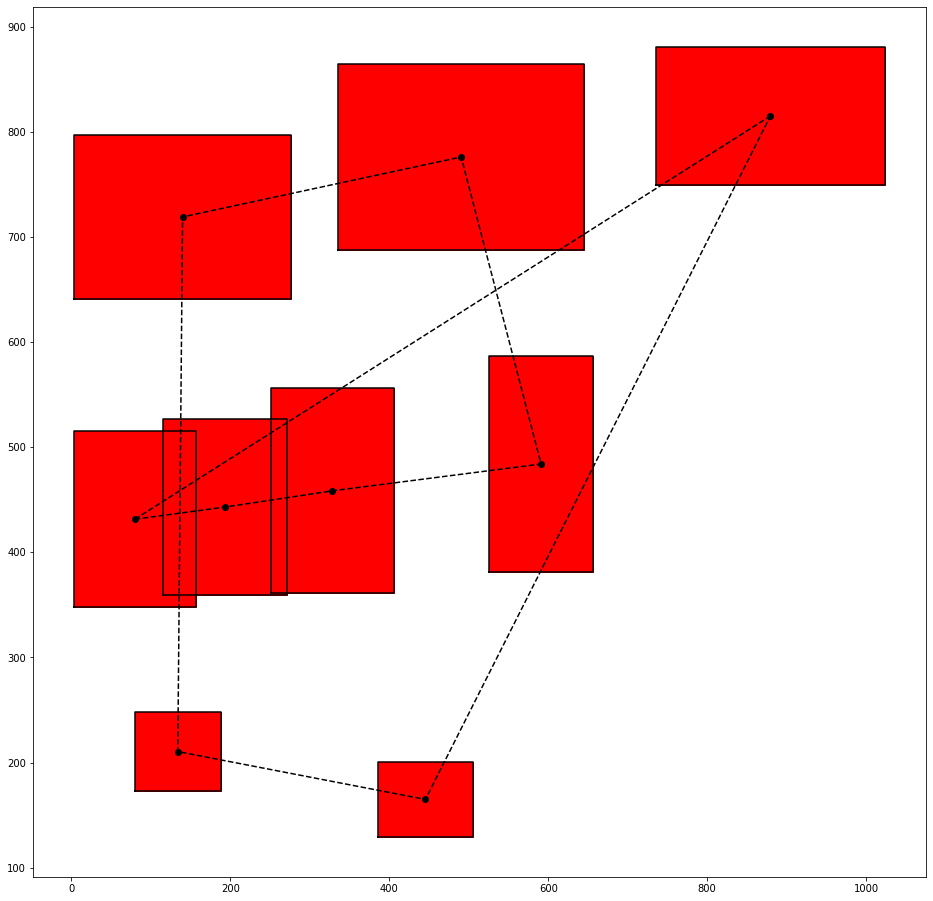

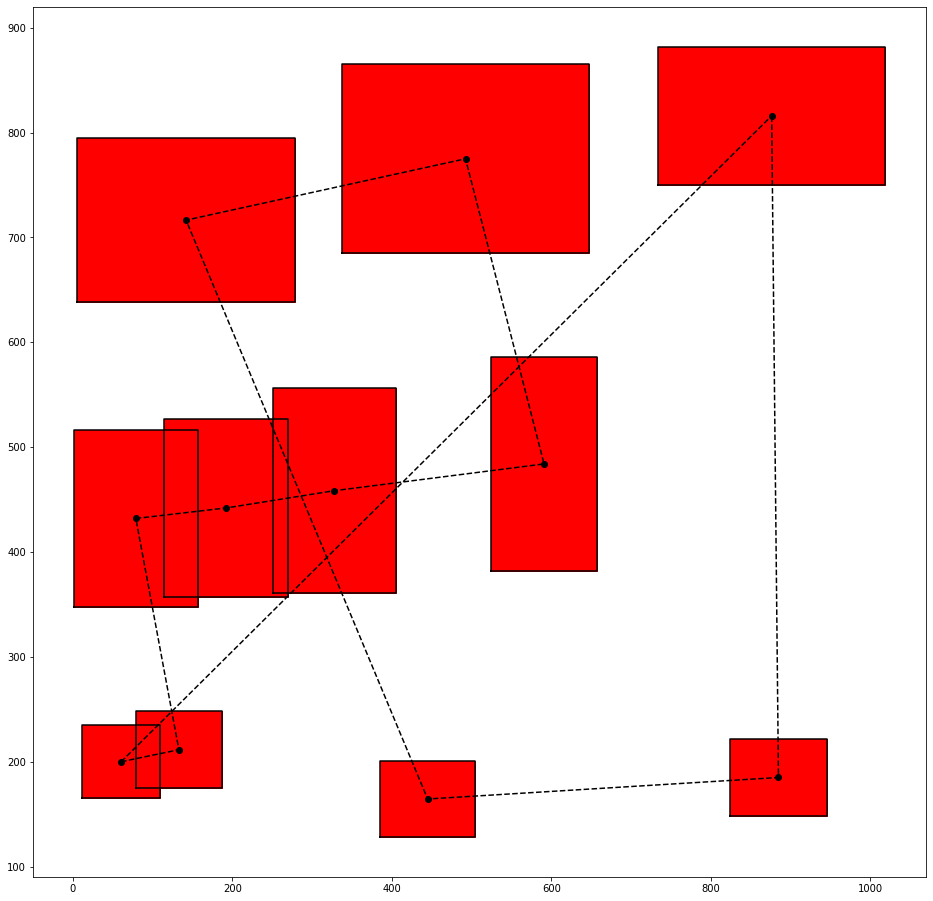

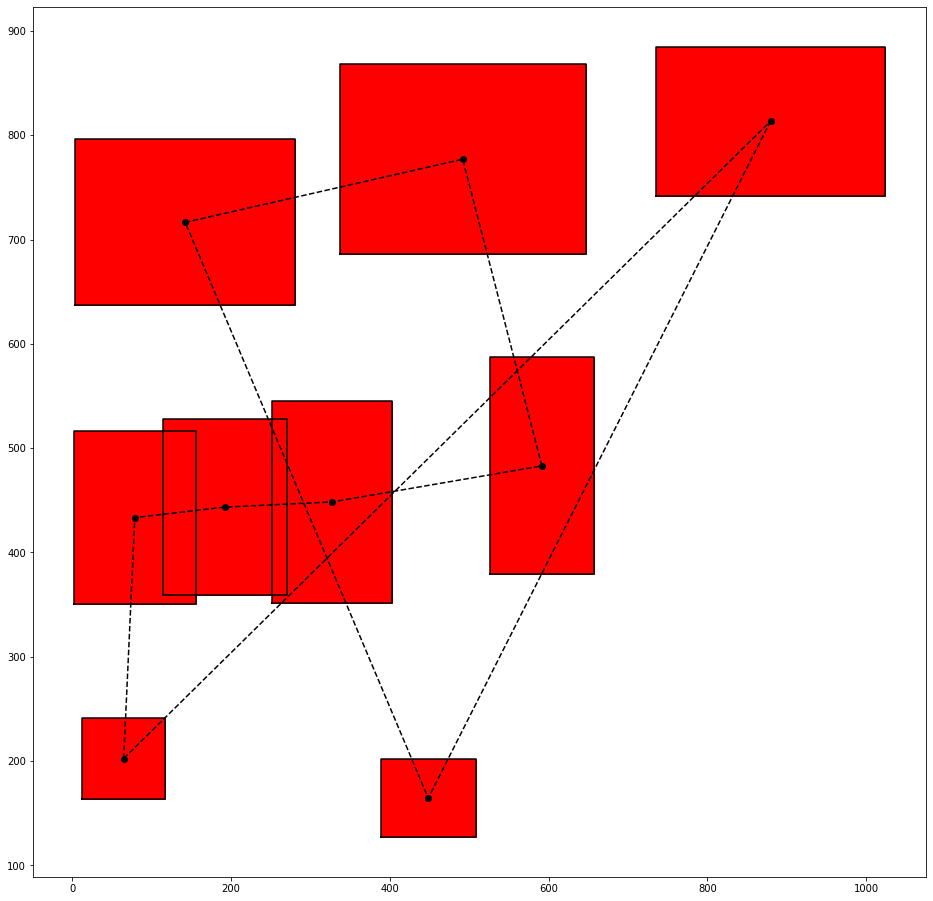

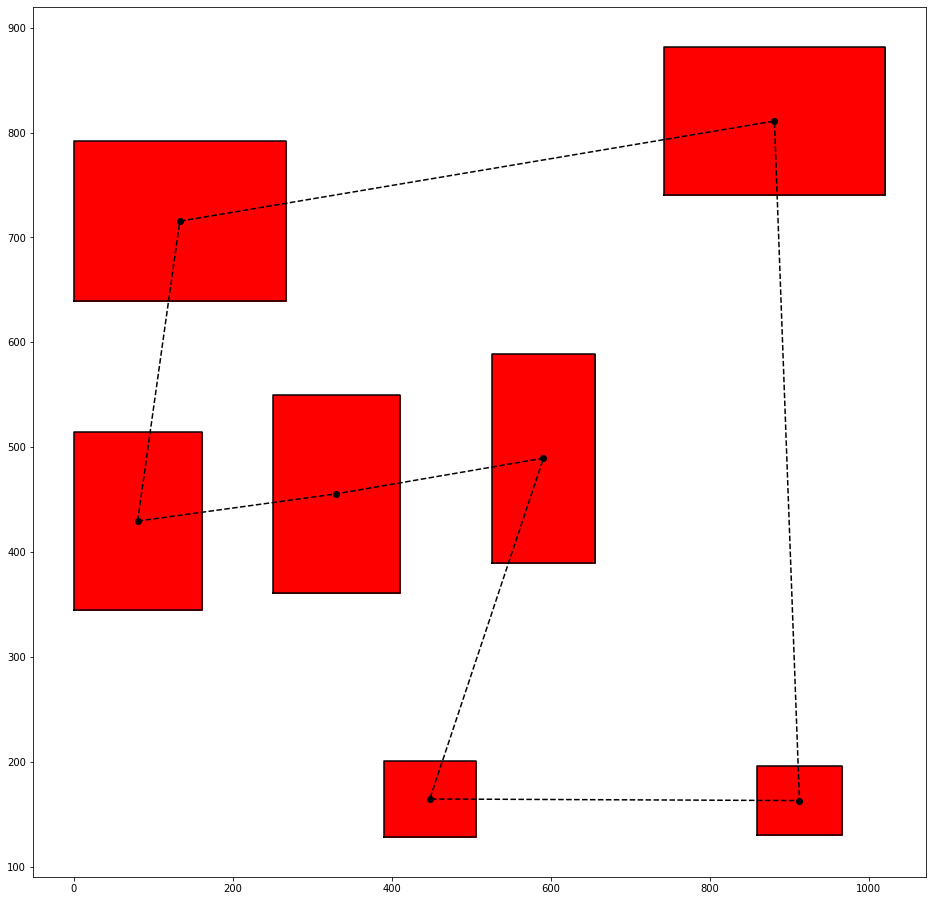

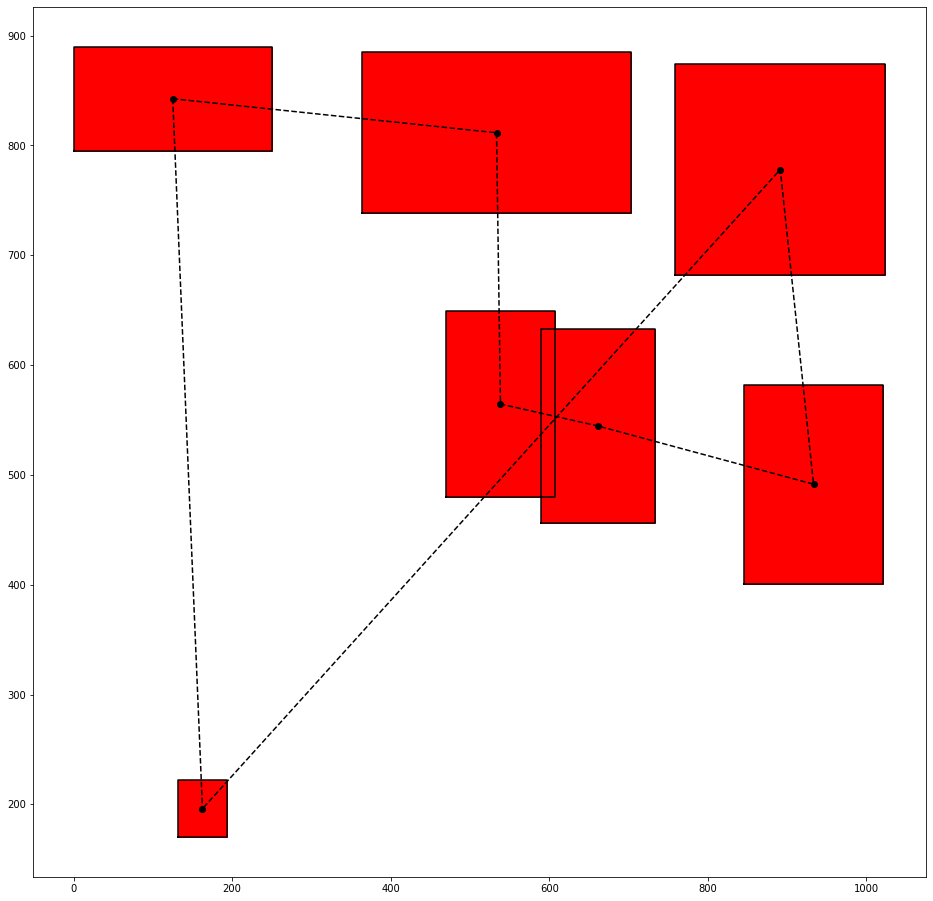

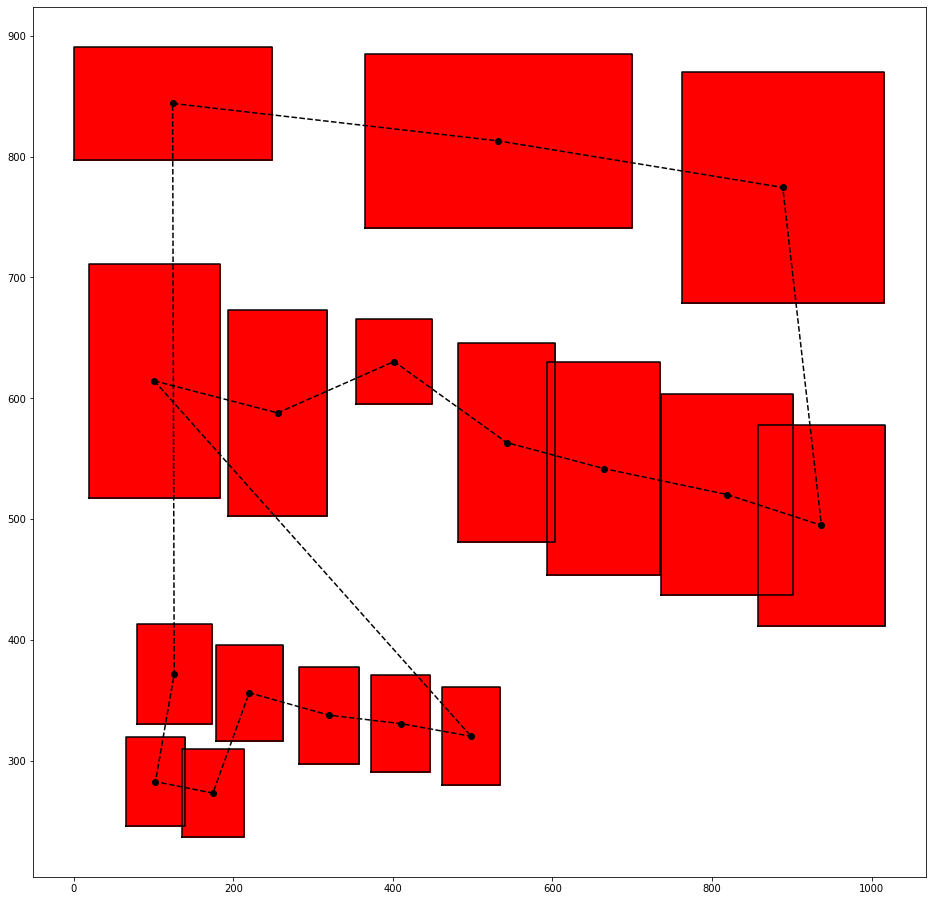

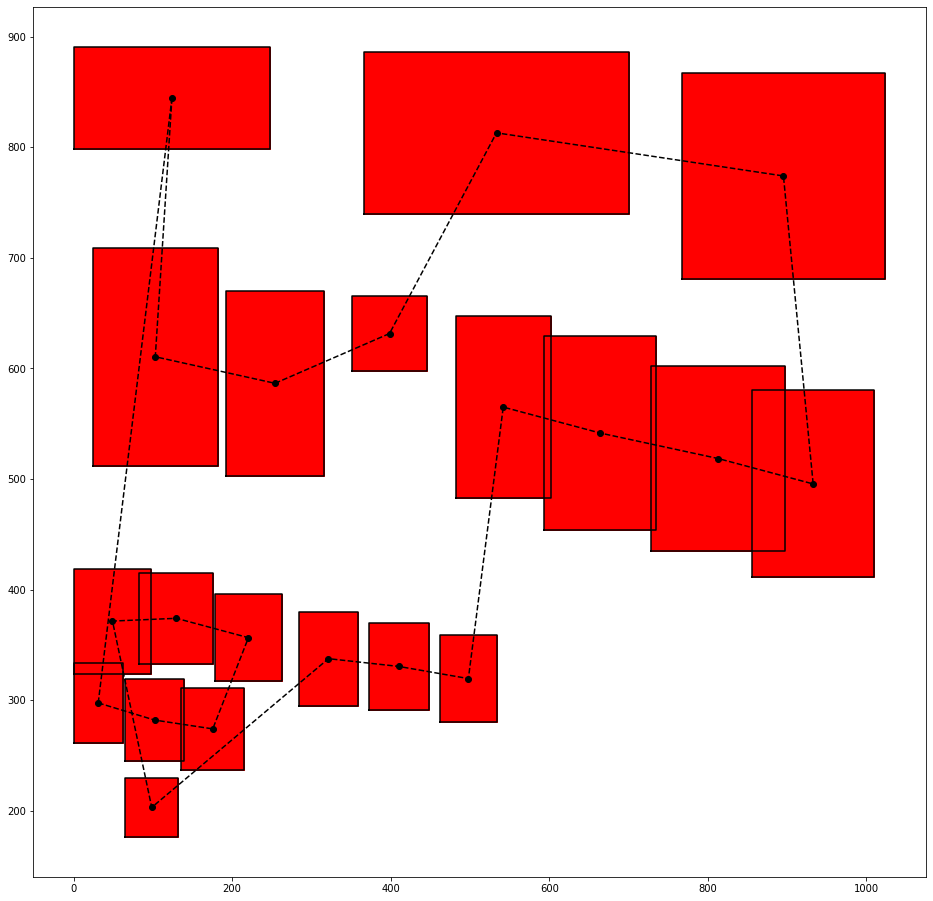

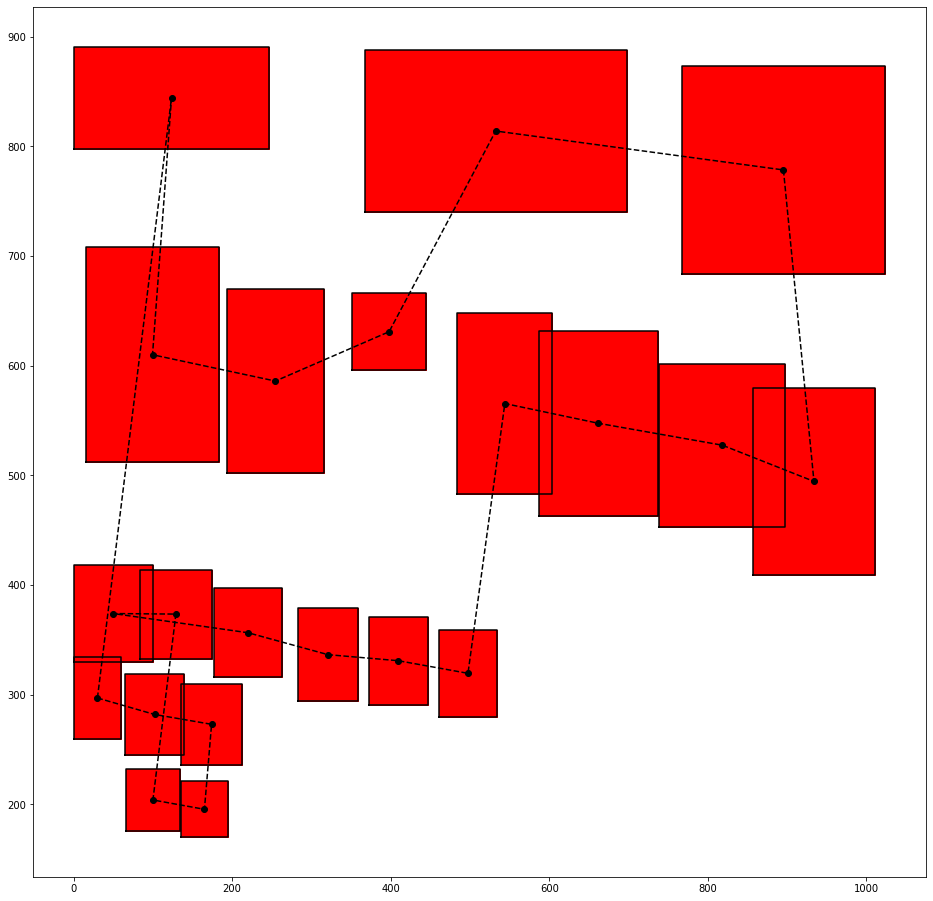

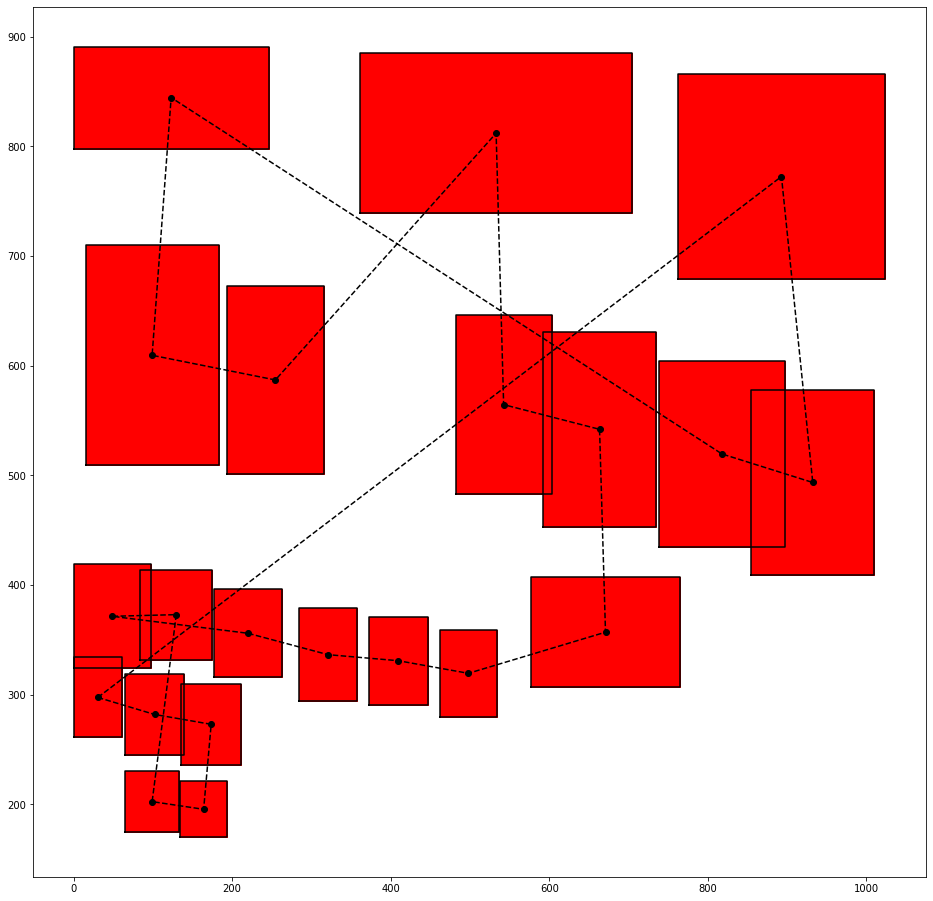

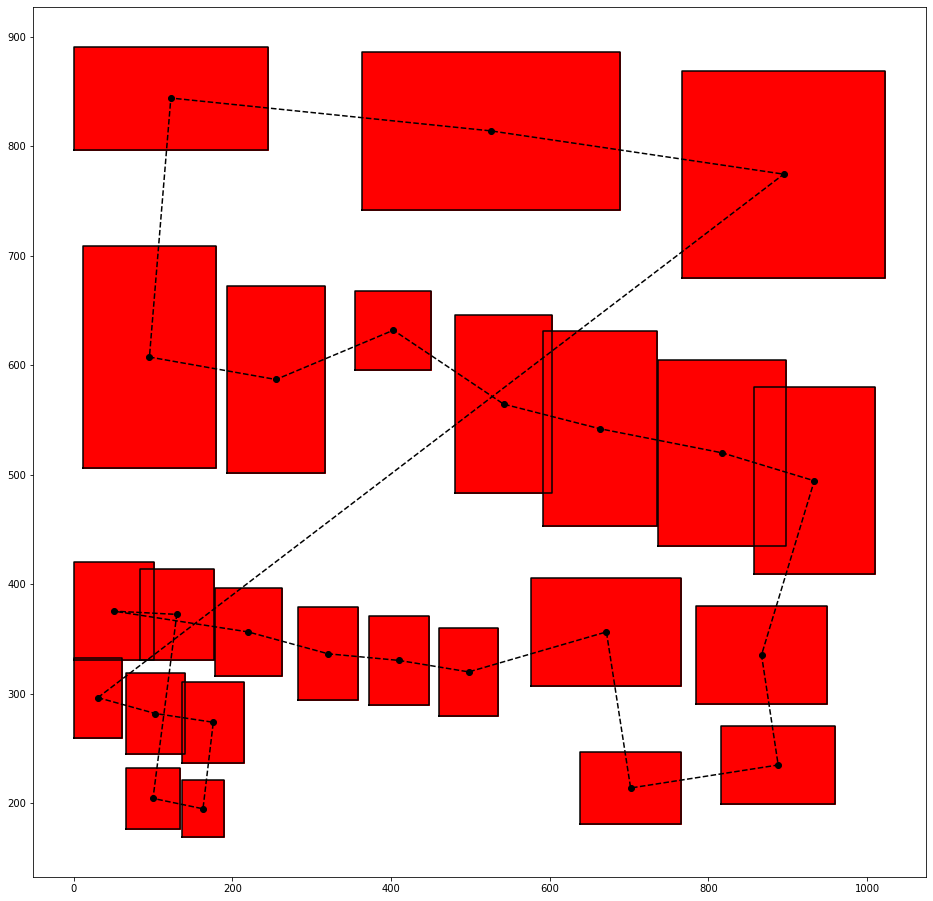

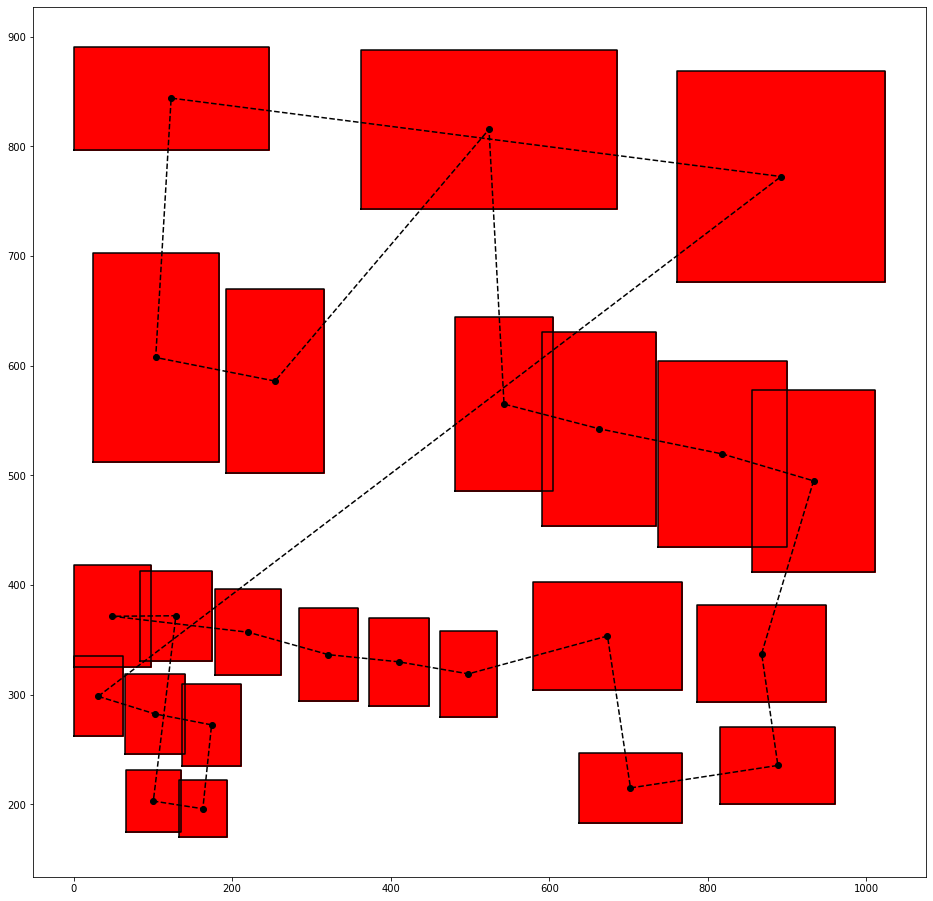

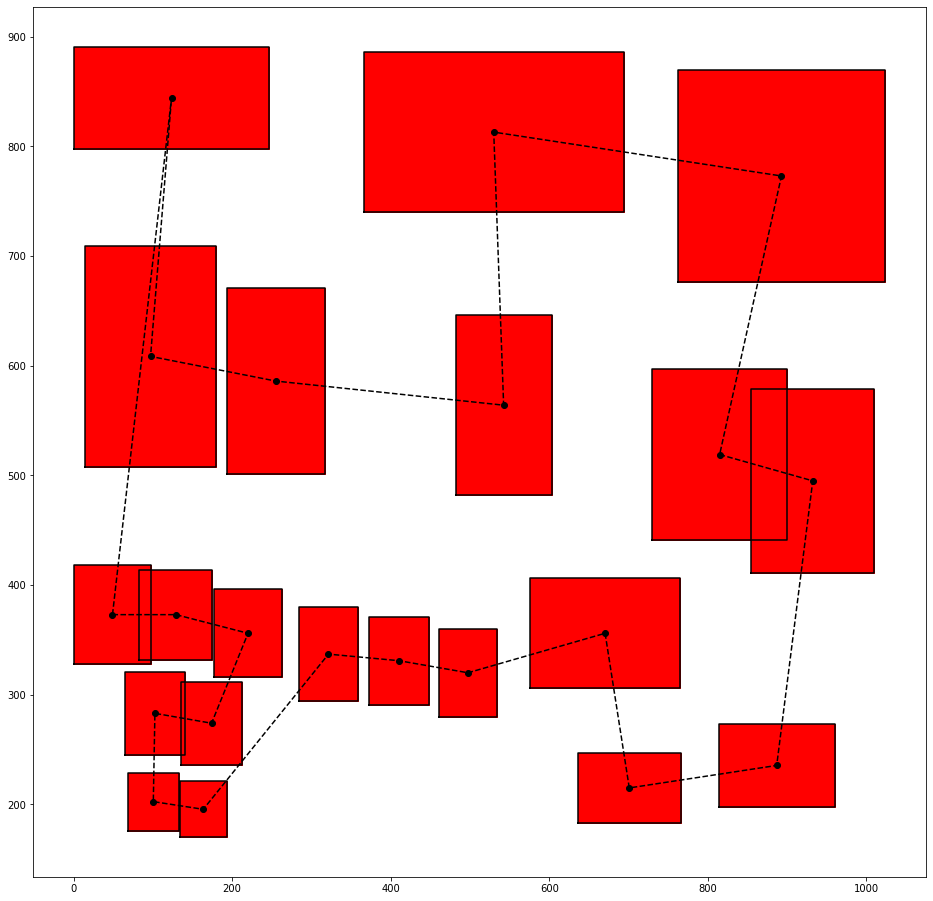

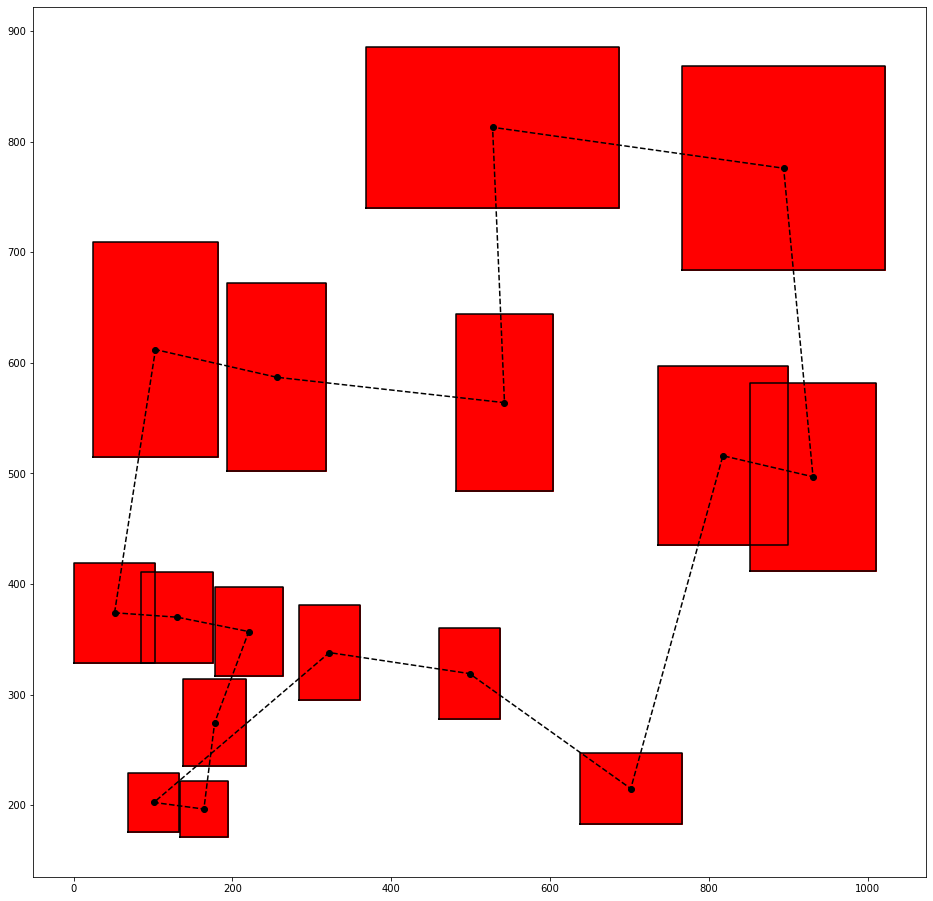

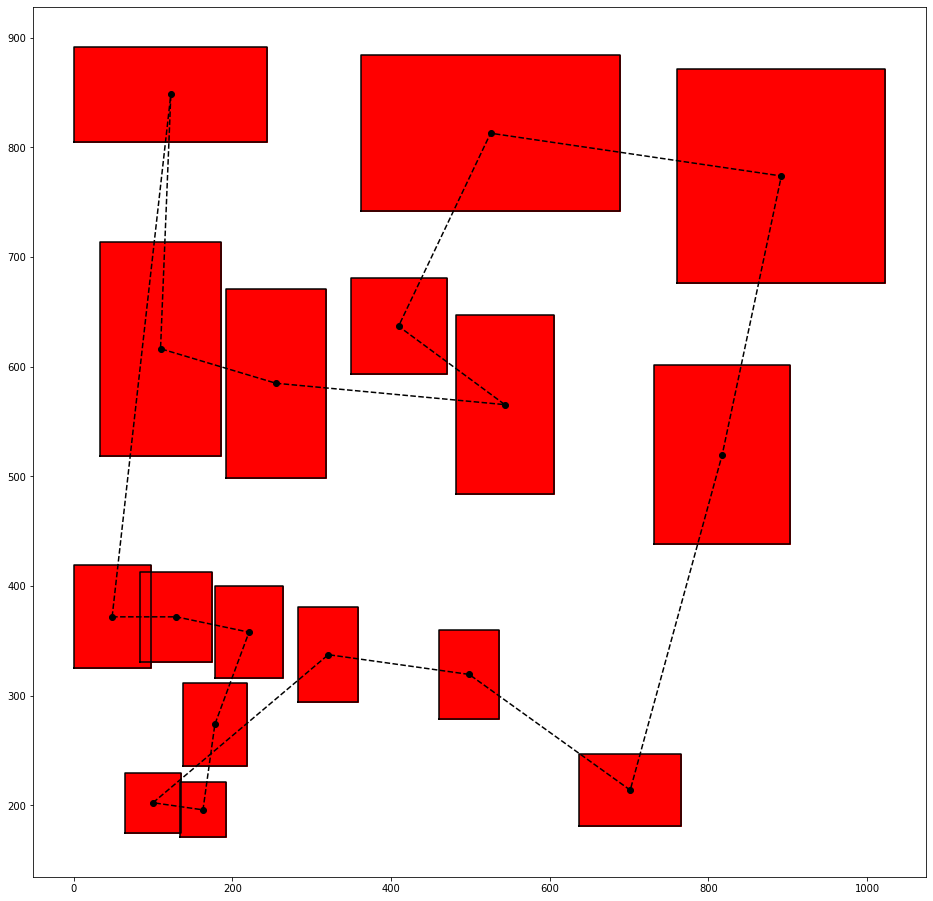

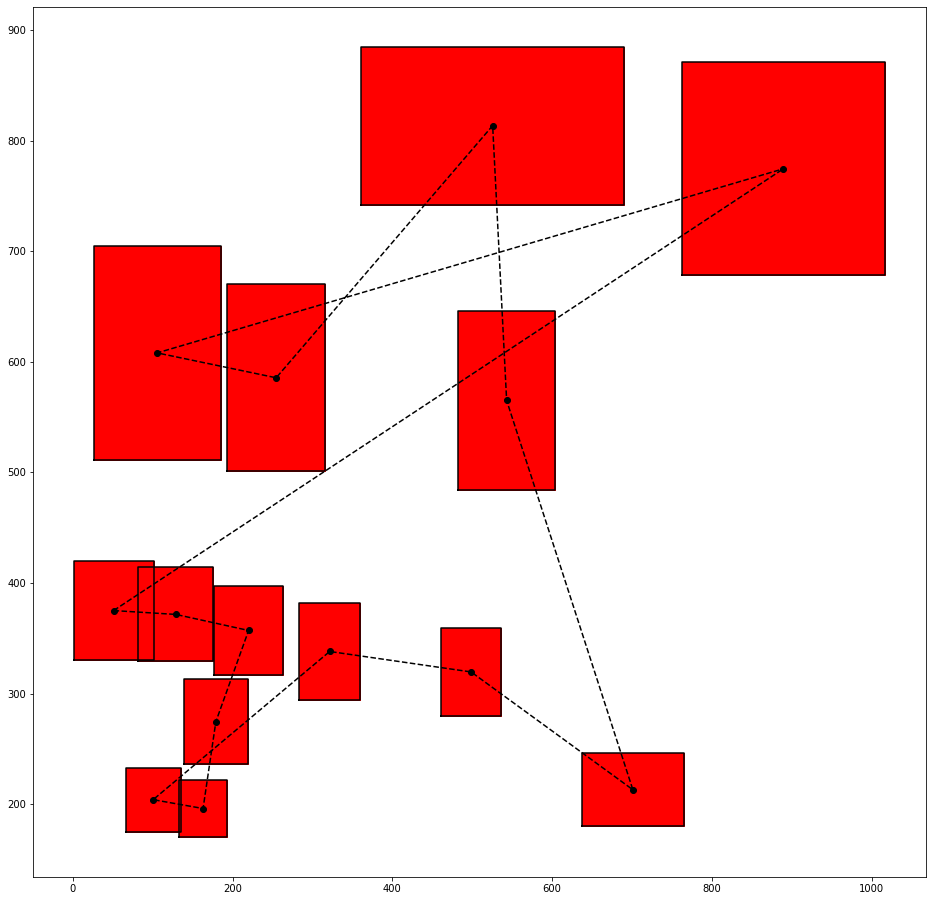

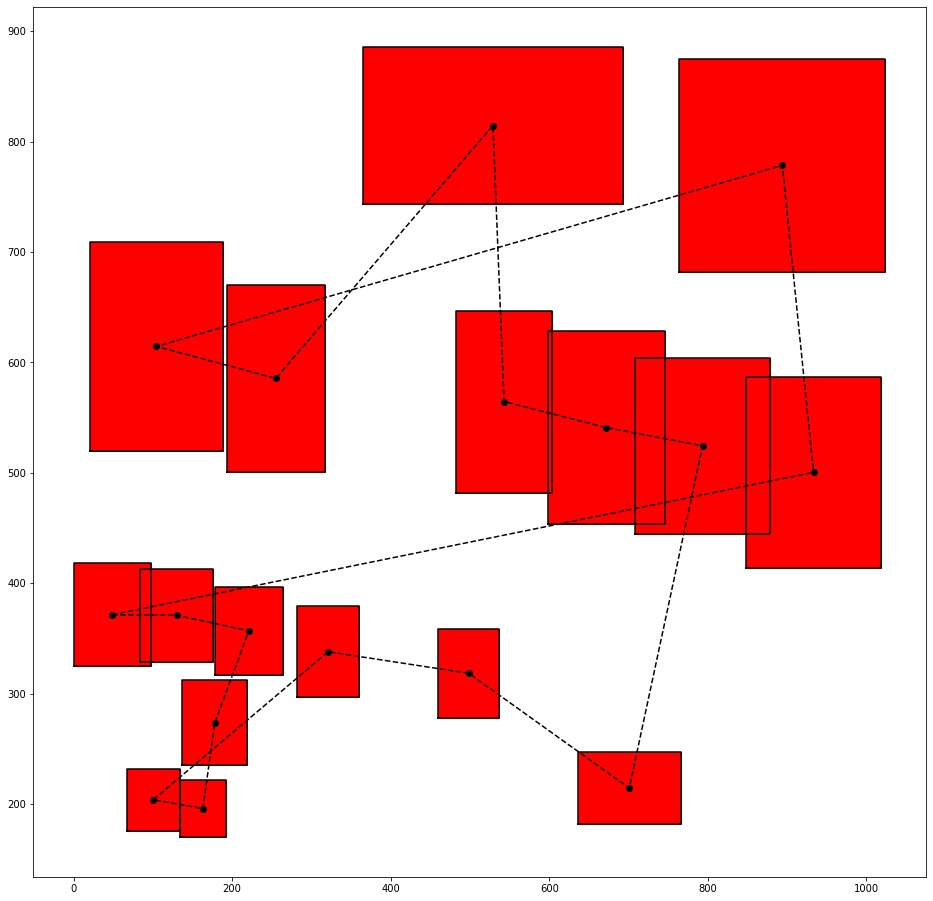

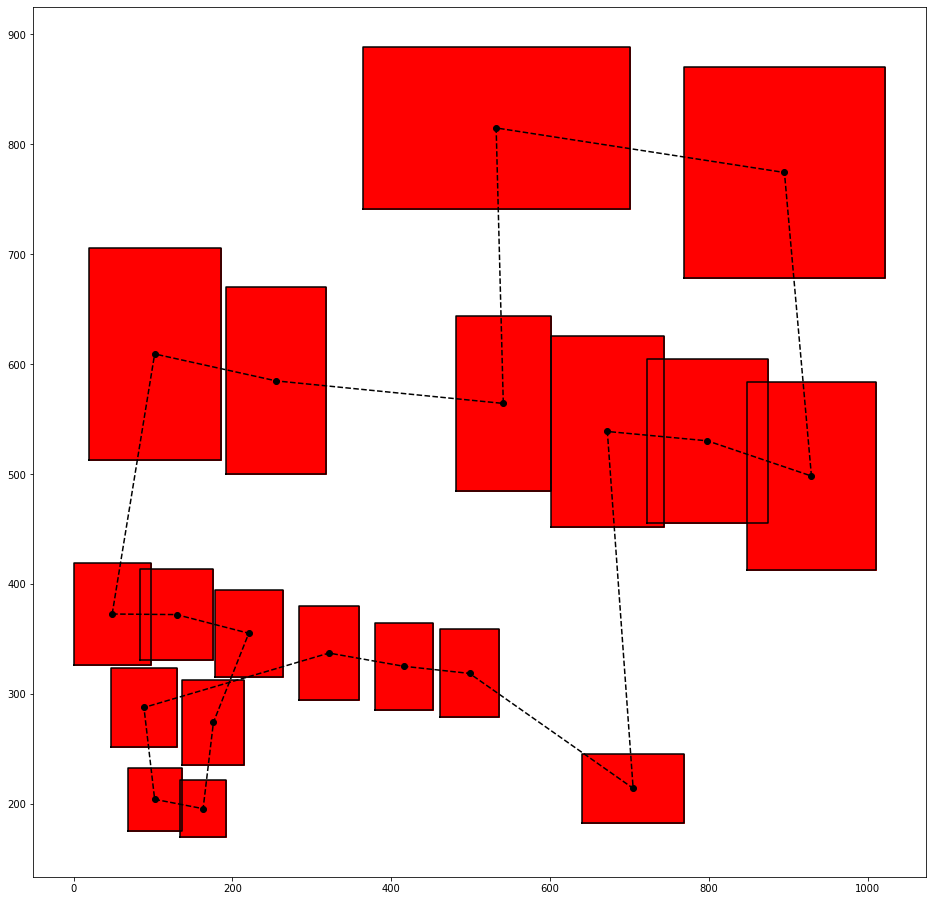

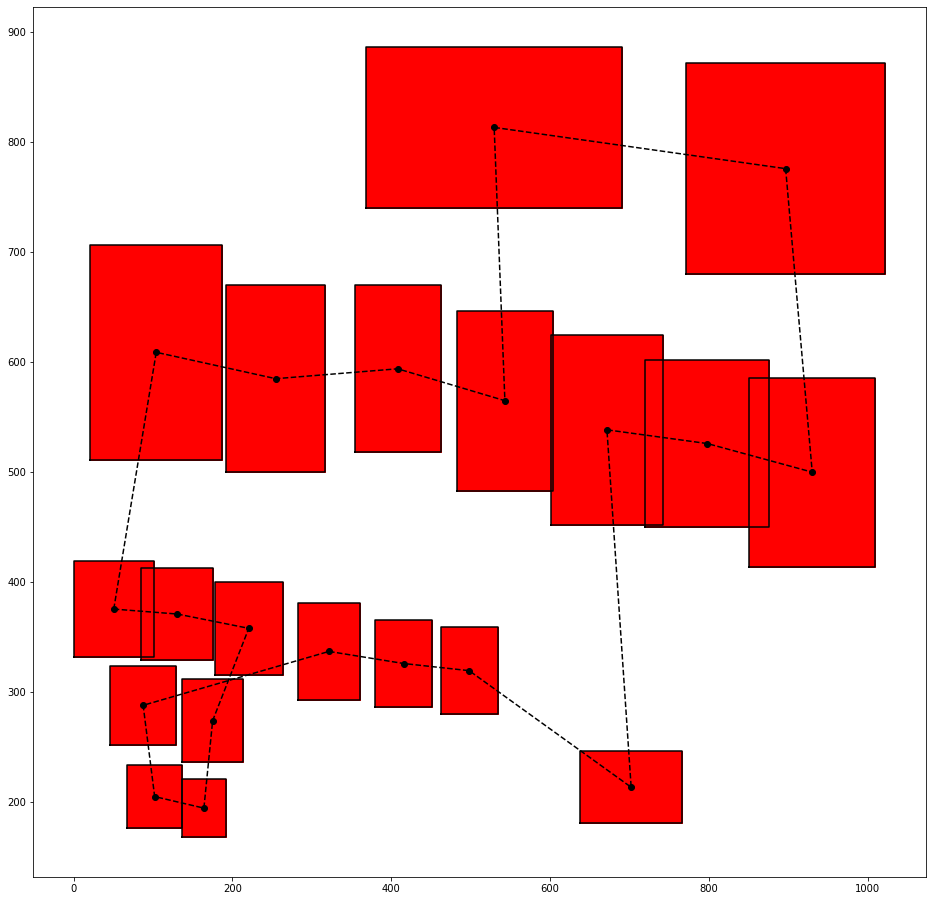

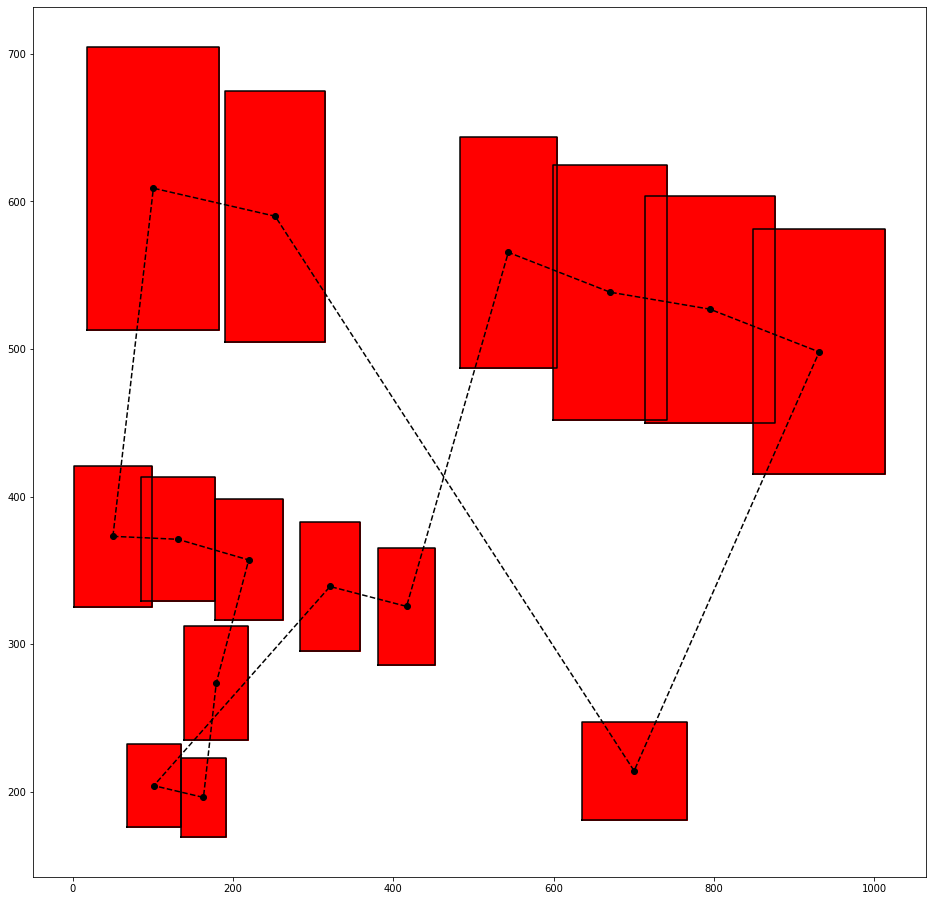

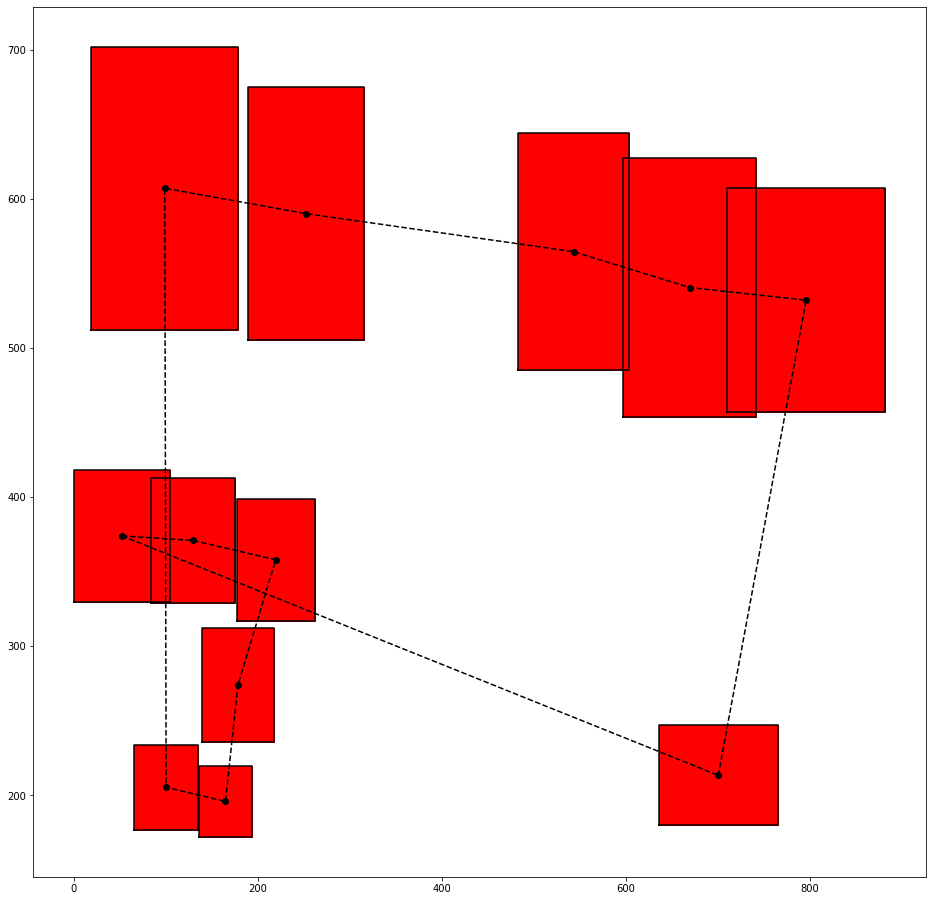

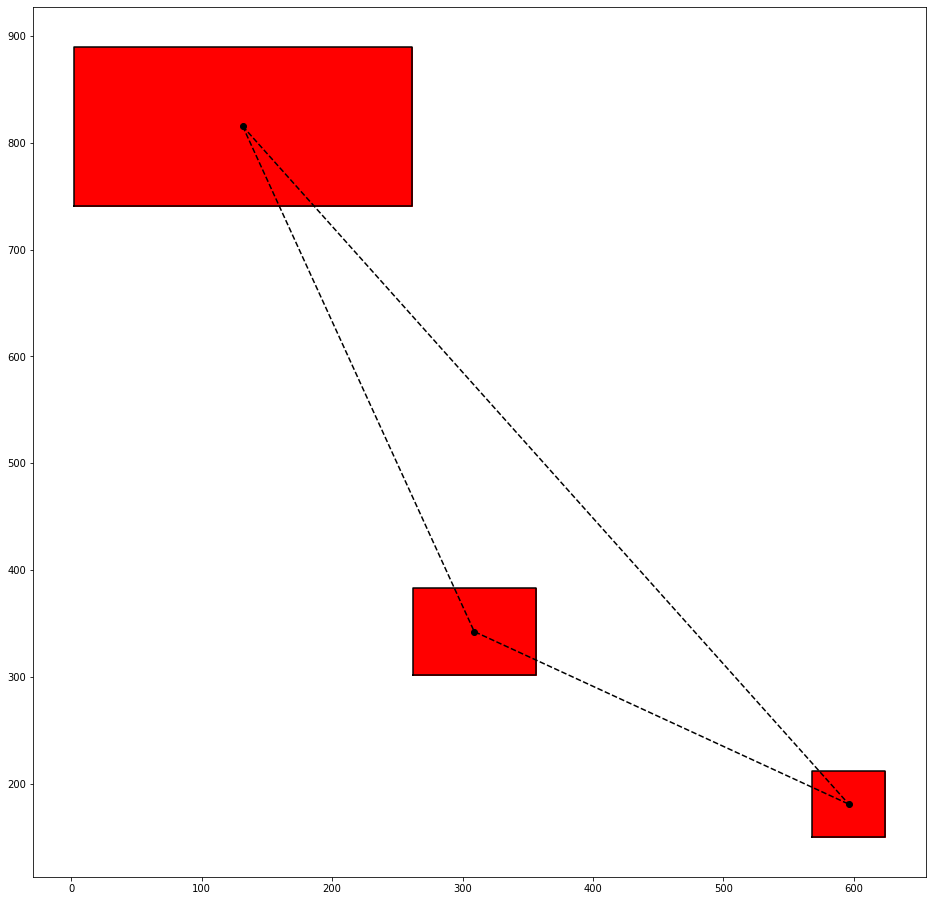

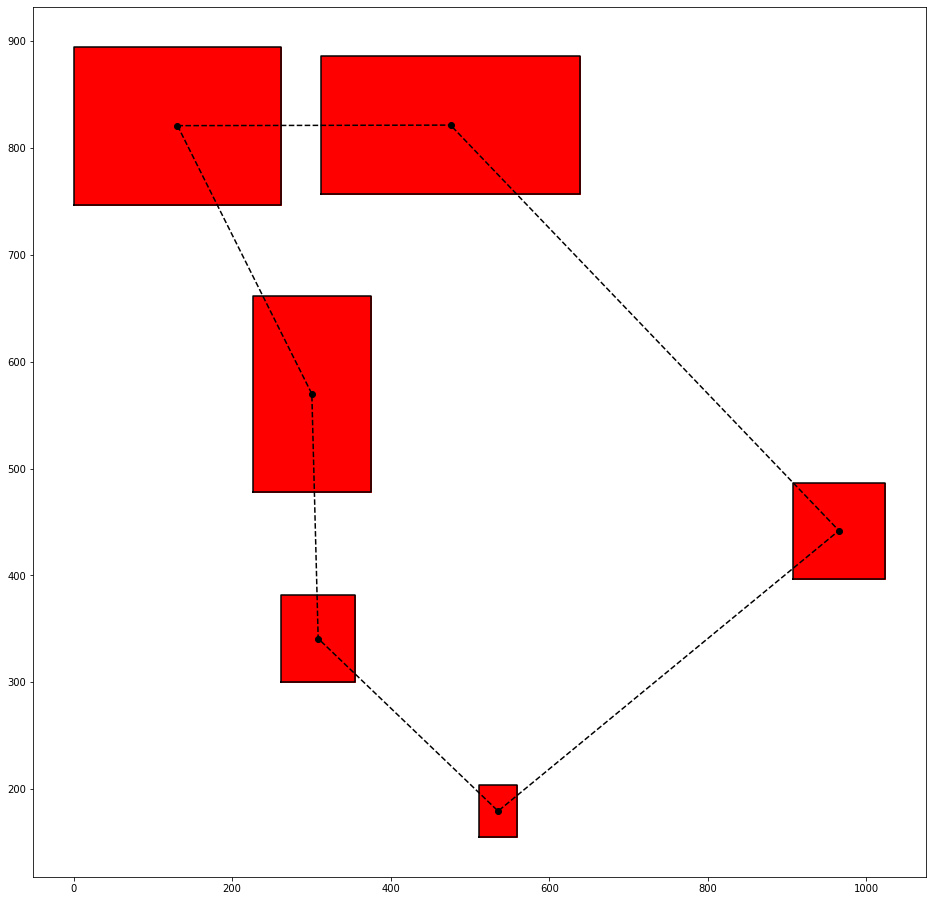

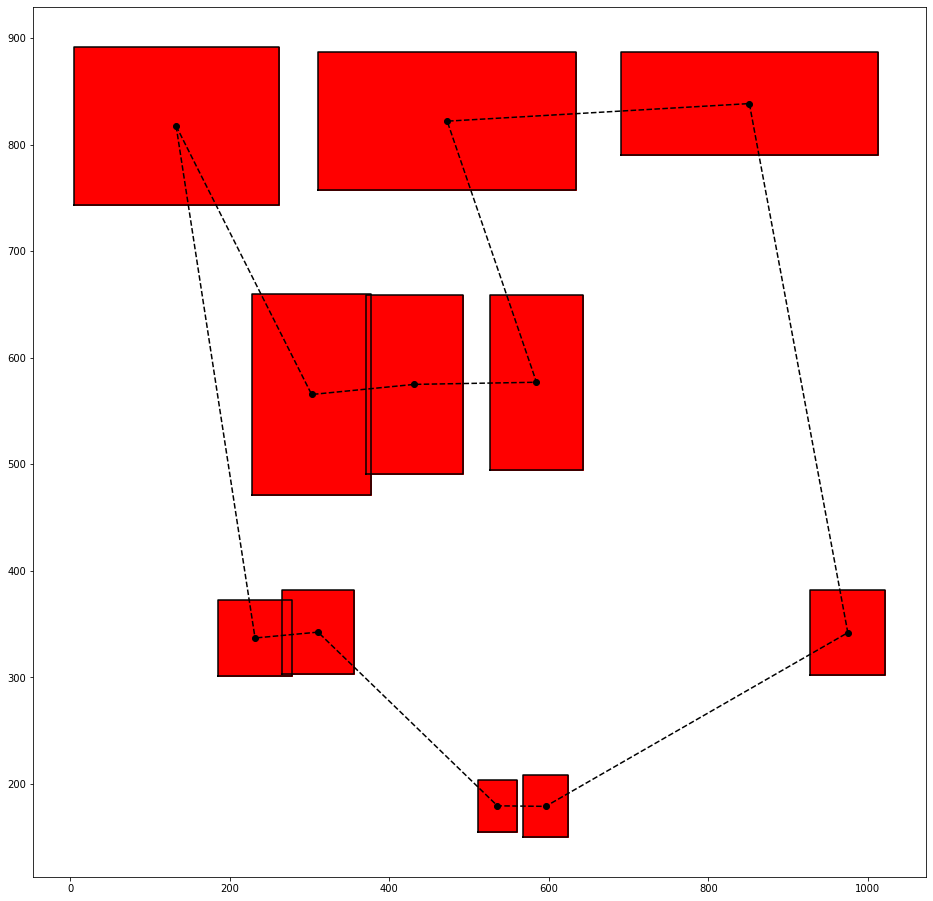

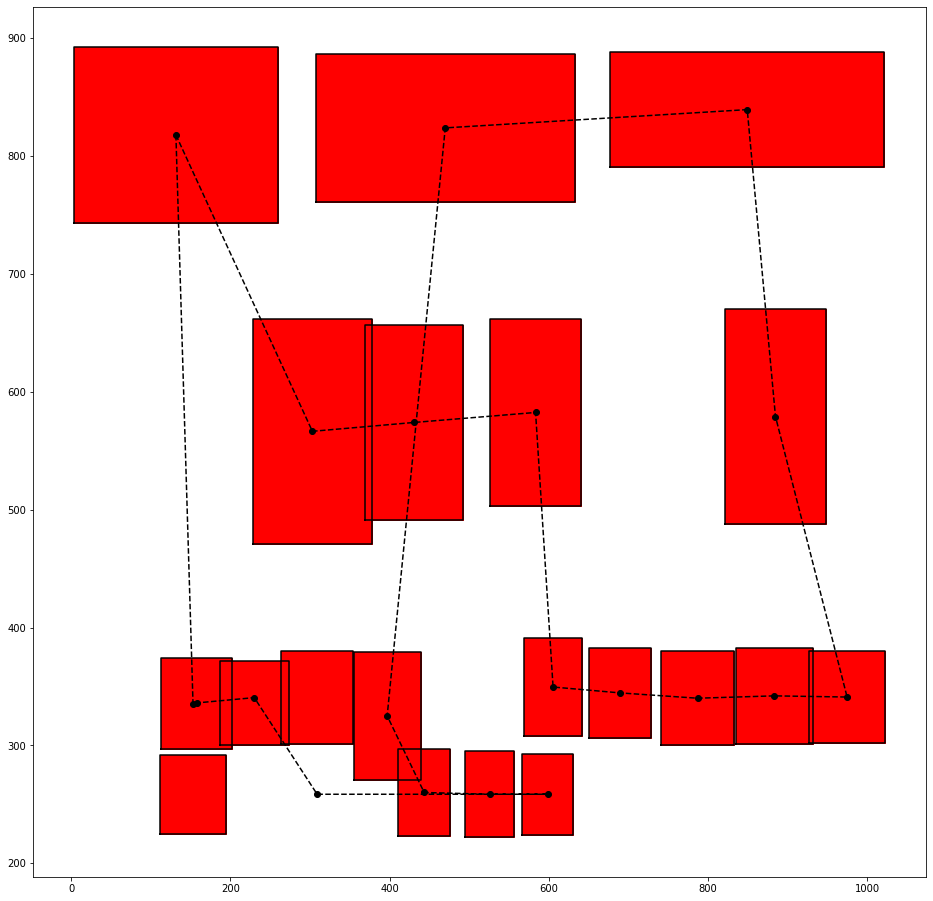

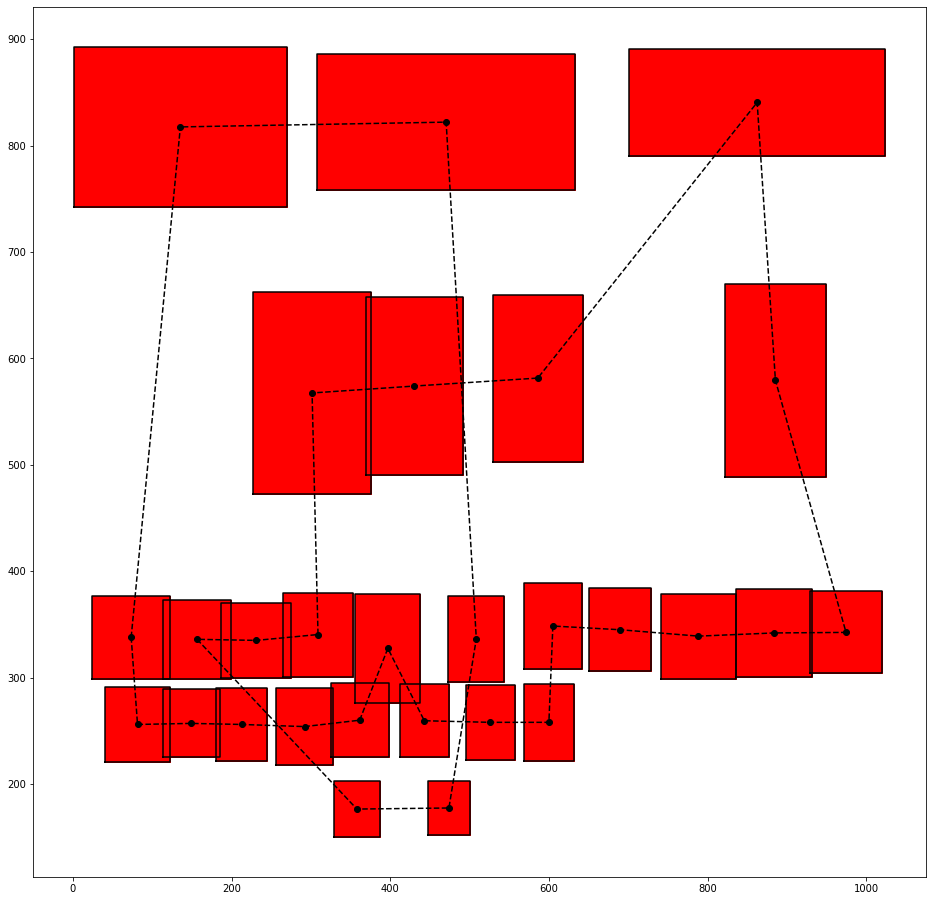

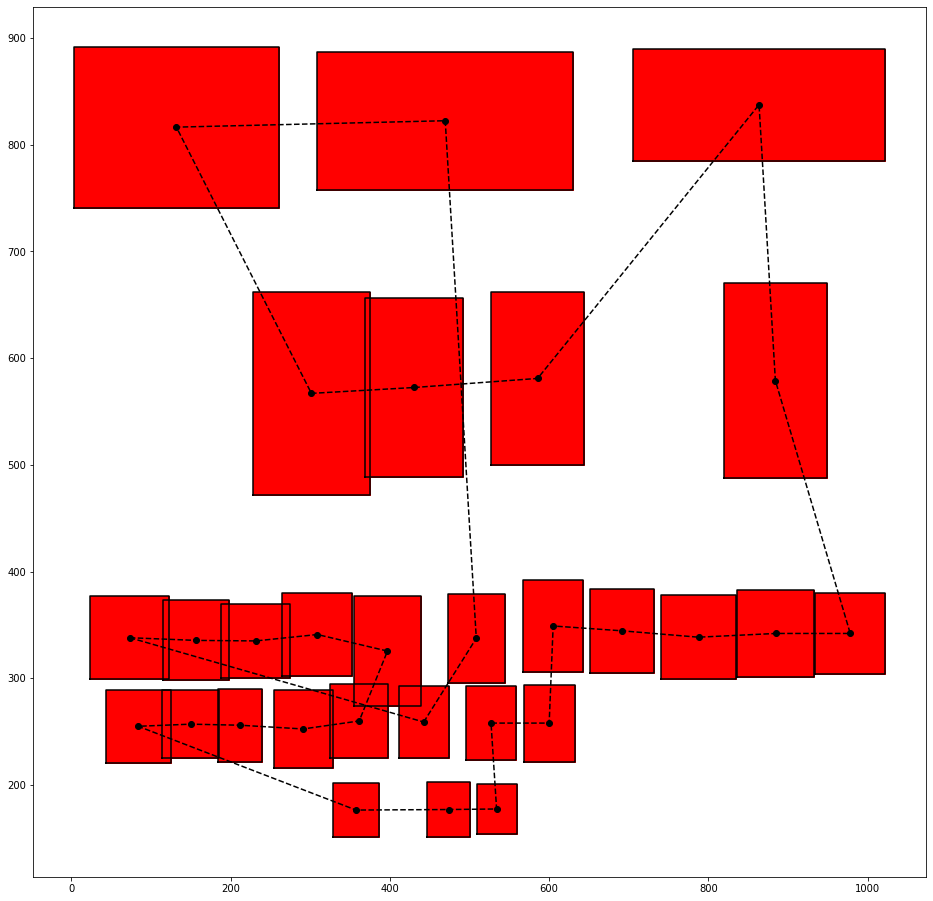

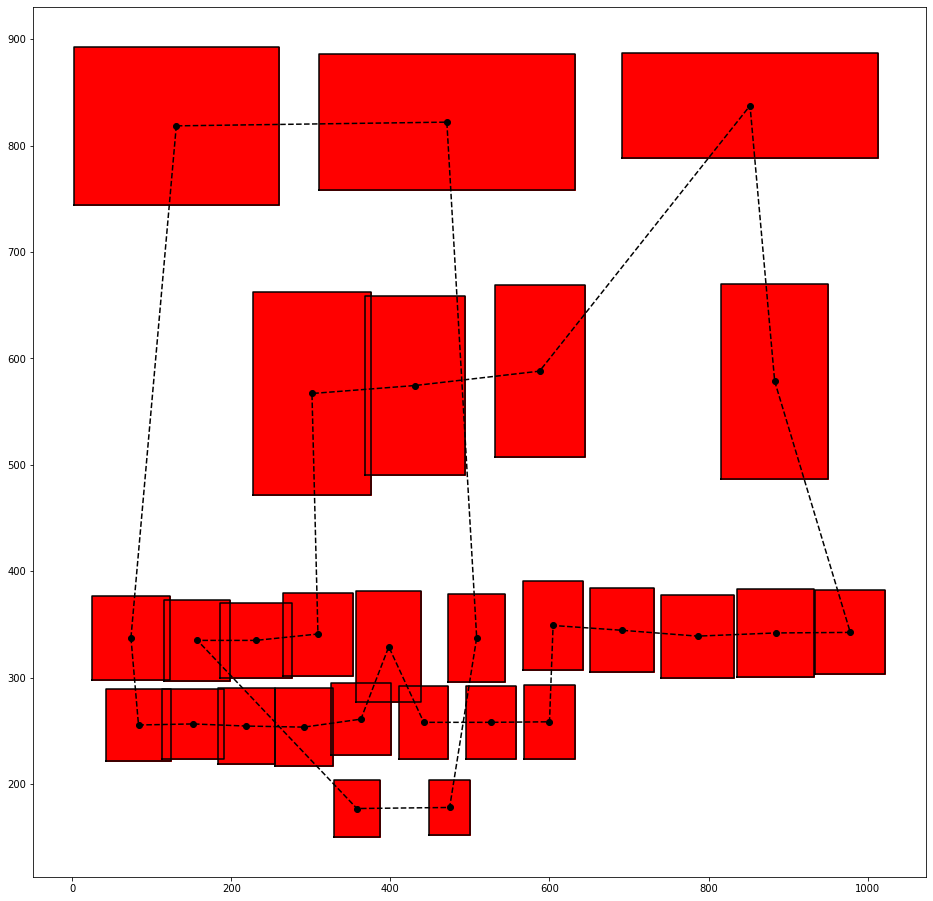

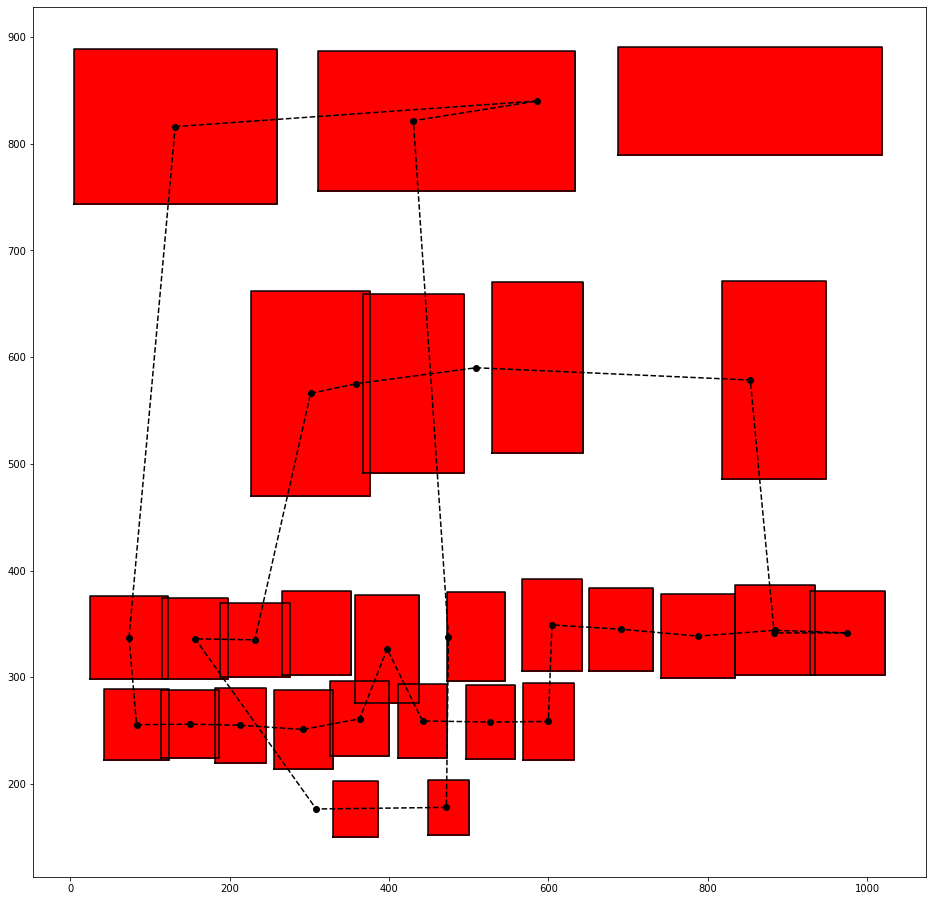

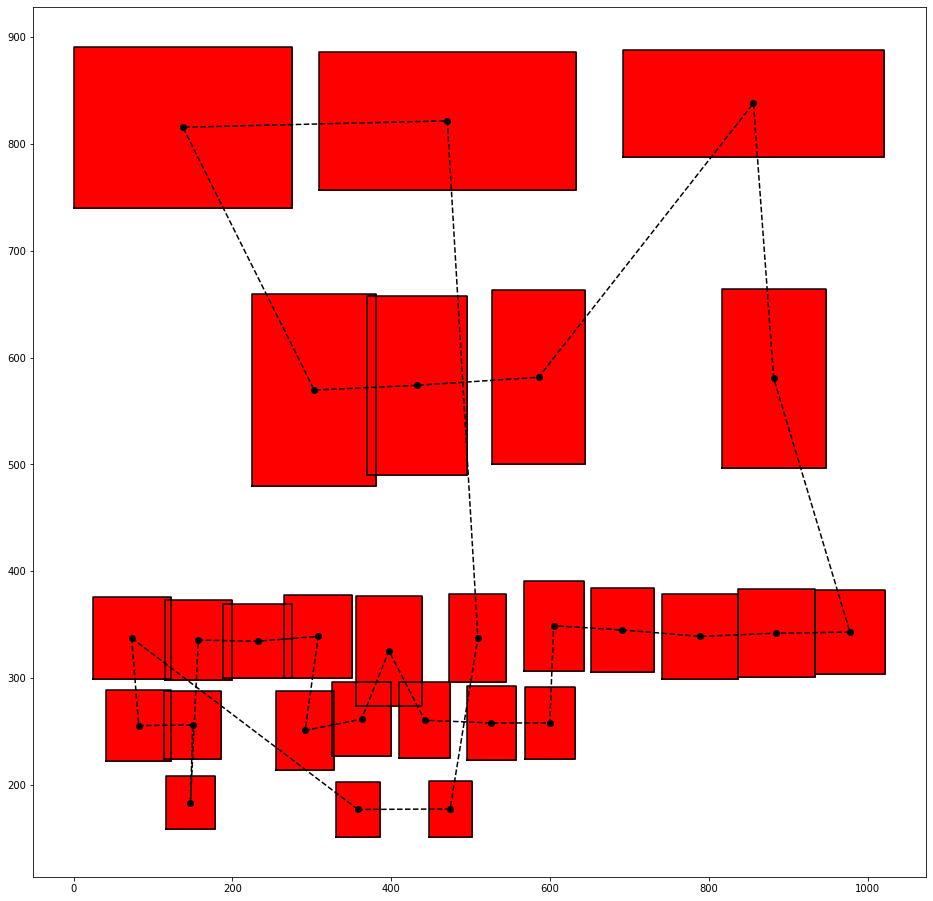

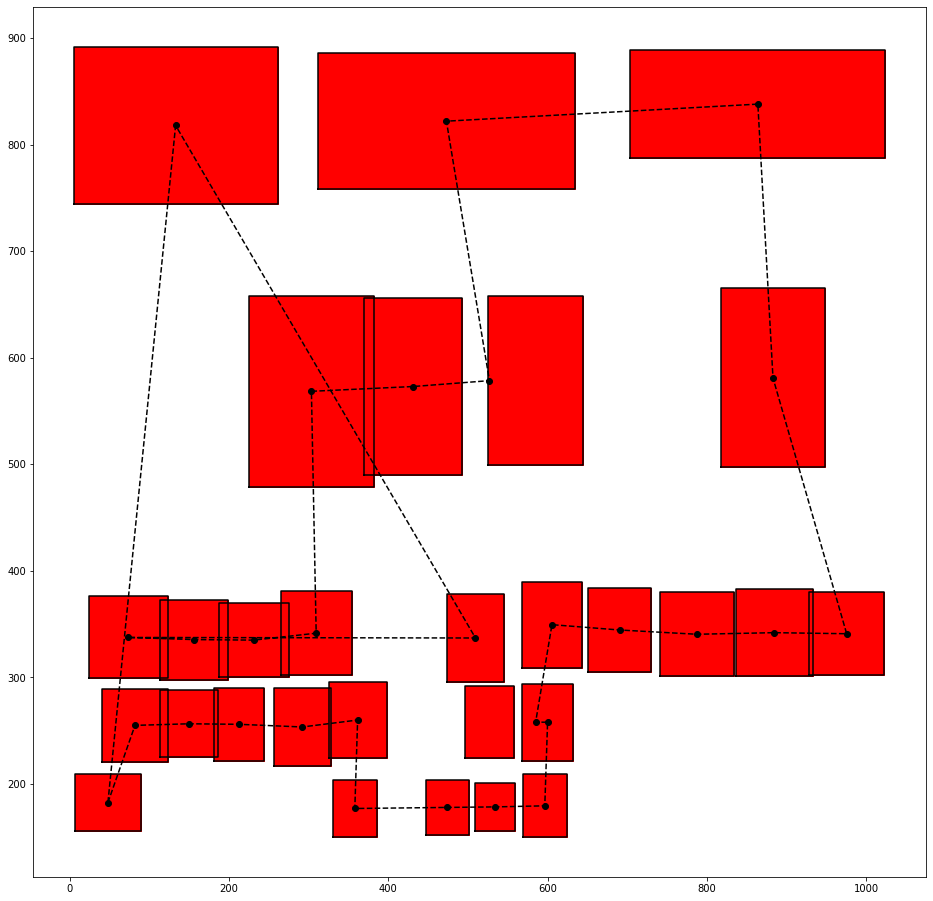

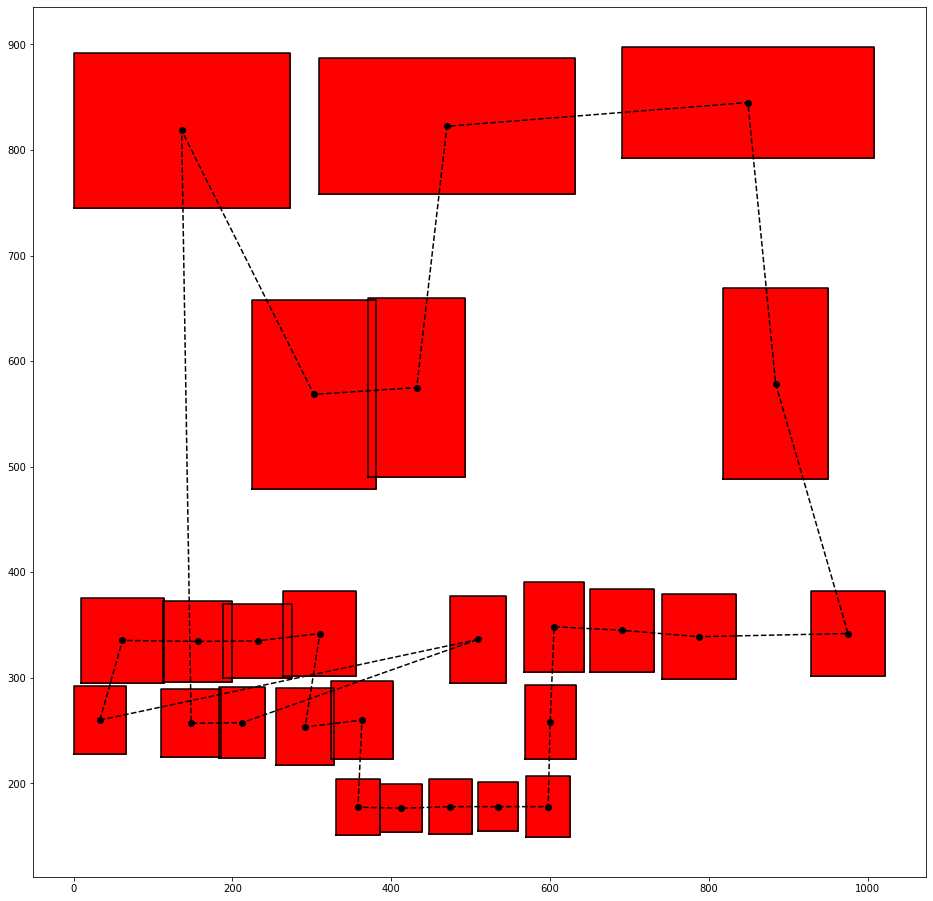

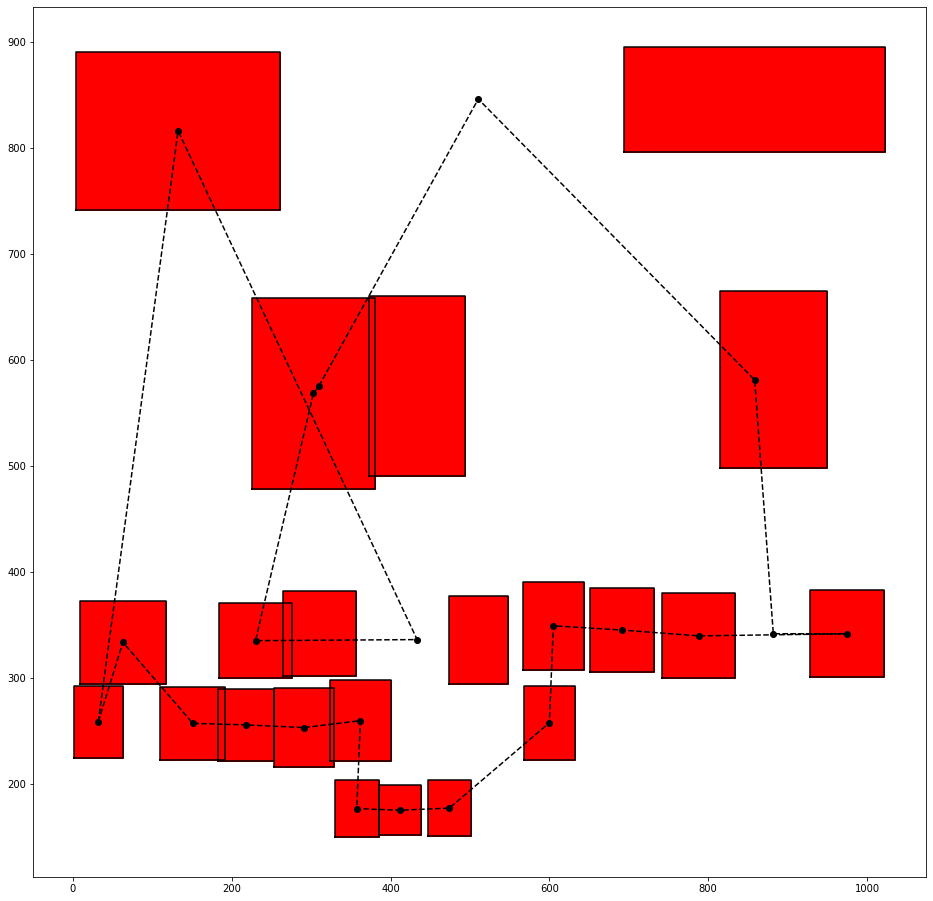

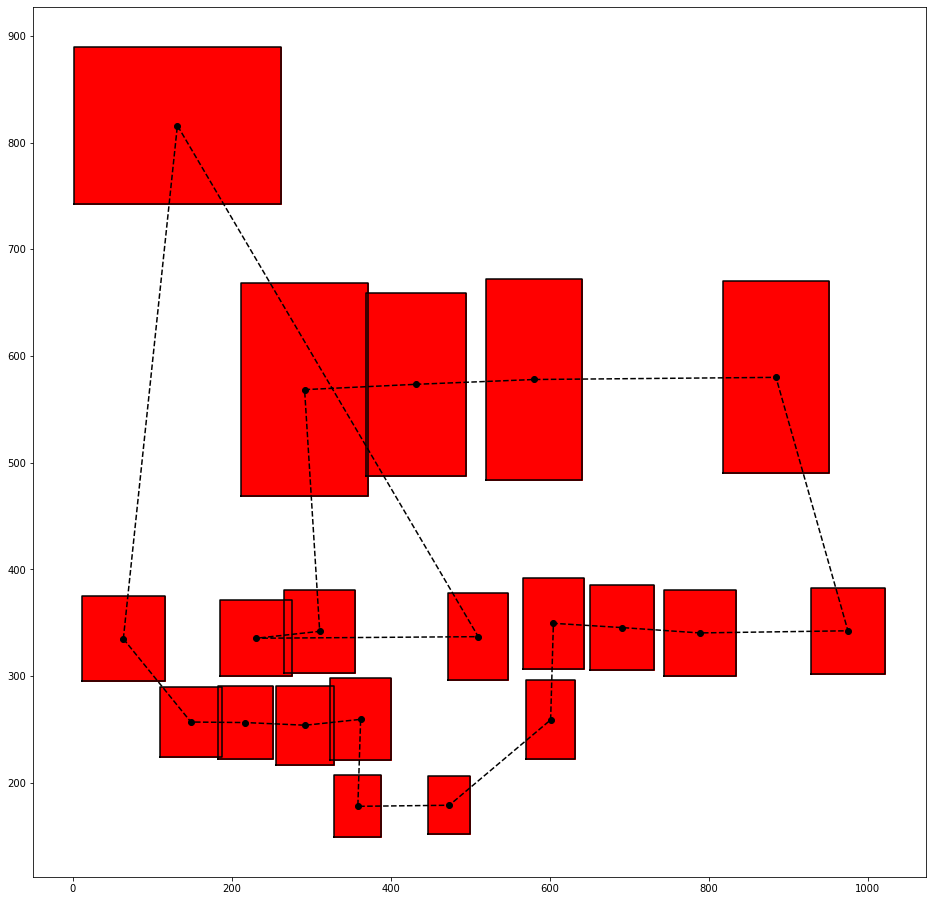

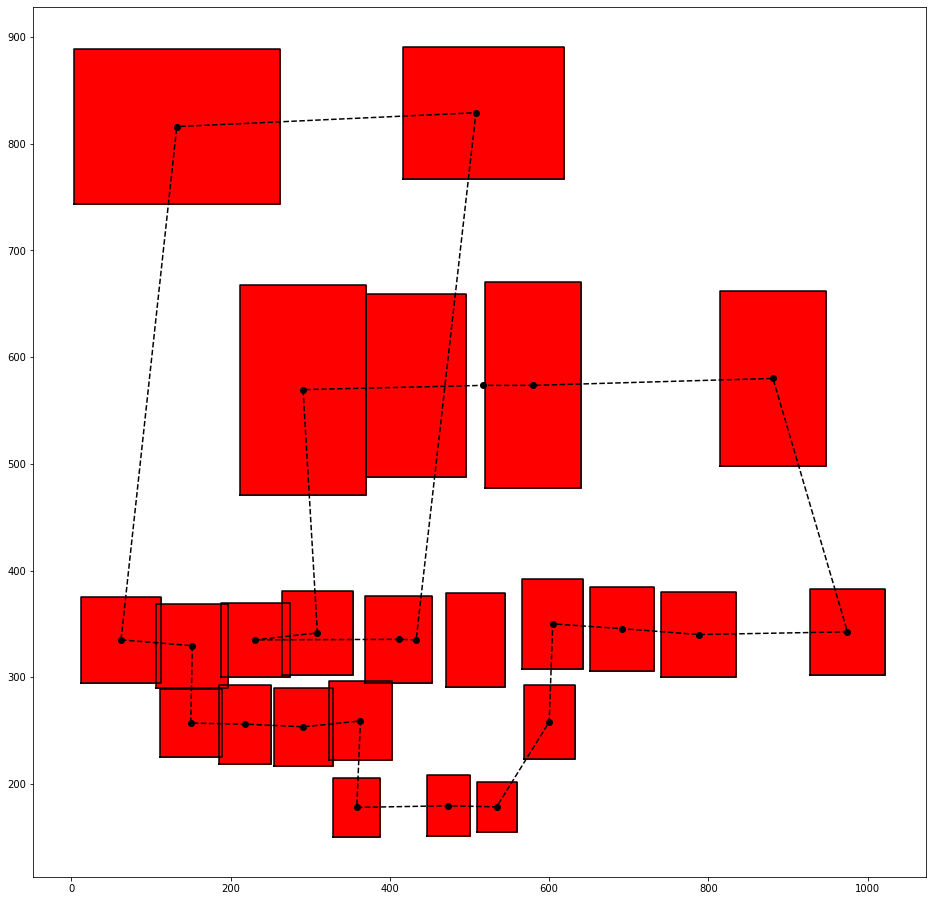

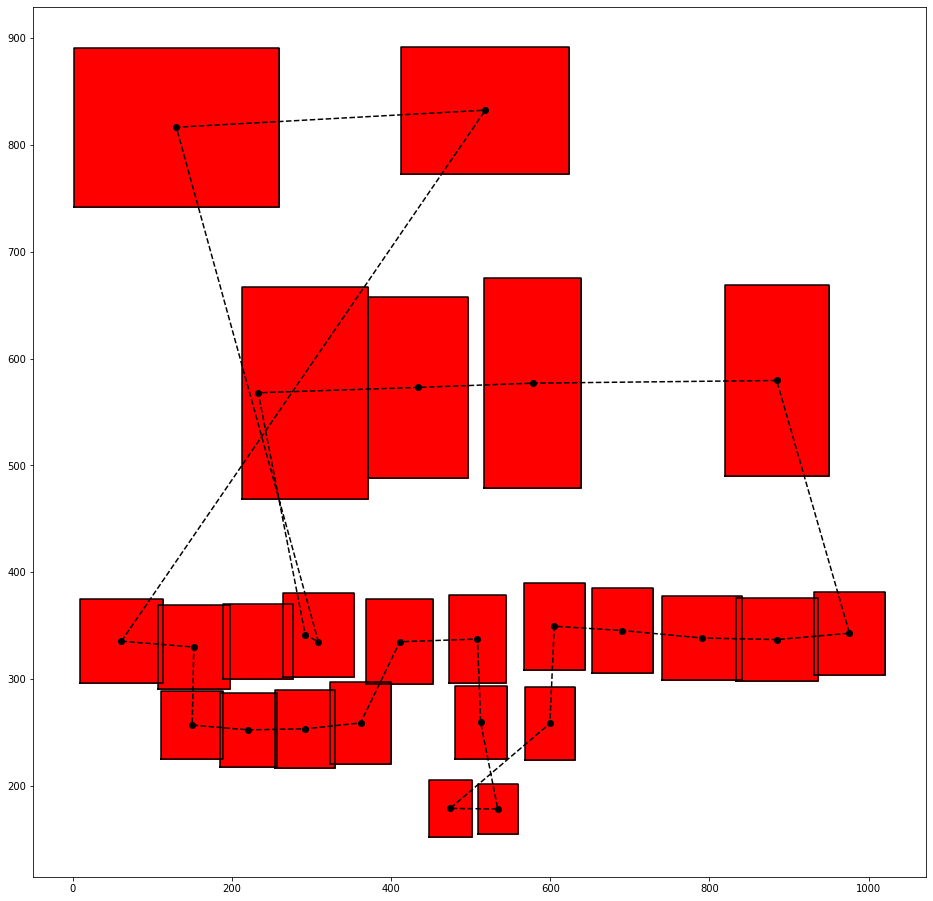

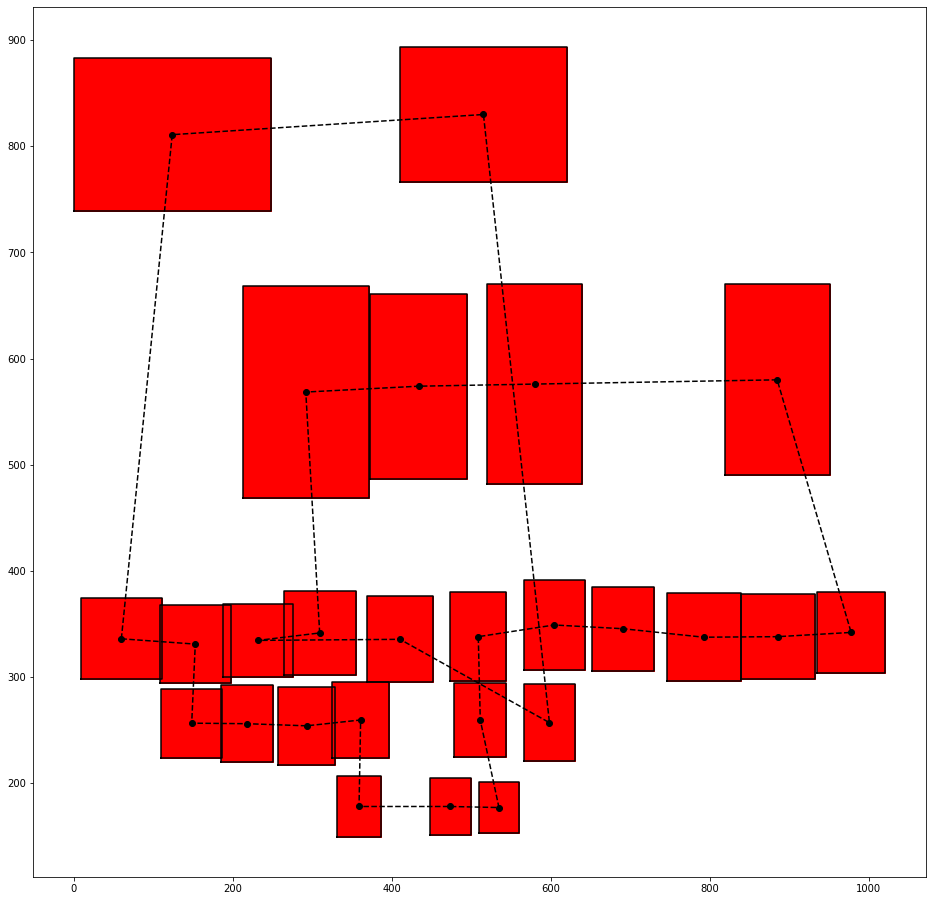

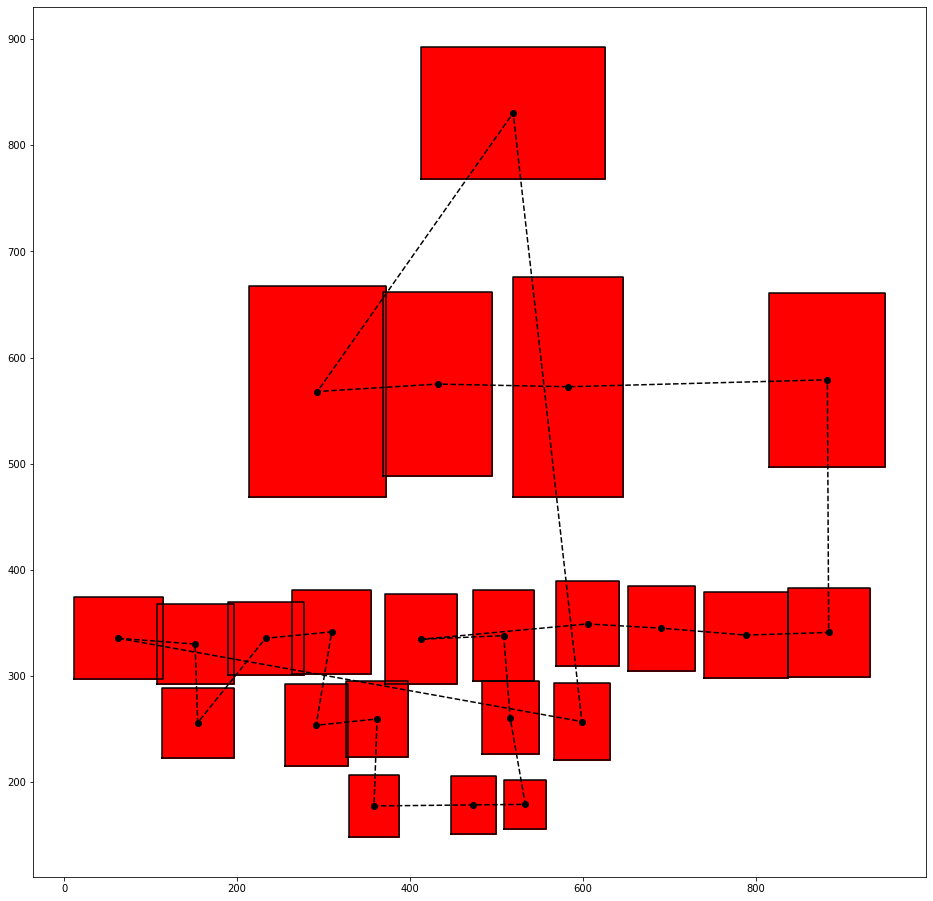

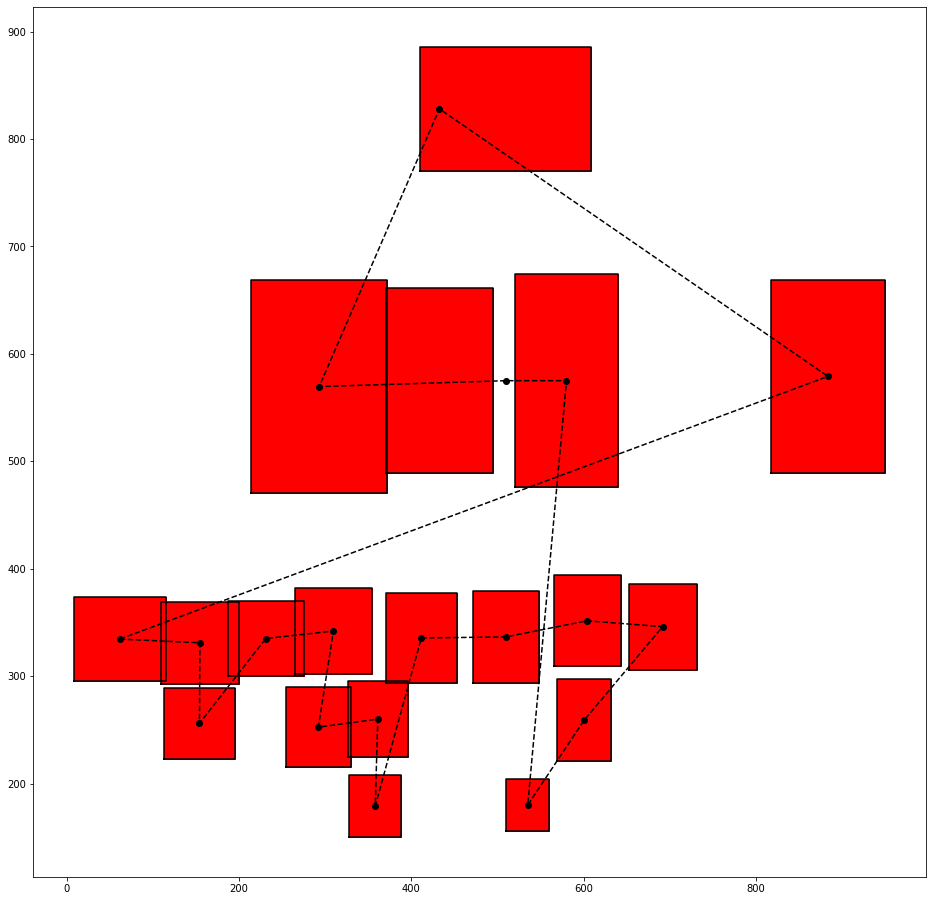

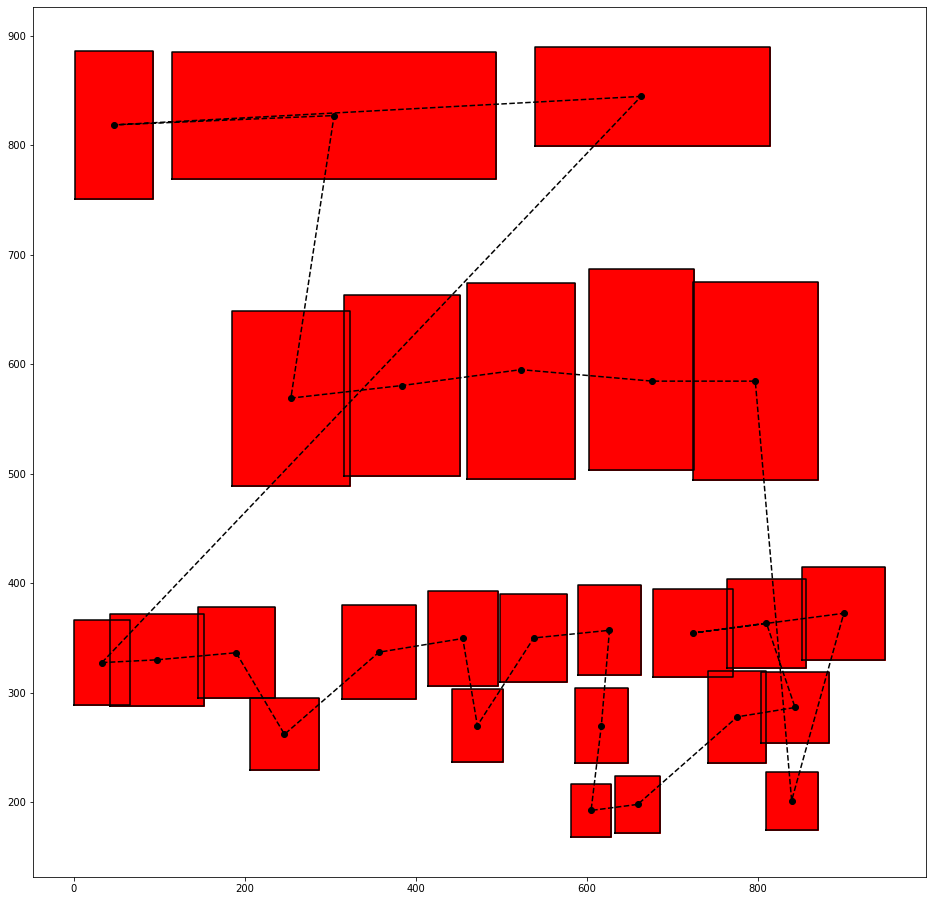

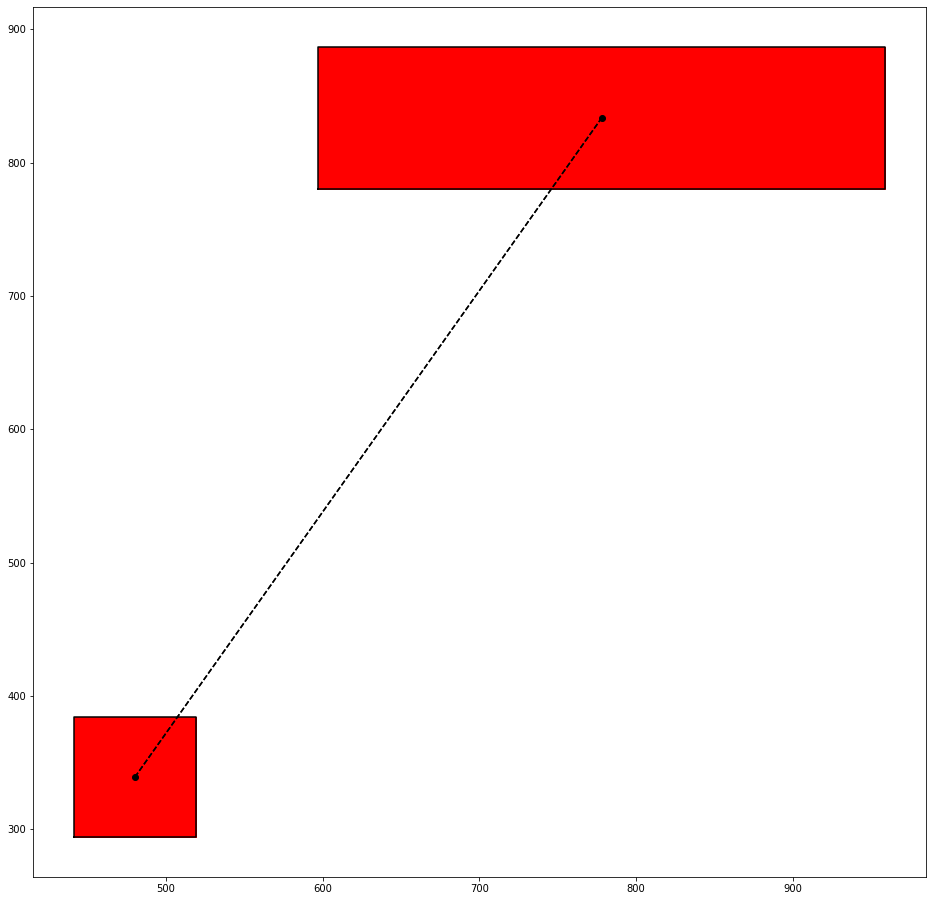

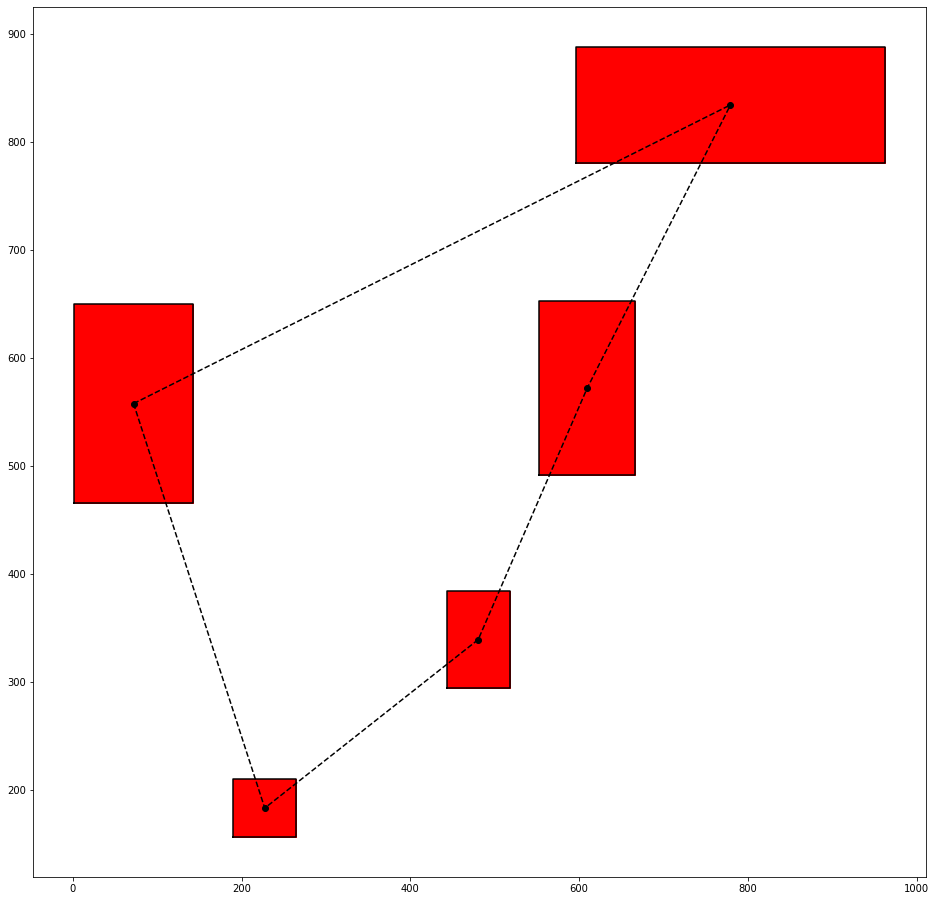

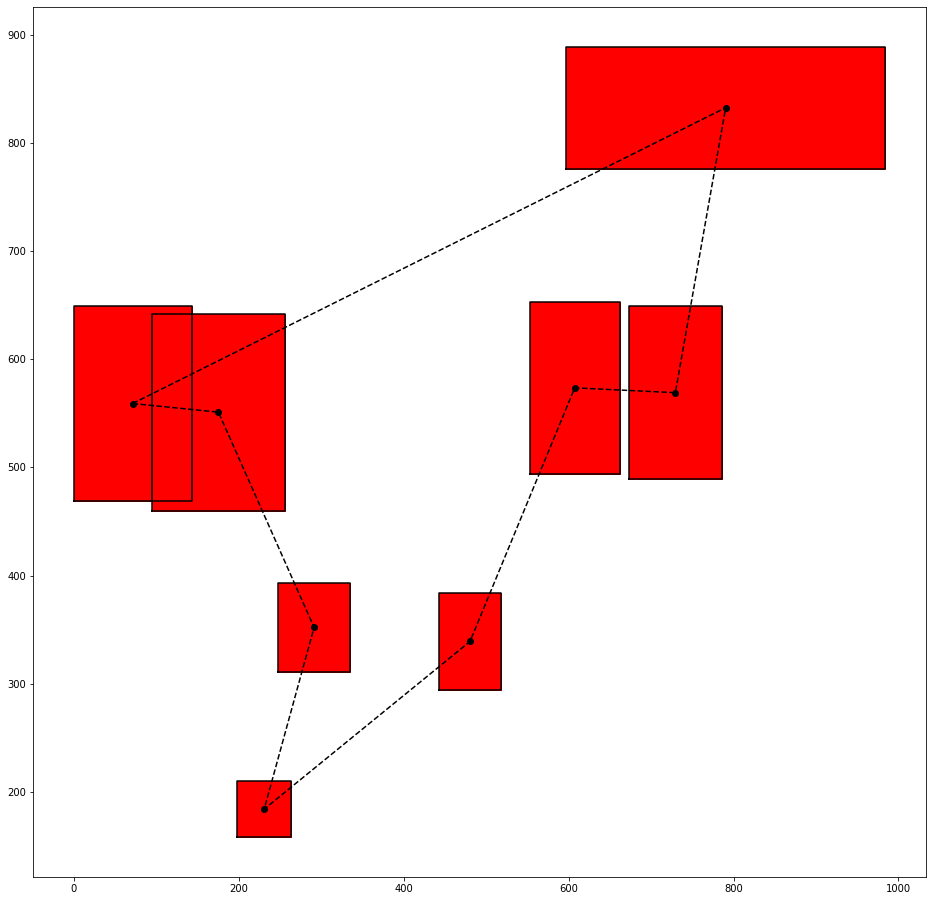

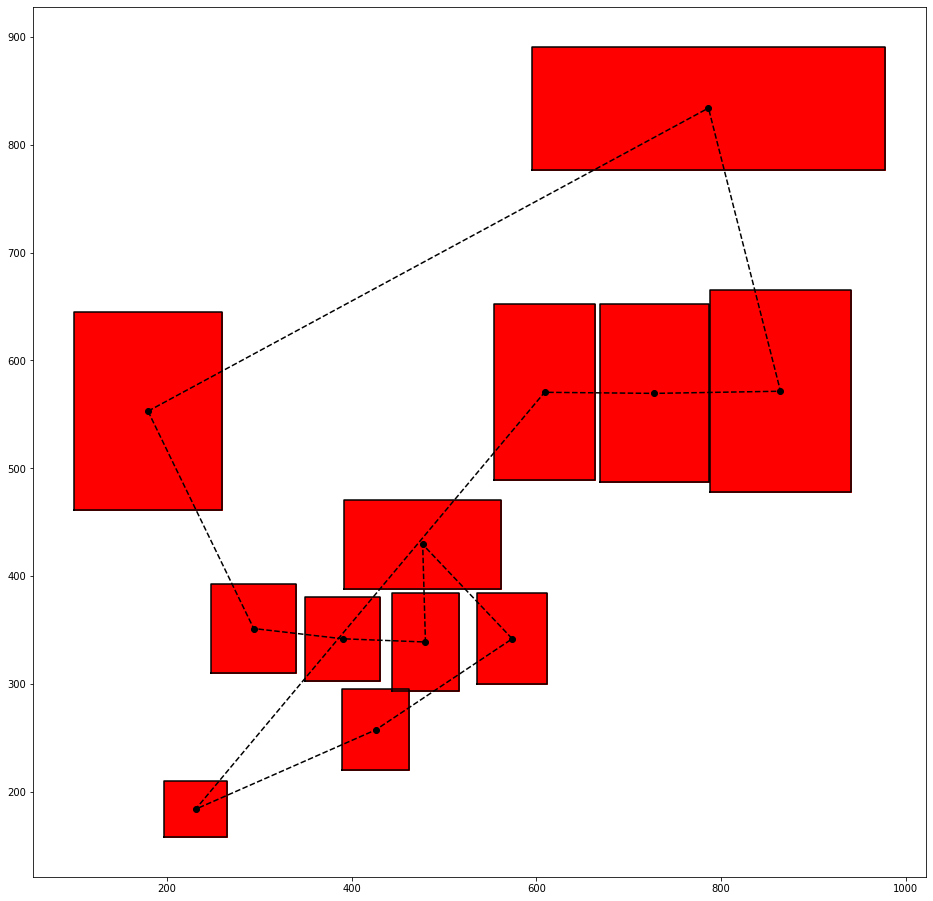

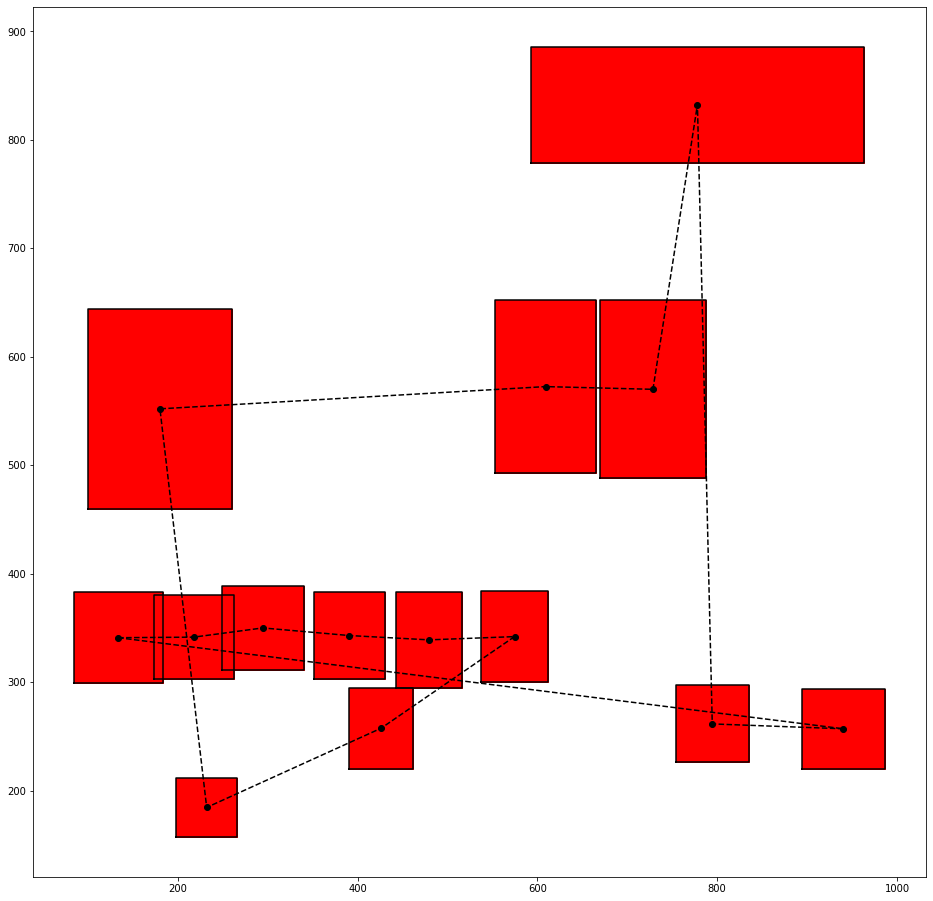

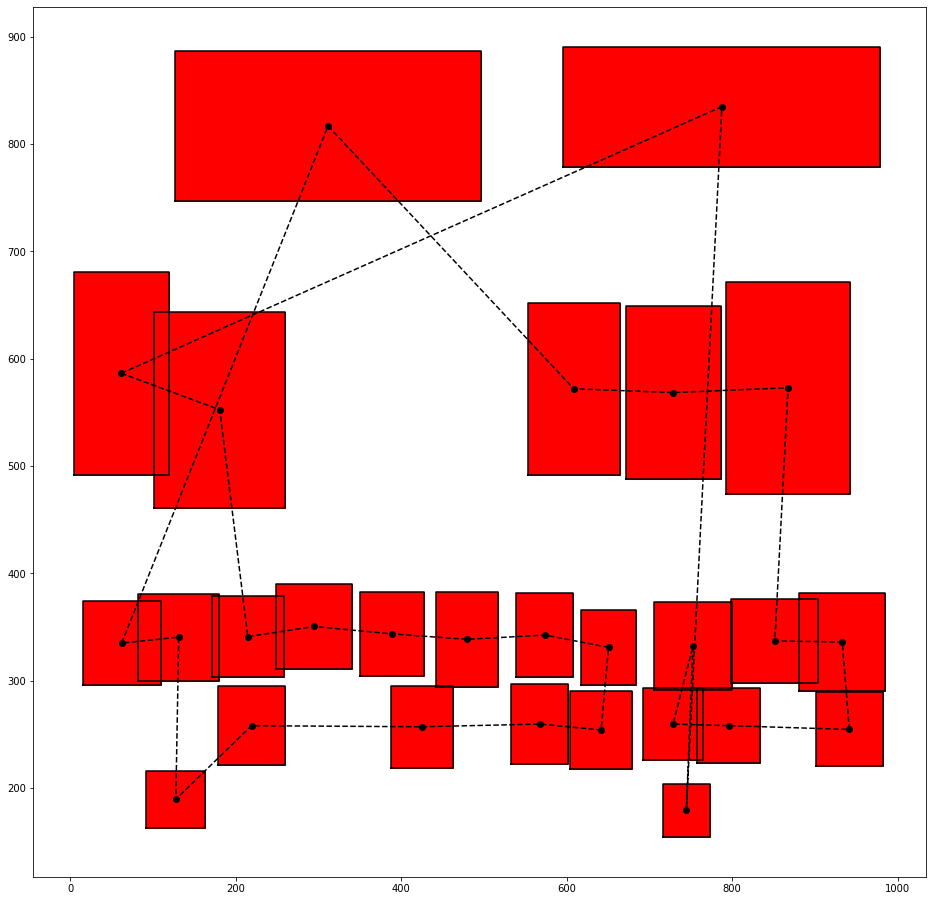

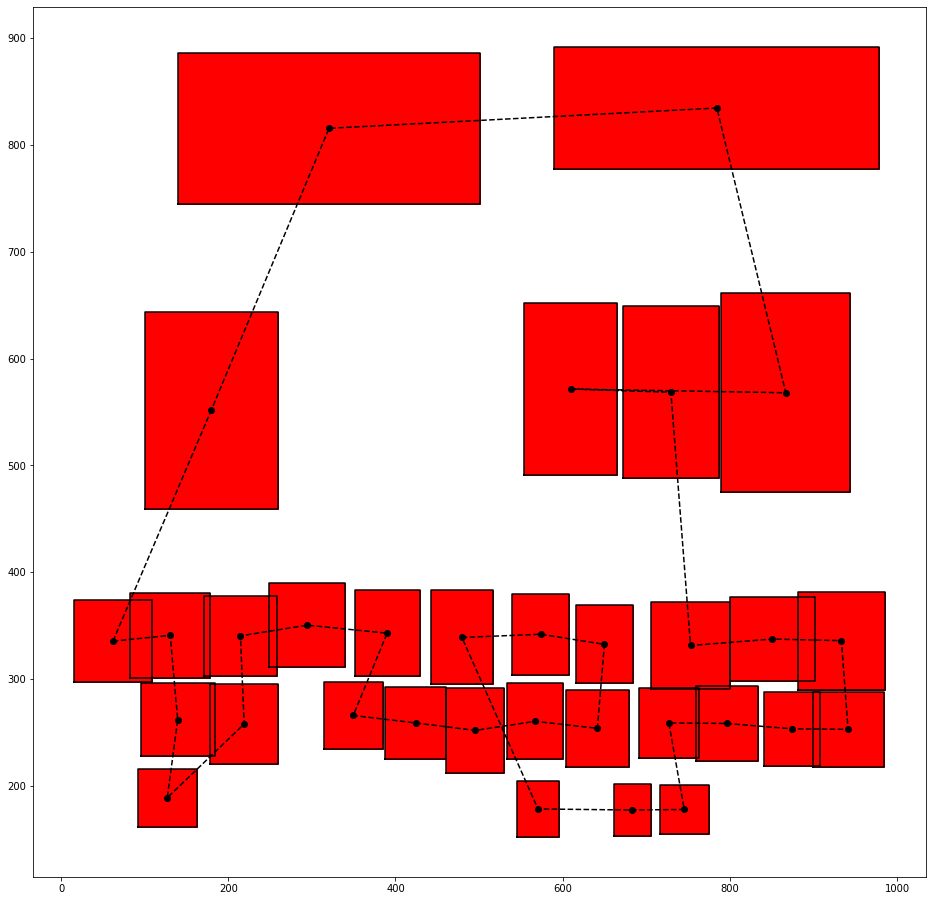

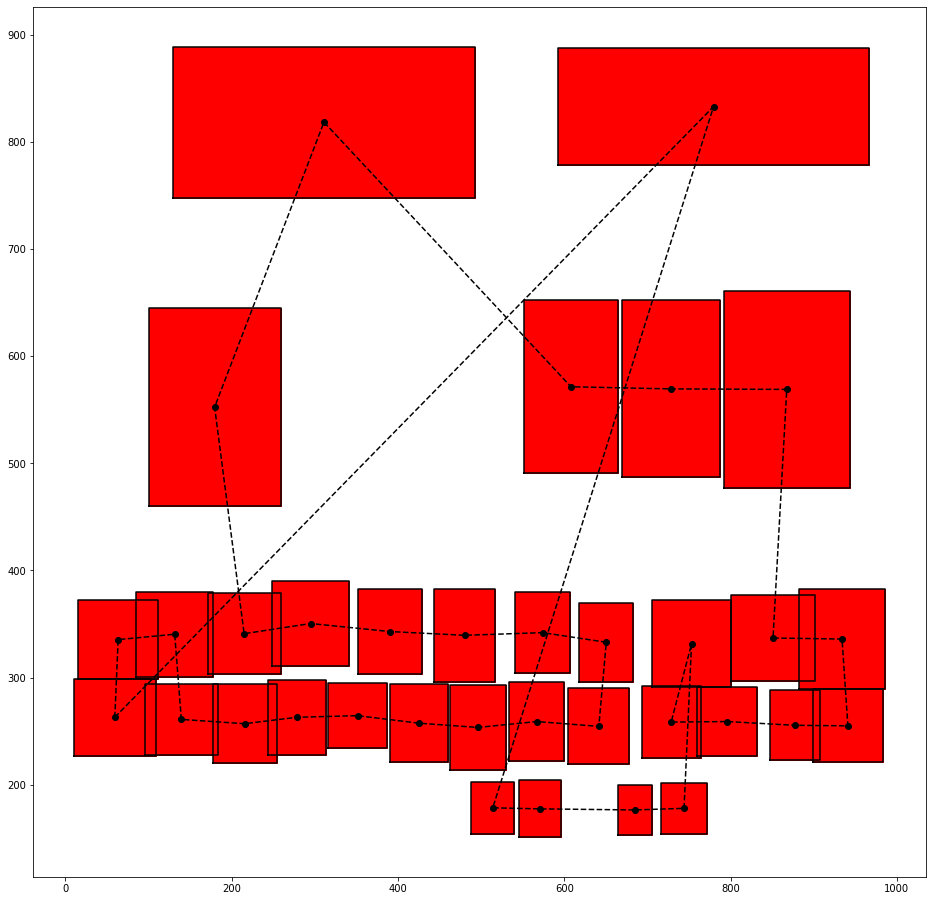

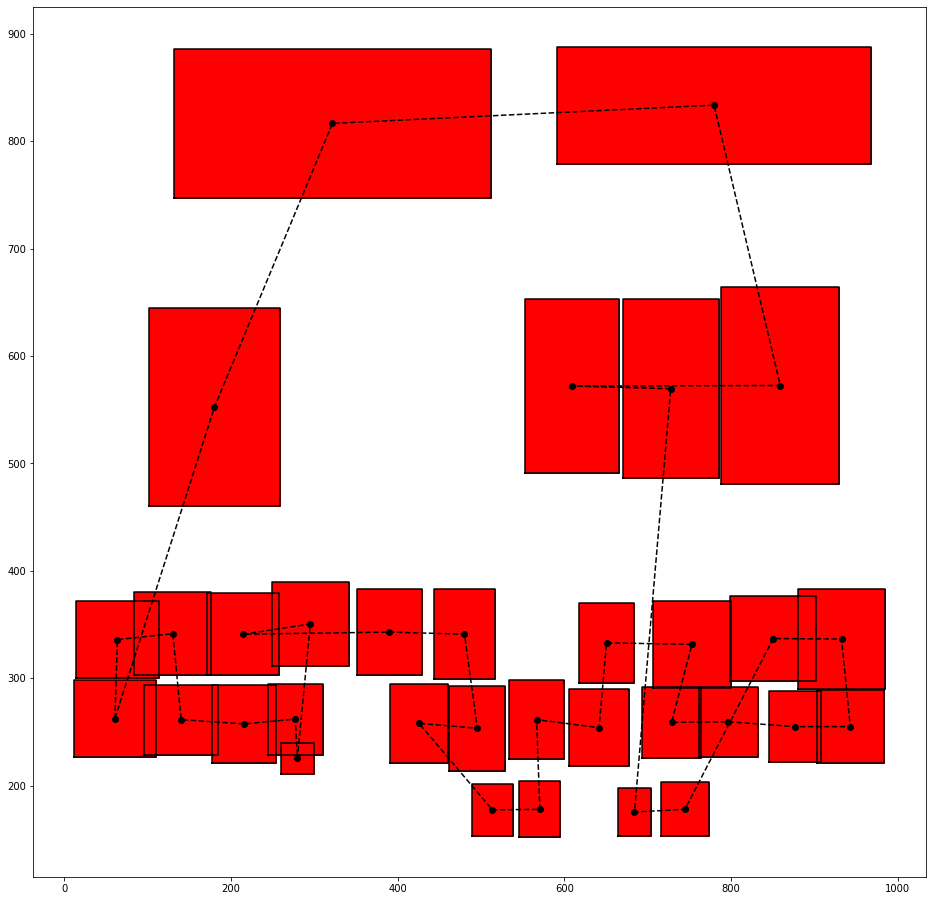

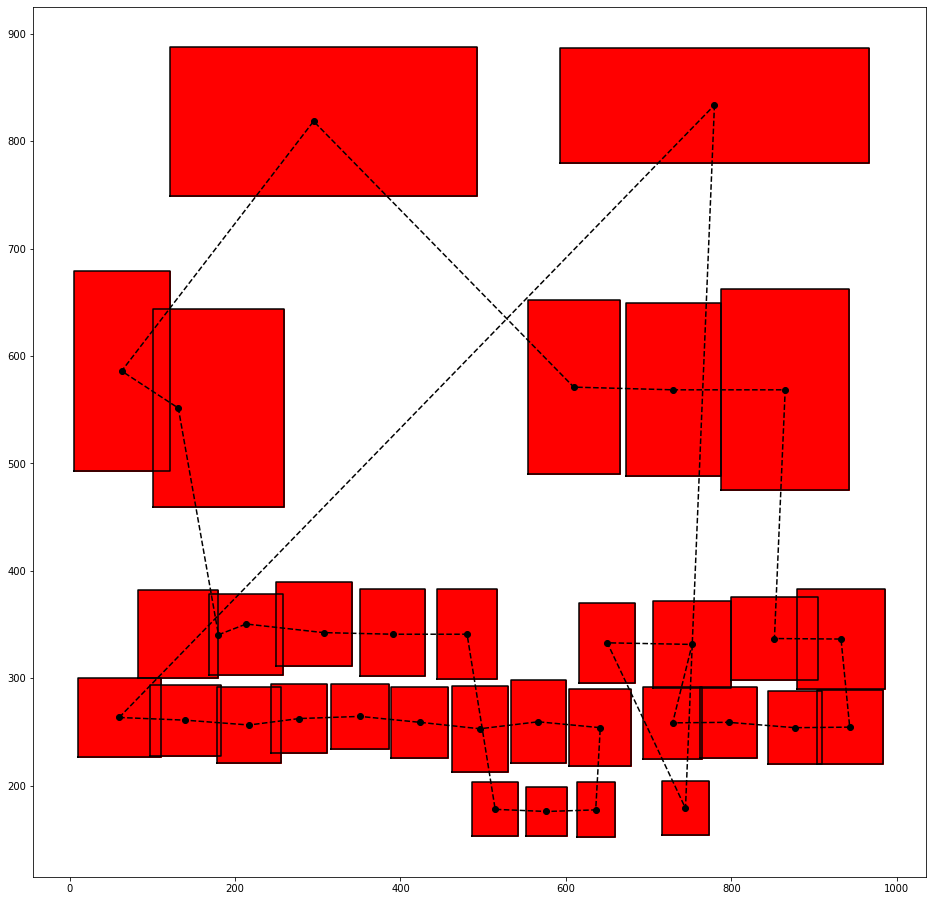

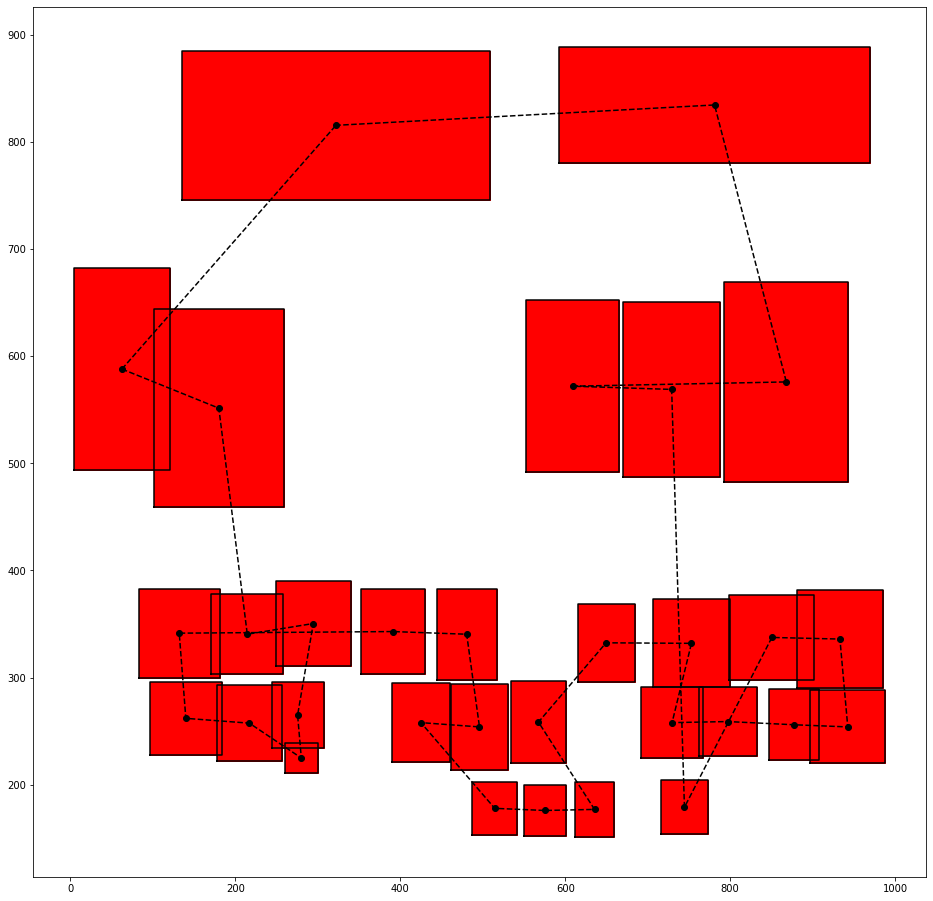

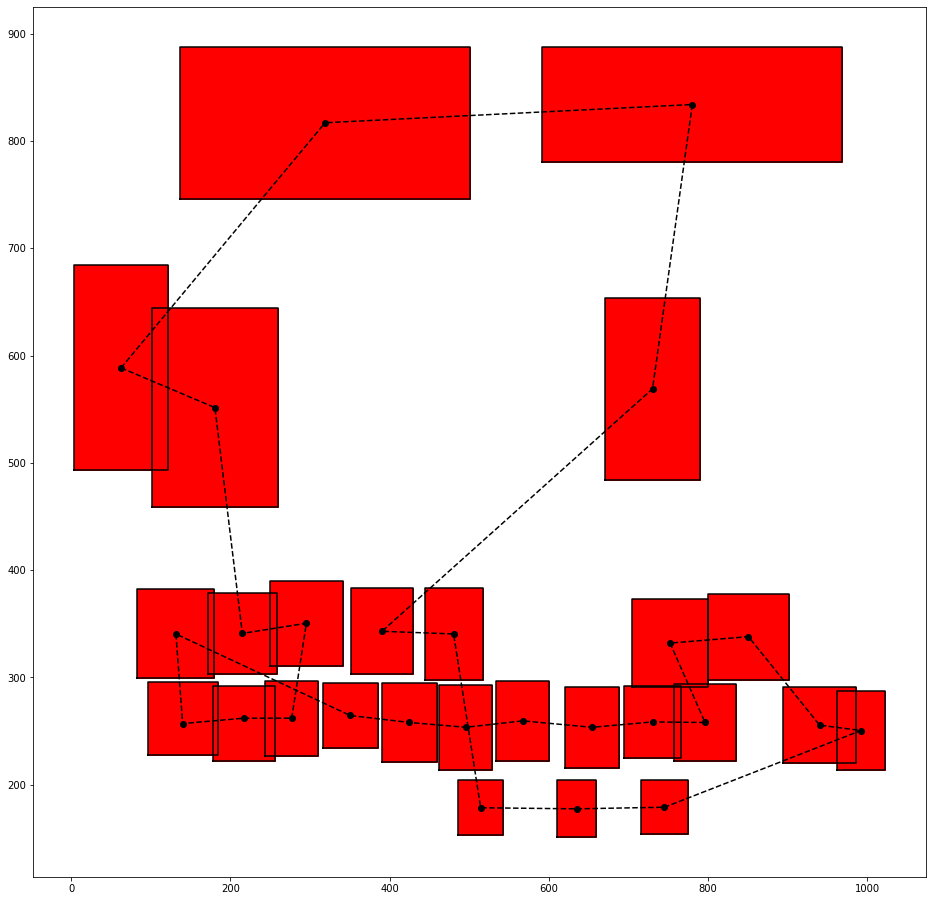

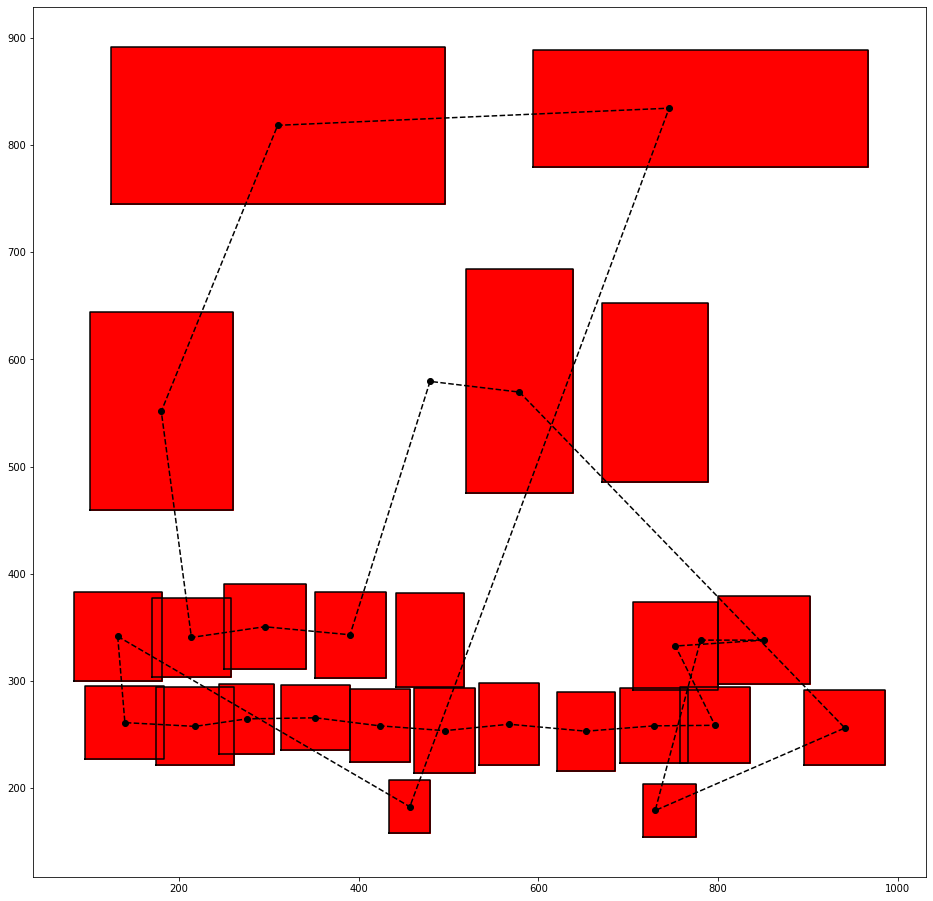

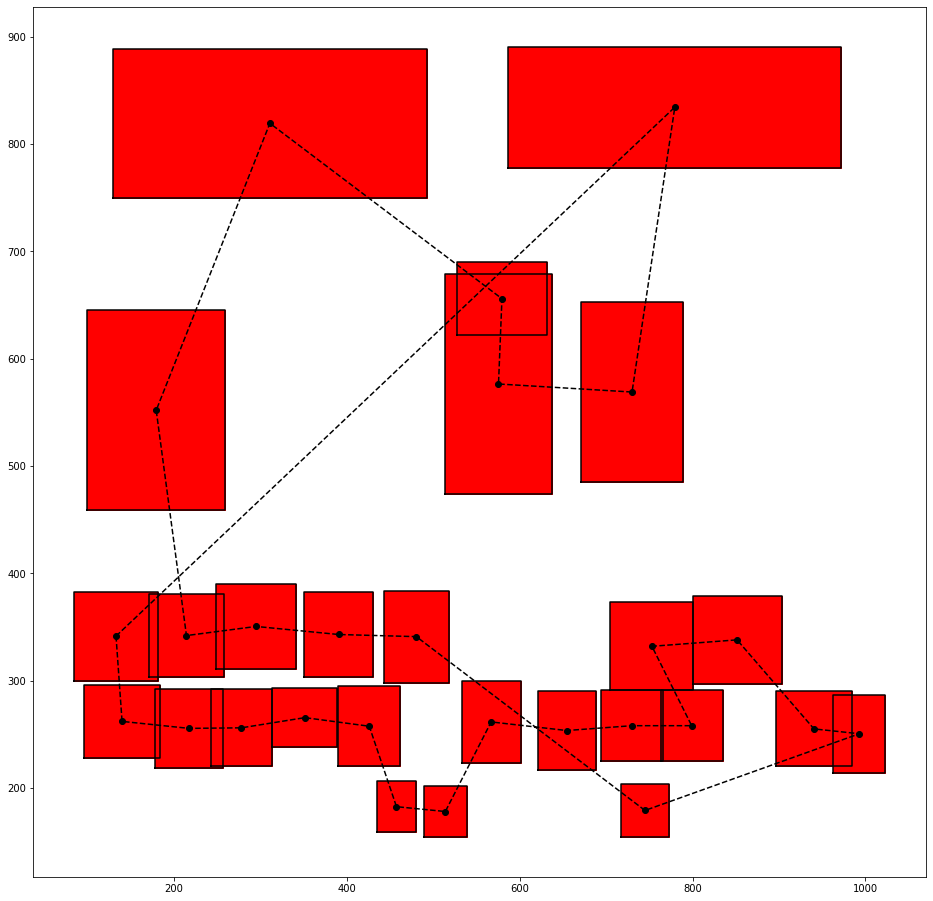

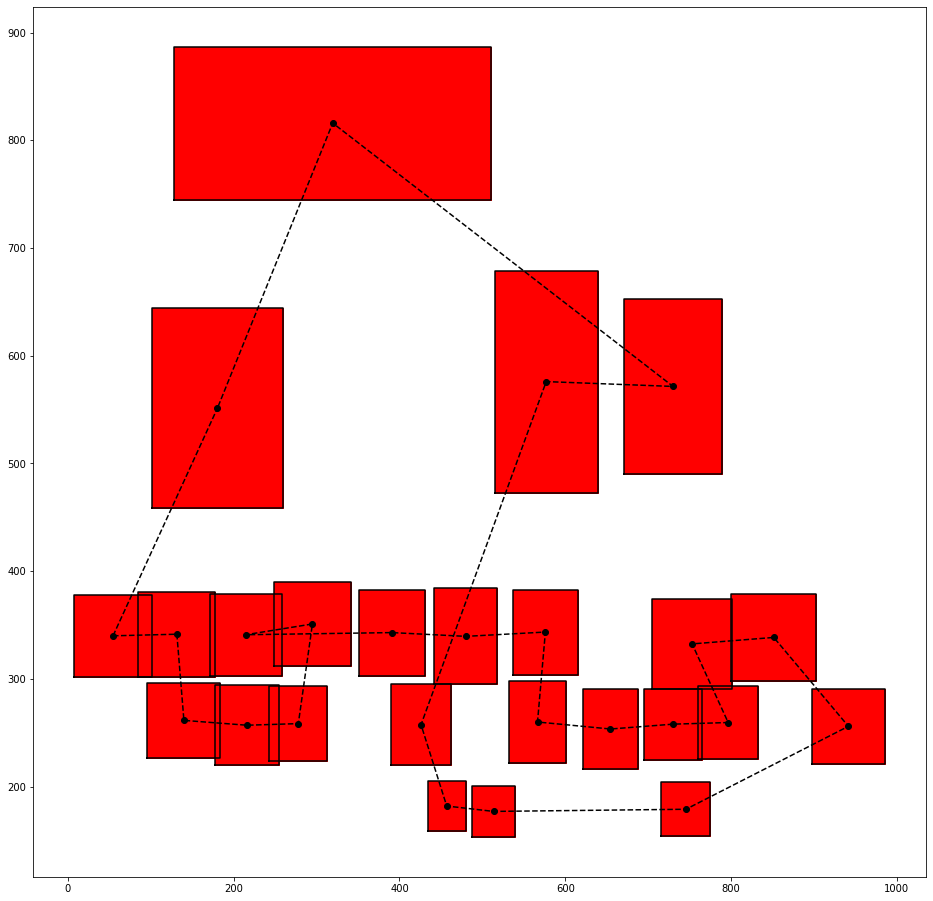

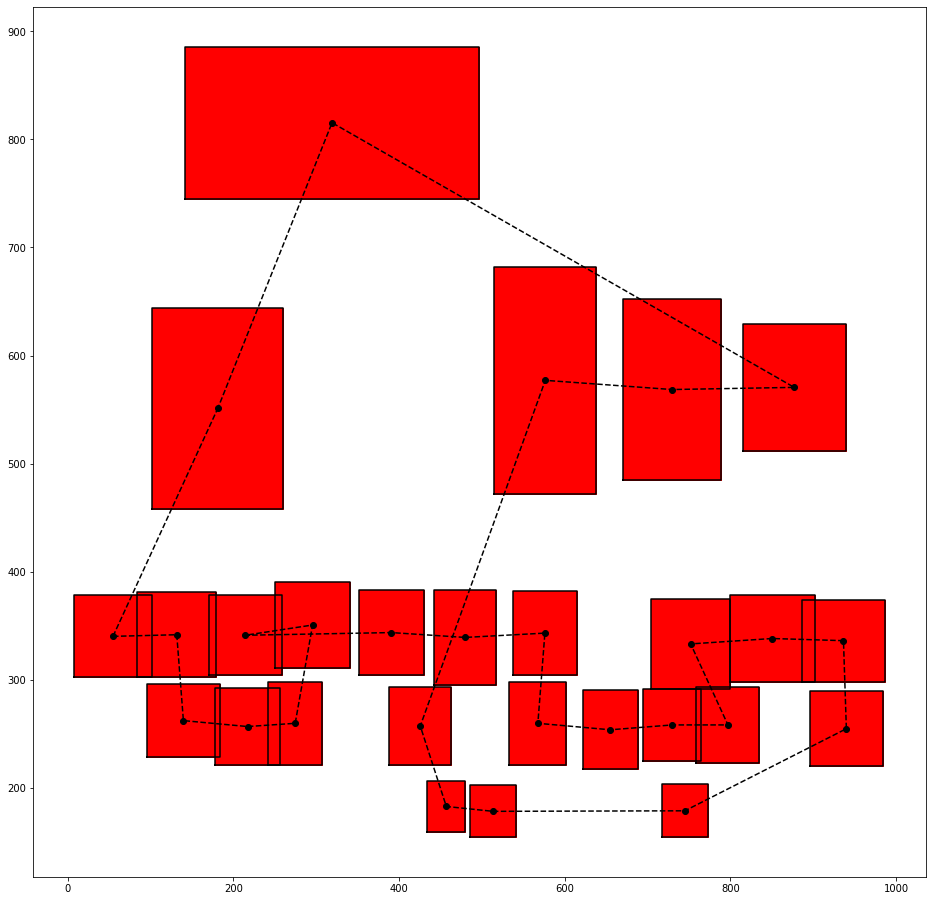

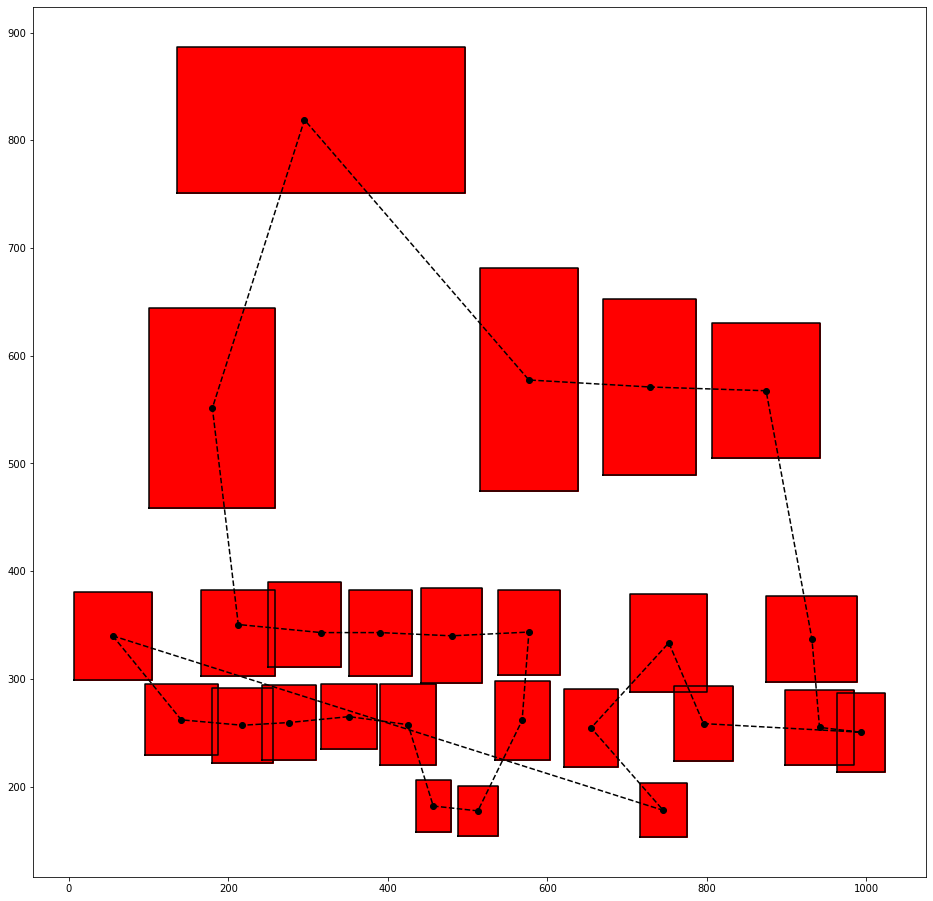

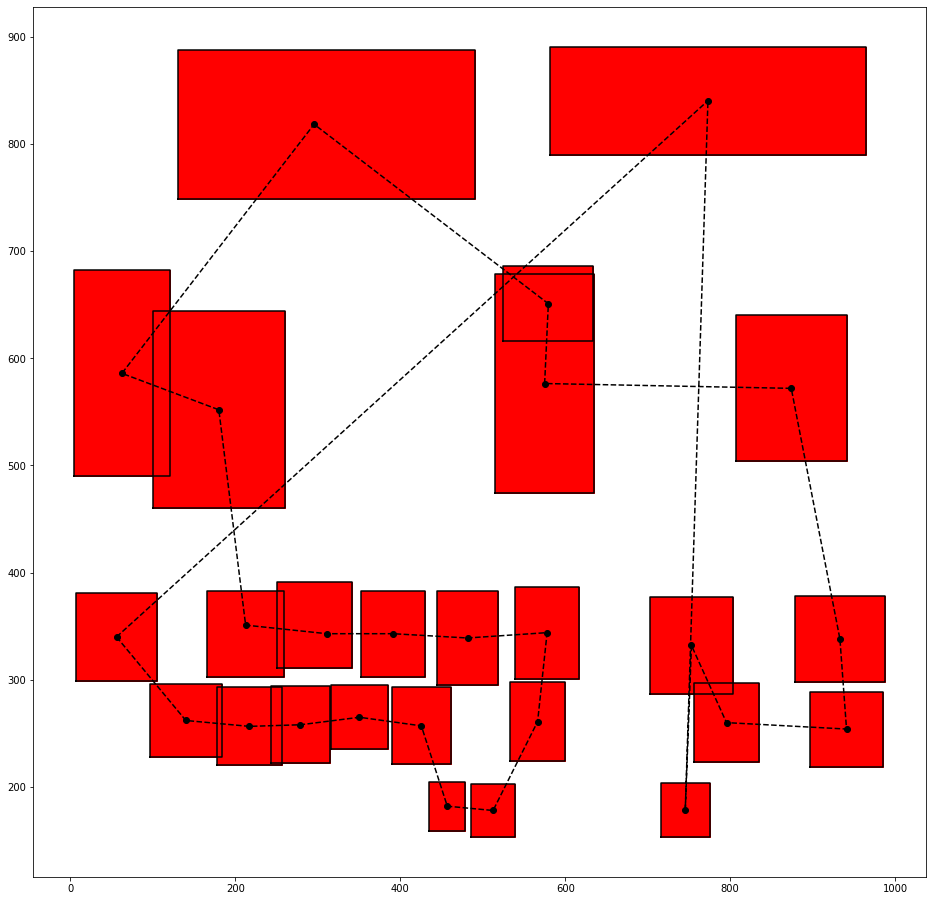

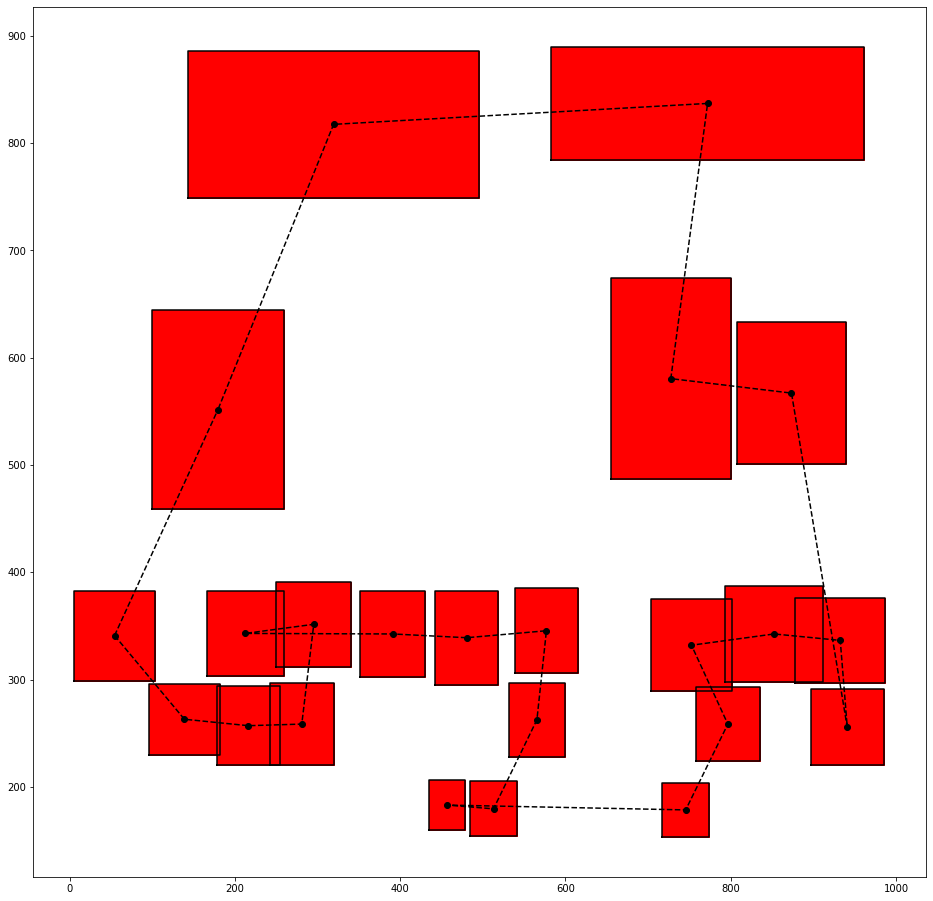

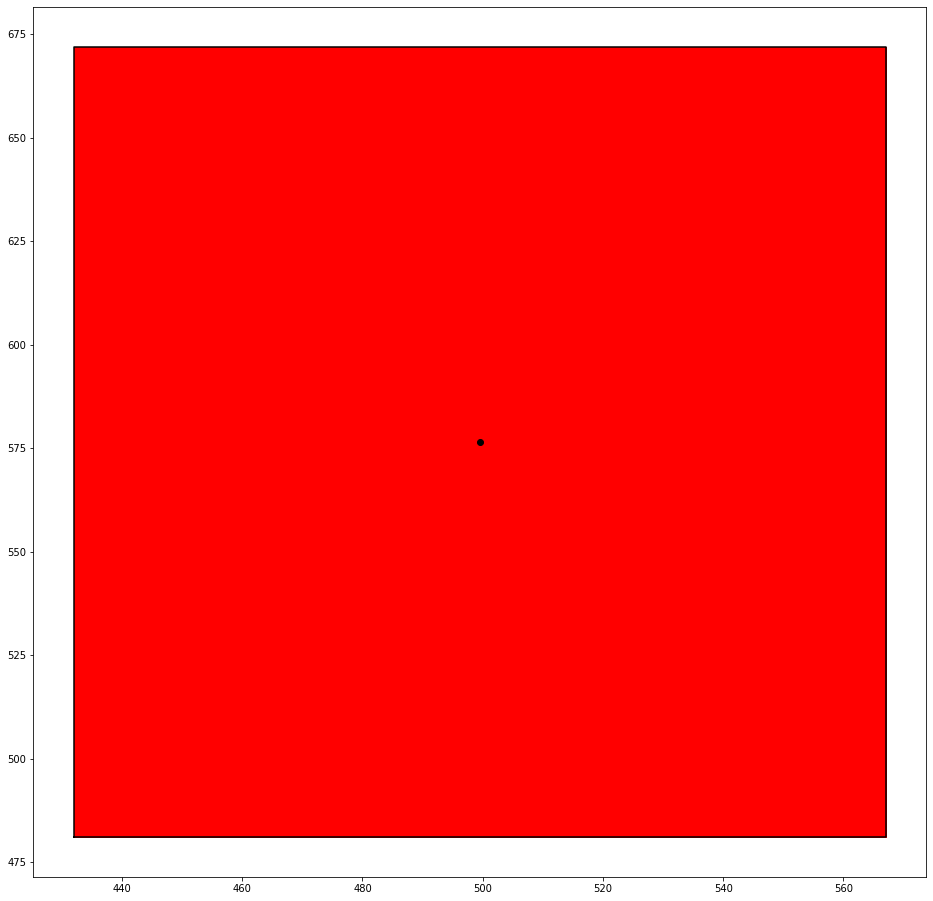

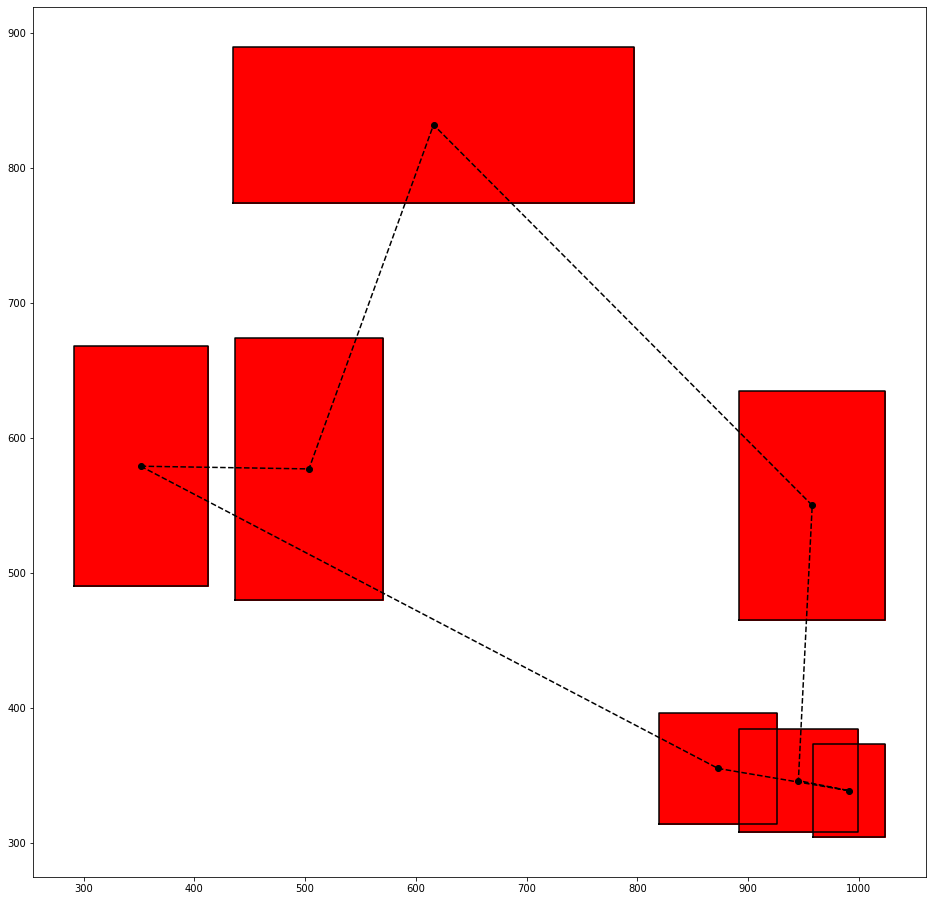

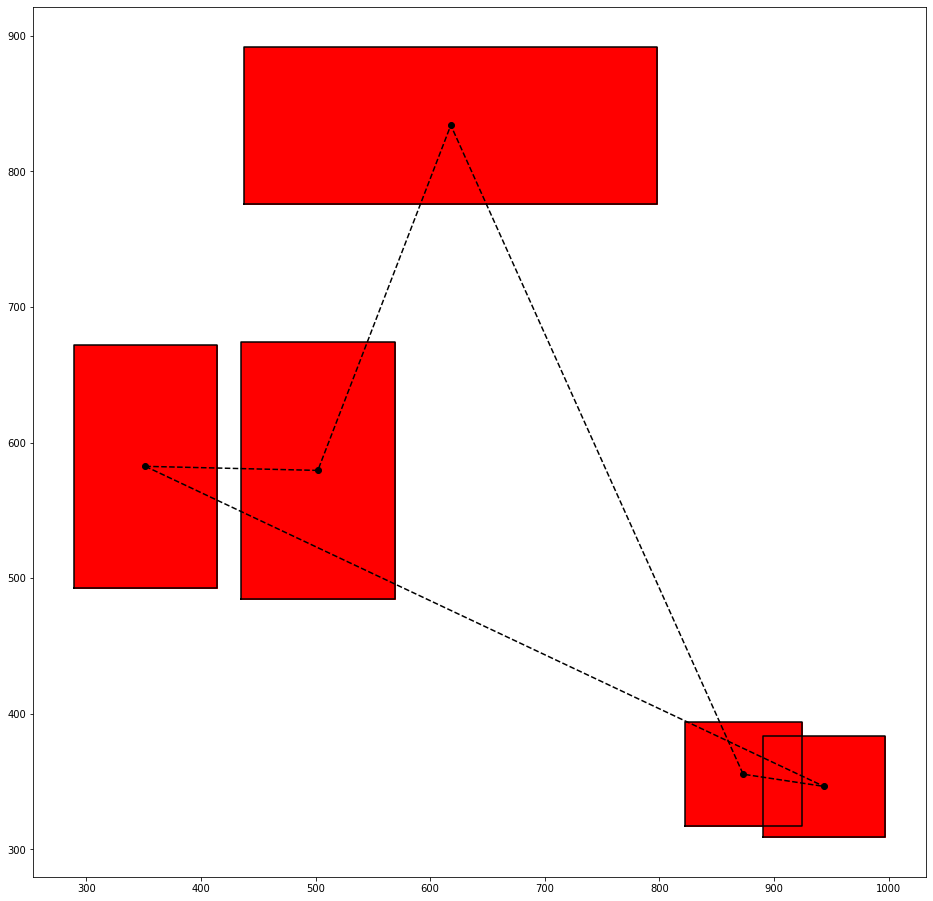

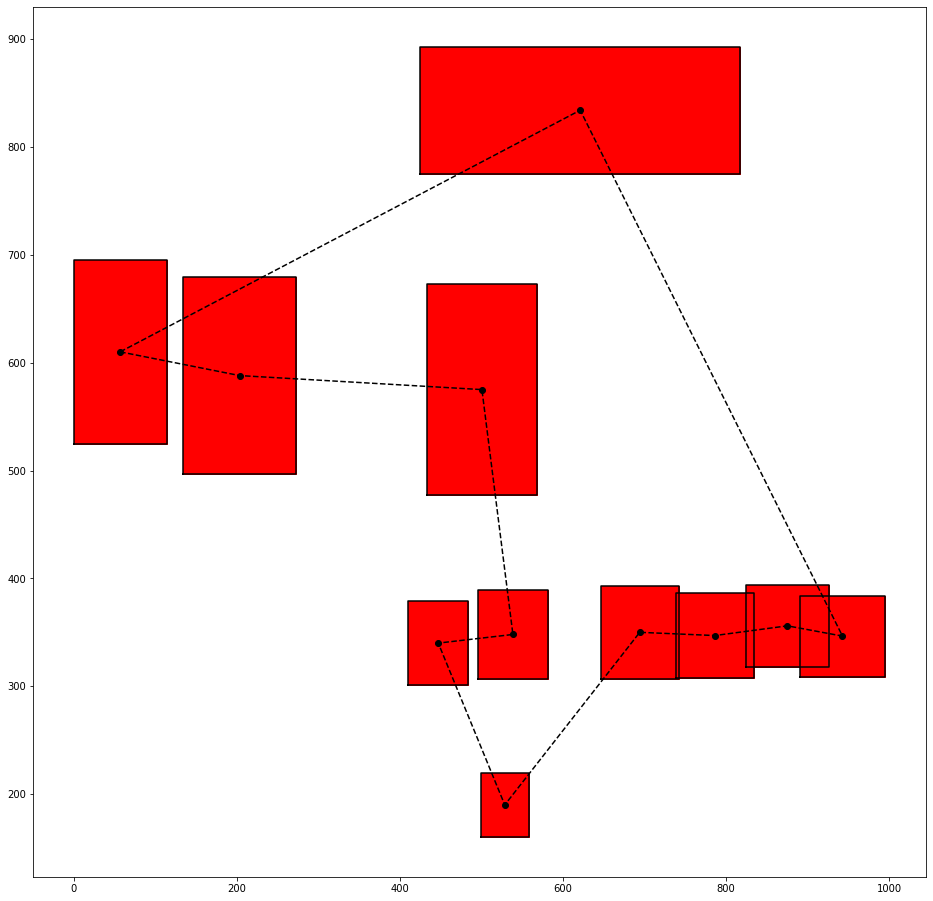

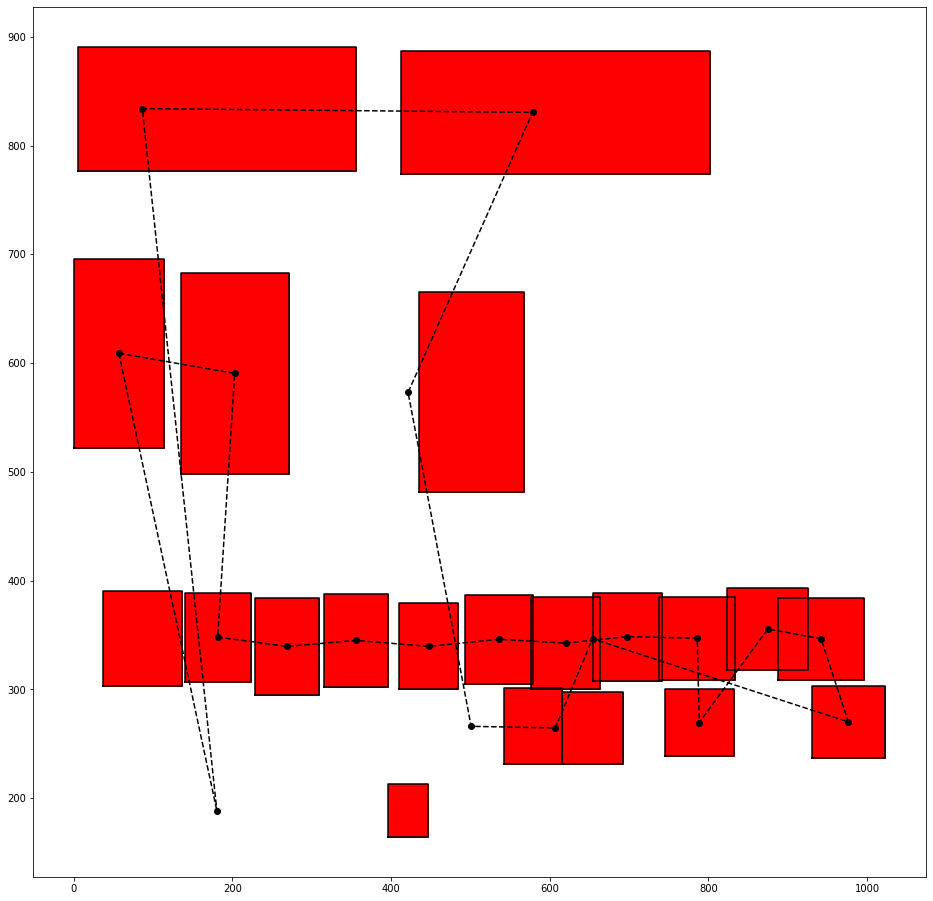

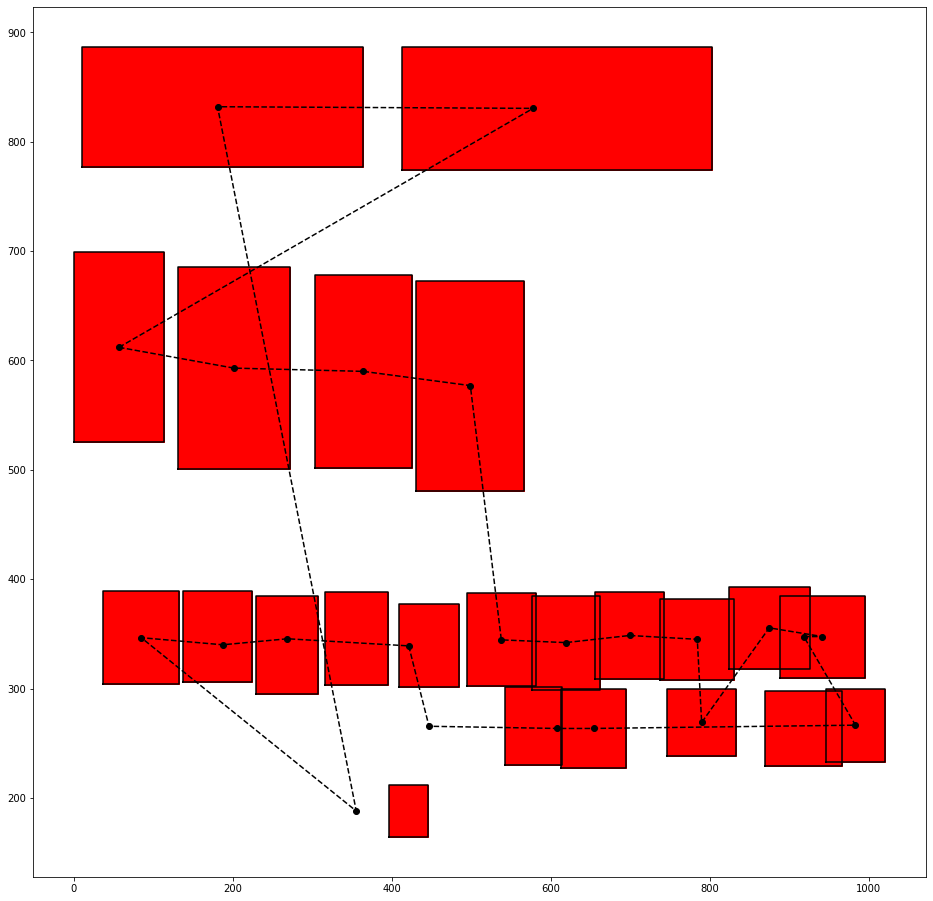

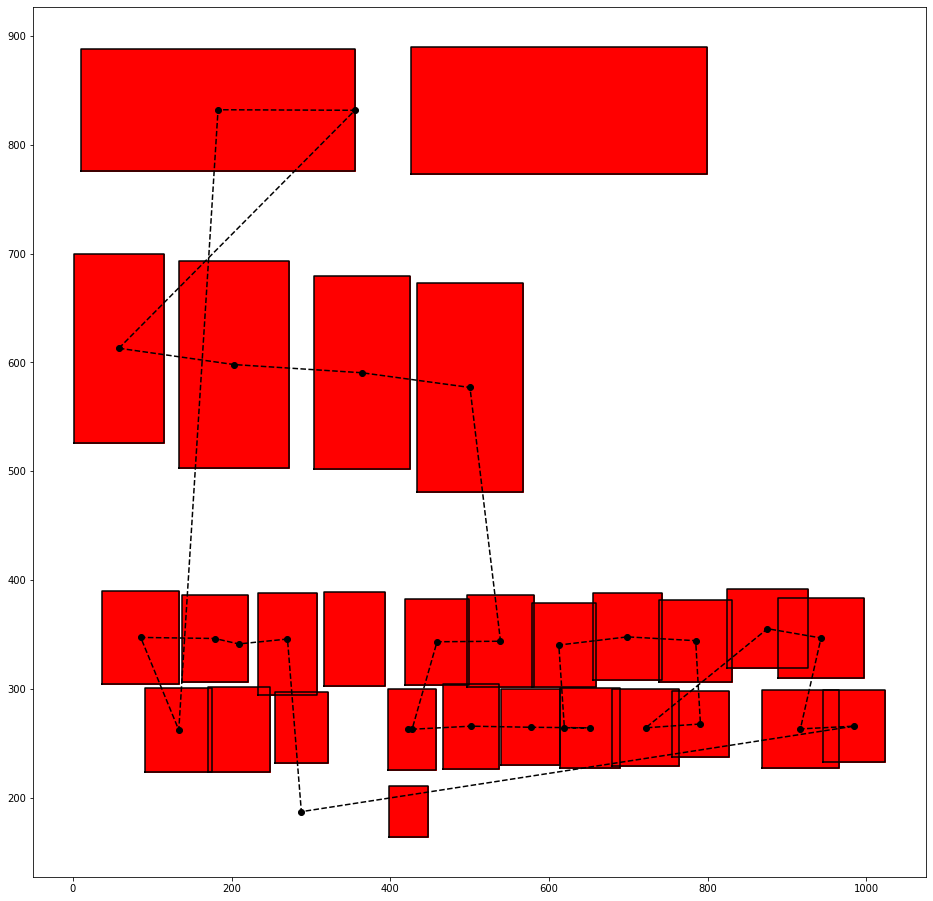

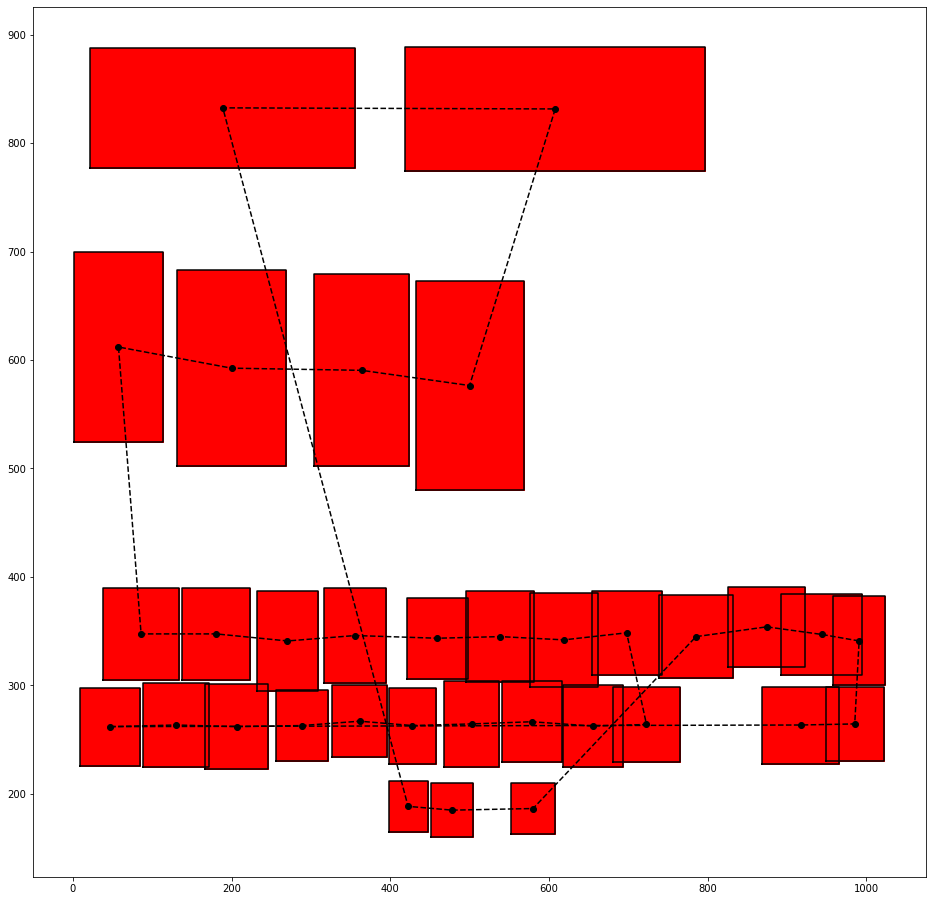

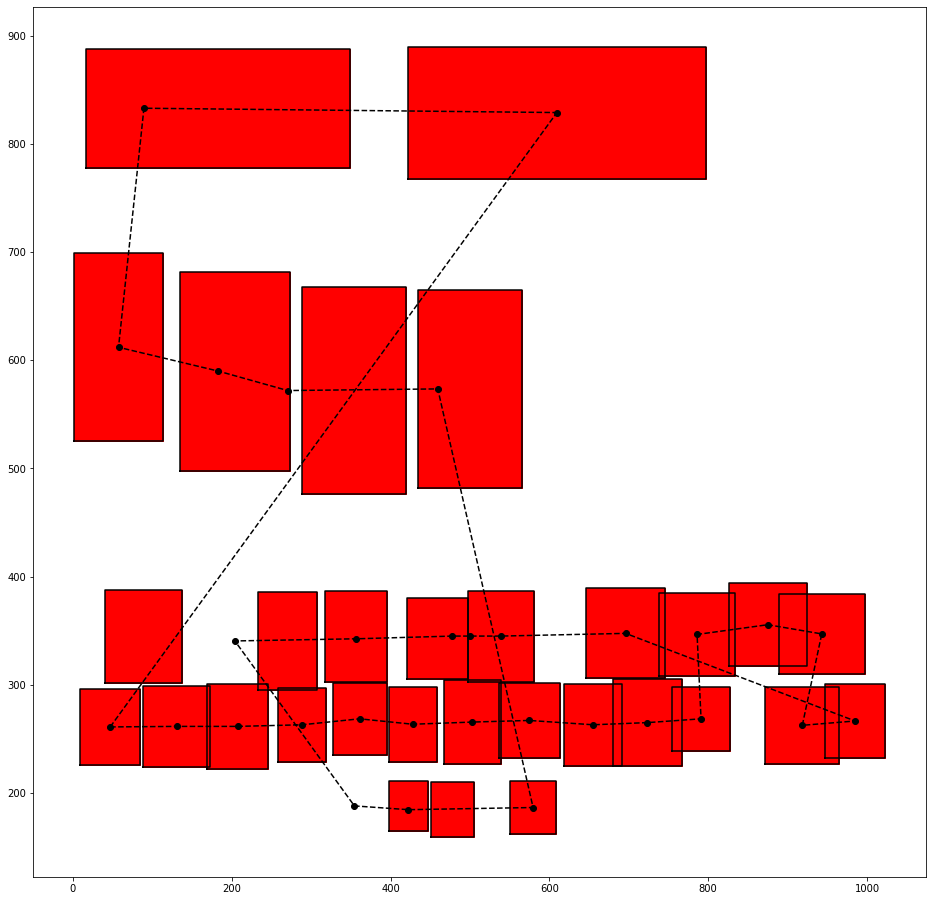

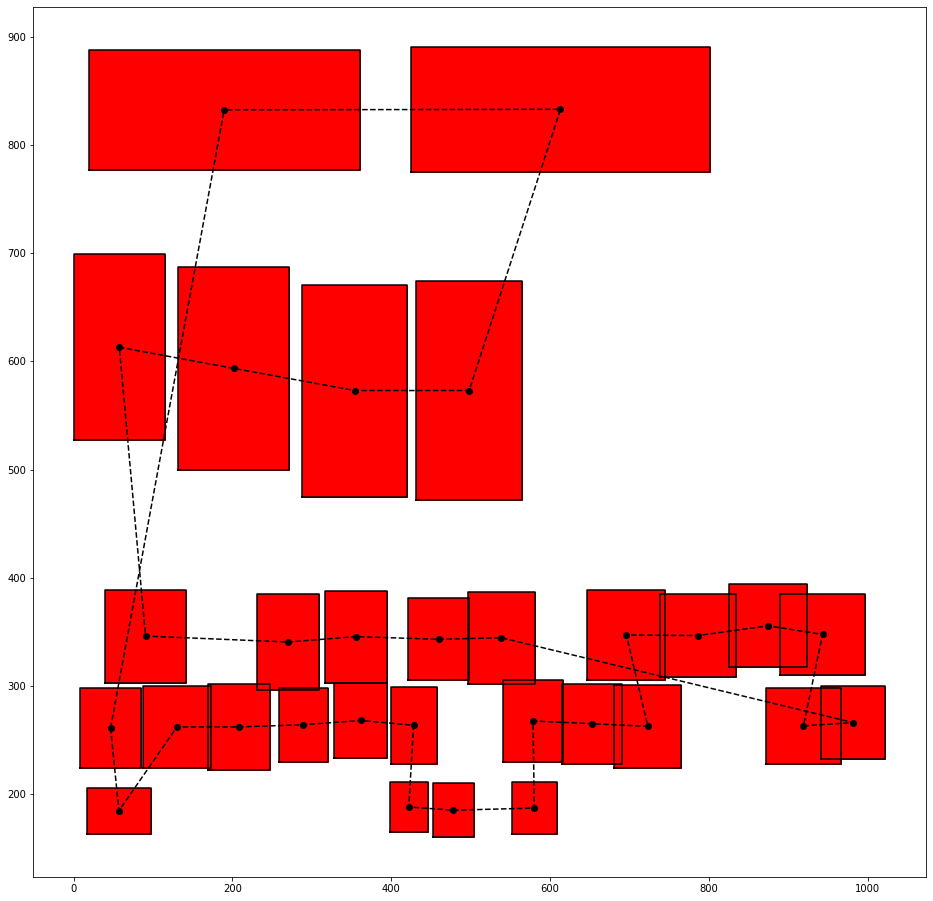

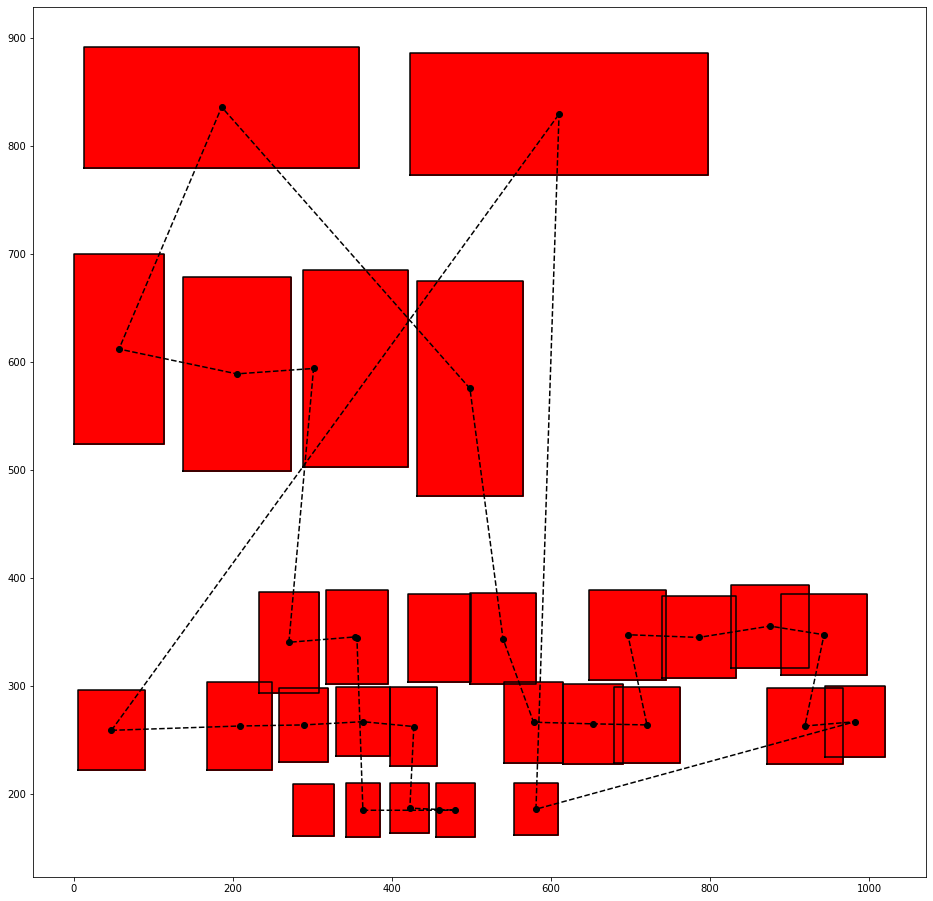

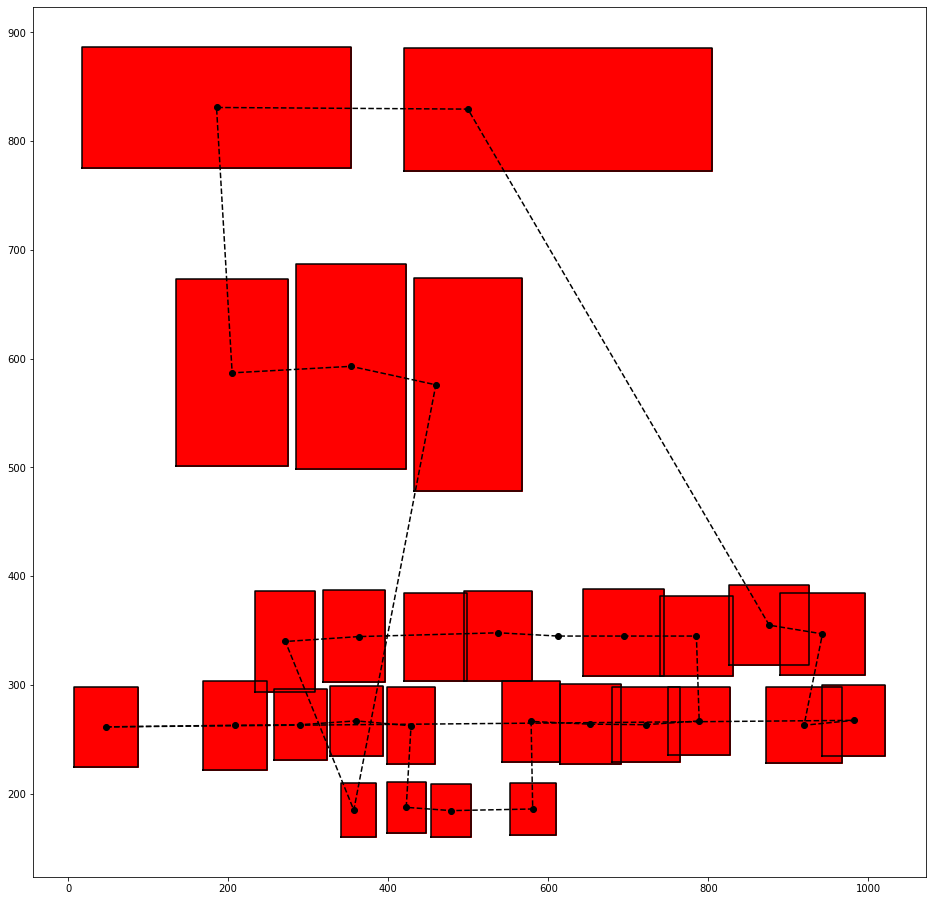

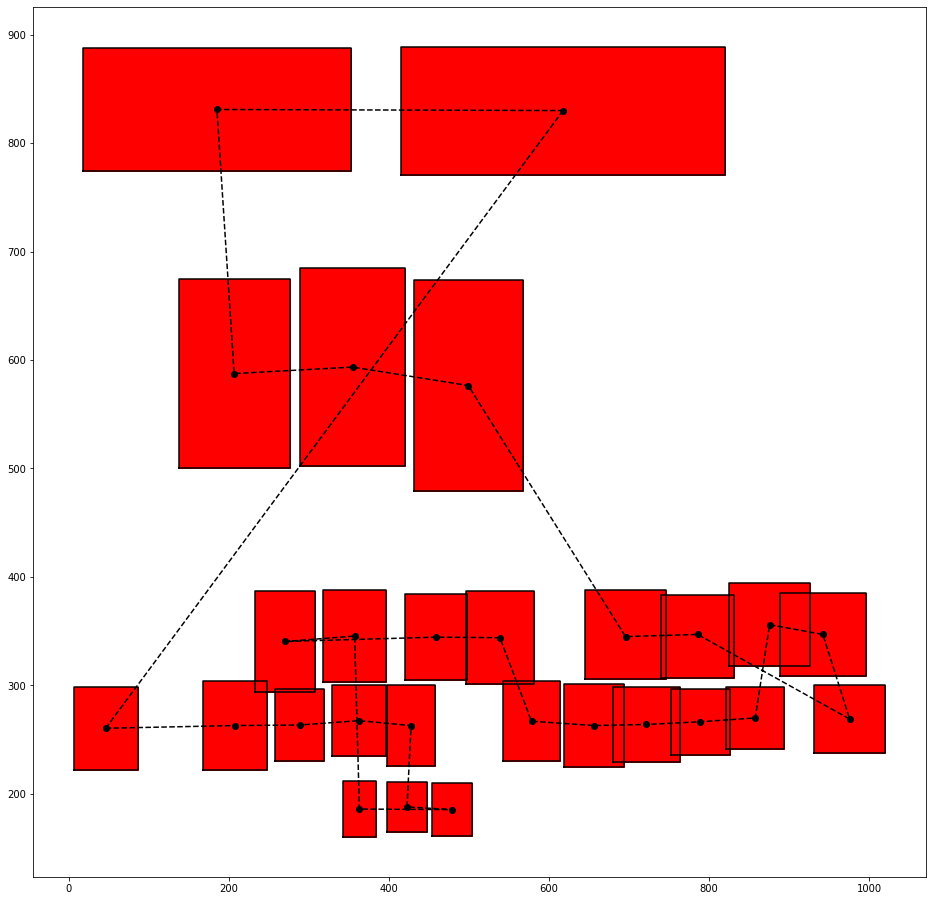

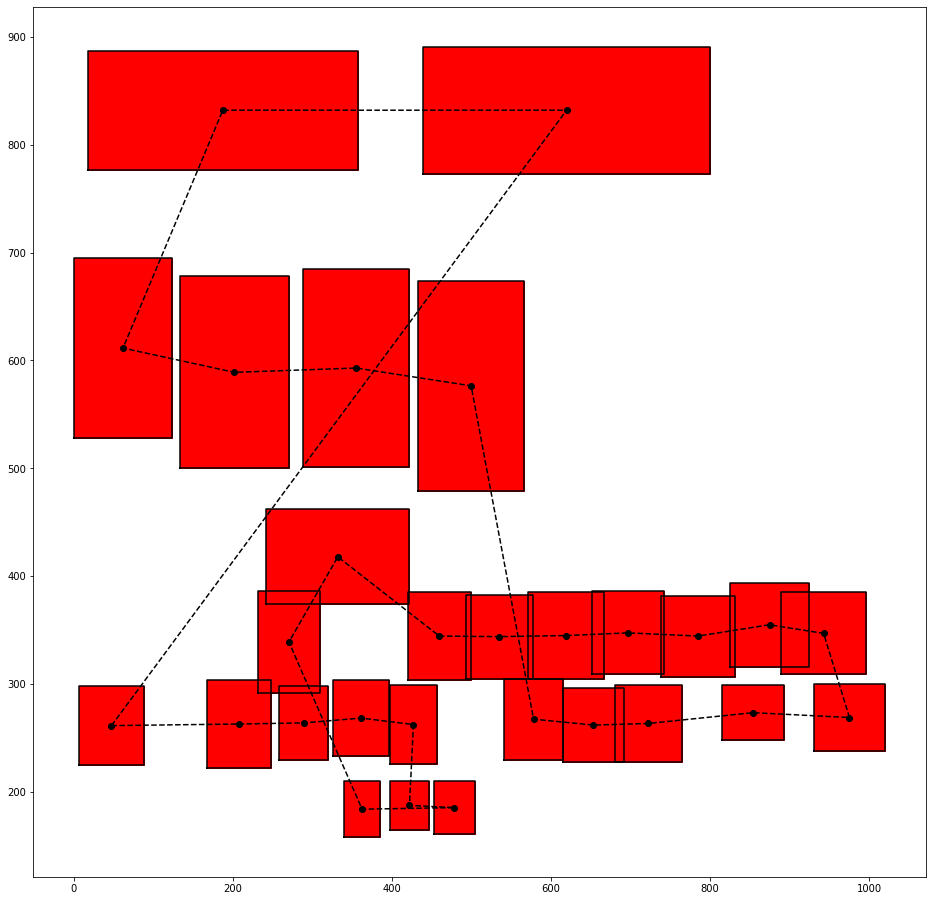

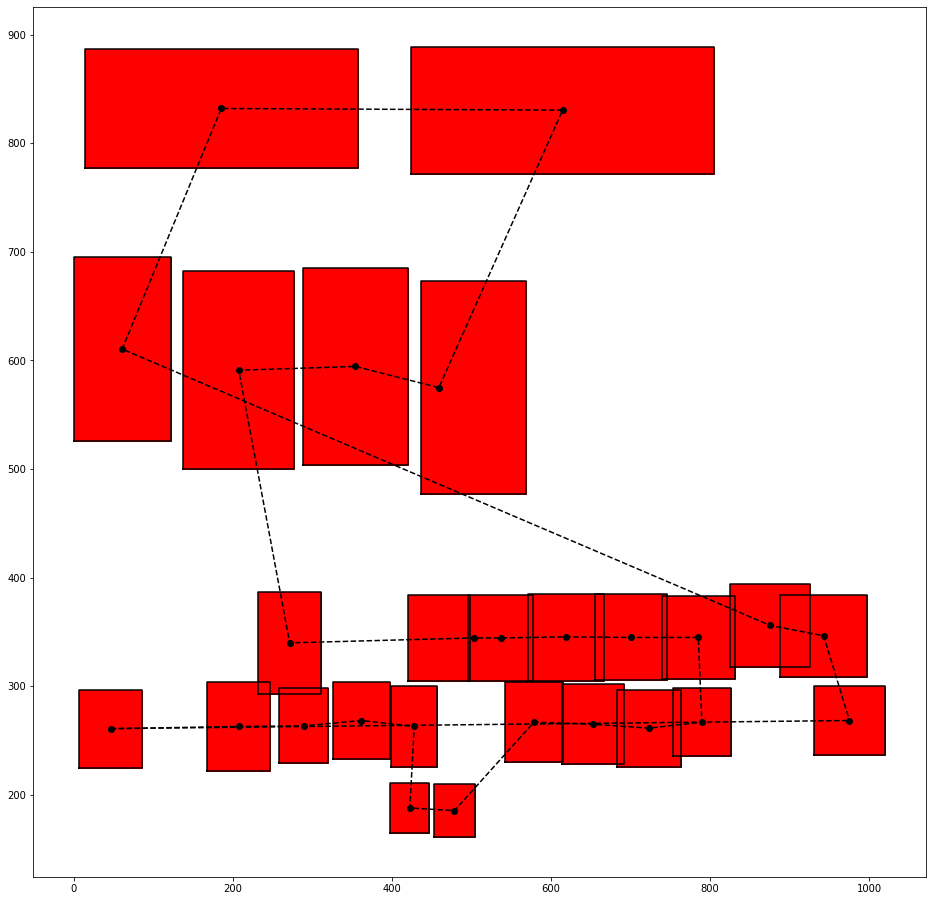

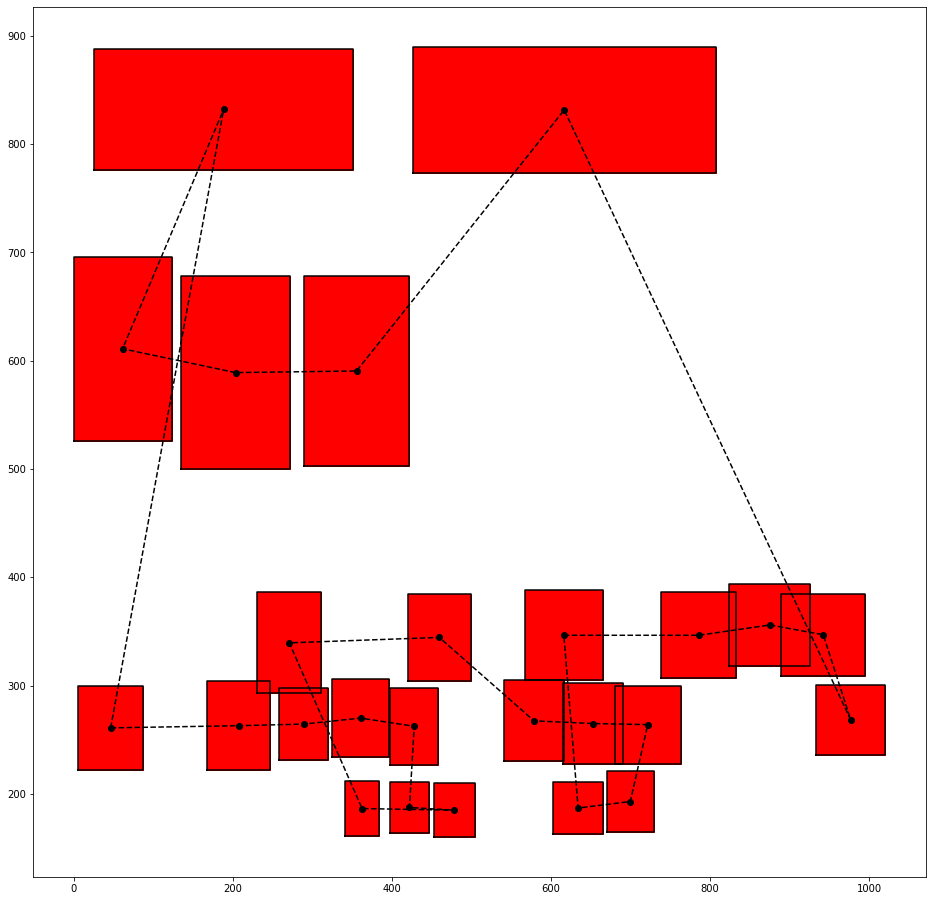

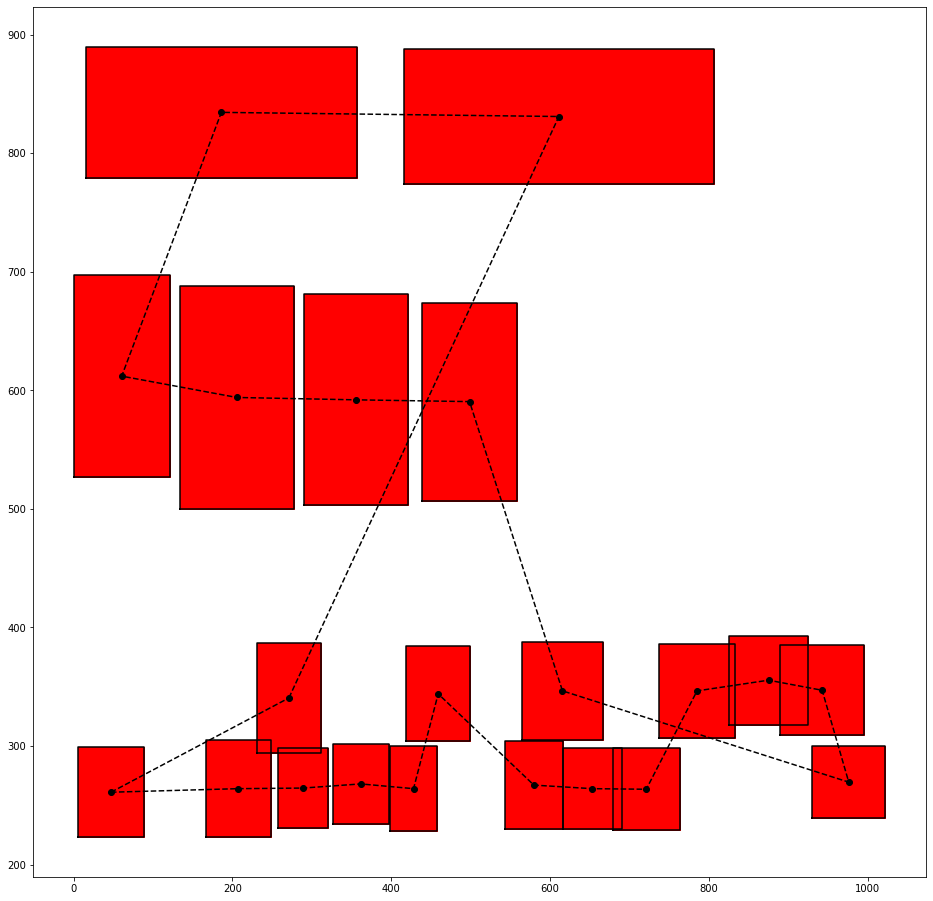

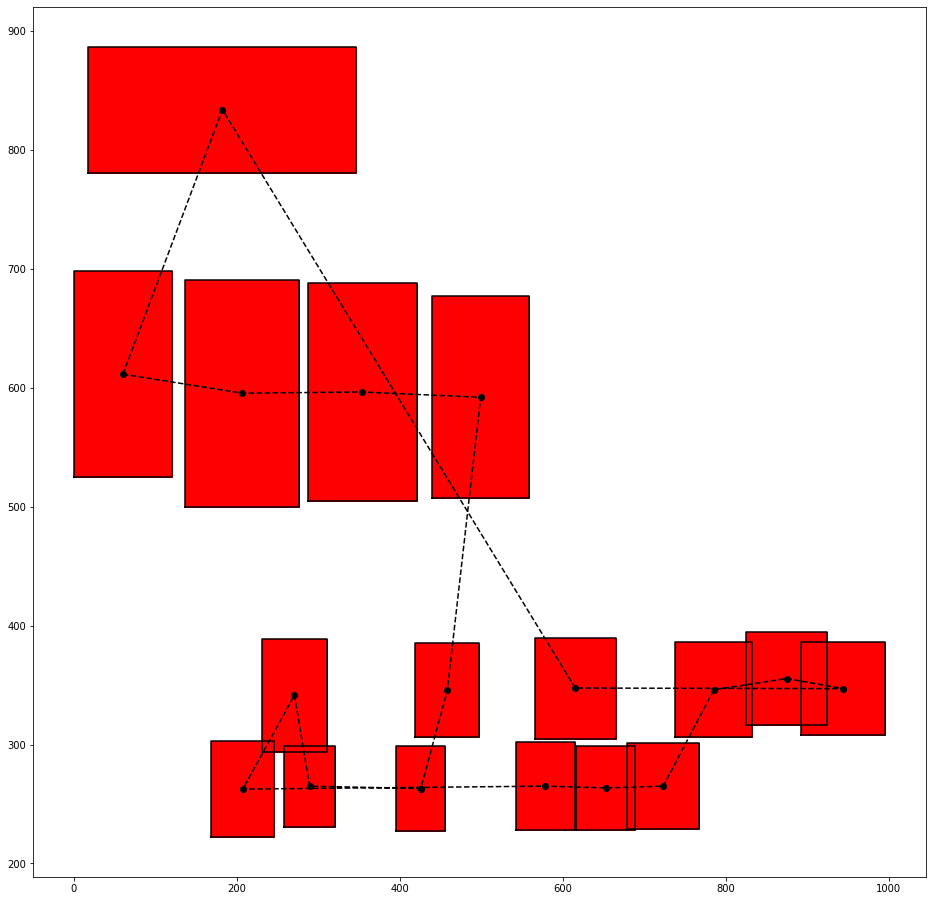

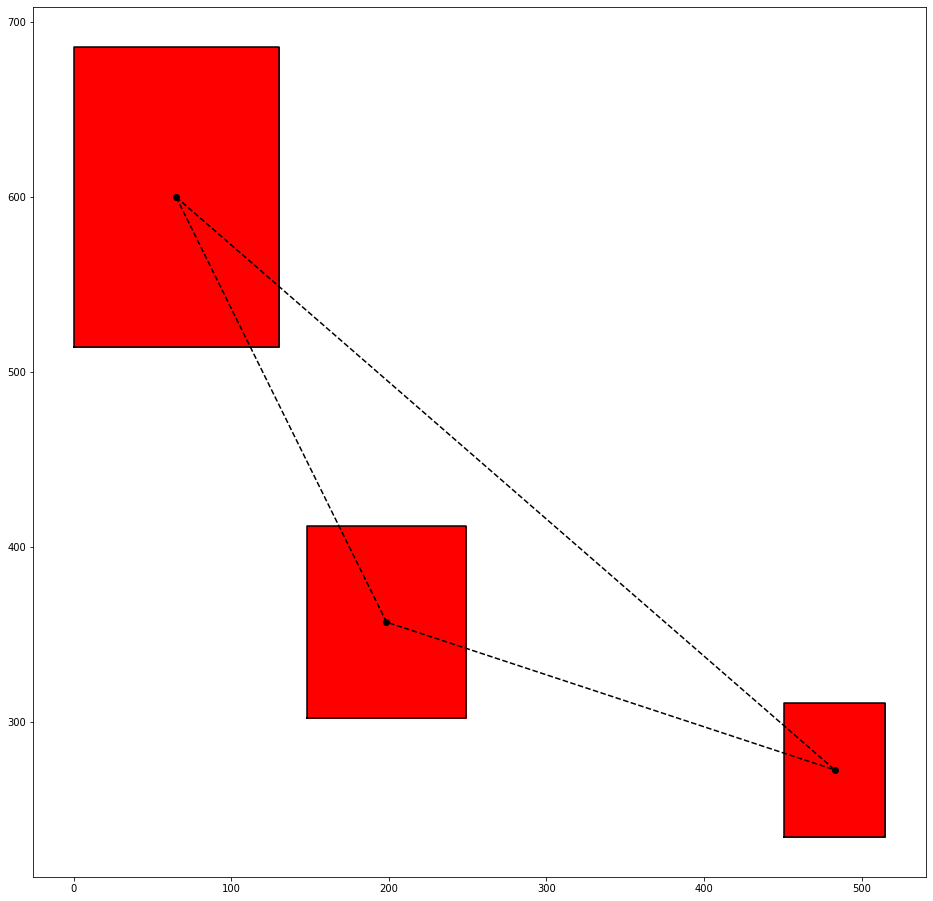

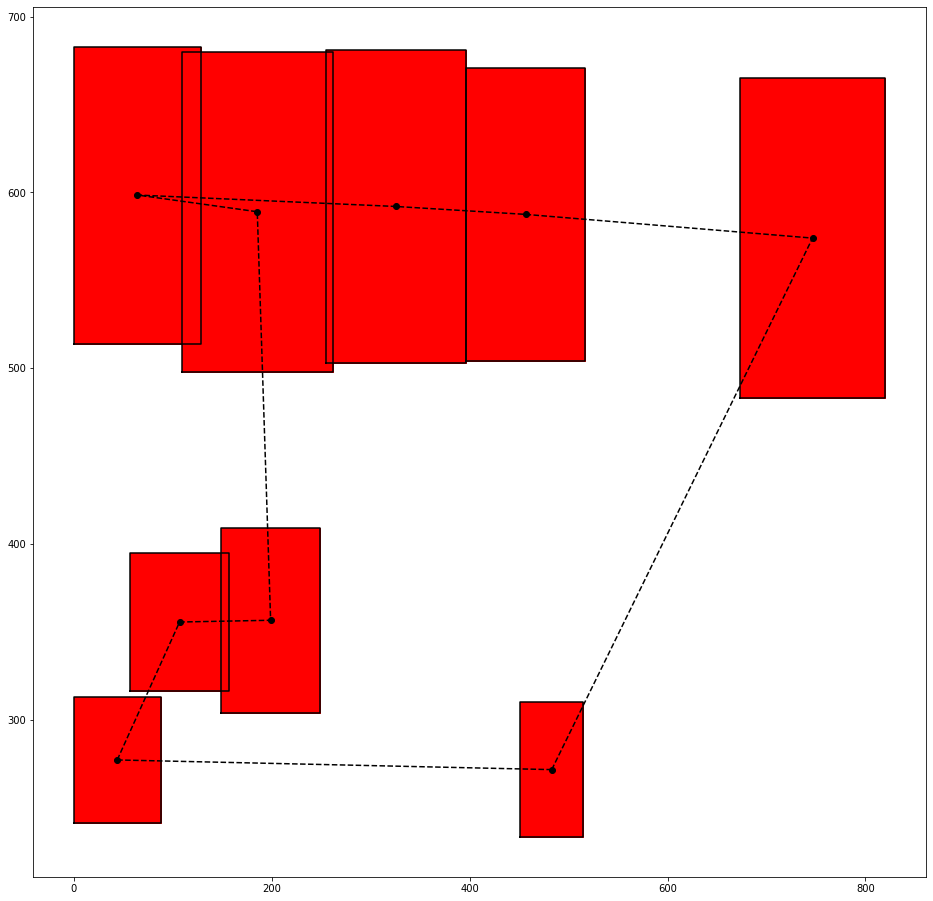

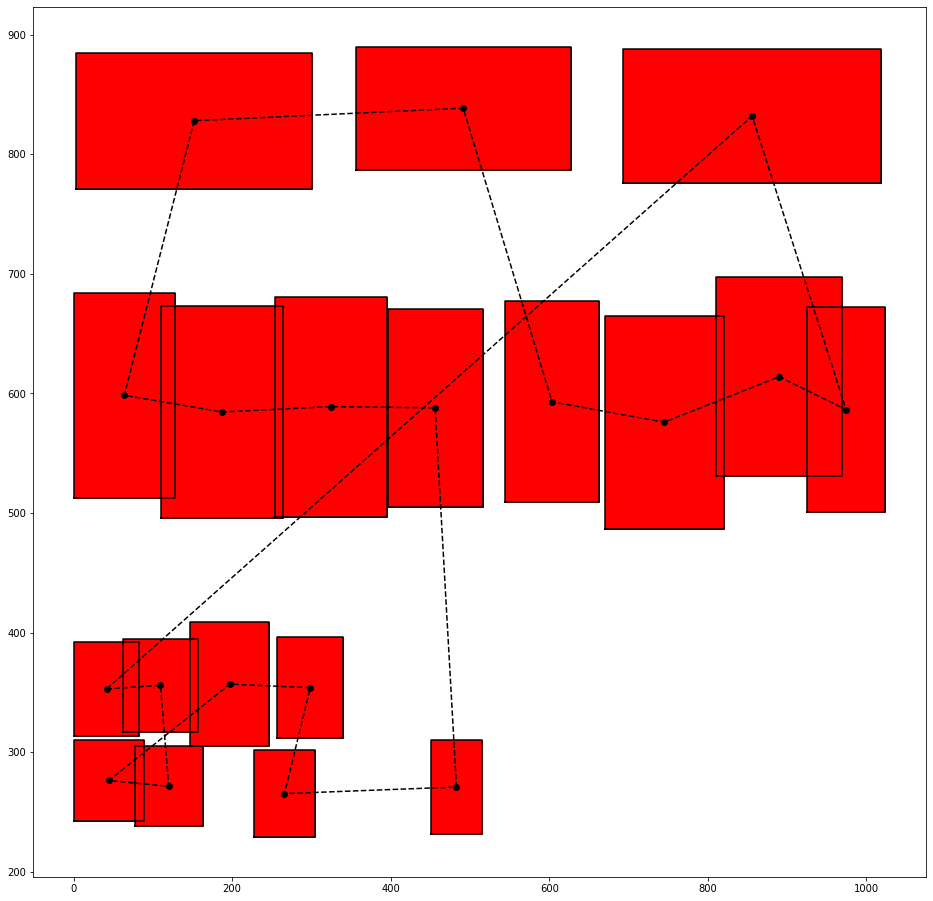

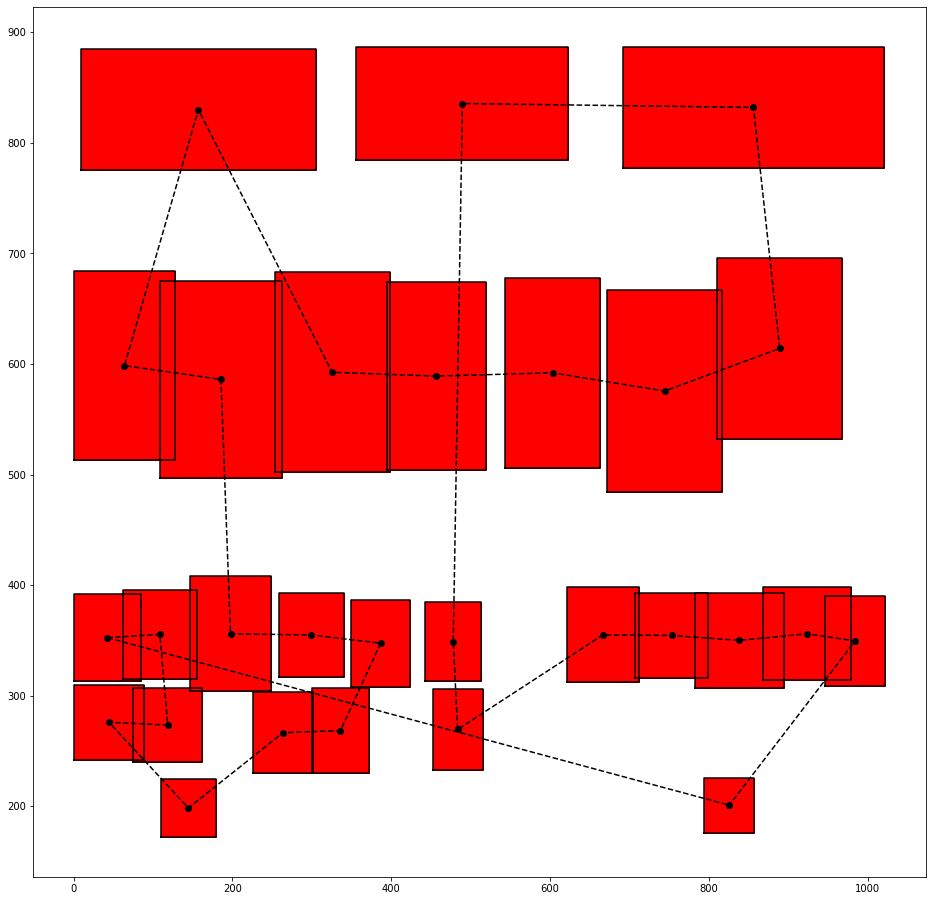

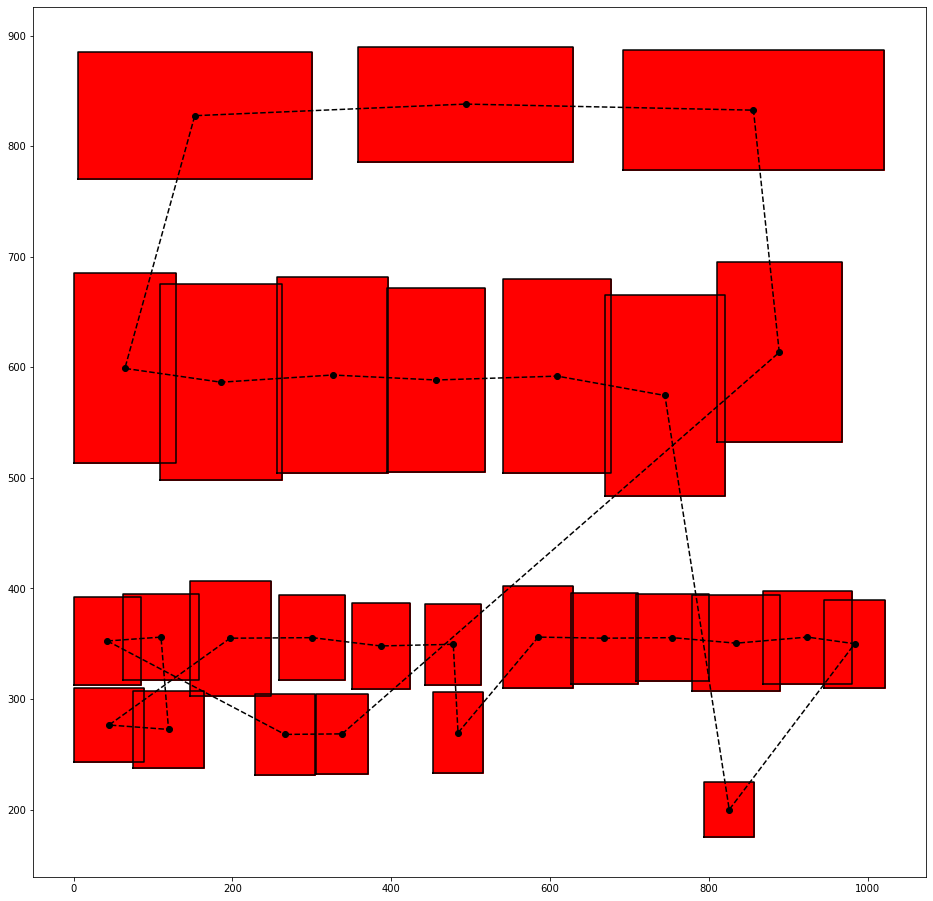

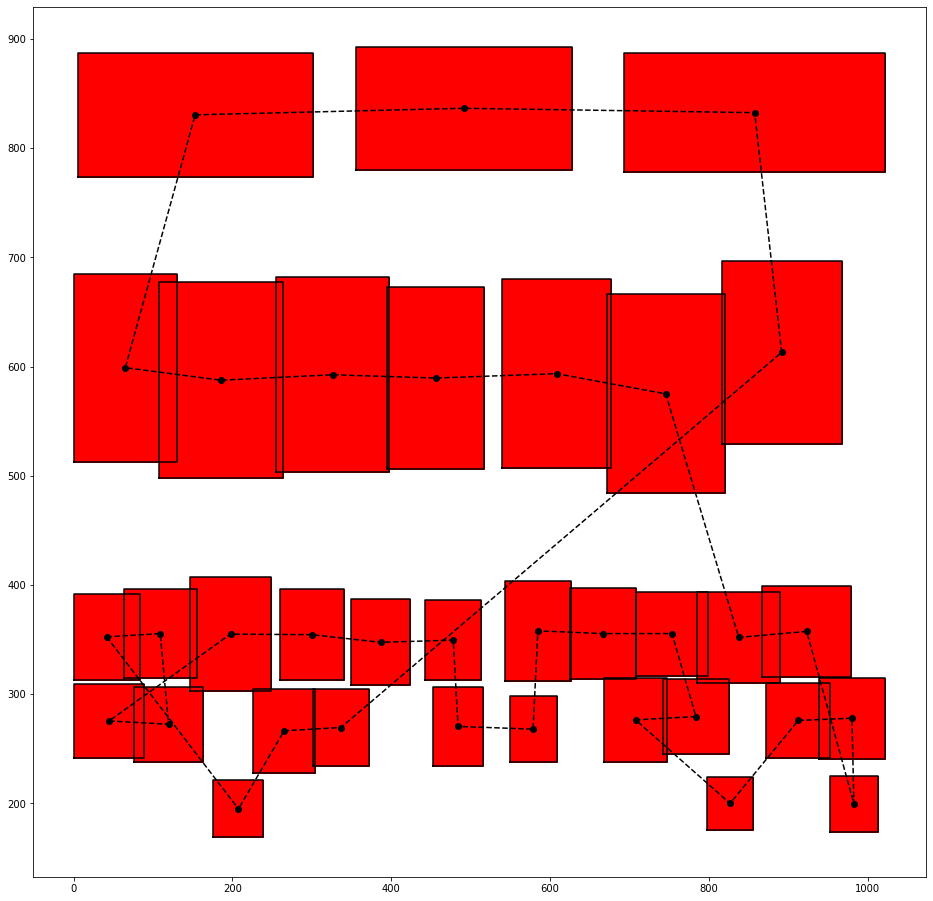

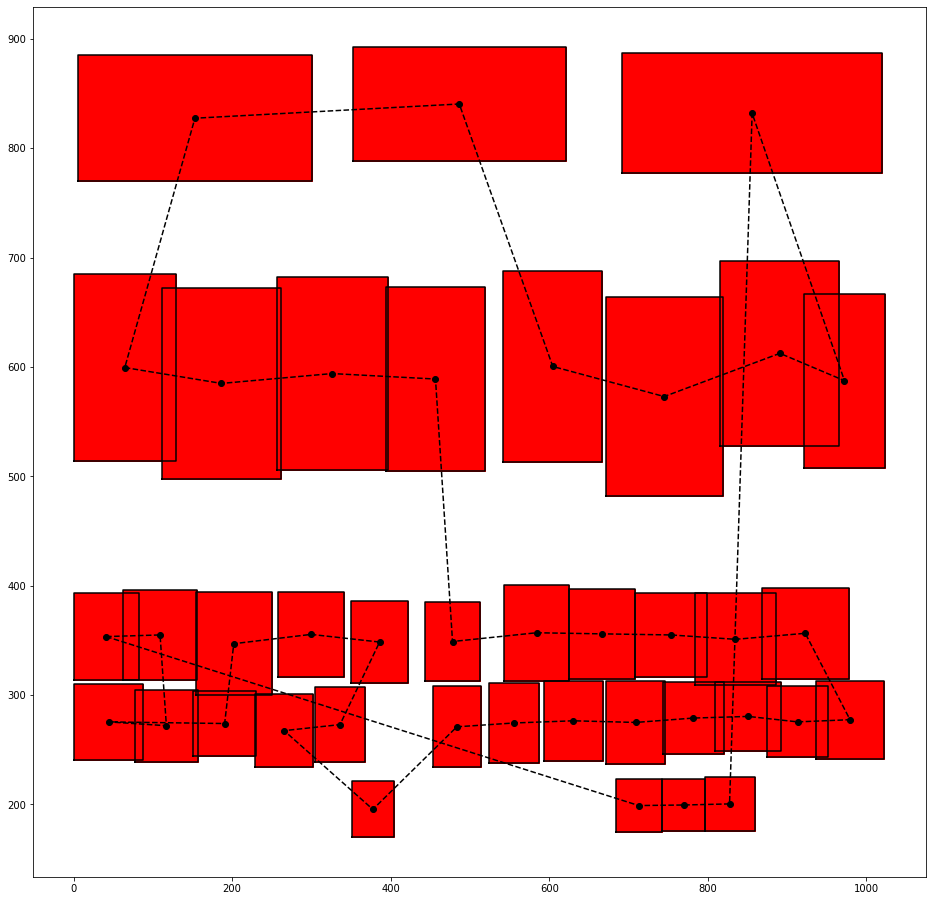

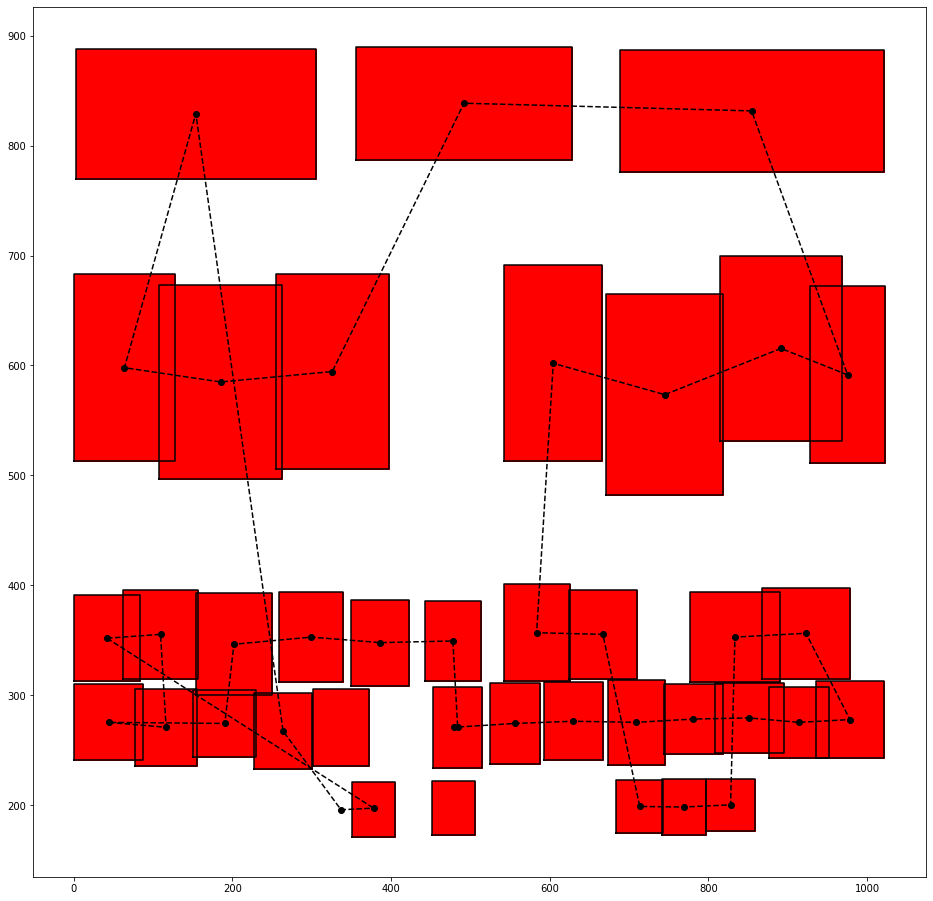

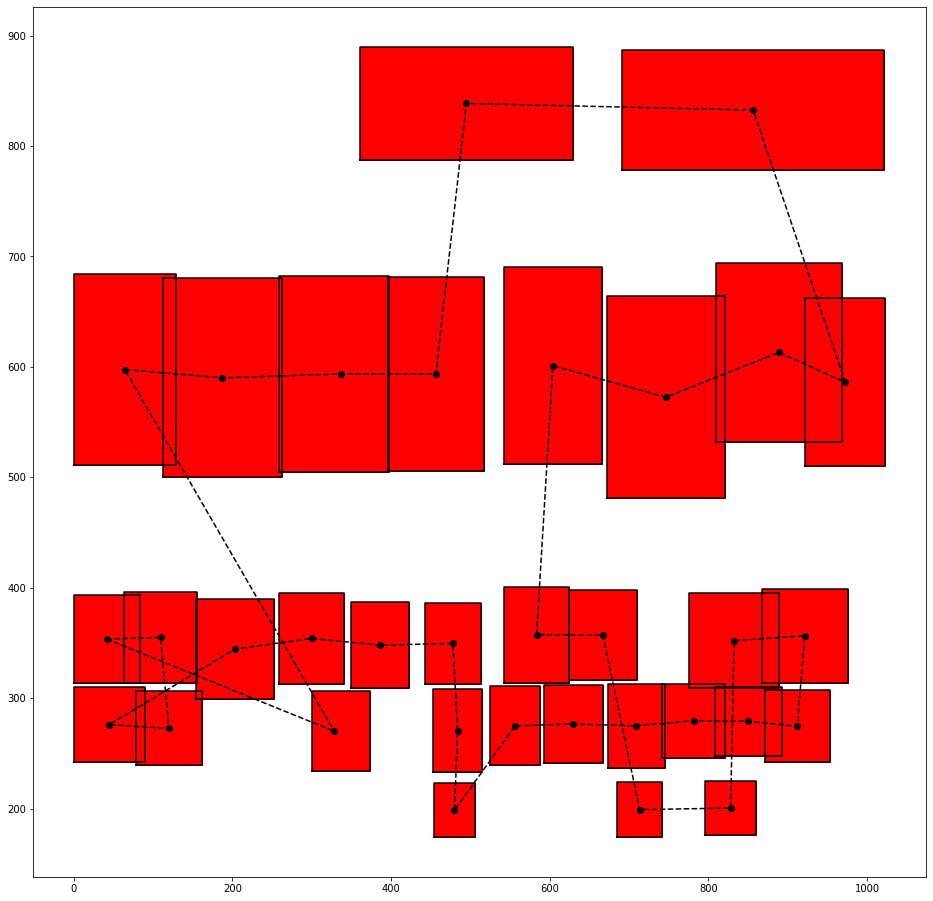

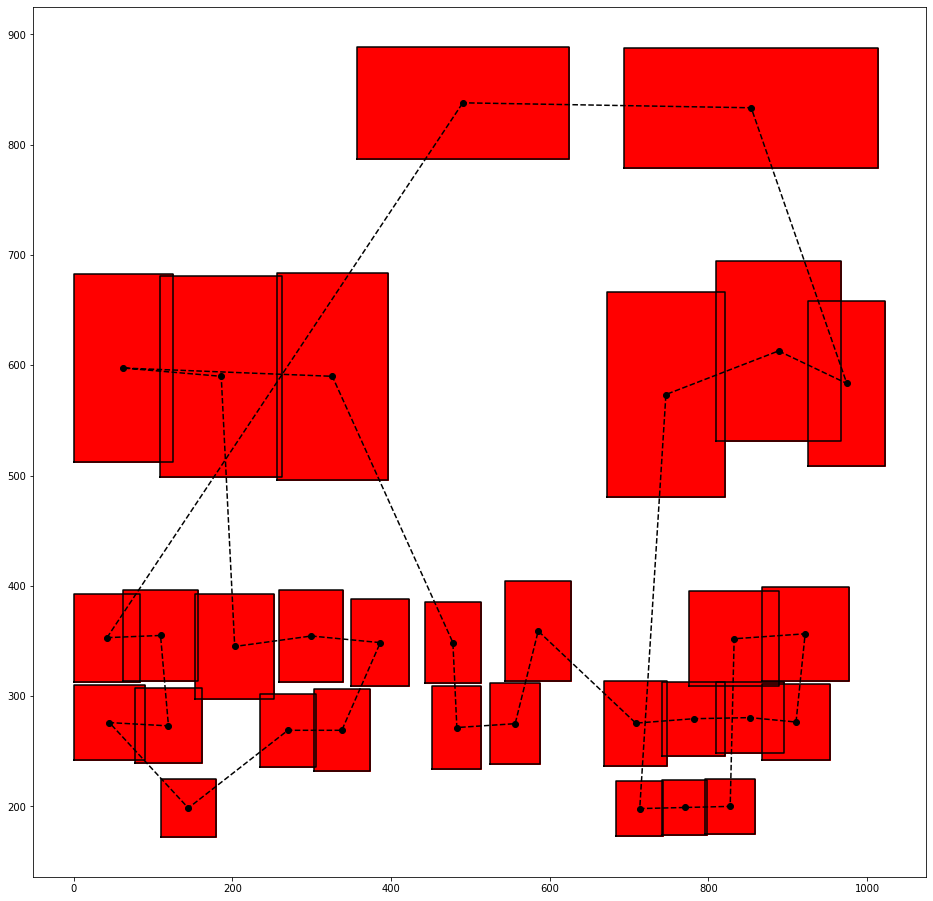

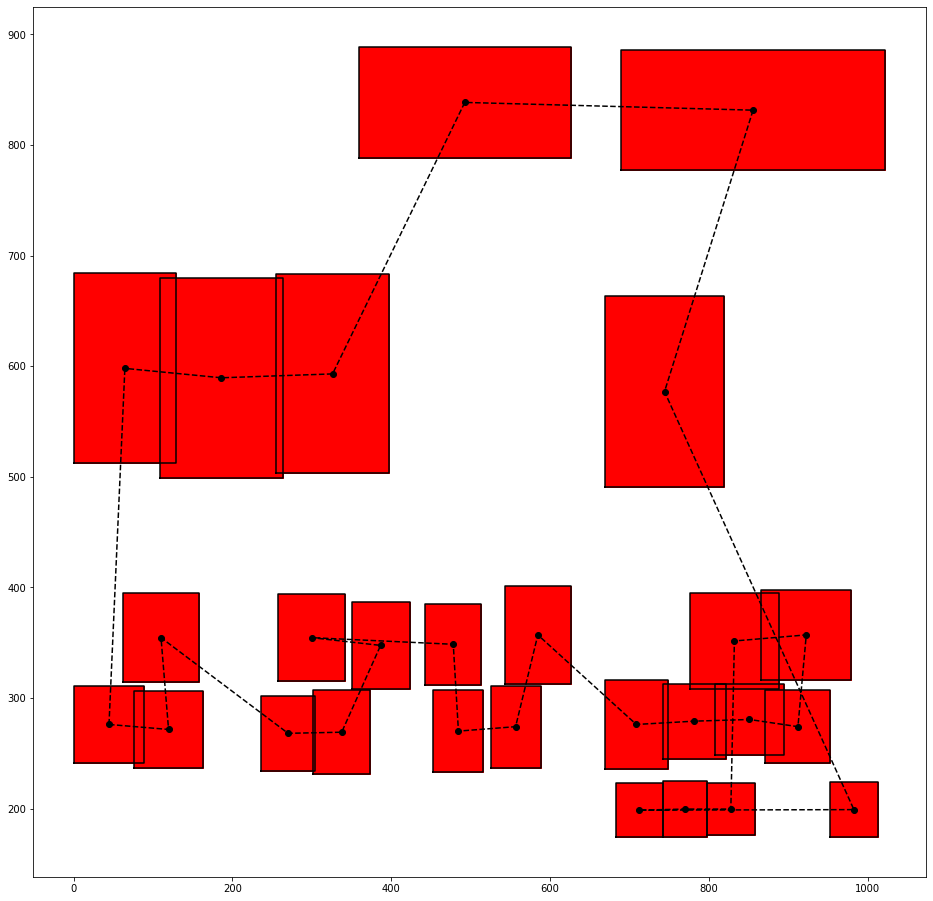

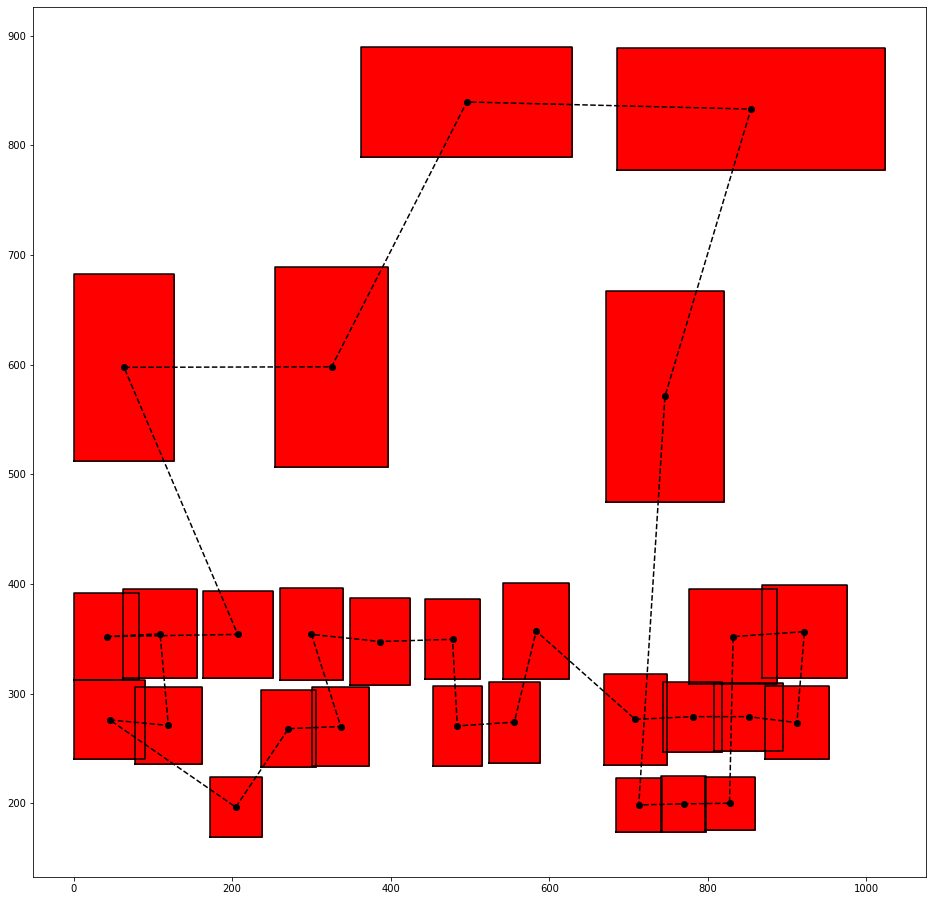

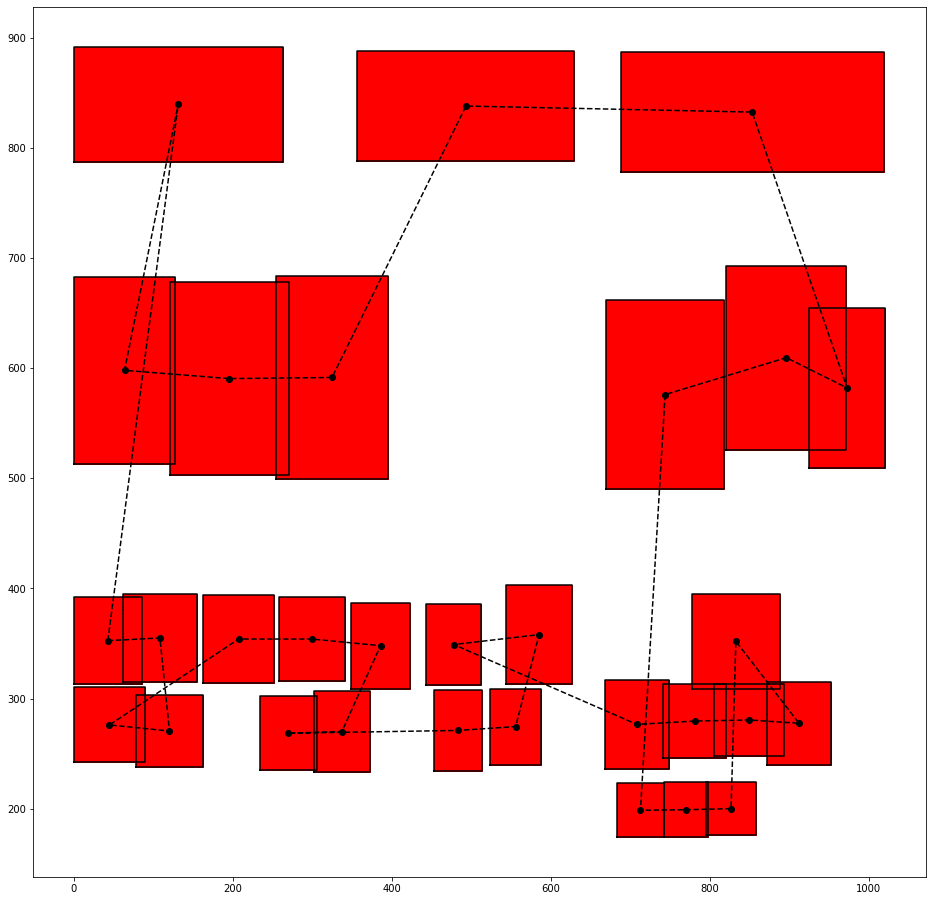

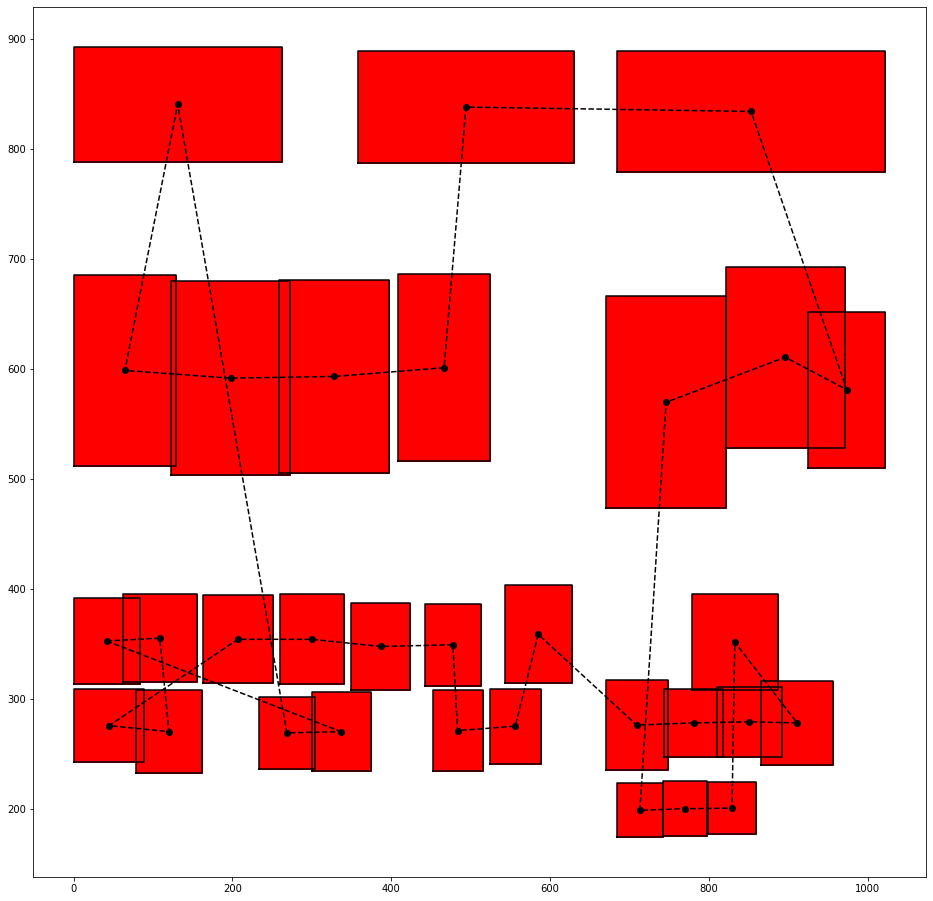

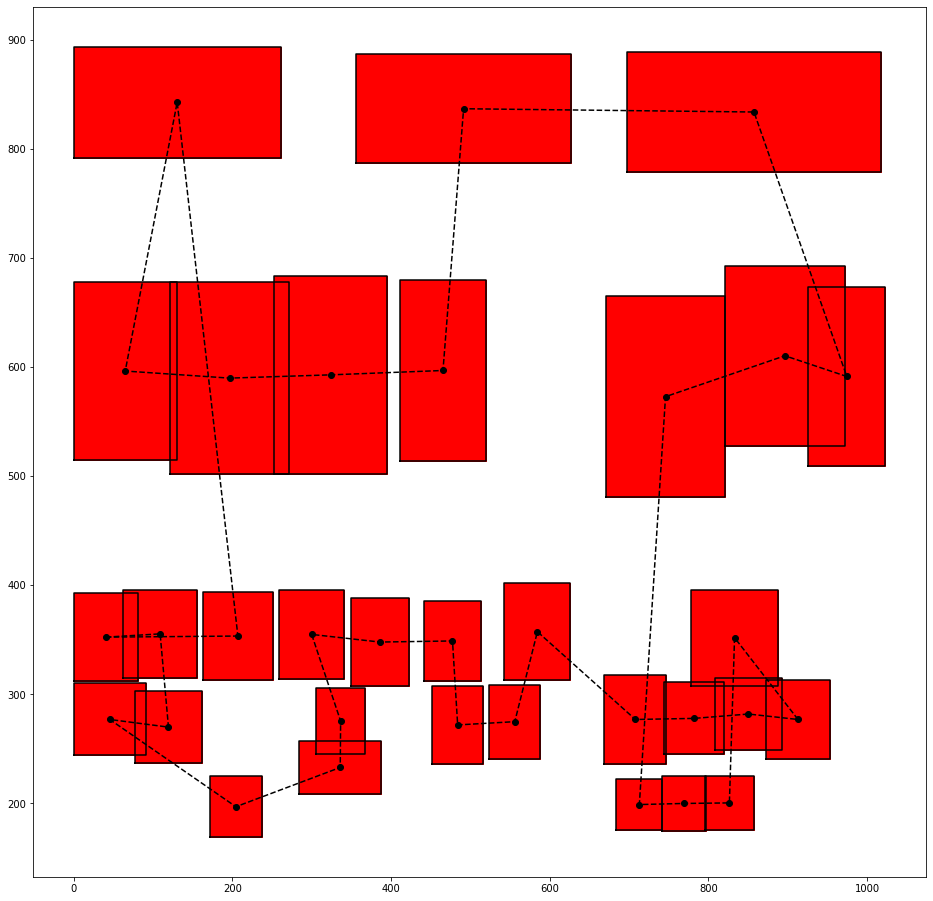

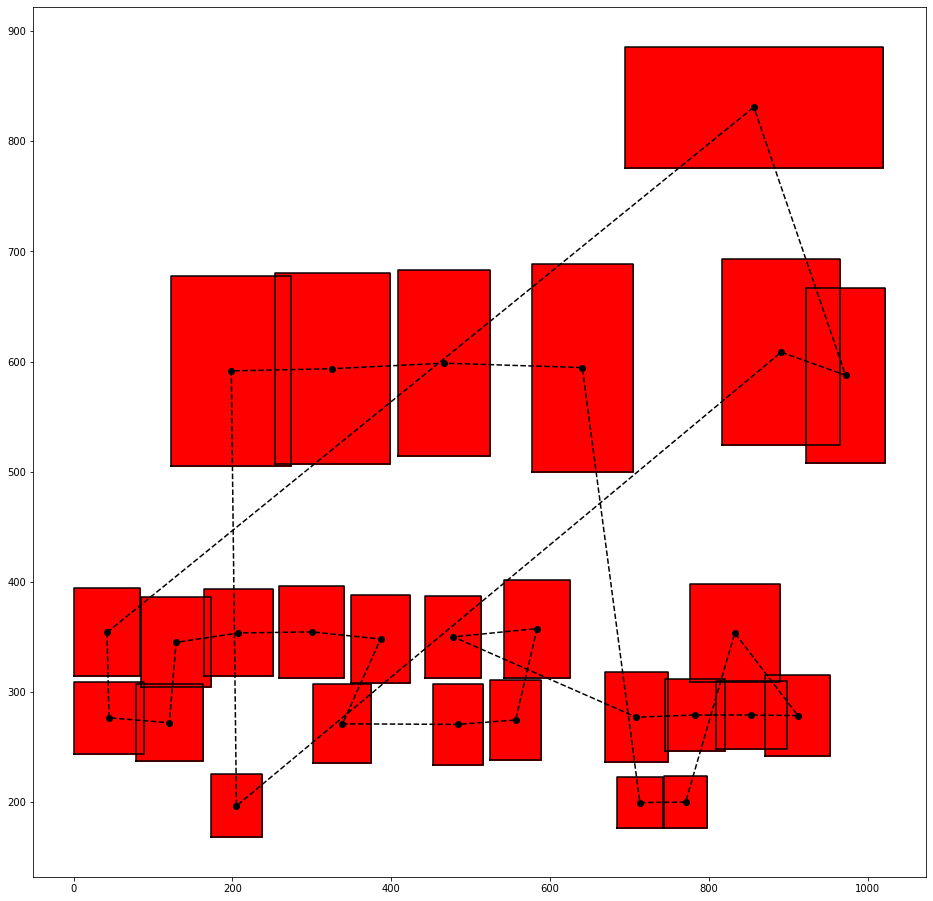

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib.collections import PatchCollection
from google.colab import files
for id in range (0,119,1):
  image_id = id

                                                     #random.choice(dataset.image_ids)
  image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
  info = dataset.image_info[image_id]
  print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
  results = model.detect([image], verbose=1)

# Display results
  ax = get_ax(1)
  r = results[0]


  r = results[0]
#Extract the all bbox
  print(r['rois'])
  arr=np.array(r['rois'])
#print("array is :",arr)
  print("\n")
  x1=arr[:,1]
  x2=arr[:,3]
  y1=arr[:,0]
  y2=arr[:,2]

  X=[]
  Y1=[]
  Y2=[]
  n=len(arr)
  for i in range(0,n):  #EXTRACTING THE BOUNDING BOXES
    X.append(arr[i][1])
    X.append(arr[i][3])
    Y1.append(arr[i][0])
    Y1.append(arr[i][0])
    Y2.append(arr[i][2])
    Y2.append(arr[i][2])
    plt.fill_between(X,Y1,Y2, where=(Y1<Y2), color="red")
    plt.plot((x1[i],x1[i],x2[i],x2[i],x1[i]),(y1[i],y2[i],y2[i],y1[i],y1[i]),linestyle="-",color="black")
    X.clear()
    Y1.clear()
    Y2.clear()

##STARTING PATTERN GENERATING ALGORITHM
  X_sums=arr[:,1]+arr[:,3] 
  Y_sums=arr[:,0]+arr[:,2]
  print('\n\n')
  print("X_sums:",X_sums)

  print('\n\n')
  print("Y_sums:",Y_sums)

  X_center=X_sums*0.5
  Y_center=Y_sums*0.5

  print('\n\n')
  print("X_center:",X_center)

  print('\n\n')
  print("Y_center:",Y_center)

  print('\n\n')

  centroid_matrix=np.column_stack((X_center,Y_center))
  print("The centroids matrix is :",centroid_matrix)

  row_init=centroid_matrix[0]
  n=len(centroid_matrix)
  row_final=centroid_matrix[n-1]
  print("initial row is :",row_init)
  print("\n\n")
  print("final row is :",row_final)

  X_extract=[]                                                #for containing the first and last X-coordinates to close the connecting lines
  X_extract.append(row_init[0])
  X_extract.append(row_final[0])

  Y_extract=[]                                                #for containing the first and last X-coordinates to close the connecting lines
  Y_extract.append(row_init[1])
  Y_extract.append(row_final[1])
  print("\n\n")

  print("X_extract is",X_extract)
  print("y extract is",Y_extract)

##--APPLYING ALGORITHEM TO PREVENT CENTROID CONNECTING LINES FROM INTERSECTING--##
  X_centroid=[]
  Y_centroid=[]
  X_centroid=centroid_matrix[:,0]
  Y_centroid=centroid_matrix[:,1]

  print("\n X coordinates of centroid matrix are:\n",X_centroid)
  print("\n Y coordinates of centroid matrix are:\n",Y_centroid)

  print("X_centroid",X_centroid)
  print("Y_centroid",Y_centroid)

  from math import sqrt

  def swapPositions(list, pos1, pos2): 
      
      list[pos1], list[pos2] = list[pos2], list[pos1] 
      return list
  distance=[]

  X_dummy=X_centroid
  Y_dummy=Y_centroid
  X_update=[]                     #creating an empty list for storing the sequencal coordinates
  Y_update=[]
  co_X=[]
  co_Y=[]
  print("/nX_centroid before sorting",X_centroid) 
  print("Y_centroid before sorting ",Y_centroid)
  k = len(X_centroid)
  for i in range(k):                         #sorting the X-centroid coordinates to change the x-coordinates in a sequencial order
    for j in range(0, k-i-1):
      if X_centroid[j] > X_centroid[j+1]:
        swapPositions(X_centroid,j,j+1)
        swapPositions(Y_centroid,j,j+1)               #The position of the Y-centroid coordinates are also change with respected to the X-centroid 
  print("/nX_centroid after sorting",X_centroid)
  print("Y_centroid after sorting ",Y_centroid)      

  X_update.insert(0,X_centroid[0])
  Y_update.insert(0,Y_centroid[0])
  n =len(X_centroid)
  #print("X_update is",X_update)
  X_dummy=list(X_dummy)
  Y_dummy=list(Y_dummy)
  X_dummy.remove(X_update[0])
  Y_dummy.remove(Y_update[0])
  #print(X_dummy)
  N=len(X_dummy)
  for J in range(0,N):
    co_X.clear()
    co_Y.clear()  
    for i in range(0,n-J-1):                              #everytime the number of times distance is calculated is reduced by one
      distance.insert(i,sqrt((X_update[J]-X_dummy[i])**2+(Y_update[J]-Y_dummy[i])**2))
      co_X.insert(i,X_dummy[i])
      co_Y.insert(i,Y_dummy[i])
    k = len(distance)
    for i in range(k):
      for j in range(0, k-i-1):
        if distance[j] > distance[j+1] :
          swapPositions(distance,j,j+1)
          swapPositions(co_X,j,j+1)
          swapPositions(co_Y,j,j+1)
    X_update.insert(J+1,co_X[0])
    Y_update.insert(J+1,co_Y[0])
    X_dummy.remove(X_update[J+1])
    Y_dummy.remove(Y_update[J+1])
    print("AT ",J+1,"iteration co_X is ",co_X)
    print("Distance at",J+1,"iteration is ",distance)
    distance.clear()
  print(distance)
  print("X_update is",X_update)
  print(Y_update)
  print(X_dummy)
  print(Y_dummy)

  import matplotlib.pyplot as plt 
  plt.scatter(X_update,Y_update,color='black')
  plt.plot( X_update,Y_update, linestyle='--', color='black')
  X_first_last=[]
  Y_first_last=[]
  X_first_last.insert(0,X_update[0])
  Y_first_last.insert(0,Y_update[0])
  for i in range(0,n):
    if(i==n-1):
      X_first_last.insert(1,X_update[i])
      Y_first_last.insert(1,Y_update[i])
  plt.plot( X_first_last,Y_first_last, linestyle='--', color='black')
  plt.savefig("park"+str(id)+'.png')
